In [1]:
### Run colocalization analysis on output of eqtl and co-eqtl pipeline 
### As GWAS input data we use the data from 

### 1) The GTEX Resource: https://zenodo.org/record/3629742#.Y1uTM3ZByUm (contains 114 publicly available GWAS traits, harmonized and imputed to GTEx v8 reference)

### 2) Additional GWAS input data to test for T1D from: 
### Chiou J, Geusz RJ, Okino M, Han JY, Miller M, Melton R, Beebe E,
### Benaglio P, Huang S, Korgaonkar K, Heller S, Kleger A, Preissl S, Gorkin DU,
### Sander M, Gaulton KJ. Cell type-specific genetic risk mechanisms of type 1
### diabetes

# Libraries

In [2]:
### Load the necessary libraries

In [3]:
source('MS1_Libraries.r')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ readr   2.1.2
✔ tibble  3.1.7     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ dplyr::lag()          masks stats::lag()
✖ data.table::last()    masks dplyr::last()
✖ purrr::transpose()    masks data.table::transpose()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


The following objects are mas

# Parameters

In [4]:
## Define path to stored data

In [5]:
path = ""
outdir = ""

In [6]:
gwas_data_path = ""

In [7]:
## Define cell-types for which colocalization analysis should be executed

In [8]:
cell_type_var = c("CD4T","CD8T","monocyte","NK","B","DC")
# c("CD4T","CD8T","monocyte","NK","B","DC")

# Data 

In [9]:
### Load the required data

## eQTL/ co-eQTL data

### eqtl data 

In [10]:
eqtl_all_effect = data.frame()

In [11]:
for(i in cell_type_var){
    data1 = fread(paste0(path, "GRN_review/", i, "_ciseQTLs_1MB_-AllEffects.txt.gz"))
    ## add seperate HLA_DQA + SMDT1 data
    data2 = fread(paste0(path, "coloc_data_HLA_DQA_SMDT1/", i, "_ciseQTLs_1MB_HLA_DQA_SMDT1_-AllEffects.txt.gz"))
    
    data = rbind(data1,data2)
    data$cell_type = paste0(i, '1MB')
    eqtl_all_effect = rbind(data, eqtl_all_effect)
    }

In [12]:
head(eqtl_all_effect,2)

Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,⋯,MetaPN,MetaPZ,MetaBeta,MetaSE,MetaI2,NrDatasets,DatasetCorrelationCoefficients(ng;onemillionv2;onemillionv3;stemiv2),DatasetZScores(ng;onemillionv2;onemillionv3;stemiv2),DatasetSampleSizes(ng;onemillionv2;onemillionv3;stemiv2),cell_type
<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000197728,12,56435637,NA,RPS26,rs12582260,12,55436509,G/A,A,⋯,171,0.734837,0.080962,0.110177,0,4,0.179883;0.114471;-0.067275;-0.175334,1.154256;0.957471;-0.365841;-0.819481,43;72;32;24,DC1MB
ENSG00000026297,6,167342992,NA,RNASET2,rs9365940,6,166343144,A/G,G,⋯,171,0.601634,0.089124,0.148136,0,4,0.06959;0.013057;0.034956;0.129805,0.443421;0.108859;0.18993;0.60453,43;72;32;24,DC1MB


In [13]:
### Inspect the data

In [14]:
eqtl_all_effect %>% group_by(cell_type) %>% count()

cell_type,n
<chr>,<int>
B1MB,20172
CD4T1MB,20173
CD8T1MB,20173
DC1MB,20167
monocyte1MB,20173
NK1MB,20173


In [15]:
length(unique(eqtl_all_effect$SNP))

[1] 20173

In [16]:
#unique(eqtl_all_effect[(eqtl_all_effect$GeneSymbol == 'RPS26'),c('GeneSymbol', 'cell_type', 'MetaPN')])

In [17]:
eqtl_all_effect$SNP = paste0(eqtl_all_effect$SNP, '_', eqtl_all_effect$SNPAlleles)  # assuming ordered by 1) reference / 2) effect allele 

In [18]:
unique(eqtl_all_effect$GeneSymbol)

[1] "RPS26"    "RNASET2"  "TMEM176A" "HLA-DQA2" "SMDT1"

### Co-EQTL Data

In [19]:
output_all_effect = data.frame()

In [20]:
for(cell_type in cell_type_var){
    print(cell_type)
    # for each cell-type query files that should be loaded
    files_to_load = list.files(paste0(path, "output/",cell_type, "/noduplicated/output/"))
    #print(files_to_load)
    
    # read in the different files per cell-type
    for(i in files_to_load){
        print(i)
        data = fread(paste0(path, "output/", cell_type, "/noduplicated/output/", i))
        data$batch = i
        
        ## Add the cell-type information
        data$cell_type = cell_type
        
        output_all_effect = rbind(data, output_all_effect)
    }
    
}
    
    

[1] "CD4T"
[1] "chr12-batch-1-AllEffects.txt.gz"
[1] "chr12-batch-2-AllEffects.txt.gz"
[1] "chr12-batch-3-AllEffects.txt.gz"
[1] "chr12-batch-4-AllEffects.txt.gz"
[1] "chr22-batch-1-AllEffects.txt.gz"
[1] "chr6-batch-1-AllEffects.txt.gz"
[1] "CD8T"
[1] "chr12-batch-1-AllEffects.txt.gz"
[1] "chr12-batch-2-AllEffects.txt.gz"
[1] "chr12-batch-3-AllEffects.txt.gz"
[1] "chr22-batch-1-AllEffects.txt.gz"
[1] "chr6-batch-1-AllEffects.txt.gz"
[1] "monocyte"
[1] "chr12-batch-1-AllEffects.txt.gz"
[1] "chr12-batch-2-AllEffects.txt.gz"
[1] "chr6-batch-1-AllEffects.txt.gz"
[1] "chr7-batch-1-AllEffects.txt.gz"
[1] "NK"
[1] "chr12-batch-1-AllEffects.txt.gz"
[1] "B"
[1] "chr12-batch-1-AllEffects.txt.gz"
[1] "DC"
[1] "chr12-batch-1-AllEffects.txt.gz"
[1] "chr6-batch-1-AllEffects.txt.gz"


In [21]:
### Inspect the data

In [22]:
head(output_all_effect,2)

Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,⋯,MetaPN,MetaPZ,MetaBeta,MetaSE,NrDatasets,DatasetCorrelationCoefficients(ng;onemillionv2;onemillionv3;stemiv2),DatasetZScores(ng;onemillionv2;onemillionv3;stemiv2),DatasetSampleSizes(ng;onemillionv2;onemillionv3;stemiv2),batch,cell_type
<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
CDKN2D;HLA-DQA2,6,32709119,NA,CDKN2D;HLA-DQA2,rs1144709,6,31709349,C/T,T,⋯,59,0.069875,0.015741,0.225274,2,-;0.08039;-0.112611;-,-;0.472978;-0.498951;-,-;37;22;-,chr6-batch-1-AllEffects.txt.gz,DC
FAM129C;HLA-DQA2,6,32709119,NA,FAM129C;HLA-DQA2,rs1144709,6,31709349,C/T,T,⋯,59,-0.271313,-0.062011,0.228560,2,-;-0.084633;0.052223;-,-;-0.505195;0.224816;-,-;38;21;-,chr6-batch-1-AllEffects.txt.gz,DC


In [23]:
unique(output_all_effect$SNPEffectAllele)

[1] "T" "G" "A" "C"

In [24]:
unique(output_all_effect$cell_type)

[1] "DC"       "B"        "NK"       "monocyte" "CD8T"     "CD4T"

In [25]:
unique(output_all_effect$GeneChr)

[1]  6 12  7 22

In [26]:
# Extract eGene - based on chromosome and matches 

# Match with chromosome
output_all_effect$eGene[output_all_effect$GeneChr == 12] = str_extract(output_all_effect$Gene[output_all_effect$GeneChr == 12], 'RPS26' )
output_all_effect$eGene[output_all_effect$GeneChr == 6] = str_extract(output_all_effect$Gene[output_all_effect$GeneChr == 6], 'HLA-DQA2|RNASET2' )
output_all_effect$eGene[output_all_effect$GeneChr == 22] = str_extract(output_all_effect$Gene[output_all_effect$GeneChr == 22], 'SMDT1' )
output_all_effect$eGene[output_all_effect$GeneChr == 7] = str_extract(output_all_effect$Gene[output_all_effect$GeneChr == 7], 'TMEM176A' )

In [27]:
unique(output_all_effect$eGene)

[1] "HLA-DQA2" "RPS26"    "TMEM176A" "RNASET2"  "SMDT1"

In [28]:
#output_all_effect[is.na(output_all_effect$eGene) ,]

In [29]:
output_all_effect[is.na(output_all_effect$eGene),]   # check whether everything could be matched

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,⋯,MetaPZ,MetaBeta,MetaSE,NrDatasets,DatasetCorrelationCoefficients(ng;onemillionv2;onemillionv3;stemiv2),DatasetZScores(ng;onemillionv2;onemillionv3;stemiv2),DatasetSampleSizes(ng;onemillionv2;onemillionv3;stemiv2),batch,cell_type,eGene
<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [30]:
length(unique(output_all_effect$batch))

[1] 7

In [31]:
length(unique(output_all_effect$Gene))

[1] 604

In [32]:
### Check out the duplicates values from different batches and remove

In [33]:
head(output_all_effect[output_all_effect$GeneSymbol == 'RPS26;SMDT1',] %>% group_by(Gene, SNP) %>% count() %>% filter(n>=2),4)

Gene,SNP,n
<chr>,<chr>,<int>
RPS26;SMDT1,22:42911257,2
RPS26;SMDT1,rs1001586,2
RPS26;SMDT1,rs1001587,2
RPS26;SMDT1,rs1003619,2


In [34]:
output_all_effect[(output_all_effect$GeneSymbol == 'RPS26;SMDT1') &(output_all_effect$SNP == 'rs10047532') ,c(1:16, 21:22)]

Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,SNPEffectAlleleFreq,MetaP,MetaPN,MetaPZ,MetaBeta,MetaSE,batch,cell_type
<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
RPS26;SMDT1,12,56435637,NA,RPS26;SMDT1,rs10047532,12,55618447,A/T,T,0.627907,0.4738383,172,-0.716248,-0.079774,0.111378,chr12-batch-3-AllEffects.txt.gz,CD8T
RPS26;SMDT1,12,56435637,NA,RPS26;SMDT1,rs10047532,12,55618447,A/T,T,0.627907,0.4738383,172,-0.716248,-0.079774,0.111378,chr12-batch-2-AllEffects.txt.gz,CD8T
RPS26;SMDT1,12,56435637,NA,RPS26;SMDT1,rs10047532,12,55618447,A/T,T,0.627907,0.4738383,172,-0.716248,-0.079774,0.111378,chr12-batch-1-AllEffects.txt.gz,CD8T
RPS26;SMDT1,12,56435637,NA,RPS26;SMDT1,rs10047532,12,55618447,A/T,T,0.630058,0.8095858,173,-0.240960,-0.026827,0.111335,chr12-batch-4-AllEffects.txt.gz,CD4T
RPS26;SMDT1,12,56435637,NA,RPS26;SMDT1,rs10047532,12,55618447,A/T,T,0.630058,0.8095858,173,-0.240960,-0.026827,0.111335,chr12-batch-3-AllEffects.txt.gz,CD4T
RPS26;SMDT1,12,56435637,NA,RPS26;SMDT1,rs10047532,12,55618447,A/T,T,0.630058,0.8095858,173,-0.240960,-0.026827,0.111335,chr12-batch-2-AllEffects.txt.gz,CD4T
RPS26;SMDT1,12,56435637,NA,RPS26;SMDT1,rs10047532,12,55618447,A/T,T,0.630058,0.8095858,173,-0.240960,-0.026827,0.111335,chr12-batch-1-AllEffects.txt.gz,CD4T


In [35]:
nrow(output_all_effect)

[1] 6484420

In [36]:
output_all_effect %>% group_by(eGene, batch, cell_type) %>% count()

eGene,batch,cell_type,n
<chr>,<chr>,<chr>,<int>
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,CD4T,116816
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,CD8T,50641
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,DC,80196
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,monocyte,119521
RNASET2,chr6-batch-1-AllEffects.txt.gz,CD4T,16152
RNASET2,chr6-batch-1-AllEffects.txt.gz,monocyte,7198
RPS26,chr12-batch-1-AllEffects.txt.gz,B,74127
RPS26,chr12-batch-1-AllEffects.txt.gz,CD4T,789252
RPS26,chr12-batch-1-AllEffects.txt.gz,CD8T,621313


In [37]:
## Inspect amount of co-eGenes
unique(output_all_effect[,c('Gene', 'eGene', 'batch', 'cell_type')]) %>% group_by(eGene, batch, cell_type) %>% count()

eGene,batch,cell_type,n
<chr>,<chr>,<chr>,<int>
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,CD4T,16
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,CD8T,7
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,DC,13
HLA-DQA2,chr6-batch-1-AllEffects.txt.gz,monocyte,17
RNASET2,chr6-batch-1-AllEffects.txt.gz,CD4T,4
RNASET2,chr6-batch-1-AllEffects.txt.gz,monocyte,1
RPS26,chr12-batch-1-AllEffects.txt.gz,B,35
RPS26,chr12-batch-1-AllEffects.txt.gz,CD4T,372
RPS26,chr12-batch-1-AllEffects.txt.gz,CD8T,293


In [38]:
#output_all_effect[,c(21)]

In [39]:
output_all_effect = unique(output_all_effect[,-c(21)]) # remove duplicate entries

In [40]:
output_all_effect %>% group_by(eGene, cell_type) %>% count()

eGene,cell_type,n
<chr>,<chr>,<int>
HLA-DQA2,CD4T,116816
HLA-DQA2,CD8T,50641
HLA-DQA2,DC,80196
HLA-DQA2,monocyte,119521
RNASET2,CD4T,16152
RNASET2,monocyte,7198
RPS26,B,74127
RPS26,CD4T,789252
RPS26,CD8T,621313


In [41]:
output_all_effect %>% group_by(Gene, SNP, cell_type) %>% count() %>% filter(n>=2)

Gene,SNP,cell_type,n
<chr>,<chr>,<chr>,<int>


In [42]:
### Adjust Gene Symbol Format for better extraction and tests later on

In [43]:
output_all_effect$GeneSymbol = paste0(output_all_effect$eGene, '___', output_all_effect$GeneSymbol)

In [44]:
output_all_effect$GeneSymbol = str_replace(output_all_effect$GeneSymbol, ';', '__')

In [45]:
output_all_effect$ident = paste0(output_all_effect$cell_type, '_', output_all_effect$GeneSymbol)

In [46]:
### Adjust SNP name to only map onto matching ref and effect allele

In [47]:
colnames(output_all_effect)

[1] "Gene"                                                                
 [2] "GeneChr"                                                             
 [3] "GenePos"                                                             
 [4] "GeneStrand"                                                          
 [5] "GeneSymbol"                                                          
 [6] "SNP"                                                                 
 [7] "SNPChr"                                                              
 [8] "SNPPos"                                                              
 [9] "SNPAlleles"                                                          
[10] "SNPEffectAllele"                                                     
[11] "SNPEffectAlleleFreq"                                                 
[12] "MetaP"                                                               
[13] "MetaPN"                                                              
[14] "MetaPZ"                                                              
[15] "MetaBeta"                                                            
[16] "MetaSE"                                                              
[17] "NrDatasets"                                                          
[18] "DatasetCorrelationCoefficients(ng;onemillionv2;onemillionv3;stemiv2)"
[19] "DatasetZScores(ng;onemillionv2;onemillionv3;stemiv2)"                
[20] "DatasetSampleSizes(ng;onemillionv2;onemillionv3;stemiv2)"            
[21] "cell_type"                                                           
[22] "eGene"                                                               
[23] "ident"

In [48]:
output_all_effect$SNP = paste0(output_all_effect$SNP, '_', output_all_effect$SNPAlleles)  # assuming ordered by 1) reference / 2) effect allele 

In [49]:
head(output_all_effect,2)

Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,⋯,MetaPZ,MetaBeta,MetaSE,NrDatasets,DatasetCorrelationCoefficients(ng;onemillionv2;onemillionv3;stemiv2),DatasetZScores(ng;onemillionv2;onemillionv3;stemiv2),DatasetSampleSizes(ng;onemillionv2;onemillionv3;stemiv2),cell_type,eGene,ident
<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CDKN2D;HLA-DQA2,6,32709119,NA,HLA-DQA2___CDKN2D__HLA-DQA2,rs1144709_C/T,6,31709349,C/T,T,⋯,0.069875,0.015741,0.225274,2,-;0.08039;-0.112611;-,-;0.472978;-0.498951;-,-;37;22;-,DC,HLA-DQA2,DC_HLA-DQA2___CDKN2D__HLA-DQA2
FAM129C;HLA-DQA2,6,32709119,NA,HLA-DQA2___FAM129C__HLA-DQA2,rs1144709_C/T,6,31709349,C/T,T,⋯,-0.271313,-0.062011,0.228560,2,-;-0.084633;0.052223;-,-;-0.505195;0.224816;-,-;38;21;-,DC,HLA-DQA2,DC_HLA-DQA2___FAM129C__HLA-DQA2


## GWAS summary statistics

### GTEX data

In [50]:
## Get metadata to choose the GWAS traits that should be tested from GTEX

In [51]:
metadata = fread(paste0(gwas_data_path, "public_data/gtex_gwas_data/gwas_metadata.txt"))

In [52]:
nrow(metadata)

[1] 114

In [53]:
head(metadata[order(metadata$Tag, decreasing =FALSE),],2)  # File Overview

GTEx_GWAS,Tag,PUBMED_Paper_Link,Pheno_File,Source_File,Portal,Consortium,Link,Notes,Header,⋯,Declared_Effect_Allele,Genome_Reference,Binary,Cases,abbreviation,new_abbreviation,new_Phenotype,Category,Deflation,color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
Yes,ADIPOGen_Adiponectin,http://www.ncbi.nlm.nih.gov/pubmed/22479202,adipogen.discovery.eur_.meta_.public.release.part1_.txt,adipogen.discovery.eur_.meta_.public.release.part1_.txt,http://www.mcgill.ca/genepi/adipogen-consortium,ADIPOGen,http://www.mcgill.ca/genepi/files/genepi/adipogen.discovery.eur_.meta_.public.release.part1_.txt,NA,NA,⋯,NA,b36/hg18,0,NA,ANT,ADPN,Adiponectin,Cardiometabolic,1,#004000
Yes,Astle_et_al_2016_Eosinophil_counts,https://www.ncbi.nlm.nih.gov/pubmed/27863252,eo_build37_172275_20161212.tsv.gz,eo_build37_172275_20161212.tsv.gz,http://www.ebi.ac.uk/gwas/downloads/summary-statistics,Astle_et_al_2016,ftp://ftp.ebi.ac.uk/pub/databases/gwas/summary_statistics/AstleWJ_27863252_GCST004606/eo_build37_172275_20161212.tsv.gz,NA,VARIANT ID CHR BP REF ALT ALT_MINOR DIRECTION EFFECT SE P MLOG10P ALT_FREQ MA_FREQ,⋯,NA,b37/hg19,0,NA,BEC,EC,Eosinophil_Count,Blood,0,#C00000


In [54]:
# Extract potentially relevant traits
tail(unique(metadata[!is.na(str_extract(metadata$Phenotype, 'Diabetes|diabetes|rheomatoid|Rheomatoid|arthritis|Arthritis|Blood|blood|crohn|Crohn|Sclerosis|sclerosis|Fever|fever|Asthma|asthma|bowel|Bowel|white|White')),c('Phenotype', 'Tag', 'PUBMED_Paper_Link')]), 15)

Phenotype,Tag,PUBMED_Paper_Link
<chr>,<chr>,<chr>
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Blood clot in the lung",UKB_6152_7_diagnosed_by_doctor_Blood_clot_in_the_lung,http://biobank.ctsu.ox.ac.uk/showcase/field.cgi?id=41202
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Asthma",UKB_6152_8_diagnosed_by_doctor_Asthma,http://biobank.ctsu.ox.ac.uk/showcase/field.cgi?id=41202
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: Hayfever, allergic rhinitis or eczema",UKB_6152_9_diagnosed_by_doctor_Hayfever_allergic_rhinitis_or_eczema,http://biobank.ctsu.ox.ac.uk/showcase/field.cgi?id=41202
Myeloid white cell count,Astle_et_al_2016_Myeloid_white_cell_count,https://www.ncbi.nlm.nih.gov/pubmed/27863252
Red blood cell count,Astle_et_al_2016_Red_blood_cell_count,https://www.ncbi.nlm.nih.gov/pubmed/27863252
White blood cell count,Astle_et_al_2016_White_blood_cell_count,https://www.ncbi.nlm.nih.gov/pubmed/27863252
Type 2 Diabetes,DIAGRAM_T2D_TRANS_ETHNIC,http://www.ncbi.nlm.nih.gov/pubmed/22885922
Asthma,GABRIEL_Asthma,http://www.ncbi.nlm.nih.gov/pubmed/17611496
Crohn's Disease,IBD.EUR.Crohns_Disease,http://www.ncbi.nlm.nih.gov/pubmed/26192919


In [55]:
## Load data based on selected trait tags

In [56]:
### Select tags or take all tags - which GWAS to look into
tag = c('RA_OKADA_TRANS_ETHNIC', 'TAGC_Asthma_EUR', 'IMMUNOBASE_Multiple_sclerosis_hg19', 'IBD.EUR.Inflammatory_Bowel_Disease', 'IBD.EUR.Crohns_Disease', 'Astle_et_al_2016_White_blood_cell_count')  # rheomatoid arthritis tag

In [57]:
head(tag)

[1] "RA_OKADA_TRANS_ETHNIC"                  
[2] "TAGC_Asthma_EUR"                        
[3] "IMMUNOBASE_Multiple_sclerosis_hg19"     
[4] "IBD.EUR.Inflammatory_Bowel_Disease"     
[5] "IBD.EUR.Crohns_Disease"                 
[6] "Astle_et_al_2016_White_blood_cell_count"

In [58]:
gwas_gtex = data.frame()

In [59]:
# GWAS for selected tags
for(i in tag){
    print(tag)
    data = fread(paste0(gwas_data_path, "public_data/gtex_gwas_data/imputed_gwas_hg38_1.1/imputed_", i, ".txt.gz"))
    data$tag = i
    gwas_gtex = rbind(data, gwas_gtex)
    }

[1] "RA_OKADA_TRANS_ETHNIC"                  
[2] "TAGC_Asthma_EUR"                        
[3] "IMMUNOBASE_Multiple_sclerosis_hg19"     
[4] "IBD.EUR.Inflammatory_Bowel_Disease"     
[5] "IBD.EUR.Crohns_Disease"                 
[6] "Astle_et_al_2016_White_blood_cell_count"
[1] "RA_OKADA_TRANS_ETHNIC"                  
[2] "TAGC_Asthma_EUR"                        
[3] "IMMUNOBASE_Multiple_sclerosis_hg19"     
[4] "IBD.EUR.Inflammatory_Bowel_Disease"     
[5] "IBD.EUR.Crohns_Disease"                 
[6] "Astle_et_al_2016_White_blood_cell_count"
[1] "RA_OKADA_TRANS_ETHNIC"                  
[2] "TAGC_Asthma_EUR"                        
[3] "IMMUNOBASE_Multiple_sclerosis_hg19"     
[4] "IBD.EUR.Inflammatory_Bowel_Disease"     
[5] "IBD.EUR.Crohns_Disease"                 
[6] "Astle_et_al_2016_White_blood_cell_count"
[1] "RA_OKADA_TRANS_ETHNIC"                  
[2] "TAGC_Asthma_EUR"                        
[3] "IMMUNOBASE_Multiple_sclerosis_hg19"     
[4] "IBD.EUR.Inflammatory_Bowel_Di

In [60]:
### Inspect loaded data

In [61]:
unique(gwas_gtex$tag)

[1] "Astle_et_al_2016_White_blood_cell_count"
[2] "IBD.EUR.Crohns_Disease"                 
[3] "IBD.EUR.Inflammatory_Bowel_Disease"     
[4] "IMMUNOBASE_Multiple_sclerosis_hg19"     
[5] "TAGC_Asthma_EUR"                        
[6] "RA_OKADA_TRANS_ETHNIC"

In [62]:
head(gwas_gtex,2)

variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases,tag
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
rs554008981,chr1_13550_G_A_b38,chr1,13550,A,G,hg38,0.01731602,173480,1.2054297,0.2280375,NA,NA,imputed,NA,Astle_et_al_2016_White_blood_cell_count
rs201055865,chr1_14671_G_C_b38,chr1,14671,C,G,hg38,0.01298701,173480,0.2324989,0.8161506,NA,NA,imputed,NA,Astle_et_al_2016_White_blood_cell_count


In [63]:
# check whether also non-sign. results included
max(gwas_gtex$pvalue)

[1] 1

In [64]:
## check effect allele reporting
head(gwas_gtex %>% group_by(effect_allele) %>% count() %>% arrange(desc(n)), 6)

effect_allele,n
<chr>,<int>
A,13915259
T,13893494
C,11989998
G,11810065
AT,132012
TA,117094


In [65]:
#unique(gwas_gtex$effect_allele)

In [66]:
# Add phenotype info and sample size etc. from metadata

In [67]:
head(gwas_gtex,2)

variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases,tag
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
rs554008981,chr1_13550_G_A_b38,chr1,13550,A,G,hg38,0.01731602,173480,1.2054297,0.2280375,NA,NA,imputed,NA,Astle_et_al_2016_White_blood_cell_count
rs201055865,chr1_14671_G_C_b38,chr1,14671,C,G,hg38,0.01298701,173480,0.2324989,0.8161506,NA,NA,imputed,NA,Astle_et_al_2016_White_blood_cell_count


In [68]:
gwas_gtex = merge(gwas_gtex, metadata[,c('Tag', 'Phenotype', 'Sample_Size', 'Cases')], by.x = 'tag', by.y = 'Tag')

In [69]:
head(gwas_gtex, 2)

tag,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases,Phenotype,Sample_Size,Cases
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>
Astle_et_al_2016_White_blood_cell_count,rs554008981,chr1_13550_G_A_b38,chr1,13550,A,G,hg38,0.01731602,173480,1.2054297,0.2280375,NA,NA,imputed,NA,White blood cell count,173480,NA
Astle_et_al_2016_White_blood_cell_count,rs201055865,chr1_14671_G_C_b38,chr1,14671,C,G,hg38,0.01298701,173480,0.2324989,0.8161506,NA,NA,imputed,NA,White blood cell count,173480,NA


In [70]:
### Reduce to columns also in other gwas dataset

In [71]:
columns_var = c('tag','position', 'non_effect_allele', 'frequency', 'pvalue','effect_size', 'Phenotype','Sample_Size',
             'variant_id', 'sample_size', 'standard_error', 'effect_allele')

In [72]:
gwas_gtex = gwas_gtex[,c('tag','position', 'non_effect_allele', 'frequency', 'pvalue','effect_size', 'Phenotype','Sample_Size',
             'variant_id', 'sample_size', 'standard_error', 'effect_allele')]

In [73]:
#gwas_gtex[is.na(gwas_gtex$variant_id),]

### Additional GWAS input (load T1D GWAS)

In [74]:
### Load other T1D GWAS database to add to gtex

In [75]:
gwas_addition = fread(paste0(path, "additional_gwas/GCST90014023_buildGRCh38.tsv.gz"))


In [76]:
head(gwas_addition,2)

variant_id,p_value,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,sample_size
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
rs367896724,2.84e-01,1,10177,AC,A,0.398,0.059058,0.055112,363495
rs555500075,7.31e-01,1,10352,TA,T,0.393,0.019496,0.056730,363495


In [77]:
## Add columns and rename to adjust to other dataset

In [78]:
gwas_addition$tag = 'chiou_type_1_diabetes_study'

In [79]:
gwas_addition$position = gwas_addition$base_pair_location

In [80]:
gwas_addition$non_effect_allele = gwas_addition$other_allele

In [81]:
gwas_addition$frequency = gwas_addition$effect_allele_frequency

In [82]:
#sort(unique(gwas_addition$sample_size))

In [83]:
gwas_addition[gwas_addition$variant_id %in% c( 'rs111497730', 'rs1157621571', 'rs10751776'),]
# duplicate variant entries with different effect alleles

variant_id,p_value,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,sample_size,tag,position,non_effect_allele,frequency
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>
rs1157621571,1.69e-01,1,778705,CGCCCTTGTG,C,0.004720,-0.672700,0.489300,115043,chiou_type_1_diabetes_study,778705,C,0.004720
rs1157621571,3.68e-01,1,778705,CGCCCTTGCG,C,0.013100,-0.223200,0.248100,115043,chiou_type_1_diabetes_study,778705,C,0.013100
rs111497730,2.97e-01,1,987345,A,G,0.001130,0.434325,0.416662,379804,chiou_type_1_diabetes_study,987345,G,0.001130
rs111497730,9.80e-01,1,987345,C,G,0.000082,0.092465,3.691368,363495,chiou_type_1_diabetes_study,987345,G,0.000082
rs10751776,2.67e-08,1,24970252,C,A,0.510000,0.078145,0.014050,520580,chiou_type_1_diabetes_study,24970252,A,0.510000


In [84]:
### check out effect allele reporting
head(gwas_addition %>% group_by(effect_allele) %>% count() %>% arrange(desc(n)))

effect_allele,n
<chr>,<int>
A,17225304
T,17186648
C,13153907
G,12880964
AT,180595
TA,157712


In [85]:
gwas_addition$pvalue = gwas_addition$p_value

In [86]:
gwas_addition$effect_size = gwas_addition$beta

In [87]:
gwas_addition$Phenotype = 'Type_1_Diabetes'

In [88]:
gwas_addition$Sample_Size = gwas_addition$sample_size

In [89]:
### Filter on relevant columns
gwas_addition = gwas_addition[,c('tag','position', 'non_effect_allele', 'frequency', 'pvalue','effect_size', 'Phenotype','Sample_Size',
             'variant_id', 'sample_size', 'standard_error', 'effect_allele')]

In [90]:
nrow(gwas_addition)

[1] 62115237

In [91]:
length(unique(gwas_addition$variant_id))

[1] 60344051

In [92]:
###  Combine to dataset

In [93]:
gwas_gtex = rbind(gwas_gtex, gwas_addition)

## Adjust format

In [94]:
gwas_gtex$variant_id = paste0(gwas_gtex$variant_id, '_', gwas_gtex$non_effect_allele, '/', gwas_gtex$effect_allele)

In [95]:
head(gwas_gtex,2)

tag,position,non_effect_allele,frequency,pvalue,effect_size,Phenotype,Sample_Size,variant_id,sample_size,standard_error,effect_allele
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
Astle_et_al_2016_White_blood_cell_count,13550,G,0.01731602,0.228037473787046,NA,White blood cell count,173480,rs554008981_G/A,173480,NA,A
Astle_et_al_2016_White_blood_cell_count,14671,G,0.01298701,0.816150563702573,NA,White blood cell count,173480,rs201055865_G/C,173480,NA,C


# Adaption of positions (map for different reference genomes)

In [96]:
# align positions given in eqtl/co-eqtl data and GWAS data

In [97]:
positions_map = unique(gwas_gtex[,c('variant_id', 'position')])

In [98]:
head(positions_map,2)

variant_id,position
<chr>,<int>
rs554008981_G/A,13550
rs201055865_G/C,14671


In [99]:
## relevant snps from eqtl and co-eqtl data

In [100]:
snps = unique(c(unique(output_all_effect$SNP), unique(eqtl_all_effect$SNP)))

In [101]:
head(snps)

[1] "rs1144709_C/T" "rs3131380_A/G" "rs1144708_C/T" "rs2293861_C/T"
[5] "rs2075788_T/G" "rs3132445_G/A"

In [102]:
length(snps)

[1] 20527

In [103]:
### Reduce position_mapping to relevant snps

In [104]:
positions_map = positions_map[positions_map$variant_id %in% snps,]

In [105]:
nrow(positions_map)

[1] 15349

In [106]:
### Check for uniqueness per variant of position

In [107]:
positions_map %>% group_by(variant_id) %>% count() %>% filter(n > 1)

variant_id,n
<chr>,<int>


In [108]:
### map positions to eqtl and coeqtl data

In [109]:
eqtl_all_effect = merge(eqtl_all_effect, positions_map, by.x = 'SNP', by.y = 'variant_id')

In [110]:
output_all_effect = merge(output_all_effect, positions_map, by.x = 'SNP', by.y = 'variant_id')

In [111]:
eqtl_all_effect$SNPPos = eqtl_all_effect$position

In [112]:
output_all_effect$SNPPos = output_all_effect$position

# Colocalization for eQTLS

## Prepare data

### EQTL input

In [113]:
head(eqtl_all_effect,2)

SNP,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,⋯,MetaPZ,MetaBeta,MetaSE,MetaI2,NrDatasets,DatasetCorrelationCoefficients(ng;onemillionv2;onemillionv3;stemiv2),DatasetZScores(ng;onemillionv2;onemillionv3;stemiv2),DatasetSampleSizes(ng;onemillionv2;onemillionv3;stemiv2),cell_type,position
<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
rs1001116_C/T,ENSG00000002933,7,150497491,NA,TMEM176A,7,151743278,C/T,T,⋯,0.065366,0.007623,0.116622,0,4,-0.026173;-0.036659;-0.002511;0.2012,-0.166602;-0.305718;-0.013637;0.942746,43;72;32;24,DC1MB,151743278
rs1001116_C/T,ENSG00000002933,7,150497491,NA,TMEM176A,7,151743278,C/T,T,⋯,-0.334464,-0.038844,0.116137,0,4,-0.14377;0.113441;-0.080077;-0.165963,-0.931054;0.948804;-0.435662;-0.775045,44;72;32;24,B1MB,151743278


In [114]:
length(unique(eqtl_all_effect$Gene))   # 3 Genes

[1] 5

In [115]:
eqtl_all_effect$ident = paste0(eqtl_all_effect$cell_type, '_', eqtl_all_effect$GeneSymbol)

In [116]:
length(unique(eqtl_all_effect$ident))

[1] 30

In [117]:
data_input_eqtl = list()

In [118]:
for( i in unique(eqtl_all_effect$ident)){
    
    D1 = eqtl_all_effect[eqtl_all_effect$ident == i,]
    
    
    ## Prepare input vectors

    # Beta
    beta_eqtl = D1$MetaBeta
    names(beta_eqtl) = D1$SNP

    # Varbeta 
    varbeta_eqtl =  (D1$MetaSE)^2
    names(varbeta_eqtl) = D1$SNP

    # MAF - not needed? when setting sdY = 1
    MAF_eqtl = D1$SNPEffectAlleleFreq
    names(MAF_eqtl) = D1$SNP

    # Position 
    position_eqtl = D1$SNPPos
    names(position_eqtl) = D1$SNP

    # SNP
    snp_eqtl = D1$SNP
    names(snp_eqtl) =  D1$SNP

    # Pvalues
    pvalues_eqtl =  D1$MetaP
    names(pvalues_eqtl) = D1$SNP
    
    # Sample_size
    sample_size_eqtl = D1$MetaPN  # TBD
    
    
    ### Format as input list for colocalization

    D1_list = list(beta = beta_eqtl, # regression coefficient
               varbeta = varbeta_eqtl,  # variance/ standard deviation of beta?
               N = sample_size_eqtl, # number of samples in dataset 1
               #sdY =1,   # population standard deviation of the trait, if quantitative trait
                       # if unknown will be approximated based on beta, varbeta, N, MAF
                       # can be set to 1, if the trait was standardized to have variance 1
               type = 'quant',  # quant or cc to denote quantitative or case-control
               MAF = MAF_eqtl,   # minor allele frequency of the variants
               snp = snp_eqtl,  # character vector of SNP ids
               position = position_eqtl,
               pvalues = pvalues_eqtl
              )
    data_input_eqtl[[i]] = D1_list
    }
    
    

In [119]:
names(data_input_eqtl)

[1] "DC1MB_TMEM176A"       "B1MB_TMEM176A"        "NK1MB_TMEM176A"      
 [4] "monocyte1MB_TMEM176A" "CD8T1MB_TMEM176A"     "CD4T1MB_TMEM176A"    
 [7] "DC1MB_SMDT1"          "B1MB_SMDT1"           "NK1MB_SMDT1"         
[10] "monocyte1MB_SMDT1"    "CD8T1MB_SMDT1"        "CD4T1MB_SMDT1"       
[13] "DC1MB_HLA-DQA2"       "B1MB_HLA-DQA2"        "NK1MB_HLA-DQA2"      
[16] "monocyte1MB_HLA-DQA2" "CD8T1MB_HLA-DQA2"     "CD4T1MB_HLA-DQA2"    
[19] "DC1MB_RNASET2"        "B1MB_RNASET2"         "NK1MB_RNASET2"       
[22] "monocyte1MB_RNASET2"  "CD8T1MB_RNASET2"      "CD4T1MB_RNASET2"     
[25] "DC1MB_RPS26"          "B1MB_RPS26"           "NK1MB_RPS26"         
[28] "monocyte1MB_RPS26"    "CD8T1MB_RPS26"        "CD4T1MB_RPS26"

In [120]:
str(data_input_eqtl[[1]])

List of 8
 $ beta    : Named num [1:2992] 0.00762 0.02939 0.02411 -0.06009 0.28133 ...
  ..- attr(*, "names")= chr [1:2992] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ varbeta : Named num [1:2992] 0.0136 0.0132 0.0128 0.0135 0.0304 ...
  ..- attr(*, "names")= chr [1:2992] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ N       : int [1:2992] 171 171 171 171 147 171 171 171 171 171 ...
 $ type    : chr "quant"
 $ MAF     : Named num [1:2992] 0.313 0.333 0.351 0.316 0.126 ...
  ..- attr(*, "names")= chr [1:2992] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ snp     : Named chr [1:2992] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
  ..- attr(*, "names")= chr [1:2992] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ position: Named int [1:2992] 151743278 151744884 151150662 149826188 151677209 150656640 150846560 150846633 149819792 150814835 ...
  ..- attr(*, "names")= c

In [121]:
## Check validity of constructed dataset for coloc input

In [122]:
min(eqtl_all_effect$MetaP[eqtl_all_effect$ident == 'DC1MB_TMEM176A'])

[1] 9.718813e-11

In [123]:
for( i  in names(data_input_eqtl)){
    print(i)
    check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70)
    }

[1] "DC1MB_TMEM176A"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.7189e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B1MB_TMEM176A"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK1MB_TMEM176A"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte1MB_TMEM176A"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC1MB_SMDT1"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5268e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B1MB_SMDT1"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK1MB_SMDT1"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.4595e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte1MB_SMDT1"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T1MB_SMDT1"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T1MB_SMDT1"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC1MB_HLA-DQA2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B1MB_HLA-DQA2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK1MB_HLA-DQA2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte1MB_HLA-DQA2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T1MB_HLA-DQA2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T1MB_HLA-DQA2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC1MB_RNASET2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B1MB_RNASET2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK1MB_RNASET2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T1MB_RNASET2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.899e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T1MB_RNASET2"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC1MB_RPS26"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B1MB_RPS26"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK1MB_RPS26"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte1MB_RPS26"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T1MB_RPS26"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T1MB_RPS26"


Warning message in check_dataset(data_input_eqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


### GWAS input

In [124]:
gwas = gwas_gtex

In [125]:
head(gwas,2)

tag,position,non_effect_allele,frequency,pvalue,effect_size,Phenotype,Sample_Size,variant_id,sample_size,standard_error,effect_allele
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
Astle_et_al_2016_White_blood_cell_count,13550,G,0.01731602,0.228037473787046,NA,White blood cell count,173480,rs554008981_G/A,173480,NA,A
Astle_et_al_2016_White_blood_cell_count,14671,G,0.01298701,0.816150563702573,NA,White blood cell count,173480,rs201055865_G/C,173480,NA,C


In [126]:
## Compare variants and pre-filter on variants in EQTL data

In [127]:
gwas_input = gwas[gwas$variant_id %in%  unique(eqtl_all_effect$SNP),] 

In [128]:
length(unique(gwas_input$variant_id))

[1] 15158

In [129]:
gwas %>% group_by(Phenotype) %>% count()

Phenotype,n
<chr>,<int>
Asthma,8843303
Crohn's Disease,8860907
Inflammatory Bowel Disease,8858738
Multiple Sclerosis,8867478
Rheumatoid Arthritis,8857562
Type_1_Diabetes,62115237
White blood cell count,8871979


In [130]:
### Remove NA values in case there are some in the data

In [131]:
gwas_input = gwas_input[!is.na(gwas_input$effect_size),]
gwas_input = gwas_input[!is.na(gwas_input$standard_error),]

In [132]:
length(unique(gwas_input$variant_id))

[1] 15155

In [133]:
## Prepare GWAS Input per trait

In [134]:
gwas_input_list = list()

In [135]:
#length(input$position)

In [136]:
for(i in unique(gwas_input$Phenotype)){
    input = gwas_input[gwas_input$Phenotype == i,]
    
    ## Prepare GWAS Input
    # Beta
    beta_gwas =  input$effect_size
    names(beta_gwas) = input$variant_id

    # Varbeta 
    varbeta_gwas =  ( input$standard_error)^2
    names(varbeta_gwas) = input$variant_id

    # MAF 
    MAF_gwas = input$frequency
    names(MAF_gwas) = input$variant_id

    # Position 
    position_gwas = input$position
    names(position_gwas) = input$variant_id

    # SNP
    snp_gwas = input$variant_id
    names(snp_gwas) = input$variant_id
    
    ### Input Parameters - check with available data

    GWAS_list = list(
               beta = beta_gwas, # regression coefficient
               varbeta =varbeta_gwas,  # variance/ standard deviation of beta?
               #N = sample_size_gwas, # number of samples in dataset 1
               #sdY =   # population standard deviation of the trait, if quantitative trait
                       # if unknown will be approximated based on beta, varbeta, N, MAF
               type = 'cc',  # quant or cc to denote quantitative or case-control
               #MAF = MAF_gwas,   # minor allele frequency of the variants
               # LD =  needed?
               snp = snp_gwas,  # character vector of SNP ids
               position = position_gwas)
    
    gwas_input_list[[i]] = GWAS_list
    
    }
    
    

In [137]:
str(gwas_input_list[[1]])

List of 5
 $ beta    : Named num [1:8682] -0.067465 -0.018547 -0.041826 -0.076376 0.000736 ...
  ..- attr(*, "names")= chr [1:8682] "rs9270493_T/C" "rs9270505_A/G" "rs9273238_A/G" "rs3021302_T/C" ...
 $ varbeta : Named num [1:8682] 1.83e-05 1.35e-05 1.65e-05 2.32e-05 1.35e-05 ...
  ..- attr(*, "names")= chr [1:8682] "rs9270493_T/C" "rs9270505_A/G" "rs9273238_A/G" "rs3021302_T/C" ...
 $ type    : chr "cc"
 $ snp     : Named chr [1:8682] "rs9270493_T/C" "rs9270505_A/G" "rs9273238_A/G" "rs3021302_T/C" ...
  ..- attr(*, "names")= chr [1:8682] "rs9270493_T/C" "rs9270505_A/G" "rs9273238_A/G" "rs3021302_T/C" ...
 $ position: Named int [1:8682] 32591333 32591439 32646220 32655373 32655653 32660495 32660630 32660643 32660651 32660921 ...
  ..- attr(*, "names")= chr [1:8682] "rs9270493_T/C" "rs9270505_A/G" "rs9273238_A/G" "rs3021302_T/C" ...


In [138]:
for(i in names(gwas_input_list)){
    print(i)
    check_dataset(gwas_input_list[[i]],  warn.minp = 1e-70)
    }


[1] "White blood cell count"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Crohn's Disease"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: 1.025e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Inflammatory Bowel Disease"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Multiple Sclerosis"
[1] "Rheumatoid Arthritis"
[1] "Asthma"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Type_1_Diabetes"


## Run Coloc Analysis

### Visualize a concrete eQTL and GWAS trait example and save data for further investigation

In [139]:
### Choose Phenotype to visualize

In [140]:
i = 'Type_1_Diabetes'
#i = unique(gwas_input$Phenotype)[2]

In [141]:
i

[1] "Type_1_Diabetes"

In [142]:
### Choose eQTL

In [143]:
eqtl_var = 'CD4T1MB_RPS26'

In [144]:
### Plot the SNP significance values for the matches

[1] "Type_1_Diabetes"


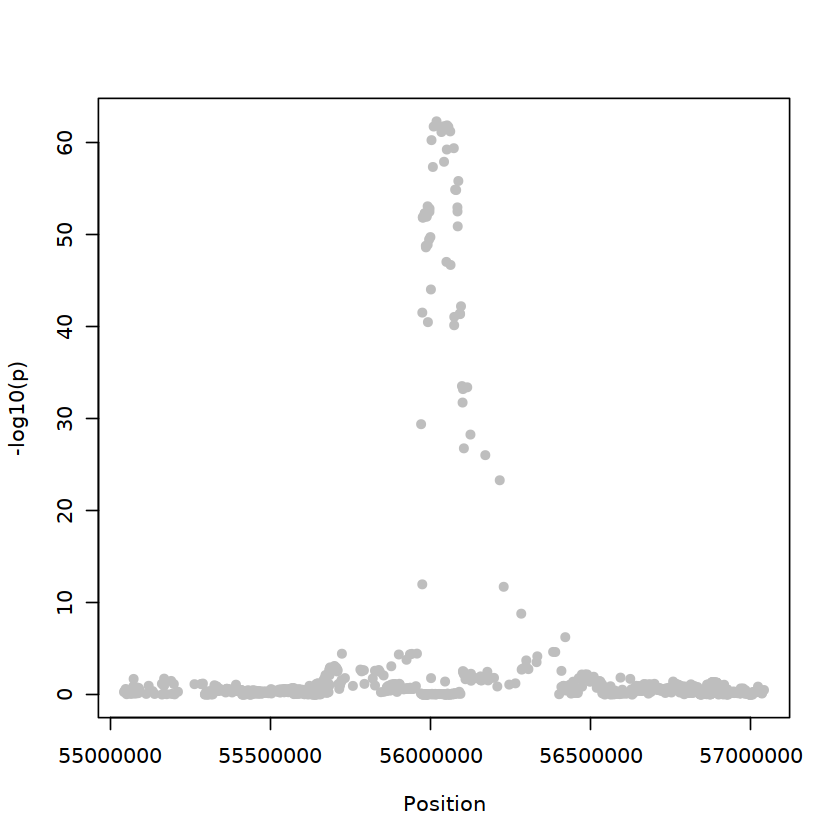

In [145]:
# GWAS
print(i)
plot_dataset(lapply(gwas_input_list[[i]], function(x){
    x[unique(eqtl_all_effect$SNP[eqtl_all_effect$ident == eqtl_var])]}))

[1] "CD4T1MB_RPS26"


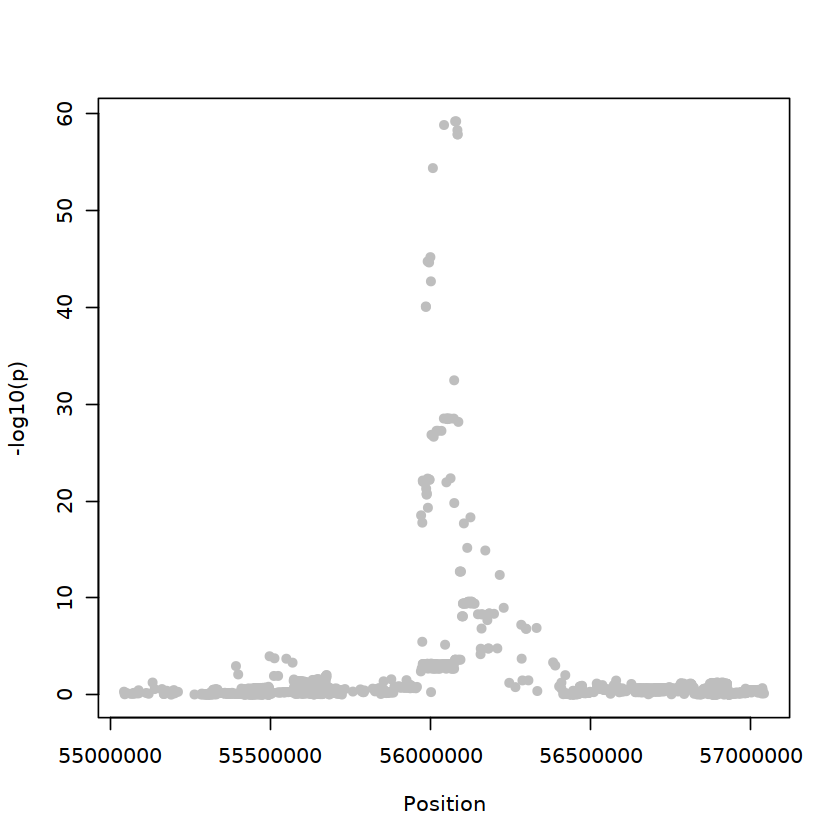

In [146]:
# coeQTL
print(eqtl_var)
plot_dataset(data_input_eqtl[[eqtl_var]])

In [147]:
### Make combined p-value plot

In [148]:
input = gwas_input[gwas_input$Phenotype == i,] # GWAS data

In [149]:
input_eqtl = eqtl_all_effect[eqtl_all_effect$ident == eqtl_var,] # Co-EQTL Input

In [150]:
plot_data = merge(input_eqtl[,c('SNP', 'MetaBeta', 'MetaP')], input[,c('variant_id', 'pvalue', 'effect_size')], by.x = 'SNP', by.y = 'variant_id')

In [151]:
nrow(plot_data)

[1] 1341

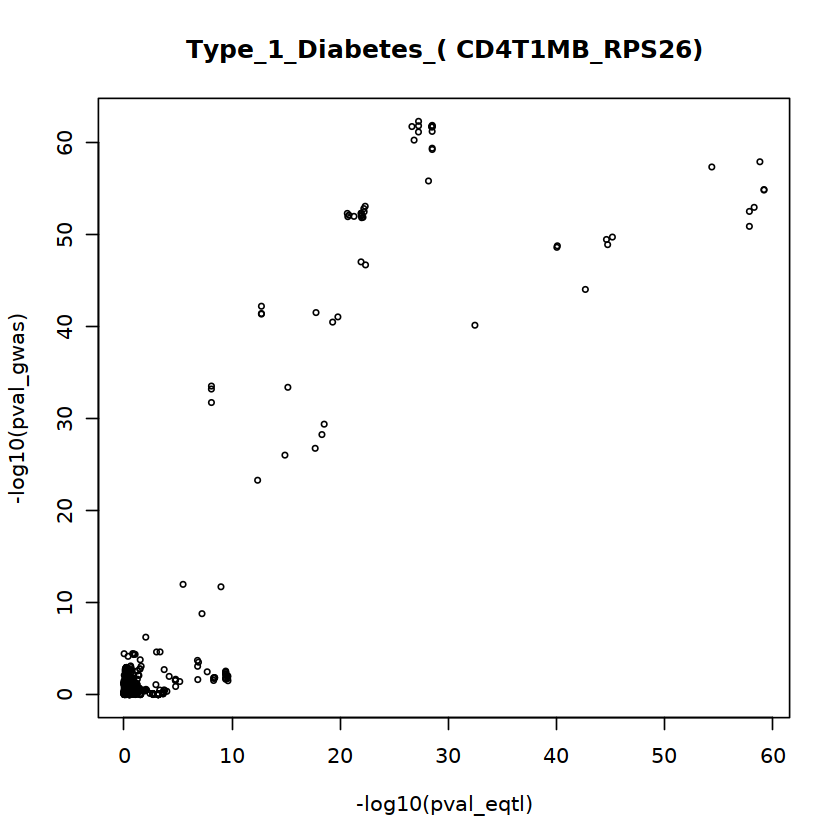

In [152]:
plot(-log10(plot_data$MetaP), -log10(as.numeric(plot_data$pvalue)), xlab = '-log10(pval_eqtl)', ylab = '-log10(pval_gwas)', main = paste0( i,'_',  '( ', eqtl_var, ')'), cex = 0.5)

### Run for all cell-types + genes

In [153]:
### Execute colocalization analysis

In [154]:
#str(gwas_input_list)

In [155]:
#head(str(data_input_eqtl))

In [156]:
coloc_result_summary = data.frame()

In [157]:
coloc_result_detail = data.frame()

In [158]:
for(i in names(gwas_input_list)){
    for(ident in names(data_input_eqtl)){
        
        print(i)
        print(ident)
        
        colocalization_result = coloc.abf(
            dataset1=gwas_input_list[[i]], # GWAS
            dataset2=data_input_eqtl[[ident]],  # eQTL
            p1 = 1e-04, p2 = 1e-04, p12 = 1e-06) # Parameters

        result_summary = data.frame(parameter = names(colocalization_result$summary), value = colocalization_result$summary, trait = i, identifier = ident)
        coloc_result_summary = rbind(coloc_result_summary, result_summary)

        result_detail = colocalization_result$results
        result_detail$trait = i
        result_detail$identifier = ident
        coloc_result_detail = rbind(coloc_result_detail, result_detail)
    }
    }


[1] "White blood cell count"
[1] "DC1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.18e-04  1.44e-05  9.81e-01  1.73e-02  5.24e-04 
[1] "PP abf for shared variant: 0.0524%"
[1] "White blood cell count"
[1] "B1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.804000  0.014200  0.178000  0.003150  0.000143 
[1] "PP abf for shared variant: 0.0143%"
[1] "White blood cell count"
[1] "NK1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.795000  0.014000  0.187000  0.003300  0.000137 
[1] "PP abf for shared variant: 0.0137%"
[1] "White blood cell count"
[1] "monocyte1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.92e-34  5.14e-36  9.82e-01  1.73e-02  5.26e-04 
[1] "PP abf for shared variant: 0.0526%"
[1] "White blood cell count"
[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.799000  0.014100  0.184000  0.003240  0.000123 
[1] "PP abf for shared variant: 0.0123%"
[1] "White blood cell count"
[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.822000  0.014500  0.160000  0.002830  0.000112 
[1] "PP abf for shared variant: 0.0112%"
[1] "White blood cell count"
[1] "DC1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.88e-03  8.07e-05  9.74e-01  1.33e-02  6.49e-03 
[1] "PP abf for shared variant: 0.649%"
[1] "White blood cell count"
[1] "B1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.68e-07  9.17e-09  9.79e-01  1.34e-02  7.18e-03 
[1] "PP abf for shared variant: 0.718%"
[1] "White blood cell count"
[1] "NK1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.17e-04  9.85e-06  9.79e-01  1.34e-02  6.97e-03 
[1] "PP abf for shared variant: 0.697%"
[1] "White blood cell count"
[1] "monocyte1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.30e-10  5.90e-12  9.79e-01  1.34e-02  7.24e-03 
[1] "PP abf for shared variant: 0.724%"
[1] "White blood cell count"
[1] "CD8T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.06e-18  5.58e-20  9.79e-01  1.34e-02  7.41e-03 
[1] "PP abf for shared variant: 0.741%"
[1] "White blood cell count"
[1] "CD4T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.46e-31  1.16e-32  9.79e-01  1.34e-02  7.43e-03 
[1] "PP abf for shared variant: 0.743%"
[1] "White blood cell count"
[1] "DC1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.82e-58  6.15e-09  2.96e-50  1.00e+00  2.59e-08 
[1] "PP abf for shared variant: 2.59e-06%"
[1] "White blood cell count"
[1] "B1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.60e-58  5.43e-09  2.96e-50  1.00e+00  6.40e-09 
[1] "PP abf for shared variant: 6.4e-07%"
[1] "White blood cell count"
[1] "NK1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.38e-50  8.05e-01  5.31e-51  1.79e-01  1.56e-02 
[1] "PP abf for shared variant: 1.56%"
[1] "White blood cell count"
[1] "monocyte1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.64e-57  8.94e-08  2.96e-50  1.00e+00  3.38e-07 
[1] "PP abf for shared variant: 3.38e-05%"
[1] "White blood cell count"
[1] "CD8T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.47e-54  4.98e-05  2.96e-50  1.00e+00  3.87e-06 
[1] "PP abf for shared variant: 0.000387%"
[1] "White blood cell count"
[1] "CD4T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.36e-51  2.15e-01  2.26e-50  7.63e-01  2.16e-02 
[1] "PP abf for shared variant: 2.16%"
[1] "White blood cell count"
[1] "DC1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.563000  0.009020  0.421000  0.006750  0.000195 
[1] "PP abf for shared variant: 0.0195%"
[1] "White blood cell count"
[1] "B1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.800000  0.012800  0.184000  0.002960  0.000107 
[1] "PP abf for shared variant: 0.0107%"
[1] "White blood cell count"
[1] "NK1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.224000  0.003580  0.760000  0.012200  0.000352 
[1] "PP abf for shared variant: 0.0352%"
[1] "White blood cell count"
[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.757000  0.012100  0.228000  0.003650  0.000159 
[1] "PP abf for shared variant: 0.0159%"
[1] "White blood cell count"
[1] "CD8T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.07e-04  8.14e-06  9.83e-01  1.58e-02  4.60e-04 
[1] "PP abf for shared variant: 0.046%"
[1] "White blood cell count"
[1] "CD4T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.81e-14  4.51e-16  9.84e-01  1.58e-02  4.02e-04 
[1] "PP abf for shared variant: 0.0402%"
[1] "White blood cell count"
[1] "DC1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.47e-44  6.83e-46  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "B1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-47  7.72e-49  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "NK1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.00e-42  2.33e-43  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "monocyte1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.06e-47  4.22e-48  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.83e-46  3.65e-47  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD4T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.39e-44  2.51e-45  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "Crohn's Disease"
[1] "DC1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000752  0.000080  0.902000  0.096000  0.001270 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "B1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.734000  0.078100  0.170000  0.018000  0.000727 
[1] "PP abf for shared variant: 0.0727%"
[1] "Crohn's Disease"
[1] "NK1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.726000  0.077200  0.178000  0.018900  0.000731 
[1] "PP abf for shared variant: 0.0731%"
[1] "Crohn's Disease"
[1] "monocyte1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.68e-34  2.85e-35  9.03e-01  9.61e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.72900   0.07760   0.17400   0.01850   0.00072 
[1] "PP abf for shared variant: 0.072%"
[1] "Crohn's Disease"
[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.75100   0.07990   0.15200   0.01620   0.00069 
[1] "PP abf for shared variant: 0.069%"
[1] "Crohn's Disease"
[1] "DC1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000460  0.000147  0.757000  0.242000  0.001020 
[1] "PP abf for shared variant: 0.102%"
[1] "Crohn's Disease"
[1] "B1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.14e-09  1.32e-09  7.57e-01  2.42e-01  1.00e-03 
[1] "PP abf for shared variant: 0.1%"
[1] "Crohn's Disease"
[1] "NK1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.63e-05  1.16e-05  7.57e-01  2.42e-01  1.02e-03 
[1] "PP abf for shared variant: 0.102%"
[1] "Crohn's Disease"
[1] "monocyte1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.89e-12  1.56e-12  7.57e-01  2.42e-01  1.00e-03 
[1] "PP abf for shared variant: 0.1%"
[1] "Crohn's Disease"
[1] "CD8T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.83e-20  5.86e-21  7.57e-01  2.42e-01  1.00e-03 
[1] "PP abf for shared variant: 0.1%"
[1] "Crohn's Disease"
[1] "CD4T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.57e-34  2.42e-34  7.57e-01  2.42e-01  9.88e-04 
[1] "PP abf for shared variant: 0.0988%"
[1] "Crohn's Disease"
[1] "DC1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.80e-37  8.78e-33  4.32e-05  1.00e+00  6.66e-08 
[1] "PP abf for shared variant: 6.66e-06%"
[1] "Crohn's Disease"
[1] "B1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-29  2.88e-25  4.32e-05  1.00e+00  6.76e-08 
[1] "PP abf for shared variant: 6.76e-06%"
[1] "Crohn's Disease"
[1] "NK1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-11  2.55e-07  4.32e-05  1.00e+00  8.63e-05 
[1] "PP abf for shared variant: 0.00863%"
[1] "Crohn's Disease"
[1] "monocyte1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.86e-31  1.35e-26  4.32e-05  1.00e+00  6.72e-08 
[1] "PP abf for shared variant: 6.72e-06%"
[1] "Crohn's Disease"
[1] "CD8T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-16  2.83e-12  4.32e-05  1.00e+00  4.03e-04 
[1] "PP abf for shared variant: 0.0403%"
[1] "Crohn's Disease"
[1] "CD4T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.13e-10  2.60e-06  4.32e-05  1.00e+00  9.24e-05 
[1] "PP abf for shared variant: 0.00924%"
[1] "Crohn's Disease"
[1] "DC1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.41e-08  5.11e-01  4.14e-08  3.90e-01  9.88e-02 
[1] "PP abf for shared variant: 9.88%"
[1] "Crohn's Disease"
[1] "B1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.45e-08  7.99e-01  2.00e-08  1.89e-01  1.22e-02 
[1] "PP abf for shared variant: 1.22%"
[1] "Crohn's Disease"
[1] "NK1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.55e-08  1.47e-01  5.35e-08  5.02e-01  3.52e-01 
[1] "PP abf for shared variant: 35.2%"
[1] "Crohn's Disease"
[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.96e-08  7.53e-01  2.45e-08  2.32e-01  1.55e-02 
[1] "PP abf for shared variant: 1.55%"
[1] "Crohn's Disease"
[1] "CD8T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.51e-11  2.37e-04  4.87e-08  4.54e-01  5.45e-01 
[1] "PP abf for shared variant: 54.5%"
[1] "Crohn's Disease"
[1] "CD4T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.16e-22  2.99e-15  1.10e-08  9.54e-02  9.05e-01 
[1] "PP abf for shared variant: 90.5%"
[1] "Crohn's Disease"
[1] "DC1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-44  7.10e-46  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "B1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.65e-47  8.02e-49  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "NK1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.99e-42  2.42e-43  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "monocyte1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.03e-47  4.39e-48  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD8T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.81e-46  3.79e-47  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD4T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.38e-44  2.61e-45  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Inflammatory Bowel Disease"
[1] "DC1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.56e-04  7.63e-05  9.07e-01  9.15e-02  8.29e-04 
[1] "PP abf for shared variant: 0.0829%"
[1] "Inflammatory Bowel Disease"
[1] "B1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.737000  0.074400  0.170000  0.017200  0.000721 
[1] "PP abf for shared variant: 0.0721%"
[1] "Inflammatory Bowel Disease"
[1] "NK1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.730000  0.073600  0.178000  0.018000  0.000704 
[1] "PP abf for shared variant: 0.0704%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.69e-34  2.72e-35  9.08e-01  9.15e-02  8.37e-04 
[1] "PP abf for shared variant: 0.0837%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.733000  0.073900  0.175000  0.017600  0.000679 
[1] "PP abf for shared variant: 0.0679%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.755000  0.076100  0.153000  0.015400  0.000604 
[1] "PP abf for shared variant: 0.0604%"
[1] "Inflammatory Bowel Disease"
[1] "DC1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.68e-04  7.09e-05  8.88e-01  1.11e-01  7.92e-04 
[1] "PP abf for shared variant: 0.0792%"
[1] "Inflammatory Bowel Disease"
[1] "B1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.05e-09  6.31e-10  8.88e-01  1.11e-01  7.84e-04 
[1] "PP abf for shared variant: 0.0784%"
[1] "Inflammatory Bowel Disease"
[1] "NK1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.45e-05  5.56e-06  8.88e-01  1.11e-01  7.85e-04 
[1] "PP abf for shared variant: 0.0785%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.88e-12  7.35e-13  8.88e-01  1.11e-01  7.87e-04 
[1] "PP abf for shared variant: 0.0787%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.18e-20  2.73e-21  8.88e-01  1.11e-01  7.88e-04 
[1] "PP abf for shared variant: 0.0788%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.89e-34  1.11e-34  8.88e-01  1.11e-01  7.94e-04 
[1] "PP abf for shared variant: 0.0794%"
[1] "Inflammatory Bowel Disease"
[1] "DC1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.47e-54  8.12e-33  7.37e-22  9.24e-01  7.58e-02 
[1] "PP abf for shared variant: 7.58%"
[1] "Inflammatory Bowel Disease"
[1] "B1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.13e-46  2.67e-25  7.38e-22  9.26e-01  7.37e-02 
[1] "PP abf for shared variant: 7.37%"
[1] "Inflammatory Bowel Disease"
[1] "NK1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.99e-28  2.50e-07  7.82e-22  9.82e-01  1.80e-02 
[1] "PP abf for shared variant: 1.8%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.79e-48  1.23e-26  7.23e-22  9.07e-01  9.33e-02 
[1] "PP abf for shared variant: 9.33%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.11e-33  2.65e-12  7.46e-22  9.36e-01  6.40e-02 
[1] "PP abf for shared variant: 6.4%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.82e-27  2.29e-06  6.99e-22  8.77e-01  1.23e-01 
[1] "PP abf for shared variant: 12.3%"
[1] "Inflammatory Bowel Disease"
[1] "DC1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.51e-06  5.03e-01  4.21e-06  3.83e-01  1.14e-01 
[1] "PP abf for shared variant: 11.4%"
[1] "Inflammatory Bowel Disease"
[1] "B1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.79e-06  8.02e-01  2.08e-06  1.90e-01  7.80e-03 
[1] "PP abf for shared variant: 0.78%"
[1] "Inflammatory Bowel Disease"
[1] "NK1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.56e-06  1.42e-01  5.36e-06  4.85e-01  3.73e-01 
[1] "PP abf for shared variant: 37.3%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.19e-06  7.47e-01  2.52e-06  2.30e-01  2.28e-02 
[1] "PP abf for shared variant: 2.28%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.57e-09  3.26e-04  6.91e-06  6.27e-01  3.72e-01 
[1] "PP abf for shared variant: 37.2%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.46e-20  2.24e-15  8.59e-07  6.91e-02  9.31e-01 
[1] "PP abf for shared variant: 93.1%"
[1] "Inflammatory Bowel Disease"
[1] "DC1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.51e-44  2.63e-46  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "B1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.70e-47  2.98e-49  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "NK1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.14e-42  8.98e-44  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.31e-47  1.63e-48  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.05e-46  1.41e-47  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.54e-44  9.69e-46  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Multiple Sclerosis"
[1] "DC1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.16e-03  3.21e-05  9.87e-01  3.45e-03  8.48e-04 
[1] "PP abf for shared variant: 0.0848%"
[1] "Multiple Sclerosis"
[1] "B1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.87e-01  3.46e-03  9.62e-03  3.35e-05  2.83e-05 
[1] "PP abf for shared variant: 0.00283%"
[1] "Multiple Sclerosis"
[1] "NK1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.86e-01  3.46e-03  1.03e-02  3.57e-05  3.14e-05 
[1] "PP abf for shared variant: 0.00314%"
[1] "Multiple Sclerosis"
[1] "monocyte1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.95e-33  1.39e-35  9.96e-01  3.49e-03  8.51e-04 
[1] "PP abf for shared variant: 0.0851%"
[1] "Multiple Sclerosis"
[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.86e-01  3.46e-03  1.02e-02  3.53e-05  4.00e-05 
[1] "PP abf for shared variant: 0.004%"
[1] "Multiple Sclerosis"
[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.88e-01  3.47e-03  8.88e-03  3.09e-05  2.69e-05 
[1] "PP abf for shared variant: 0.00269%"
[1] "Multiple Sclerosis"
[1] "DC1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-02  8.15e-05  9.81e-01  7.58e-03  1.10e-03 
[1] "PP abf for shared variant: 0.11%"
[1] "Multiple Sclerosis"
[1] "B1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-07  8.08e-10  9.91e-01  7.66e-03  1.10e-03 
[1] "PP abf for shared variant: 0.11%"
[1] "Multiple Sclerosis"
[1] "NK1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.23e-04  6.37e-06  9.90e-01  7.66e-03  1.11e-03 
[1] "PP abf for shared variant: 0.111%"
[1] "Multiple Sclerosis"
[1] "monocyte1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.30e-10  1.01e-12  9.91e-01  7.66e-03  1.11e-03 
[1] "PP abf for shared variant: 0.111%"
[1] "Multiple Sclerosis"
[1] "CD8T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.25e-19  4.06e-21  9.91e-01  7.66e-03  1.11e-03 
[1] "PP abf for shared variant: 0.111%"
[1] "Multiple Sclerosis"
[1] "CD4T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.82e-32  2.96e-34  9.91e-01  7.66e-03  1.11e-03 
[1] "PP abf for shared variant: 0.111%"
[1] "Multiple Sclerosis"
[1] "DC1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.86e-75  1.39e-06  3.51e-71  7.74e-07  1.00e+00 
[1] "PP abf for shared variant: 100%"
[1] "Multiple Sclerosis"
[1] "B1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.08e-75  8.80e-07  3.51e-71  1.26e-06  1.00e+00 
[1] "PP abf for shared variant: 100%"
[1] "Multiple Sclerosis"
[1] "NK1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.14e-69  8.95e-01  2.21e-71  5.31e-03  9.94e-02 
[1] "PP abf for shared variant: 9.94%"
[1] "Multiple Sclerosis"
[1] "monocyte1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.45e-75  4.13e-07  3.51e-71  5.01e-08  1.00e+00 
[1] "PP abf for shared variant: 100%"
[1] "Multiple Sclerosis"
[1] "CD8T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.16e-72  2.04e-03  3.54e-71  1.17e-04  9.98e-01 
[1] "PP abf for shared variant: 99.8%"
[1] "Multiple Sclerosis"
[1] "CD4T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.42e-70  2.12e-01  3.25e-71  1.41e-03  7.87e-01 
[1] "PP abf for shared variant: 78.7%"
[1] "Multiple Sclerosis"
[1] "DC1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.52e-01  4.16e-03  4.36e-02  1.90e-04  7.87e-05 
[1] "PP abf for shared variant: 0.00787%"
[1] "Multiple Sclerosis"
[1] "B1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.82e-01  4.30e-03  1.33e-02  5.78e-05  3.68e-05 
[1] "PP abf for shared variant: 0.00368%"
[1] "Multiple Sclerosis"
[1] "NK1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.955000  0.004180  0.040900  0.000178  0.000069 
[1] "PP abf for shared variant: 0.0069%"
[1] "Multiple Sclerosis"
[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.75e-01  4.27e-03  2.02e-02  8.79e-05  4.55e-05 
[1] "PP abf for shared variant: 0.00455%"
[1] "Multiple Sclerosis"
[1] "CD8T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.72e-01  4.25e-03  2.37e-02  1.03e-04  5.04e-05 
[1] "PP abf for shared variant: 0.00504%"
[1] "Multiple Sclerosis"
[1] "CD4T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.71e-03  3.81e-05  9.86e-01  4.30e-03  1.05e-03 
[1] "PP abf for shared variant: 0.105%"
[1] "Multiple Sclerosis"
[1] "DC1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.33e-37  1.81e-40  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "B1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.23e-41  4.42e-44  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.74e-40  1.06e-42  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.71e-39  2.34e-42  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.09e-41  1.49e-44  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.53e-39  3.46e-42  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Rheumatoid Arthritis"
[1] "DC1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000730  0.000103  0.875000  0.123000  0.001350 
[1] "PP abf for shared variant: 0.135%"
[1] "Rheumatoid Arthritis"
[1] "B1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.748000  0.105000  0.128000  0.017900  0.000878 
[1] "PP abf for shared variant: 0.0878%"
[1] "Rheumatoid Arthritis"
[1] "NK1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.741000  0.104000  0.135000  0.019000  0.000992 
[1] "PP abf for shared variant: 0.0992%"
[1] "Rheumatoid Arthritis"
[1] "monocyte1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.60e-34  3.66e-35  8.76e-01  1.23e-01  1.34e-03 
[1] "PP abf for shared variant: 0.134%"
[1] "Rheumatoid Arthritis"
[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.745000  0.105000  0.131000  0.018400  0.000809 
[1] "PP abf for shared variant: 0.0809%"
[1] "Rheumatoid Arthritis"
[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.762000  0.107000  0.114000  0.016000  0.000853 
[1] "PP abf for shared variant: 0.0853%"
[1] "Rheumatoid Arthritis"
[1] "DC1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003430  0.000298  0.915000  0.079400  0.001580 
[1] "PP abf for shared variant: 0.158%"
[1] "Rheumatoid Arthritis"
[1] "B1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.74e-08  3.24e-09  9.19e-01  7.97e-02  1.63e-03 
[1] "PP abf for shared variant: 0.163%"
[1] "Rheumatoid Arthritis"
[1] "NK1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.74e-04  2.37e-05  9.18e-01  7.97e-02  1.59e-03 
[1] "PP abf for shared variant: 0.159%"
[1] "Rheumatoid Arthritis"
[1] "monocyte1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.45e-11  3.86e-12  9.19e-01  7.97e-02  1.63e-03 
[1] "PP abf for shared variant: 0.163%"
[1] "Rheumatoid Arthritis"
[1] "CD8T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.70e-19  1.48e-20  9.19e-01  7.97e-02  1.63e-03 
[1] "PP abf for shared variant: 0.163%"
[1] "Rheumatoid Arthritis"
[1] "CD4T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-32  1.08e-33  9.19e-01  7.97e-02  1.64e-03 
[1] "PP abf for shared variant: 0.164%"
[1] "Rheumatoid Arthritis"
[1] "DC1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
7.47e-276  2.96e-33 8.45e-244  3.28e-01  6.72e-01 
[1] "PP abf for shared variant: 67.2%"
[1] "Rheumatoid Arthritis"
[1] "B1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
2.53e-268  1.00e-25 8.62e-244  3.35e-01  6.65e-01 
[1] "PP abf for shared variant: 66.5%"
[1] "Rheumatoid Arthritis"
[1] "NK1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.28e-247  5.08e-05 1.68e-243  6.63e-01  3.37e-01 
[1] "PP abf for shared variant: 33.7%"
[1] "Rheumatoid Arthritis"
[1] "monocyte1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.25e-269  4.96e-27 8.57e-244  3.33e-01  6.67e-01 
[1] "PP abf for shared variant: 66.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
6.42e-255  2.54e-12 1.97e-243  7.77e-01  2.23e-01 
[1] "PP abf for shared variant: 22.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
5.51e-249  2.18e-06 1.66e-243  6.55e-01  3.45e-01 
[1] "PP abf for shared variant: 34.5%"
[1] "Rheumatoid Arthritis"
[1] "DC1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.11e-24  5.76e-01  4.25e-24  4.01e-01  2.29e-02 
[1] "PP abf for shared variant: 2.29%"
[1] "Rheumatoid Arthritis"
[1] "B1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.92e-24  8.42e-01  1.61e-24  1.51e-01  6.39e-03 
[1] "PP abf for shared variant: 0.639%"
[1] "Rheumatoid Arthritis"
[1] "NK1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.36e-24  2.23e-01  8.00e-24  7.54e-01  2.27e-02 
[1] "PP abf for shared variant: 2.27%"
[1] "Rheumatoid Arthritis"
[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.52e-24  8.04e-01  2.01e-24  1.90e-01  5.84e-03 
[1] "PP abf for shared variant: 0.584%"
[1] "Rheumatoid Arthritis"
[1] "CD8T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.47e-27  5.16e-04  1.06e-23  9.99e-01  1.09e-05 
[1] "PP abf for shared variant: 0.00109%"
[1] "Rheumatoid Arthritis"
[1] "CD4T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.03e-37  2.86e-14  1.06e-23  1.00e+00  1.03e-14 
[1] "PP abf for shared variant: 1.03e-12%"
[1] "Rheumatoid Arthritis"
[1] "DC1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.81e-49  3.90e-45  5.08e-05  2.47e-01  7.53e-01 
[1] "PP abf for shared variant: 75.3%"
[1] "Rheumatoid Arthritis"
[1] "B1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.86e-52  4.43e-48  5.11e-05  2.48e-01  7.52e-01 
[1] "PP abf for shared variant: 75.2%"
[1] "Rheumatoid Arthritis"
[1] "NK1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.65e-46  1.32e-42  5.06e-05  2.45e-01  7.55e-01 
[1] "PP abf for shared variant: 75.5%"
[1] "Rheumatoid Arthritis"
[1] "monocyte1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.79e-51  2.39e-47  5.05e-05  2.45e-01  7.55e-01 
[1] "PP abf for shared variant: 75.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.17e-50  2.08e-46  5.09e-05  2.47e-01  7.53e-01 
[1] "PP abf for shared variant: 75.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.87e-48  1.43e-44  5.08e-05  2.46e-01  7.54e-01 
[1] "PP abf for shared variant: 75.4%"
[1] "Asthma"
[1] "DC1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001950  0.000344  0.846000  0.149000  0.001840 
[1] "PP abf for shared variant: 0.184%"
[1] "Asthma"
[1] "B1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.79300   0.14000   0.05670   0.01000   0.00091 
[1] "PP abf for shared variant: 0.091%"
[1] "Asthma"
[1] "NK1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.790000  0.139000  0.059300  0.010400  0.000961 
[1] "PP abf for shared variant: 0.0961%"
[1] "Asthma"
[1] "monocyte1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.25e-34  1.46e-34  8.48e-01  1.50e-01  1.84e-03 
[1] "PP abf for shared variant: 0.184%"
[1] "Asthma"
[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.78900   0.13900   0.05990   0.01060   0.00117 
[1] "PP abf for shared variant: 0.117%"
[1] "Asthma"
[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.79800   0.14100   0.05070   0.00894   0.00132 
[1] "PP abf for shared variant: 0.132%"
[1] "Asthma"
[1] "DC1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.05e-03  5.21e-05  9.79e-01  1.67e-02  6.96e-04 
[1] "PP abf for shared variant: 0.0696%"
[1] "Asthma"
[1] "B1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.58e-08  4.42e-10  9.82e-01  1.68e-02  7.15e-04 
[1] "PP abf for shared variant: 0.0715%"
[1] "Asthma"
[1] "NK1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.28e-04  3.89e-06  9.82e-01  1.68e-02  7.07e-04 
[1] "PP abf for shared variant: 0.0707%"
[1] "Asthma"
[1] "monocyte1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.91e-11  4.97e-13  9.82e-01  1.68e-02  7.42e-04 
[1] "PP abf for shared variant: 0.0742%"
[1] "Asthma"
[1] "CD8T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-19  1.80e-21  9.82e-01  1.68e-02  7.58e-04 
[1] "PP abf for shared variant: 0.0758%"
[1] "Asthma"
[1] "CD4T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.22e-33  5.51e-35  9.82e-01  1.68e-02  8.46e-04 
[1] "PP abf for shared variant: 0.0846%"
[1] "Asthma"
[1] "DC1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.59e-25  4.03e-15  1.37e-11  3.41e-01  6.59e-01 
[1] "PP abf for shared variant: 65.9%"
[1] "Asthma"
[1] "B1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-25  3.07e-15  4.05e-13  2.65e-04  1.00e+00 
[1] "PP abf for shared variant: 100%"
[1] "Asthma"
[1] "NK1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.29e-16  3.27e-06  3.94e-13  1.46e-06  1.00e+00 
[1] "PP abf for shared variant: 100%"
[1] "Asthma"
[1] "monocyte1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.12e-26  2.84e-16  1.38e-12  2.53e-02  9.75e-01 
[1] "PP abf for shared variant: 97.5%"
[1] "Asthma"
[1] "CD8T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.28e-24  1.59e-13  3.94e-13  4.76e-09  1.00e+00 
[1] "PP abf for shared variant: 100%"
[1] "Asthma"
[1] "CD4T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.83e-18  4.65e-08  3.95e-13  4.38e-06  1.00e+00 
[1] "PP abf for shared variant: 100%"
[1] "Asthma"
[1] "DC1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.72100   0.01480   0.25800   0.00526   0.00146 
[1] "PP abf for shared variant: 0.146%"
[1] "Asthma"
[1] "B1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.892000  0.018300  0.088200  0.001810  0.000173 
[1] "PP abf for shared variant: 0.0173%"
[1] "Asthma"
[1] "NK1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.39400   0.00807   0.58500   0.01200   0.00146 
[1] "PP abf for shared variant: 0.146%"
[1] "Asthma"
[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.867000  0.017800  0.112000  0.002290  0.000391 
[1] "PP abf for shared variant: 0.0391%"
[1] "Asthma"
[1] "CD8T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.38e-03  2.82e-05  9.77e-01  2.00e-02  2.06e-03 
[1] "PP abf for shared variant: 0.206%"
[1] "Asthma"
[1] "CD4T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.79e-13  2.00e-14  9.78e-01  2.00e-02  2.07e-03 
[1] "PP abf for shared variant: 0.207%"
[1] "Asthma"
[1] "DC1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.07e-44  4.19e-45  3.38e-01  1.27e-01  5.35e-01 
[1] "PP abf for shared variant: 53.5%"
[1] "Asthma"
[1] "B1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-47  4.70e-48  3.38e-01  1.27e-01  5.35e-01 
[1] "PP abf for shared variant: 53.5%"
[1] "Asthma"
[1] "NK1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.58e-42  1.41e-42  3.32e-01  1.25e-01  5.43e-01 
[1] "PP abf for shared variant: 54.3%"
[1] "Asthma"
[1] "monocyte1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.65e-47  2.61e-47  3.38e-01  1.27e-01  5.35e-01 
[1] "PP abf for shared variant: 53.5%"
[1] "Asthma"
[1] "CD8T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.69e-46  2.23e-46  3.38e-01  1.27e-01  5.35e-01 
[1] "PP abf for shared variant: 53.5%"
[1] "Asthma"
[1] "CD4T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.93e-44  1.54e-44  3.38e-01  1.27e-01  5.35e-01 
[1] "PP abf for shared variant: 53.5%"
[1] "Type_1_Diabetes"
[1] "DC1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.52e-04  7.94e-05  9.03e-01  9.53e-02  8.32e-04 
[1] "PP abf for shared variant: 0.0832%"
[1] "Type_1_Diabetes"
[1] "B1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0046418
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.713000  0.075300  0.191000  0.020100  0.000677 
[1] "PP abf for shared variant: 0.0677%"
[1] "Type_1_Diabetes"
[1] "NK1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.004909
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.705000  0.074400  0.199000  0.021000  0.000738 
[1] "PP abf for shared variant: 0.0738%"
[1] "Type_1_Diabetes"
[1] "monocyte1MB_TMEM176A"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.68e-34  2.83e-35  9.04e-01  9.53e-02  8.24e-04 
[1] "PP abf for shared variant: 0.0824%"
[1] "Type_1_Diabetes"
[1] "CD8T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0067582
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.708000  0.074700  0.196000  0.020700  0.000682 
[1] "PP abf for shared variant: 0.0682%"
[1] "Type_1_Diabetes"
[1] "CD4T1MB_TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0037104
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.733000  0.077300  0.171000  0.018100  0.000635 
[1] "PP abf for shared variant: 0.0635%"
[1] "Type_1_Diabetes"
[1] "DC1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000254  0.000247  0.506000  0.492000  0.002080 
[1] "PP abf for shared variant: 0.208%"
[1] "Type_1_Diabetes"
[1] "B1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.17e-09  2.11e-09  5.06e-01  4.92e-01  2.10e-03 
[1] "PP abf for shared variant: 0.21%"
[1] "Type_1_Diabetes"
[1] "NK1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.94e-05  1.88e-05  5.06e-01  4.92e-01  2.09e-03 
[1] "PP abf for shared variant: 0.209%"
[1] "Type_1_Diabetes"
[1] "monocyte1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.49e-12  2.42e-12  5.06e-01  4.92e-01  2.10e-03 
[1] "PP abf for shared variant: 0.21%"
[1] "Type_1_Diabetes"
[1] "CD8T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.07e-21  8.82e-21  5.06e-01  4.92e-01  2.11e-03 
[1] "PP abf for shared variant: 0.211%"
[1] "Type_1_Diabetes"
[1] "CD4T1MB_SMDT1"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.15e-34  3.06e-34  5.06e-01  4.92e-01  2.05e-03 
[1] "PP abf for shared variant: 0.205%"
[1] "Type_1_Diabetes"
[1] "DC1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  4.16e-33  0.00e+00  1.00e+00  2.37e-26 
[1] "PP abf for shared variant: 2.37e-24%"
[1] "Type_1_Diabetes"
[1] "B1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  1.35e-25  0.00e+00  1.00e+00  5.35e-19 
[1] "PP abf for shared variant: 5.35e-17%"
[1] "Type_1_Diabetes"
[1] "NK1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  5.38e-07  0.00e+00  1.00e+00  1.25e-07 
[1] "PP abf for shared variant: 1.25e-05%"
[1] "Type_1_Diabetes"
[1] "monocyte1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  6.80e-27  0.00e+00  1.00e+00  1.31e-21 
[1] "PP abf for shared variant: 1.31e-19%"
[1] "Type_1_Diabetes"
[1] "CD8T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  1.71e-14  0.00e+00  1.00e+00  1.28e-08 
[1] "PP abf for shared variant: 1.28e-06%"
[1] "Type_1_Diabetes"
[1] "CD4T1MB_HLA-DQA2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  2.13e-06  0.00e+00  1.00e+00  4.42e-04 
[1] "PP abf for shared variant: 0.0442%"
[1] "Type_1_Diabetes"
[1] "DC1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.3059e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.47000   0.06140   0.41300   0.05400   0.00148 
[1] "PP abf for shared variant: 0.148%"
[1] "Type_1_Diabetes"
[1] "B1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.011178
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.692000  0.090500  0.191000  0.025000  0.000885 
[1] "PP abf for shared variant: 0.0885%"
[1] "Type_1_Diabetes"
[1] "NK1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2246e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.17500   0.02290   0.70600   0.09230   0.00354 
[1] "PP abf for shared variant: 0.354%"
[1] "Type_1_Diabetes"
[1] "monocyte1MB_RNASET2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00063663
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”
Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.652000  0.085300  0.232000  0.030300  0.000999 
[1] "PP abf for shared variant: 0.0999%"
[1] "Type_1_Diabetes"
[1] "CD8T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.69e-04  4.83e-05  8.78e-01  1.15e-01  6.77e-03 
[1] "PP abf for shared variant: 0.677%"
[1] "Type_1_Diabetes"
[1] "CD4T1MB_RNASET2"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.48e-14  3.24e-15  8.82e-01  1.15e-01  2.52e-03 
[1] "PP abf for shared variant: 0.252%"
[1] "Type_1_Diabetes"
[1] "DC1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
8.79e-101  1.03e-44  8.54e-57  1.00e+00  4.14e-04 
[1] "PP abf for shared variant: 0.0414%"
[1] "Type_1_Diabetes"
[1] "B1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.19e-103  1.39e-47  8.54e-57  1.00e+00  1.22e-04 
[1] "PP abf for shared variant: 0.0122%"
[1] "Type_1_Diabetes"
[1] "NK1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.97e-98  3.47e-42  8.54e-57  1.00e+00  3.65e-04 
[1] "PP abf for shared variant: 0.0365%"
[1] "Type_1_Diabetes"
[1] "monocyte1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
6.84e-103  8.01e-47  8.54e-57  1.00e+00  1.54e-04 
[1] "PP abf for shared variant: 0.0154%"
[1] "Type_1_Diabetes"
[1] "CD8T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
4.48e-102  5.25e-46  8.54e-57  1.00e+00  4.13e-04 
[1] "PP abf for shared variant: 0.0413%"
[1] "Type_1_Diabetes"
[1] "CD4T1MB_RPS26"


Warning message in sdY.est(d$varbeta, d$MAF, d$N):
“estimating sdY from maf and varbeta, please directly supply sdY if known”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
3.64e-100  4.27e-44  8.54e-57  1.00e+00  2.32e-04 
[1] "PP abf for shared variant: 0.0232%"


In [159]:
##
# HO: locus is not associated with any of the traits
# H1:  locus is only significant in the GWAS 
# H2:  the locus is only a significant eQTL 
# H3: locus is associated with both traits due to two independent signals
# H4:  locus is associated with both traits due to a single colocalizing SNP



In [160]:
coloc_result_summary_wide = coloc_result_summary %>% dcast(trait + identifier~ parameter, value.var = 'value')

In [161]:
coloc_result_summary_wide[coloc_result_summary_wide$identifier == 'CD4T1MB_RPS26',] # check whether we get same result for CD4T- RPS26 signal

,trait,identifier,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Asthma,CD4T1MB_RPS26,381,3.927482e-44,1.542417e-44,3.377647e-01,0.127299005,0.5349363254
38,Crohn's Disease,CD4T1MB_RPS26,1112,5.377536e-44,2.610708e-45,9.525417e-01,0.046232133,0.0012261225
68,Inflammatory Bowel Disease,CD4T1MB_RPS26,1110,5.543671e-44,9.686722e-46,9.819699e-01,0.017149625,0.0008804495
98,Multiple Sclerosis,CD4T1MB_RPS26,58,2.528911e-39,3.462667e-42,9.977730e-01,0.001357488,0.0008695298
128,Rheumatoid Arthritis,CD4T1MB_RPS26,882,2.866338e-48,1.432885e-44,5.077245e-05,0.246275259,0.7536739683
158,Type_1_Diabetes,CD4T1MB_RPS26,1341,3.644262e-100,4.267404e-44,8.537799e-57,0.999767580,0.0002324201
188,White blood cell count,CD4T1MB_RPS26,1078,5.393380e-44,2.511048e-45,9.553483e-01,0.044477333,0.0001743428


In [162]:
### Save the results

In [163]:
#write.csv(coloc_result_summary, paste0(path, "/colocalization_results/", "EQTL_summary.csv"))
#write.table(coloc_result_summary, file = paste0(path, "/colocalization_results/", "EQTL_summary.csv"), append =TRUE, sep = ",", row.names = FALSE, col.names =FALSE)

write.table(coloc_result_summary, file = paste0(path, "/colocalization_results/", "EQTL_summary_update.csv"), append =FALSE, sep = ",", row.names = FALSE, col.names =TRUE)

In [164]:
#write.csv(coloc_result_detail,  paste0(path, "/colocalization_results/", "EQTL_detail.csv"))
#write.table(coloc_result_detail, file = paste0(path, "/colocalization_results/", "EQTL_detail.csv"), append =TRUE, sep = ",", row.names = FALSE, col.names = FALSE)

write.table(coloc_result_detail, file = paste0(path, "/colocalization_results/", "EQTL_detail_update.csv"), append =FALSE, sep = ",", row.names = FALSE, col.names = TRUE)

# Colocalization for co-eQTLS

## Prepare Data

### Co-EQTL input

In [165]:
head(output_all_effect,2)

SNP,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,⋯,MetaBeta,MetaSE,NrDatasets,DatasetCorrelationCoefficients(ng;onemillionv2;onemillionv3;stemiv2),DatasetZScores(ng;onemillionv2;onemillionv3;stemiv2),DatasetSampleSizes(ng;onemillionv2;onemillionv3;stemiv2),cell_type,eGene,ident,position
<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
rs1001116_C/T,CAPG;TMEM176A,7,150497491,NA,TMEM176A___CAPG__TMEM176A,7,151743278,C/T,T,⋯,0.079829,0.121971,4,-0.075203;0.149838;-0.214833;0.318816,-0.422702;1.210238;-1.180776;1.518437,34;67;32;24,monocyte,TMEM176A,monocyte_TMEM176A___CAPG__TMEM176A,151743278
rs1001116_C/T,PTAFR;TMEM176A,7,150497491,NA,TMEM176A___PTAFR__TMEM176A,7,151743278,C/T,T,⋯,-0.100600,0.121873,4,0.018313;-0.015859;-0.229843;-0.120209,0.102794;-0.127373;-1.265483;-0.5595,34;67;32;24,monocyte,TMEM176A,monocyte_TMEM176A___PTAFR__TMEM176A,151743278


In [166]:
data_input_coeqtl = list()

In [167]:
for( i in unique(output_all_effect$ident)){
    
    D1 = output_all_effect[output_all_effect$ident == i,]
    cat(i)
    cat("")
    cat(nrow(D1))
    flush.console()

    
    ## Prepare input vectors

    # Beta
    beta_eqtl = D1$MetaBeta
    names(beta_eqtl) = D1$SNP

    # Varbeta 
    varbeta_eqtl =  (D1$MetaSE)^2
    names(varbeta_eqtl) = D1$SNP

    # MAF  - not needed
    #MAF_eqtl = D1$SNPEffectAlleleFreq
    #names(MAF_eqtl) = D1$SNP

    # Position 
    position_eqtl = D1$SNPPos
    names(position_eqtl) = D1$SNP

    # SNP
    snp_eqtl = D1$SNP
    names(snp_eqtl) =  D1$SNP

    # Pvalues
    pvalues_eqtl =  D1$MetaP
    names(pvalues_eqtl) = D1$SNP
    
    
    ### Format as input list for colocalization

    D1_list = list(beta = beta_eqtl, # regression coefficient
               varbeta = varbeta_eqtl,  # variance/ standard deviation of beta?
               #N = sample_size_eqtl, # number of samples in dataset 1
               sdY =1,   # population standard deviation of the trait, if quantitative trait
                       # if unknown will be approximated based on beta, varbeta, N, MAF
                       # can be set to 1, if the trait was standardized to have variance 1
               type = 'quant',  # quant or cc to denote quantitative or case-control
               #MAF = MAF_eqtl,   # minor allele frequency of the variants
               # LD =  needed?
               snp = snp_eqtl,  # character vector of SNP ids
               position = position_eqtl,
               pvalues = pvalues_eqtl
              )
    data_input_coeqtl[[i]] = D1_list
    }
    
    

monocyte_TMEM176A___CAPG__TMEM176A2990monocyte_TMEM176A___PTAFR__TMEM176A2990monocyte_TMEM176A___MNDA__TMEM176A2990monocyte_TMEM176A___RNASE6__TMEM176A2990monocyte_TMEM176A___TMEM176A__TSPO2990monocyte_TMEM176A___TMEM176A__VMO12968monocyte_TMEM176A___S100A9__TMEM176A2990monocyte_TMEM176A___QPCT__TMEM176A2984monocyte_TMEM176A___BLVRB__TMEM176A2989monocyte_TMEM176A___LYZ__TMEM176A2990monocyte_TMEM176A___CLEC4A__TMEM176A2990CD8T_SMDT1___RPL36__SMDT12645CD8T_SMDT1___RPL5__SMDT12645CD8T_SMDT1___RPL7__SMDT12645CD8T_SMDT1___RPL32__SMDT12645CD8T_SMDT1___EEF1A1__SMDT12645CD8T_SMDT1___RPL38__SMDT12645CD8T_SMDT1___RPL35A__SMDT12645CD8T_SMDT1___RPL3__SMDT12645CD8T_SMDT1___RPS4X__SMDT12645CD8T_SMDT1___RPS3A__SMDT12645CD8T_SMDT1___RPS15A__SMDT12645CD8T_SMDT1___RPS8__SMDT12645CD8T_SMDT1___RPS25__SMDT12645CD8T_SMDT1___RPS12__SMDT12645CD8T_SMDT1___NKG7__SMDT12645CD8T_SMDT1___B2M__SMDT12645CD8T_SMDT1___RPL15__SMDT12645CD8T_SMDT1___PFN1__SMDT12645CD8T_SMDT1___RPS28__SMDT12645CD8T_SMDT1___RPL13A__SMDT1264

In [168]:
str(data_input_coeqtl[[1]])

List of 7
 $ beta    : Named num [1:2990] 0.0798 0.0956 0.0246 -0.1784 0.057 ...
  ..- attr(*, "names")= chr [1:2990] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ varbeta : Named num [1:2990] 0.0149 0.0143 0.0137 0.0144 0.0337 ...
  ..- attr(*, "names")= chr [1:2990] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ sdY     : num 1
 $ type    : chr "quant"
 $ snp     : Named chr [1:2990] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
  ..- attr(*, "names")= chr [1:2990] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ position: Named int [1:2990] 151743278 151744884 151150662 149826188 151677209 150656640 150846560 150846633 149819792 150814835 ...
  ..- attr(*, "names")= chr [1:2990] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/G" "rs1004200_A/G" ...
 $ pvalues : Named num [1:2990] 0.513 0.425 0.834 0.137 0.756 ...
  ..- attr(*, "names")= chr [1:2990] "rs1001116_C/T" "rs1001117_G/A" "rs1001760_A/

In [169]:
## Check validity of input data

In [170]:
for( i  in names(data_input_coeqtl)){
    print(i)
    check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70)
    }

[1] "monocyte_TMEM176A___CAPG__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3126e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___PTAFR__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.51e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___MNDA__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___RNASE6__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0913e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___TMEM176A__TSPO"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.4308e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___S100A9__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.5296e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___LYZ__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2197e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL36__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.9771e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL5__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.4351e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL7__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.542e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL32__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.466e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___EEF1A1__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.2654e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL38__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3136e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL35A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.5856e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL3__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6861e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS4X__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7338e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS3A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.1192e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS15A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2841e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS8__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.1299e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS25__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.6863e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS12__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.439e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___NKG7__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.6053e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___B2M__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.4346e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL15__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.4898e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___PFN1__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.8685e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS28__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.797e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL13A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8379e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___GZMH__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.4648e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___LTB__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.146e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL39__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3898e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS14__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5694e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL13__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0258e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS23__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7211e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS29__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.8491e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL22__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.0306e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL9__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.5234e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL12__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.624e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL18__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0996e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS26__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___MAL__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2271e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___PRF1__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0438e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS13__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.1839e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS6__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.714e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPS18__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7346e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL21__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1662e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___SMDT1__TMSB4X"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4439e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL14__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.6327e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL11__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.9188e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL34__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.8118e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL10A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.5183e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_SMDT1___RPL30__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5944e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL3__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.3589e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS25__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5487e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL13A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.6882e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS13__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9433e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS4X__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.8205e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS18__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.7853e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL31__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2754e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS15__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.0919e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___ACTB__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2599e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL36__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2591e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL35A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.4759e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS12__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2585e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL11__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.9237e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL14__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.1292e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL10__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8366e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS3A__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.934e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS26__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___CD48__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3621e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPL7__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0745e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_SMDT1___RPS27__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3074e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___CST3__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6842e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DRA"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4402e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DPB1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6671e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___CLIC3__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6852e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DQA2__PTPRCAP"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3026e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___CDKN2D__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.1257e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.2498e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2736e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.2114e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DQA2__MT-CO1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3171e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.568e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.4835e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.6066e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__RPS6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.5222e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DPB1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6723e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DPA1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7523e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DMA__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.6043e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__RPS23"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.9636e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__HLA-DQB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1092e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__RPL26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.606e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___EEF1A1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.7871e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__RPS2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2401e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__RPL10"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6513e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DMB__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.0082e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__HLA-DRB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.3211e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__HLA-DRA"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6324e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_HLA-DQA2___HLA-DQA2__RPL5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.7109e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RNASET2___HLA-DRB5__RNASET2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.115e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_HLA-DQA2___CCL5__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0099e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_HLA-DQA2___CD74__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.8036e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_HLA-DQA2___HLA-DQA2__RPS8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.763e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_HLA-DQA2___HLA-DQA2__NKG7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.6836e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_HLA-DQA2___HLA-DQA2__RPL34"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.4533e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_HLA-DQA2___HLA-DQA1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.0477e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_HLA-DQA2___CMC1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9636e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__RPS14"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.946e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__S100A6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3044e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__RPS28"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.2797e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DPB1__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1617e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__RPL3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.4701e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___CD52__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.1462e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__RPS13"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.9209e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__S100A10"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3433e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__SH3BGRL3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2688e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___EEF1B2__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.6729e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__RPL13"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.0795e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___B2M__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.3005e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___GAPDH__HLA-DQA2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6996e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__RPL32"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.7203e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__RPL7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.6142e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_HLA-DQA2___HLA-DQA2__S100A4"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2579e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RNASET2___ITGB1__RNASET2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.7852e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RNASET2___CRIP1__RNASET2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.3182e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RNASET2___B2M__RNASET2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5524e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RNASET2___ALOX5AP__RNASET2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_RPS26___RPL13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.4874e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "DC_RPS26___RPL21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.6982e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1593e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.8367e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8633e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL30__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0169e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1352e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL32__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.9479e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3267e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.2349e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPLP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3875e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL26__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.969e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___EEF1A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.2492e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS3A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.9434e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.1792e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL41__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.2827e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL34__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6536e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL35A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.4516e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2489e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.4825e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS9"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.1995e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL9__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1034e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS27"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0967e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS26__RPS27A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0103e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPL23A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "B_RPS26___RPS10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4055e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL39__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL18A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__UBA52"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9873e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL36__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.2665e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___GNB2L1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1076e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL35A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL13A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL28__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.8252e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4178e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS27A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8421e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPLP0__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.325e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL35__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1007e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___ARPC2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.0471e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL8__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1883e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL23A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL32__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS4X"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__SPON2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7055e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL27__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.419e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___EEF1A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS15A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL7A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.6714e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__TOMM7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6965e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL37__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.234e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___PRF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL26__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS3A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL30__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS27"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS16__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.7789e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPLP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2807e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS28"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___FAU__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8904e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___GLTSCR2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.1598e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS25__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.4326e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6754e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL9__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0968e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2563e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL10A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7373e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL34__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.917e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL38__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2433e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___GPR183__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0676e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL41__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.0058e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL31__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6141e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__TPT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.0455e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPLP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5827e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.9702e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___GZMB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL37A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0993e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0395e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS29"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___KLRC1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9075e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL17__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___B2M__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.3814e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS9"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___MALAT1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9089e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___ACTB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.9089e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___HLA-B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4043e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL29__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0076e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___FGFBP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7026e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___EEF1B2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.7114e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPSA"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8859e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL36A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8405e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS20__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.0908e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__ZEB2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS26__RPS5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.02e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPS19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "NK_RPS26___RPL27A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EEF2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.4621e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___NACA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.7611e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EIF3L__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.3485e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS15A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL35A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9696e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL37A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EEF1B2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3916e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL30__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL26__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__VCAN"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.0193e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__UQCRH"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.9605e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__SLC7A7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.2351e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EPB41L3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.859e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__S100A11"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3529e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL32__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___HNRNPA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.4422e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___QARS__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1543e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8385e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.2547e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS9"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL35__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8781e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__TPT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___CSTA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4315e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS25__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3141e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EIF3K__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.9301e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS27"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EIF3H__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2896e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___ERP29__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5663e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__TNFAIP2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2465e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__VIM"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.0947e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL27A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EEF1A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL37__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL8__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8144e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL7A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS27A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.0862e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL27__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.5874e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___HLA-DRA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.7195e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__SLC25A6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS29"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1687e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPSA"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL22__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.5779e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL39__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS28"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___FAU__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5435e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL36__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5515e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___HLA-DPA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4467e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS3A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS20__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.7495e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___PABPC1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3725e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___CST3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EMP3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.2616e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___GNLY__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0351e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EIF3M__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.7748e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.4586e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___AP1S2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1328e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPLP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__SEC11A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3851e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL36A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5431e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPLP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL28__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3305e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.5394e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL41__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___ATP5G2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1345e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3936e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__SLC25A5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.8025e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL18A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL9__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.2302e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPLP0__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.933e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EVI2B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.886e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___CD48__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3518e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___EIF3E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2162e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___GAPDH__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1023e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS4X"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___LGALS2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.912e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___CYBA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4619e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL29__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS16__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2402e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___GPX1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2329e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___LTA4H__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RNASE6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2068e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___FTH1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5593e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___BTF3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.1949e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___IL18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6926e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___ATP5A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.4193e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL38__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.4709e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL13A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7467e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__RPS6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___IPO7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2873e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___GNB2L1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL34__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___CXCR4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__UBA52"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.4809e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___CRTAP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5648e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___H3F3B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.9122e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL10A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___CD74__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.9394e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___C6orf48__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.443e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___GPR183__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3884e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL23A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPL31__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "monocyte_RPS26___RPS26__TKT"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6203e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPLP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SCML1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.512e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ACTN1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8558e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS16__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__ZFAND1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PRF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.9631e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF3L__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7485e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EFHD2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.149e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SELL"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___B2M__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___APBA2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3058e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EEF1G__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.3542e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FAIM3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.465e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF3G__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___APOBEC3C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1694e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HLA-DRA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.548e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TPT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___LCP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.1464e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL31__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GZMM__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.8914e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CFL1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3855e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RSL1D1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8408e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TXN"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1256e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CTSW__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6044e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CD99__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2167e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FLT3LG__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5912e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NKG7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.837e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__UQCRB"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2818e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__YWHAZ"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CREM__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3111e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__S100A4"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1381e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RGS10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5768e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL22__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS9"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___LDHB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ATP1A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CXCR4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.4403e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SYNE1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.8506e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPLP0__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4612e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MYL6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PDE3B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.099e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL23A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MT-CO1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.2099e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__ZEB2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2449e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___LTB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PTPN7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0346e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL29__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PFN1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___IER2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL8__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.805e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL37A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS4X"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CMC1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6291e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SAT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.4219e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GZMB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6129e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___AKNA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NELL2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EEF1D__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5801e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FLNA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.2951e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___C12orf75__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.42e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL32__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HLA-C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HLA-B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___METRNL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PFDN5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.0295e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CAMK4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.9693e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___BHLHE40__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1054e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SLA"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1484e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CD8B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.1948e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NGFRAP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2462e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS20__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TUBA4A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8361e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__UBA52"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8001e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RCAN3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9651e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPSA"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PPP2R5C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3399e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL28__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__S100A6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___DNAJB6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.4144e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RAP1B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SH3BGRL3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5836e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PABPC1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.231e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FBL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.8077e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CCL5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GAPDH__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NPM1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8054e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL41__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MT-CO2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5892e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TESPA1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8387e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__S100A10"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4291e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PSMA7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4155e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PLEK__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7657e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SUB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7951e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL27A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MT-ND5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___KLRD1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4604e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MYC__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.6317e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RGS1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.062e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SLC25A6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3651e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HLA-A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__UBB"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2924e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL17__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.1082e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GNB2L1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__UBC"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.7981e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CD74__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0411e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TGFB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.839e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL7A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL18A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___LYPD3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.2696e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TMSB10"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7568e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CLIC1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.5234e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___C12orf57__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7538e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TMEM243"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1526e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL9__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ID2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.0728e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL10A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CCR7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PPA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4071e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EEF1A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___COX7C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.5433e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NFKBIA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NDFIP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.6595e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS15A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL39__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GZMA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.4252e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ABHD14B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.2272e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL35__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TPI1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2111e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GIMAP7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1009e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FAU__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SC5D"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.7243e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPLP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL34__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RIC3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.8358e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SH3YL1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8286e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CCNG1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SRP14"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.906e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HMGB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.7036e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NOSIP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.5202e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL36__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL35A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MYL12B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GNLY__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8365e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF3K__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.5308e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL13A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SRSF3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7372e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GLTSCR2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.5262e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PTP4A2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.9215e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FGFBP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPSAP58"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1243e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___C6orf48__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CCDC57__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.9666e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ITGB2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7619e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF2A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8915e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MYO1F__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ARF6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.5214e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CD81__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.3139e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TMEM123"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1846e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ALKBH7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0315e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___LDHA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2712e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PIK3IP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.151e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FOXP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.1991e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CCL4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.654e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NEAT1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2048e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___KLRF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__ZFAS1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4349e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___H3F3B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CALM1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1052e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HOPX__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.7747e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CD55__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.4084e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7845e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SRSF2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.2025e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EEF1B2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HLA-DRB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL38__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PTMA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.1327e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL36A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GNG2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2555e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TIGIT"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1444e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF3H__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.145e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ACTB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___C1QBP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9922e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CD27__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___KLRB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.1218e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___MAL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ARPC2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FTL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.7677e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CYBA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.133e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SEPT7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6793e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TCF7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.966e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__S100A11"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.0148e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___FCGR3A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4314e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PSMB9__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___LEF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PTPRC__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SRSF7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3453e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6448e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS28"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS29"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ANXA2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0625e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___LGALS1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.9042e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL26__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___DDX5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___NACA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___DOK2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.062e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CRIP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.4254e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___C1orf228__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1403e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___DUSP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7349e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF4B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL27__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TRABD2A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0288e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS27A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PASK__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5327e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___OAZ1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS3A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___OXNAD1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TOMM7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4281e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SRGN"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___HLA-E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1541e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TYROBP"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.981e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__YBX3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CST7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.025e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___AIF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.1062e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___IL7R__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4995e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RHOH__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.1452e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8276e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___DBI__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0352e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL37__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___PRKCQ-AS1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SNHG8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.5389e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___POMP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.9872e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL30__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RAB8B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___GZMH__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7802e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF3E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1259e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___ABLIM1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6131e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EIF4A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___APOBEC3G__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.2129e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RP11-291B21.2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.409e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__RPS27"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__SERF2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__TMSB4X"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS25__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___EEF2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3126e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPL4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___RPS26__S1PR5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD8T_RPS26___CD48__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8536e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TMSB10"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7937e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CHCHD2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.3173e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EMP3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2218e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FMNL1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.7187e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS27A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LEF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3125e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HERPUD1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ANXA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.2192e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SOD2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5135e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MYL6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GNB2L1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ATP1B3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0508e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SRSF5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.1719e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL28__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EML4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5207e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SCML1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7087e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MCL1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.4819e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NOG__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.7003e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PRMT2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.2646e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9486e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CCR4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.5146e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TMSB4X"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FAM129A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.906e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__S100A4"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ABLIM1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPLP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ALOX5AP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3504e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TSHZ2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9454e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TIGIT"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3573e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ARHGDIB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.7204e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FAU__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS29"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__YBX1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1701e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___JUND__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SH3YL1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.4835e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS27"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C12orf75__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7218e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CYBA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TNFRSF18"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.0096e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MYO1F__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6857e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL12__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PTPRC__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD55__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5944e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CREM__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.5722e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__VMP1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6668e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HMGB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3581e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL31__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C1orf228__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.163e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GALM__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0575e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TRABD2A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.2691e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF2A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6052e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL17__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ANXA5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7131e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___IDS__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.055e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ARID5B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6325e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___IMPDH2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.024e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TPT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__ST13"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0809e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CXCR3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.5567e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-DRB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9158e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL37A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SPOCK2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.8428e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C15orf48__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.226e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SNRPF"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___H3F3B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FAM134B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.6427e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ISG20__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.9172e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CFL1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NUCB2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1362e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ALKBH7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.1794e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LINC00493__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.1855e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL32__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__VIM"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.4615e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SNHG8"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CDC42__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5049e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TNFRSF1B"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.2924e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NELL2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.1011e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ACTN4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7123e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___IKZF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.2081e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LDHA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2503e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL41__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS16__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RP11-138A9.1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2073e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NAMPT__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__ZFAS1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0064e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CALM2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.9897e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF3E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-ND2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.8901e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL8__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD52__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.4538e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF3L__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___H3F3A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.2196e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ADTRP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT2A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1117e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SNRPD2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8359e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__ZFP36"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.5316e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CXCR4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.624e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___DYNLL1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.1282e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SAMSN1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9213e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LMNA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-ND5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4915e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS4X"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RUNX3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.355e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RGS1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3102e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ERGIC3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SELL"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TYMP"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.9655e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.687e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS15A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__UQCRB"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.334e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SRGN"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-ND4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.3822e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ABHD14B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6804e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ATP5E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1607e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPSAP58"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MAL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ATP2B4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.7512e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ARPC1B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.29e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PDCD1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.2067e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL9__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS25__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SAT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TCF7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.7474e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PIK3IP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.9797e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LGALS3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.3924e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MIAT__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7934e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL26__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SUB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CCR7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3646e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL14__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL18A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RNF19A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5478e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-CO3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.7912e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EEF1A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF3H__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FAS__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.7693e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EEF1D__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPLP0__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GYPC__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.9635e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL30__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL34__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TPM4"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1269e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LDHB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___AIF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5405e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL35A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ITGB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3293e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TXN"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.785e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FTH1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4687e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___COX7C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.9501e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LCP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1393e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__UBB"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4426e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL29__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ARPC2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TMEM123"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.8648e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PPP1R15A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.4985e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___IL32__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6007e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL37__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TOMM20"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.6235e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF3F__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8529e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ERP29__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4196e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___KLF6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.5548e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GIMAP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9335e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TGFBR2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3747e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RNF213__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6662e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C19orf53__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.3495e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SERF2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MIR4435-1HG__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MZT2B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.218e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___AK5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.6605e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NDFIP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.5858e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HNRNPA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL7A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SRSF7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3122e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL22__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C1QBP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4357e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CXCR6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.4185e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ARPC3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0449e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MRPS21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD48__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PPA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.7452e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EBPL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.7052e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FTL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3893e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__UXT"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LSM5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2201e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___KMT2E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-CO2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TAGLN2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.2808e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EEF2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.345e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1501e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FLNA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TATDN1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.1792e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-DPA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.443e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C12orf57__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS21__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___BTG1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.8696e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C8orf59__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.964e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD58__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7975e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-CO1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPLP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.5612e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___AKAP13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.7772e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF4B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.4604e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___DDX5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6237e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS24__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.487e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ANXA2R__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8144e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___IL8__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.918e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LINC00152__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FOXP3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.8638e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RGS10__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___B2M__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___KLRB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2737e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL36A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL35__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___DAP3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4062e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___C6orf48__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SVIP"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.6639e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL10A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL23A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PRKCQ-AS1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5814e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GIMAP7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4524e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ENTPD1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.3605e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___DUSP4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__YWHAB"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.391e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CCR6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.7975e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-ND1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2726e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PFN1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ADAM19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2414e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CLDND1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.189e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PFDN5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.2756e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FBL__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD37__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.5931e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___APEX1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.8871e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD74__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS20__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LETMD1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.1067e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GK__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1383e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NOSIP__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1729e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___AHNAK__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.3968e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SLC7A5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.2535e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GLTSCR2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HLA-DRA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6925e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS3A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__S100A6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS5"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-ATP6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8034e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__S100A11"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CCL5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.9659e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RILPL2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.7165e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SSR2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3313e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TNFRSF4"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.2807e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__UBC"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__S100A10"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MAF__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.5193e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NACA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___COMMD6__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.891e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS11__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.8659e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NSMCE1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6391e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TGFB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.659e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PRDX1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5827e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS9"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FAM46C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5817e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL39__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS23__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS13__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RORA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.9068e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.9571e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD44__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.0649e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS4Y1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.3618e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LGALS1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.5113e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___COX7A2L__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6756e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL15__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HADHA__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8011e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SATB1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.8858e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__UGP2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.6699e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SBDS"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4438e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SYNE2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4397e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TMA7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1543e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NEAT1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NR3C1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.8583e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS28"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CCT8__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.65e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TNFAIP3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.263e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SH2D2A"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7729e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NPM1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CLNS1A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.0466e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RSL1D1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ATP6V0E1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.2832e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL27A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___DUSP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.4405e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL13A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__ZFP36L2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1642e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF3D__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7672e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RP11-138A9.2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.3794e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL27__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___APRT__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.9849e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FYN__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.5144e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ANP32B__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4591e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PPP2R5C__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.7186e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF3M__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.2314e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL5__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CMPK1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.5804e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__YWHAZ"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7491e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GIMAP2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___COTL1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.4135e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF2S3__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HSP90AA1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MT-CYB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 7.3179e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HSPB1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.1825e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CRIP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SMDT1"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL18__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TXK"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.3442e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL36__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___GAPDH__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ANXA2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8732e-15
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CLIC1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.627e-14
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD99__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.9832e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___LYRM4__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.6923e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EEF1B2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ACTB__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS19__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EZR__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.1347e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ATP5A1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8326e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ATP5O__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EIF3K__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.1189e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPL38__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SUCLG2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 4.0155e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CD3E__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.3999e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPSA"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___NSA2__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CST7__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.0229e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___HIGD2A__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 6.6022e-08
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___EEF1G__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___IGBP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.7011e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___OAZ1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___MYH9__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__UBA52"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___ATP2B1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 5.3714e-11
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__RPS6"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RBM39__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.8267e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___CCNG1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.8565e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SH3BGRL3"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___COX4I1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 3.0583e-10
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___PMAIP1__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 9.9735e-09
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__TOMM7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SNHG7"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 8.206e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___FHIT__RPS26"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "CD4T_RPS26___RPS26__SRSF2"


Warning message in check_dataset(data_input_coeqtl[[i]], warn.minp = 1e-70):
“minimum p value is: 1.4873e-13
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


### GWAS input

In [171]:
gwas = gwas_gtex

In [172]:
head(gwas,2)

tag,position,non_effect_allele,frequency,pvalue,effect_size,Phenotype,Sample_Size,variant_id,sample_size,standard_error,effect_allele
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
Astle_et_al_2016_White_blood_cell_count,13550,G,0.01731602,0.228037473787046,NA,White blood cell count,173480,rs554008981_G/A,173480,NA,A
Astle_et_al_2016_White_blood_cell_count,14671,G,0.01298701,0.816150563702573,NA,White blood cell count,173480,rs201055865_G/C,173480,NA,C


In [173]:
## Compare variants and pre-filter on variants in coEQTL data

In [174]:
gwas_input = gwas[gwas$variant_id %in%  unique(output_all_effect$SNP),] 

In [175]:
length(unique(gwas_input$variant_id))

[1] 15346

In [176]:
gwas %>% group_by(Phenotype) %>% count()

Phenotype,n
<chr>,<int>
Asthma,8843303
Crohn's Disease,8860907
Inflammatory Bowel Disease,8858738
Multiple Sclerosis,8867478
Rheumatoid Arthritis,8857562
Type_1_Diabetes,62115237
White blood cell count,8871979


In [177]:
### Remove NA values in case there are some

In [178]:
gwas_input = gwas_input[!is.na(gwas_input$effect_size),]
gwas_input = gwas_input[!is.na(gwas_input$standard_error),]

In [179]:
length(unique(gwas_input$variant_id))

[1] 15343

In [180]:
nrow(gwas_input)

[1] 58534

In [181]:
## Prepare GWAS Input per trait

In [182]:
gwas_input_list = list()

In [183]:
for(i in unique(gwas_input$Phenotype)){
    input = gwas_input[gwas_input$Phenotype == i,]
    
    ## Prepare GWAS Input
    # Beta
    beta_gwas =  input$effect_size
    names(beta_gwas) = input$variant_id

    # Varbeta 
    varbeta_gwas =  ( input$standard_error)^2
    names(varbeta_gwas) = input$variant_id

    # MAF - not needed
    #MAF_gwas = input$frequency
    #names(MAF_gwas) = input$variant_id

    # Position 
    position_gwas = input$position
    names(position_gwas) = input$variant_id

    # SNP
    snp_gwas = input$variant_id
    names(snp_gwas) = input$variant_id

    
    ### Input Parameters - check with available data

    GWAS_list = list(
               beta = beta_gwas, # regression coefficient
               varbeta =varbeta_gwas,  # variance/ standard deviation of beta?
               #N =  sample_size_gwas, # number of samples in dataset 1
               #sdY =   # population standard deviation of the trait, if quantitative trait
                       # if unknown will be approximated based on beta, varbeta, N, MAF
               type = 'cc',  # quant or cc to denote quantitative or case-control
               #  MAF = MAF_gwas,   # minor allele frequency of the variants
               # LD =  needed?
               snp = snp_gwas,  # character vector of SNP ids
               position = position_gwas)
    
    gwas_input_list[[i]] = GWAS_list
    
    }
    
    

In [184]:
for(i in names(gwas_input_list)){
    print(i)
    check_dataset(gwas_input_list[[i]], warn.minp = 1e-70)
    }


[1] "White blood cell count"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Crohn's Disease"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: 1.025e-12
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Inflammatory Bowel Disease"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Multiple Sclerosis"
[1] "Rheumatoid Arthritis"
[1] "Asthma"


Warning message in check_dataset(gwas_input_list[[i]], warn.minp = 1e-70):
“minimum p value is: < 2.22e-16
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


[1] "Type_1_Diabetes"


## Run Coloc Analysis

### Visualize a concrete co-egene and GWAS trait example and save data for further investigation

In [185]:
### Choose Phenotype to visualize

In [186]:
i = 'Type_1_Diabetes'
#i = unique(gwas_input$Phenotype)[2]

In [187]:
i

[1] "Type_1_Diabetes"

In [188]:
### Choose co-egene to visualize

In [189]:
co_egene_var = 'CD4T_RPS26___CD48__RPS26'

In [190]:
### Plot the SNP significance values for the matches

[1] "Type_1_Diabetes"


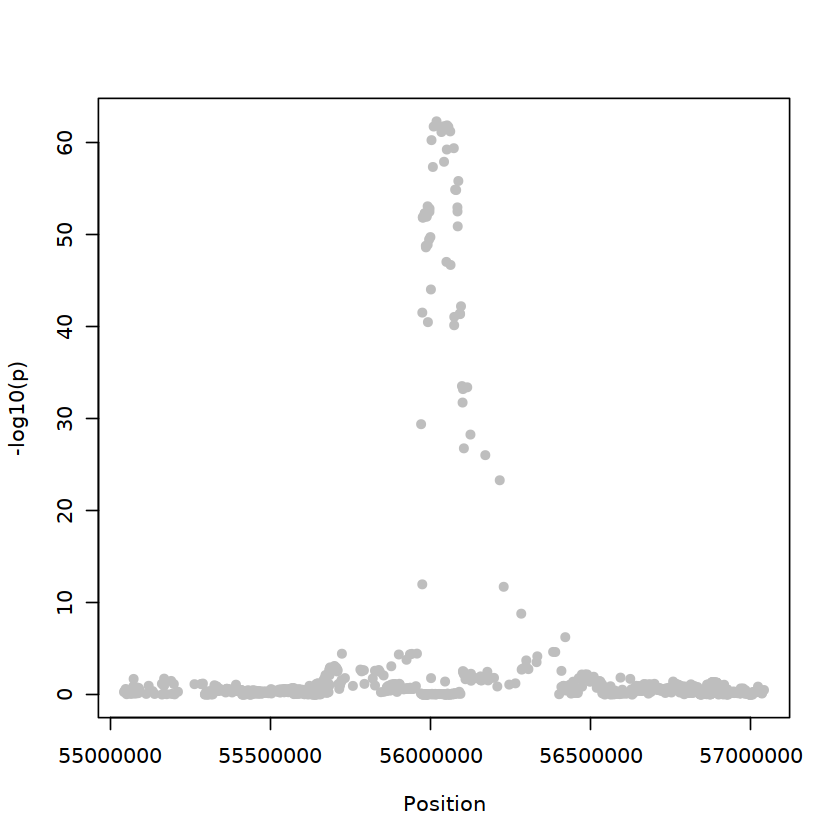

In [191]:
# GWAS
print(i)
plot_dataset(lapply(gwas_input_list[[i]], function(x){
    x[unique(output_all_effect$SNP[output_all_effect$ident == co_egene_var])]}))

In [192]:
co_egene_var

[1] "CD4T_RPS26___CD48__RPS26"

[1] "CD4T_RPS26___CD48__RPS26"


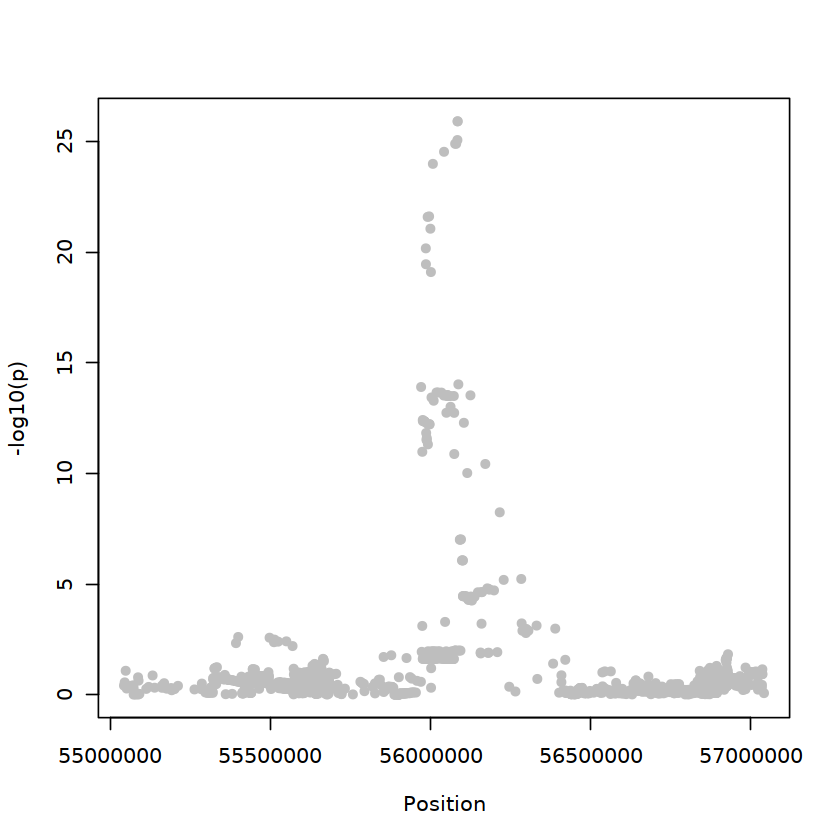

In [193]:
# coeQTL
print(co_egene_var)
plot_dataset(data_input_coeqtl[[co_egene_var]])

In [194]:
### Make combined p-value plot

In [195]:
input = gwas_input[gwas_input$Phenotype == i,] # GWAS data

In [196]:
input_coeqtl = output_all_effect[output_all_effect$ident == co_egene_var,] # Co-EQTL Input

In [197]:
plot_data = merge(input_coeqtl[,c('SNP', 'MetaBeta', 'MetaP')], input[,c('variant_id', 'pvalue', 'effect_size')], by.x = 'SNP', by.y = 'variant_id')

In [198]:
nrow(plot_data)

[1] 1341

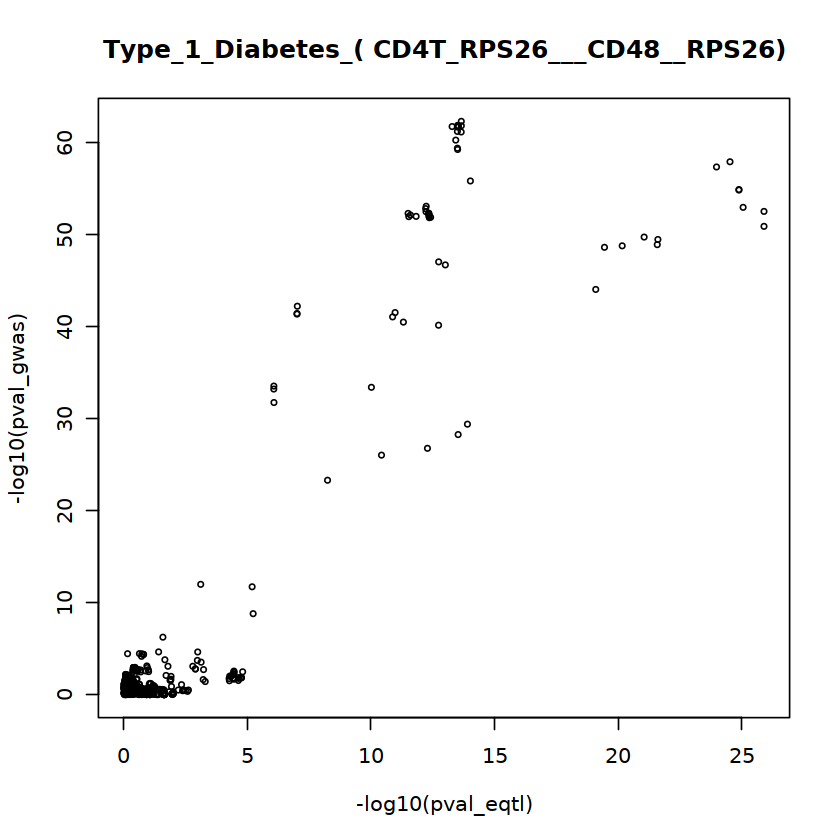

In [199]:
plot(-log10(plot_data$MetaP), -log10(as.numeric(plot_data$pvalue)), xlab = '-log10(pval_eqtl)', ylab = '-log10(pval_gwas)', main = paste0( i,'_',  '( ', co_egene_var, ')'), cex = 0.5)

In [200]:
### Save the used data

In [201]:
colnames(input) = paste0('gwas_', colnames(input))

In [202]:
save_data = merge(input_coeqtl, input, by.x = 'SNP', by.y = 'gwas_variant_id')

In [203]:
head(save_data,2)

SNP,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,⋯,gwas_position,gwas_non_effect_allele,gwas_frequency,gwas_pvalue,gwas_effect_size,gwas_Phenotype,gwas_Sample_Size,gwas_sample_size,gwas_standard_error,gwas_effect_allele
<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<chr>
rs10128982_A/C,CD48;RPS26,12,56435637,NA,RPS26___CD48__RPS26,12,55895415,A/C,C,⋯,55895415,A,0.201,1.32e-01,-0.029132,Type_1_Diabetes,405537,405537,0.019325,C
rs1020848_G/C,CD48;RPS26,12,56435637,NA,RPS26___CD48__RPS26,12,56669675,G/C,C,⋯,56669675,G,0.672,7.26e-02,-0.027293,Type_1_Diabetes,520580,520580,0.015202,C


In [204]:
nrow(save_data)

[1] 1341

In [205]:
write.table(save_data, file = paste0(path, "/colocalization_results/", "COEQTL_example_input_", i, ".csv"), append =FALSE, sep = ",", row.names = FALSE, col.names = TRUE)

### Run for all cell-types + genes

In [206]:
### Execute colocalization analysis

In [207]:
coloc_result_summary = data.frame()

In [208]:
coloc_result_detail = data.frame()

In [209]:
save_detail = FALSE

In [210]:
for(i in names(gwas_input_list)){
   for(ident in names(data_input_coeqtl)){      
        print(i)
        print(ident)
        
        colocalization_result = coloc.abf(
            dataset1=gwas_input_list[[i]],  # GWAS
            dataset2=data_input_coeqtl[[ident]],   # co-EQTL
            p1 = 1e-04, p2 = 1e-04, p12 = 1e-06)

        result_summary = data.frame(parameter = names(colocalization_result$summary), value = colocalization_result$summary, trait = i, identifier = ident)
        coloc_result_summary = rbind(coloc_result_summary, result_summary)

        result_detail = colocalization_result$results
        result_detail$trait = i
        result_detail$identifier = ident
        if(save_detail == TRUE){
           coloc_result_detail = rbind(coloc_result_detail, result_detail)
           }
    }
    }


[1] "White blood cell count"
[1] "monocyte_TMEM176A___CAPG__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.026100  0.000460  0.956000  0.016900  0.000609 
[1] "PP abf for shared variant: 0.0609%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___PTAFR__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.07630   0.00135   0.90600   0.01600   0.00047 
[1] "PP abf for shared variant: 0.047%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___MNDA__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.513000  0.009040  0.470000  0.008280  0.000273 
[1] "PP abf for shared variant: 0.0273%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___RNASE6__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.18200   0.00320   0.80100   0.01410   0.00045 
[1] "PP abf for shared variant: 0.045%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___TMEM176A__TSPO"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.233000  0.004120  0.749000  0.013200  0.000513 
[1] "PP abf for shared variant: 0.0513%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.514000  0.009020  0.469000  0.008230  0.000286 
[1] "PP abf for shared variant: 0.0286%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___S100A9__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.232000  0.004090  0.750000  0.013200  0.000446 
[1] "PP abf for shared variant: 0.0446%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.449000  0.007920  0.533000  0.009390  0.000383 
[1] "PP abf for shared variant: 0.0383%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.37500   0.00661   0.60700   0.01070   0.00042 
[1] "PP abf for shared variant: 0.042%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___LYZ__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.014600  0.000257  0.968000  0.017100  0.000552 
[1] "PP abf for shared variant: 0.0552%"
[1] "White blood cell count"
[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53400   0.00941   0.44900   0.00791   0.00027 
[1] "PP abf for shared variant: 0.027%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___RPL36__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.062900  0.000864  0.918000  0.012500  0.006000 
[1] "PP abf for shared variant: 0.6%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___RPL5__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.62600   0.00860   0.35800   0.00491   0.00163 
[1] "PP abf for shared variant: 0.163%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.30000   0.00413   0.68200   0.00933   0.00421 
[1] "PP abf for shared variant: 0.421%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___RPL32__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.056500  0.000777  0.923000  0.012600  0.006570 
[1] "PP abf for shared variant: 0.657%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___EEF

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.793000  0.010900  0.193000  0.002660  0.000165 
[1] "PP abf for shared variant: 0.0165%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___MAL__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.36300   0.00462   0.62100   0.00786   0.00354 
[1] "PP abf for shared variant: 0.354%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___PRF1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.48400   0.00665   0.50100   0.00686   0.00173 
[1] "PP abf for shared variant: 0.173%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___RPS13__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.033300  0.000457  0.947000  0.012900  0.006530 
[1] "PP abf for shared variant: 0.653%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___RPS6__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.33100   0.00454   0.65200   0.00892   0.00381 
[1] "PP abf for shared variant: 0.381%"
[1] "White blood cell count"
[1] "CD8T_SMDT1___RP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.791000  0.010900  0.195000  0.002680  0.000161 
[1] "PP abf for shared variant: 0.0161%"
[1] "White blood cell count"
[1] "CD4T_SMDT1___CD48__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.58400   0.00802   0.40100   0.00549   0.00175 
[1] "PP abf for shared variant: 0.175%"
[1] "White blood cell count"
[1] "CD4T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.51200   0.00703   0.47200   0.00646   0.00252 
[1] "PP abf for shared variant: 0.252%"
[1] "White blood cell count"
[1] "CD4T_SMDT1___RPS27__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.67300   0.00925   0.31200   0.00427   0.00116 
[1] "PP abf for shared variant: 0.116%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.13e-50  9.43e-01  3.49e-51  4.03e-02  1.65e-02 
[1] "PP abf for shared variant: 1.65%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.74e-50  9.28e-01  1.59e-51  5.35e-02  1.87e-02 
[1] "PP abf for shared variant: 1.87%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.12e-50  9.42e-01  4.18e-51  4.84e-02  9.30e-03 
[1] "PP abf for shared variant: 0.93%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.01e-50  9.29e-01  3.72e-51  4.29e-02  2.79e-02 
[1] "PP abf for shared variant: 2.79%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.01e-50  9.29e-01  3.81e-51  4.39e-02  2.75e-02 
[1] "PP abf for shared variant: 2.75%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.80e-50  9.45e-01  1.24e-51  4.17e-02  1.30e-02 
[1] "PP abf for shared variant: 1.3%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.79e-50  9.44e-01  1.33e-51  4.49e-02  1.06e-02 
[1] "PP abf for shared variant: 1.06%"
[1] "White blood cell count"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.11e-50  9.41e-01  3.79e-51  4.38e-02  1.50e-02 
[1] "PP abf for shared variant: 1.5%"
[1] "White blood cell count"
[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.94e-50  9.21e-01  4.02e-51  4.63e-02  3.28e-02 
[1] "PP abf for shared variant: 3.28%"
[1] "White blood cell count"
[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.78e-50  9.41e-01  1.31e-51  4.42e-02  1.48e-02 
[1] "PP abf for shared variant: 1.48%"
[1] "White blood cell count"
[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.57e-50  8.69e-01  3.01e-51  1.01e-01  2.98e-02 
[1] "PP abf for shared variant: 2.98%"
[1] "White blood cell count"
[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.73e-50  9.22e-01  1.79e-51  6.05e-02  1.76e-02 
[1] "PP abf for shared variant: 1.76%"
[1] "White blo

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.098100  0.001570  0.886000  0.014200  0.000419 
[1] "PP abf for shared variant: 0.0419%"
[1] "White blood cell count"
[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.698000  0.003970  0.296000  0.001680  0.000111 
[1] "PP abf for shared variant: 0.0111%"
[1] "White blood cell count"
[1] "DC_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.564000  0.003210  0.431000  0.002450  0.000122 
[1] "PP abf for shared variant: 0.0122%"
[1] "White blood cell count"
[1] "DC_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.623000  0.003540  0.372000  0.002110  0.000102 
[1] "PP abf for shared variant: 0.0102%"
[1] "White blood cell count"
[1] "B_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.282000  0.013100  0.673000  0.031200  0.000304 
[1] "PP abf for shared variant: 0.0304%"
[1] "White blood cell count"
[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.607000  0.028100  0.349000  0.016200  0.000317 
[1] "PP abf for shared variant: 0.0317%"
[1] "White blood cell count"
[1] "B_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.098300  0.004560  0.857000  0.039800  0.000211 
[1] "PP abf for shared variant: 0.0211%"
[1] "White blood cell count"
[1] "B_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.552000  0.025600  0.404000  0.018700  0.000308 
[1] "PP abf for shared variant: 0.0308%"
[1] "White blood cell count"
[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.537000  0.024900  0.418000  0.019400  0.000365 
[1] "PP abf for shared variant: 0.0365%"
[1] "White blood cell count"
[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.731000  0.033900  0.224000  0.010400  0.000359 
[1] "PP abf for shared variant: 0.0359%"
[1] "White blood cell count"
[1] "B_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.00e-04  3.25e-05  9.55e-01  4.43e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.674000  0.031300  0.281000  0.013000  0.000345 
[1] "PP abf for shared variant: 0.0345%"
[1] "White blood cell count"
[1] "B_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009500  0.000441  0.946000  0.043900  0.000189 
[1] "PP abf for shared variant: 0.0189%"
[1] "White blood cell count"
[1] "B_RPS26___RPL32__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.171000  0.007960  0.784000  0.036400  0.000222 
[1] "PP abf for shared variant: 0.0222%"
[1] "White blood cell count"
[1] "B_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004750  0.000221  0.951000  0.044100  0.000182 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "B_RPS26___RPS2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.552000  0.025600  0.403000  0.018700  0.000325 
[1] "PP abf for shared variant: 0.0325%"
[1] "White blood cell count"
[1] "B_RPS26___RPLP2__RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.574000  0.026700  0.381000  0.017700  0.000334 
[1] "PP abf for shared variant: 0.0334%"
[1] "White blood cell count"
[1] "B_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.112000  0.005220  0.843000  0.039100  0.000222 
[1] "PP abf for shared variant: 0.0222%"
[1] "White blood cell count"
[1] "B_RPS26___EEF1A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.470000  0.021800  0.485000  0.022500  0.000294 
[1] "PP abf for shared variant: 0.0294%"
[1] "White blood cell count"
[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.562000  0.026100  0.393000  0.018200  0.000321 
[1] "PP abf for shared variant: 0.0321%"
[1] "White blood cell count"
[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.733000  0.034000  0.223000  0.010300  0.000353 
[1] "PP abf for shared variant: 0.0353%"
[1] "White blood cell count"
[1] "B_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.039500  0.001840  0.916000  0.042500  0.000193 
[1] "PP abf for shared variant: 0.0193%"
[1] "White blood cell count"
[1] "B_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.077600  0.003600  0.878000  0.040800  0.000214 
[1] "PP abf for shared variant: 0.0214%"
[1] "White blood cell count"
[1] "B_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.253000  0.011700  0.703000  0.032600  0.000259 
[1] "PP abf for shared variant: 0.0259%"
[1] "White blood cell count"
[1] "B_RPS26___RPL34__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.65e-05  3.55e-06  9.55e-01  4.44e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "B_RPS26___RPS19__RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.748000  0.034700  0.207000  0.009630  0.000339 
[1] "PP abf for shared variant: 0.0339%"
[1] "White blood cell count"
[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5490    0.0255    0.4060    0.0188    0.0003 
[1] "PP abf for shared variant: 0.03%"
[1] "White blood cell count"
[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.697000  0.032400  0.258000  0.012000  0.000341 
[1] "PP abf for shared variant: 0.0341%"
[1] "White blood cell count"
[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.781000  0.036300  0.175000  0.008110  0.000363 
[1] "PP abf for shared variant: 0.0363%"
[1] "White blood cell count"
[1] "B_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.204000  0.009480  0.751000  0.034900  0.000227 
[1] "PP abf for shared variant: 0.0227%"
[1] "White blood cell count"
[1] "B_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.199000  0.009230  0.757000  0.035100  0.000249 
[1] "PP abf for shared variant: 0.0249%"
[1] "White blood cell count"
[1] "B_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.71e-05  7.93e-07  9.55e-01  4.44e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "B_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.177000  0.008200  0.779000  0.036200  0.000223 
[1] "PP abf for shared variant: 0.0223%"
[1] "White blood cell count"
[1] "B_RPS26___RPL9__RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.743000  0.034500  0.212000  0.009860  0.000349 
[1] "PP abf for shared variant: 0.0349%"
[1] "White blood cell count"
[1] "B_RPS26___RPS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.065500  0.003040  0.890000  0.041300  0.000198 
[1] "PP abf for shared variant: 0.0198%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.77e-08  8.23e-10  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL18A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.88e-12  8.75e-14  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.095200  0.004430  0.860000  0.040000  0.000211 
[1] "PP abf for shared variant: 0.0211%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.487000  0.022600  0.469000  0.021800  0.000315 
[1] "PP abf for shared variant: 0.0315%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.78e-09  1.29e-10  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL26__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.66e-12  1.70e-13  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.95e-09  9.10e-11  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.01e-12  4.70e-14  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.446000  0.020700  0.509000  0.023700  0.000289 
[1] "PP abf for shared variant: 0.0289%"
[1] "White blood cell count"
[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.791000  0.036800  0.164000  0.007650  0.000345 
[1] "PP abf for shared variant: 0.0345%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.17e-03  5.43e-05  9.54e-01  4.44e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.46e-07  3.94e-08  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS26__RPS29"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.98e-13  2.32e-14  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "NK_RPS26___KLRC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.100000  0.004650  0.855000  0.039800  0.000214 
[1] "PP abf for shared variant: 0.0214%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.698000  0.032500  0.257000  0.011900  0.000471 
[1] "PP abf for shared variant: 0.0471%"
[1] "White blood cell count"
[1] "NK_RPS26___B2M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-06  6.99e-08  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.14e-08  5.30e-10  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "NK_RPS26___MALAT1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.019300  0.000899  0.936000  0.043600  0.000218 
[1] "PP abf for shared variant: 0.0218%"
[1] "White blood cell count"
[1] "NK_RPS26___ACTB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003080  0.000144  0.952000  0.044300  0.000177 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS26__

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.658000  0.030600  0.297000  0.013800  0.000344 
[1] "PP abf for shared variant: 0.0344%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS26__RPS8"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.64e-07  3.09e-08  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL29__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.10e-05  3.30e-06  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "NK_RPS26___FGFBP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.322000  0.015000  0.633000  0.029500  0.000279 
[1] "PP abf for shared variant: 0.0279%"
[1] "White blood cell count"
[1] "NK_RPS26___EEF1B2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009330  0.000434  0.946000  0.044000  0.000182 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.745000  0.034600  0.210000  0.009760  0.000339 
[1] "PP abf for shared variant: 0.0339%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.10e-06  3.77e-07  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "NK_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.89e-15  3.67e-16  9.55e-01  4.45e-02  1.82e-04 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.646000  0.030100  0.309000  0.014400  0.000334 
[1] "PP abf for shared variant: 0.0334%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.52e-10  3.50e-11  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "NK_RPS26___RPL27A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.76e-11  2.68e-12  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53600   0.02500   0.41900   0.01950   0.00034 
[1] "PP abf for shared variant: 0.034%"
[1] "White blood cell count"
[1] "monocyte_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.289000  0.013500  0.666000  0.031000  0.000291 
[1] "PP abf for shared variant: 0.0291%"
[1] "White blood cell count"
[1] "monocyte_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001630  0.000076  0.954000  0.044400  0.000179 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "monocyte_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.80e-06  8.38e-08  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.33e-16  2.02e-17  9.55e-01  4.45e-02  1.82e-04 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.370000  0.017200  0.586000  0.027300  0.000267 
[1] "PP abf for shared variant: 0.0267%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.27e-07  2.92e-08  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.52e-10  1.18e-11  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-07  6.99e-09  9.55e-01  4.45e-02  1.84e-04 
[1] "PP abf for shared variant: 0.0184%"
[1] "White blood cell count"
[1] "monocyte_RPS26___FAU__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003240  0.000151  0.952000  0.044300  0.000181 
[1] "PP abf for shared variant: 0.0181%"
[1] "White blood cell count

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.576000  0.026800  0.379000  0.017600  0.000378 
[1] "PP abf for shared variant: 0.0378%"
[1] "White blood cell count"
[1] "monocyte_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.036400  0.001700  0.919000  0.042800  0.000196 
[1] "PP abf for shared variant: 0.0196%"
[1] "White blood cell count"
[1] "monocyte_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.270000  0.012600  0.685000  0.031900  0.000269 
[1] "PP abf for shared variant: 0.0269%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.91e-15  1.36e-16  9.55e-01  4.45e-02  1.84e-04 
[1] "PP abf for shared variant: 0.0184%"
[1] "White blood cell count"
[1] "monocyte_RPS26___EIF3M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.31900   0.01480   0.63700   0.02960   0.00025 
[1] "PP abf for shared variant: 0.025%"
[1] "White blood cell count"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.538000  0.025000  0.418000  0.019400  0.000346 
[1] "PP abf for shared variant: 0.0346%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RNASE6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.262000  0.012200  0.694000  0.032300  0.000296 
[1] "PP abf for shared variant: 0.0296%"
[1] "White blood cell count"
[1] "monocyte_RPS26___FTH1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.103000  0.004780  0.853000  0.039700  0.000209 
[1] "PP abf for shared variant: 0.0209%"
[1] "White blood cell count"
[1] "monocyte_RPS26___BTF3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.010900  0.000507  0.944000  0.044000  0.000183 
[1] "PP abf for shared variant: 0.0183%"
[1] "White blood cell count"
[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.549000  0.025600  0.406000  0.018900  0.000353 
[1] "PP abf for shared variant: 0.0353%"
[1] "White blood cell count"
[1] "monocyte_RPS26___IL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001100  0.000051  0.954000  0.044400  0.000177 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "monocyte_RPS26___ATP5A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.008720  0.000406  0.947000  0.044100  0.000219 
[1] "PP abf for shared variant: 0.0219%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.17e-07  3.34e-08  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPS26__RPS3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.16e-11  4.26e-12  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell coun

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.505000  0.023500  0.451000  0.021000  0.000343 
[1] "PP abf for shared variant: 0.0343%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.56e-08  1.66e-09  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "monocyte_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.18e-05  5.50e-07  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "monocyte_RPS26___CRTAP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.015300  0.000711  0.940000  0.043800  0.000188 
[1] "PP abf for shared variant: 0.0188%"
[1] "White blood cell count"
[1] "monocyte_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.395000  0.018400  0.560000  0.026100  0.000387 
[1] "PP abf for shared variant: 0.0387%"
[1] "White blood cell cou

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.410000  0.019100  0.545000  0.025400  0.000315 
[1] "PP abf for shared variant: 0.0315%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.09e-15  1.90e-16  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___PRF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.013600  0.000633  0.942000  0.043800  0.000186 
[1] "PP abf for shared variant: 0.0186%"
[1] "White blood cell count"
[1] "CD8T_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.03e-05  1.41e-06  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___EFHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.048300  0.002250  0.907000  0.042200  0.000194 
[1] "PP abf for shared variant: 0.0194%"
[1] "White blood cell count"
[1] "CD8T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53100   0.02470   0.42400   0.01970   0.00039 
[1] "PP abf for shared variant: 0.039%"
[1] "White blood cell count"
[1] "CD8T_RPS26___APOBEC3C__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.353000  0.016400  0.602000  0.028000  0.000292 
[1] "PP abf for shared variant: 0.0292%"
[1] "White blood cell count"
[1] "CD8T_RPS26___HLA-DRA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.016100  0.000751  0.939000  0.043700  0.000185 
[1] "PP abf for shared variant: 0.0185%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__TPT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.74e-14  1.27e-15  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.644000  0.030000  0.312000  0.014500  0.000327 
[1] "PP abf for shared variant: 0.0327%"
[1] "White blood cell count"
[1] "CD8T_RPS26___LCP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.80e-04  2.24e-05  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.64e-17  1.23e-18  9.55e-01  4.44e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL31__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.30e-17  2.00e-18  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD8T_RPS26___GZMM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.400000  0.018600  0.555000  0.025800  0.000266 
[1] "PP abf for shared variant: 0.0266%"
[1] "White blood cell count"
[1] "CD8T_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.613000  0.028600  0.342000  0.015900  0.000433 
[1] "PP abf for shared variant: 0.0433%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CREM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.337000  0.015700  0.618000  0.028800  0.000305 
[1] "PP abf for shared variant: 0.0305%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__S100A4"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.71e-04  7.97e-06  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RGS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.58e-06  1.67e-07  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.29e-09  1.07e-10  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.726000  0.033800  0.229000  0.010600  0.000352 
[1] "PP abf for shared variant: 0.0352%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CXCR4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.220000  0.010300  0.735000  0.034200  0.000233 
[1] "PP abf for shared variant: 0.0233%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SYNE1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.165000  0.007680  0.790000  0.036800  0.000227 
[1] "PP abf for shared variant: 0.0227%"
[1] "White blood cell count"
[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.631000  0.029400  0.324000  0.015100  0.000315 
[1] "PP abf for shared variant: 0.0315%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPLP0__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.80e-06  8.36e-08  9.55e-01  4.45e-02  1.80e-04 
[1] "PP abf for shared variant: 0.018%"
[1] "White blood cell count"
[1] "CD8T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.99e-10  9.25e-12  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___PDE3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.33e-04  6.19e-06  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL23A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-19  5.12e-21  9.55e-01  4.45e-02  1.84e-04 
[1] "PP abf for shared variant: 0.0184%"
[1] "White blood cell count"
[1] "CD8T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.68300   0.03180   0.27200   0.01270   0.00035 
[1] "PP abf for shared variant: 0.035%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.51e-05  3.50e-06  9.55e-01  4.45e-02  1.80e-04 
[1] "PP abf for shared variant: 0.018%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-09  5.80e-11  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.96e-20  1.38e-21  9.55e-01  4.45e-02  1.80e-04 
[1] "PP abf for shared variant: 0.018%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__RPS4X"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.64e-15  2.62e-16  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.67300   0.03130   0.28300   0.01320   0.00041 
[1] "PP abf for shared variant: 0.041%"
[1] "White blood cell count"
[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.568000  0.026500  0.387000  0.018000  0.000346 
[1] "PP abf for shared variant: 0.0346%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.15e-20  2.40e-21  9.55e-01  4.45e-02  1.73e-04 
[1] "PP abf for shared variant: 0.0173%"
[1] "White blood cell count"
[1] "CD8T_RPS26___NELL2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.81e-08  1.31e-09  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___EEF1D__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.77e-04  1.75e-05  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD8T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.038200  0.001780  0.917000  0.042700  0.000192 
[1] "PP abf for shared variant: 0.0192%"
[1] "White blood cell count"
[1] "CD8T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.725000  0.033600  0.231000  0.010700  0.000412 
[1] "PP abf for shared variant: 0.0412%"
[1] "White blood cell count"
[1] "CD8T_RPS26___PFDN5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.029700  0.001380  0.926000  0.043100  0.000186 
[1] "PP abf for shared variant: 0.0186%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CAMK4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.91e-07  1.82e-08  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___BHLHE40__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.015200  0.000709  0.940000  0.043800  0.000196 
[1] "PP abf for shared variant: 0.0196%"
[1] "White blood cell count"
[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.576000  0.026800  0.379000  0.017700  0.000397 
[1] "PP abf for shared variant: 0.0397%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SLA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.086300  0.004020  0.869000  0.040500  0.000197 
[1] "PP abf for shared variant: 0.0197%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CD8B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.38e-04  1.11e-05  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-18  7.73e-20  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___NGFRAP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.069600  0.003230  0.886000  0.041100  0.000197 
[1] "PP abf for shared variant: 0.0197%"
[1] "White blood cell count"
[1] "CD8T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.750000  0.034900  0.205000  0.009530  0.000402 
[1] "PP abf for shared variant: 0.0402%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SH3BGRL3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.04e-05  9.48e-07  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___PABPC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002770  0.000129  0.953000  0.044300  0.000179 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS26___FBL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.008300  0.000387  0.947000  0.044100  0.000179 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.646000  0.030000  0.309000  0.014300  0.000335 
[1] "PP abf for shared variant: 0.0335%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CCL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.72e-09  4.06e-10  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___GAPDH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-08  5.82e-10  9.55e-01  4.45e-02  1.73e-04 
[1] "PP abf for shared variant: 0.0173%"
[1] "White blood cell count"
[1] "CD8T_RPS26___NPM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.92e-06  2.75e-07  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.59e-18  2.13e-19  9.55e-01  4.45e-02  1.82e-04 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "CD8T_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.540000  0.025100  0.416000  0.019300  0.000298 
[1] "PP abf for shared variant: 0.0298%"
[1] "White blood cell count"
[1] "CD8T_RPS26___KLRD1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.006960  0.000324  0.948000  0.044200  0.000181 
[1] "PP abf for shared variant: 0.0181%"
[1] "White blood cell count"
[1] "CD8T_RPS26___MYC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007060  0.000329  0.948000  0.044100  0.000178 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RGS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.31100   0.01450   0.64400   0.03000   0.00026 
[1] "PP abf for shared variant: 0.026%"
[1] "White blood cell count"
[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.538000  0.025000  0.417000  0.019400  0.000345 
[1] "PP abf for shared variant: 0.0345%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SLC25A6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.14900   0.00696   0.80600   0.03750   0.00027 
[1] "PP abf for shared variant: 0.027%"
[1] "White blood cell count"
[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.586000  0.027300  0.369000  0.017200  0.000316 
[1] "PP abf for shared variant: 0.0316%"
[1] "White blood cell count"
[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.77400   0.03600   0.18100   0.00844   0.00036 
[1] "PP abf for shared variant: 0.036%"
[1] "White blood cell count"
[1] "CD8T_RPS26___HLA-A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.67e-16  1.24e-17  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__UBB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.74e-05  8.08e-07  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL17__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.80e-05  2.70e-06  9.55e-01  4.45e-02  1.82e-04 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "CD8T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.03e-12  4.78e-14  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.664000  0.030900  0.291000  0.013500  0.000363 
[1] "PP abf for shared variant: 0.0363%"
[1] "White blood cell count"
[1] "CD8T_RPS26___NDFIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.032000  0.001490  0.923000  0.043000  0.000217 
[1] "PP abf for shared variant: 0.0217%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.67e-17  4.04e-18  9.55e-01  4.45e-02  1.83e-04 
[1] "PP abf for shared variant: 0.0183%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.91e-15  8.87e-17  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-09  5.65e-11  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_R

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.665000  0.031000  0.290000  0.013500  0.000428 
[1] "PP abf for shared variant: 0.0428%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SRP14"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-04  5.65e-06  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.611000  0.028400  0.345000  0.016000  0.000375 
[1] "PP abf for shared variant: 0.0375%"
[1] "White blood cell count"
[1] "CD8T_RPS26___HMGB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.90e-04  3.21e-05  9.55e-01  4.44e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___NOSIP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.01e-06  4.70e-08  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL36__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.00e-16  1.40e-17  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.07e-18  4.98e-20  9.55e-01  4.45e-02  1.86e-04 
[1] "PP abf for shared variant: 0.0186%"
[1] "White blood cell count"
[1] "CD8T_RP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.546000  0.025400  0.409000  0.019000  0.000335 
[1] "PP abf for shared variant: 0.0335%"
[1] "White blood cell count"
[1] "CD8T_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.028900  0.001340  0.926000  0.043100  0.000193 
[1] "PP abf for shared variant: 0.0193%"
[1] "White blood cell count"
[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.745000  0.034700  0.210000  0.009780  0.000351 
[1] "PP abf for shared variant: 0.0351%"
[1] "White blood cell count"
[1] "CD8T_RPS26___EIF3K__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007650  0.000356  0.948000  0.044100  0.000191 
[1] "PP abf for shared variant: 0.0191%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.31e-17  1.07e-18  9.55e-01  4.45e-02  1.80e-04 
[1] "PP abf for shared variant: 0.018%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SRSF3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.300000  0.014000  0.655000  0.030500  0.000245 
[1] "PP abf for shared variant: 0.0245%"
[1] "White blood cell count"
[1] "CD8T_RPS26___GLTSCR2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-05  4.92e-07  9.55e-01  4.45e-02  1.80e-04 
[1] "PP abf for shared variant: 0.018%"
[1] "White blood cell count"
[1] "CD8T_R

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.70000   0.03260   0.25500   0.01190   0.00038 
[1] "PP abf for shared variant: 0.038%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__RPSAP58"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.02e-04  4.73e-06  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___C6orf48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.60e-08  2.14e-09  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.98e-25  1.85e-26  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CCDC57__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.23e-06  1.04e-07  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.68100   0.03170   0.27400   0.01270   0.00034 
[1] "PP abf for shared variant: 0.034%"
[1] "White blood cell count"
[1] "CD8T_RPS26___ARF6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.144000  0.006710  0.811000  0.037800  0.000218 
[1] "PP abf for shared variant: 0.0218%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CD81__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.25000   0.01160   0.70500   0.03280   0.00029 
[1] "PP abf for shared variant: 0.029%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__TMEM123"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004220  0.000196  0.951000  0.044300  0.000178 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD8T_RPS26___ALKBH7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004230  0.000197  0.951000  0.044300  0.000178 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD8T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.611000  0.028400  0.345000  0.016000  0.000324 
[1] "PP abf for shared variant: 0.0324%"
[1] "White blood cell count"
[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.726000  0.033800  0.230000  0.010700  0.000348 
[1] "PP abf for shared variant: 0.0348%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.26700   0.01240   0.68800   0.03200   0.00024 
[1] "PP abf for shared variant: 0.024%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.99e-15  9.25e-17  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.591000  0.027500  0.365000  0.017000  0.000314 
[1] "PP abf for shared variant: 0.0314%"
[1] "White blood cell count"
[1] "CD8T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.62e-10  1.22e-11  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CALM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.115000  0.005350  0.840000  0.039100  0.000209 
[1] "PP abf for shared variant: 0.0209%"
[1] "White blood cell count"
[1] "CD8T_RPS26___HOPX__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.348000  0.016200  0.607000  0.028200  0.000413 
[1] "PP abf for shared variant: 0.0413%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CD55__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.035800  0.001670  0.919000  0.042800  0.000193 
[1] "PP abf for shared variant: 0.0193%"
[1] "White blood cell count"
[1] "CD8T_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.71500   0.03330   0.24000   0.01120   0.00036 
[1] "PP abf for shared variant: 0.036%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-17  6.79e-19  9.55e-01  4.45e-02  1.82e-04 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.08e-13  5.03e-15  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___PTMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002950  0.000137  0.952000  0.044300  0.000177 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL36A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.78e-10  8.27e-12  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.589000  0.027400  0.366000  0.017000  0.000322 
[1] "PP abf for shared variant: 0.0322%"
[1] "White blood cell count"
[1] "CD8T_RPS26___KLRB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002170  0.000101  0.953000  0.044400  0.000177 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___MAL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.48e-09  6.87e-11  9.56e-01  4.43e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.00e-16  3.26e-17  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.583000  0.027100  0.372000  0.017300  0.000304 
[1] "PP abf for shared variant: 0.0304%"
[1] "White blood cell count"
[1] "CD8T_RPS26___ARPC2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.00e-11  9.32e-13  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.412000  0.019200  0.543000  0.025300  0.000316 
[1] "PP abf for shared variant: 0.0316%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.56e-08  7.27e-10  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.16e-13  1.47e-14  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.670000  0.031200  0.286000  0.013300  0.000422 
[1] "PP abf for shared variant: 0.0422%"
[1] "White blood cell count"
[1] "CD8T_RPS26___LEF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.33e-09  1.08e-10  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___PTPRC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.64e-08  2.16e-09  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SRSF7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.374000  0.017400  0.582000  0.027100  0.000319 
[1] "PP abf for shared variant: 0.0319%"
[1] "White blood cell count"
[1] "CD8T_RPS26___EIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.01e-03  4.69e-05  9.54e-01  4.44e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.523000  0.024400  0.432000  0.020100  0.000326 
[1] "PP abf for shared variant: 0.0326%"
[1] "White blood cell count"
[1] "CD8T_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.61e-11  3.08e-12  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___DOK2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.350000  0.016300  0.606000  0.028200  0.000298 
[1] "PP abf for shared variant: 0.0298%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.14e-06  1.93e-07  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.518000  0.024100  0.437000  0.020300  0.000301 
[1] "PP abf for shared variant: 0.0301%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.528000  0.024600  0.427000  0.019900  0.000341 
[1] "PP abf for shared variant: 0.0341%"
[1] "White blood cell count"
[1] "CD8T_RPS26___C1orf228__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.026200  0.001220  0.929000  0.043300  0.000191 
[1] "PP abf for shared variant: 0.0191%"
[1] "White blood cell count"
[1] "CD8T_RPS26___DUSP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.005280  0.000246  0.950000  0.044200  0.000179 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD8T_RPS26___EIF4B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.77e-09  1.76e-10  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL27__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-09  5.70e-11  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD8T

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.590000  0.027500  0.365000  0.017000  0.000504 
[1] "PP abf for shared variant: 0.0504%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__TOMM7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.043500  0.002020  0.912000  0.042500  0.000192 
[1] "PP abf for shared variant: 0.0192%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__SRGN"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.23e-16  1.50e-17  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___HLA-E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.37e-03  6.37e-05  9.54e-01  4.44e-02  1.80e-04 
[1] "PP abf for shared variant: 0.018%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__TYROBP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007550  0.000352  0.948000  0.044100  0.000188 
[1] "PP abf for shared variant: 0.0188%"
[1] "White blood cell count"
[1] "CD8T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.755000  0.035200  0.200000  0.009320  0.000353 
[1] "PP abf for shared variant: 0.0353%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CST7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.17e-07  3.81e-08  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS26___AIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.97e-04  1.38e-05  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___IL7R__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.72e-03  8.03e-05  9.54e-01  4.44e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RHOH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.027900  0.001300  0.927000  0.043200  0.000193 
[1] "PP abf for shared variant: 0.0193%"
[1] "White blood cell count"
[1] "CD8T_RPS26_

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.653000  0.030400  0.302000  0.014100  0.000348 
[1] "PP abf for shared variant: 0.0348%"
[1] "White blood cell count"
[1] "CD8T_RPS26___GZMH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.137000  0.006360  0.819000  0.038100  0.000249 
[1] "PP abf for shared variant: 0.0249%"
[1] "White blood cell count"
[1] "CD8T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.10e-05  4.24e-06  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.81e-10  1.31e-11  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.51e-19  7.04e-21  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD8T_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.582000  0.027100  0.373000  0.017400  0.000366 
[1] "PP abf for shared variant: 0.0366%"
[1] "White blood cell count"
[1] "CD8T_RPS26___APOBEC3G__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.26e-04  1.52e-05  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RP11-291B21.2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.87e-05  8.68e-07  9.55e-01  4.43e-02  1.80e-04 
[1] "PP abf for shared variant: 0.018%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.20e-19  1.49e-20  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD8T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.63e-18  1.69e-19  9.55e-01  4.45e-02  1.85e-04 
[1] "PP abf for shared variant: 0.0185%"
[1] "White blood cell count"
[1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.772000  0.004360  0.222000  0.001250  0.000131 
[1] "PP abf for shared variant: 0.0131%"
[1] "White blood cell count"
[1] "CD8T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.61e-05  3.08e-06  9.55e-01  4.45e-02  1.73e-04 
[1] "PP abf for shared variant: 0.0173%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__TMSB10"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.056800  0.002640  0.899000  0.041800  0.000194 
[1] "PP abf for shared variant: 0.0194%"
[1] "White blood cell count"
[1] "CD4T_RPS26___CHCHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.147000  0.006820  0.809000  0.037700  0.000247 
[1] "PP abf for shared variant: 0.0247%"
[1] "White blood cell count"
[1] "CD4T_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.19e-04  4.28e-05  9.54e-01  4.44e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD4T_RP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.480000  0.022300  0.476000  0.022100  0.000329 
[1] "PP abf for shared variant: 0.0329%"
[1] "White blood cell count"
[1] "CD4T_RPS26___ANXA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.63e-05  7.57e-07  9.55e-01  4.45e-02  1.83e-04 
[1] "PP abf for shared variant: 0.0183%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__SOD2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.016800  0.000783  0.939000  0.043700  0.000186 
[1] "PP abf for shared variant: 0.0186%"
[1] "White blood cell count"
[1] "CD4T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.23e-17  1.04e-18  9.55e-01  4.45e-02  1.85e-04 
[1] "PP abf for shared variant: 0.0185%"
[1] "White blood cell count"
[1] "CD4T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.31e-13  6.12e-15  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD4T_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.550000  0.025600  0.405000  0.018900  0.000297 
[1] "PP abf for shared variant: 0.0297%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.62e-25  1.22e-26  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD4T_RPS26___ALOX5AP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003690  0.000172  0.952000  0.044300  0.000179 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__TSHZ2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-03  5.61e-05  9.54e-01  4.44e-02  1.83e-04 
[1] "PP abf for shared variant: 0.0183%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__TIGIT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.14e-06  4.26e-07  9.55e-01  4.45e-02  1.82e-04 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "CD4T_

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.351000  0.016300  0.605000  0.028100  0.000279 
[1] "PP abf for shared variant: 0.0279%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__SH3YL1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.19e-07  1.95e-08  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.88e-26  8.77e-28  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD4T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.010700  0.000500  0.944000  0.044000  0.000563 
[1] "PP abf for shared variant: 0.0563%"
[1] "White blood cell count"
[1] "CD4T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.65e-11  2.63e-12  9.55e-01  4.45e-02  1.77e-04 
[1] "PP abf for shared variant: 0.0177%"
[1] "White blood cell count"
[1] "CD4T

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.613000  0.028500  0.343000  0.015900  0.000402 
[1] "PP abf for shared variant: 0.0402%"
[1] "White blood cell count"
[1] "CD4T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.31e-14  6.11e-16  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD4T_RPS26___FAM134B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.210000  0.009780  0.745000  0.034700  0.000265 
[1] "PP abf for shared variant: 0.0265%"
[1] "White blood cell count"
[1] "CD4T_RPS26___ISG20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007460  0.000347  0.948000  0.044100  0.000183 
[1] "PP abf for shared variant: 0.0183%"
[1] "White blood cell count"
[1] "CD4T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.50e-10  2.10e-11  9.55e-01  4.45e-02  1.81e-04 
[1] "PP abf for shared variant: 0.0181%"
[1] "White blood cell count"
[1] "CD4T_R

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.455000  0.021200  0.500000  0.023300  0.000335 
[1] "PP abf for shared variant: 0.0335%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.05e-05  9.53e-07  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD4T_RPS26___CALM2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.10e-05  3.77e-06  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD4T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-15  6.98e-17  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD4T_RPS26___MT-ND2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.183000  0.008520  0.772000  0.035900  0.000291 
[1] "PP abf for shared variant: 0.0291%"
[1] "White blood cell count"
[1] "CD4T_R

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.448000  0.020900  0.507000  0.023600  0.000305 
[1] "PP abf for shared variant: 0.0305%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.88e-08  1.34e-09  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__TYMP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.044300  0.002060  0.911000  0.042400  0.000205 
[1] "PP abf for shared variant: 0.0205%"
[1] "White blood cell count"
[1] "CD4T_RPS26___HLA-DPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.131000  0.006100  0.824000  0.038400  0.000227 
[1] "PP abf for shared variant: 0.0227%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.74e-22  8.11e-24  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD4T_

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.486000  0.022600  0.469000  0.021800  0.000304 
[1] "PP abf for shared variant: 0.0304%"
[1] "White blood cell count"
[1] "CD4T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.82e-15  8.47e-17  9.55e-01  4.45e-02  1.73e-04 
[1] "PP abf for shared variant: 0.0173%"
[1] "White blood cell count"
[1] "CD4T_RPS26___PPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.09e-06  9.74e-08  9.55e-01  4.45e-02  1.74e-04 
[1] "PP abf for shared variant: 0.0174%"
[1] "White blood cell count"
[1] "CD4T_RPS26___EBPL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.40900   0.01900   0.54600   0.02540   0.00029 
[1] "PP abf for shared variant: 0.029%"
[1] "White blood cell count"
[1] "CD4T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.213000  0.009920  0.742000  0.034600  0.000235 
[1] "PP abf for shared variant: 0.0235%"
[1] "White blood cell count"
[1] "CD4T_RPS26___

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.537000  0.025000  0.418000  0.019500  0.000389 
[1] "PP abf for shared variant: 0.0389%"
[1] "White blood cell count"
[1] "CD4T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.70e-07  7.90e-09  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__TAGLN2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.492000  0.022900  0.463000  0.021600  0.000294 
[1] "PP abf for shared variant: 0.0294%"
[1] "White blood cell count"
[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.558000  0.026000  0.397000  0.018500  0.000384 
[1] "PP abf for shared variant: 0.0384%"
[1] "White blood cell count"
[1] "CD4T_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.57e-06  7.31e-08  9.55e-01  4.45e-02  1.81e-04 
[1] "PP abf for shared variant: 0.0181%"
[1] "White blood cell count"
[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.90e-06  8.84e-08  9.55e-01  4.45e-02  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "White blood cell count"
[1] "CD4T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.64e-08  3.09e-09  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__TATDN1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.028300  0.001320  0.927000  0.043200  0.000182 
[1] "PP abf for shared variant: 0.0182%"
[1] "White blood cell count"
[1] "C

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.474000  0.022100  0.481000  0.022400  0.000289 
[1] "PP abf for shared variant: 0.0289%"
[1] "White blood cell count"
[1] "CD4T_RPS26___MT-CYB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.81e-04  8.41e-06  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD4T_RPS26___HSPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.27800   0.01300   0.67700   0.03150   0.00024 
[1] "PP abf for shared variant: 0.024%"
[1] "White blood cell count"
[1] "CD4T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.46e-10  2.08e-11  9.55e-01  4.45e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.94e-09  1.37e-10  9.55e-01  4.45e-02  1.75e-04 
[1] "PP abf for shared variant: 0.0175%"
[1] "White blood cell count"
[1] "CD4T_RP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.581000  0.027000  0.374000  0.017400  0.000473 
[1] "PP abf for shared variant: 0.0473%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.54e-08  3.04e-09  9.55e-01  4.45e-02  1.78e-04 
[1] "PP abf for shared variant: 0.0178%"
[1] "White blood cell count"
[1] "CD4T_RPS26___ATP2B1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-03  5.41e-05  9.54e-01  4.44e-02  1.79e-04 
[1] "PP abf for shared variant: 0.0179%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.41e-28  6.58e-30  9.55e-01  4.45e-02  1.87e-04 
[1] "PP abf for shared variant: 0.0187%"
[1] "White blood cell count"
[1] "CD4T_RPS26___RBM39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.006150  0.000286  0.949000  0.044200  0.000196 
[1] "PP abf for shared variant: 0.0196%"
[1] "White blood cell count"
[1] "CD4T_RP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.46600   0.04960   0.43700   0.04640   0.00111 
[1] "PP abf for shared variant: 0.111%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___RNASE6__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.16600   0.01770   0.73700   0.07830   0.00123 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___TMEM176A__TSPO"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2130    0.0227    0.6900    0.0733    0.0012 
[1] "PP abf for shared variant: 0.12%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.46700   0.04920   0.43600   0.04590   0.00141 
[1] "PP abf for shared variant: 0.141%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___S100A9__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.21200   0.02250   0.69100   0.07340   0.00116 
[1] "PP abf for shared variant: 0.116%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.40700   0.04320   0.49600   0.05260   0.00105 
[1] "PP abf for shared variant: 0.105%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.34100   0.03620   0.56200   0.05970   0.00116 
[1] "PP abf for shared variant: 0.116%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___LYZ__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01340   0.00142   0.88900   0.09450   0.00125 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.486000  0.051700  0.417000  0.044300  0.000946 
[1] "PP abf for shared variant: 0.0946%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___RPL36__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002860  0.000913  0.754000  0.241000  0.001030 
[1] "PP abf for shared variant: 0.103%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___RPL5__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.08740   0.02800   0.66900   0.21400   0.00125 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.04190   0.01340   0.71500   0.22900   0.00107 
[1] "PP abf for shared variant: 0.107%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___RPL32__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00344   0.00110   0.75400   0.24100   0.00102 
[1] "PP abf for shared variant: 0.102%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___EEF1A1__SMDT1"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.59100   0.18900   0.16500   0.05280   0.00167 
[1] "PP abf for shared variant: 0.167%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___MAL__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.03600   0.01140   0.72200   0.23000   0.00108 
[1] "PP abf for shared variant: 0.108%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___PRF1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.09590   0.03060   0.66100   0.21100   0.00113 
[1] "PP abf for shared variant: 0.113%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___RPS13__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001430  0.000458  0.756000  0.242000  0.001020 
[1] "PP abf for shared variant: 0.102%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___RPS6__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01650   0.00527   0.74000   0.23700   0.00105 
[1] "PP abf for shared variant: 0.105%"
[1] "Crohn's Disease"
[1] "CD8T_SMDT1___RPS18__SMDT1"
PP.H0.abf PP.H1.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.58300   0.18600   0.17400   0.05550   0.00179 
[1] "PP abf for shared variant: 0.179%"
[1] "Crohn's Disease"
[1] "CD4T_SMDT1___CD48__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.05080   0.01620   0.70600   0.22600   0.00121 
[1] "PP abf for shared variant: 0.121%"
[1] "Crohn's Disease"
[1] "CD4T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.08550   0.02730   0.67100   0.21500   0.00113 
[1] "PP abf for shared variant: 0.113%"
[1] "Crohn's Disease"
[1] "CD4T_SMDT1___RPS27__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.14800   0.04720   0.60900   0.19500   0.00116 
[1] "PP abf for shared variant: 0.116%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.58e-05  3.65e-01  2.74e-05  6.32e-01  3.24e-03 
[1] "PP abf for shared variant: 0.324%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DRA"
PP.H0.abf PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.04e-05  4.72e-01  2.27e-05  5.24e-01  4.06e-03 
[1] "PP abf for shared variant: 0.406%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.64e-05  6.11e-01  1.66e-05  3.83e-01  5.58e-03 
[1] "PP abf for shared variant: 0.558%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.98e-05  4.57e-01  2.33e-05  5.39e-01  3.80e-03 
[1] "PP abf for shared variant: 0.38%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.41e-06  1.48e-01  3.68e-05  8.50e-01  1.32e-03 
[1] "PP abf for shared variant: 0.132%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.26e-05  5.18e-01  2.09e-05  4.78e-01  4.51e-03 
[1] "PP abf for shared variant: 0.451%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-05  3.34e-01  2.90e-05  6.63e-01  2.79e-03 
[1] "PP abf for shared variant: 0.279%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.31e-05  5.33e-01  2.00e-05  4.62e-01  4.49e-03 
[1] "PP abf for shared variant: 0.449%"
[1] "Crohn's Disease"
[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.26e-06  1.68e-01  3.59e-05  8.31e-01  1.45e-03 
[1] "PP abf for shared variant: 0.145%"
[1] "Crohn's Disease"
[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.12e-06  2.59e-02  4.21e-05  9.74e-01  2.00e-04 
[1] "PP abf for shared variant: 0.02%"
[1] "Crohn's Disease"
[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.64e-08  3.78e-04  4.32e-05  1.00e+00  4.48e-06 
[1] "PP abf for shared variant: 0.000448%"
[1] "Crohn's Disease"
[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.71e-08  3.95e-04  4.32e-05  1.00e+00  4.47e-06 
[1] "PP abf for shared variant: 0.000447%"
[1] "Crohn's Disease"
[1] "mono

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.88e-09  5.55e-02  5.33e-08  4.99e-01  4.45e-01 
[1] "PP abf for shared variant: 44.5%"
[1] "Crohn's Disease"
[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.669000  0.031900  0.285000  0.013600  0.000569 
[1] "PP abf for shared variant: 0.0569%"
[1] "Crohn's Disease"
[1] "DC_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.539000  0.025700  0.414000  0.019800  0.000756 
[1] "PP abf for shared variant: 0.0756%"
[1] "Crohn's Disease"
[1] "DC_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.596000  0.028500  0.357000  0.017000  0.000672 
[1] "PP abf for shared variant: 0.0672%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2810    0.0136    0.6710    0.0325    0.0010 
[1] "PP abf for shared variant: 0.1%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.604000  0.029100  0.350000  0.016900  0.000732 
[1] "PP abf for shared variant: 0.0732%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.09800   0.00474   0.85500   0.04140   0.00115 
[1] "PP abf for shared variant: 0.115%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.549000  0.026600  0.404000  0.019500  0.000693 
[1] "PP abf for shared variant: 0.0693%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.535000  0.025900  0.418000  0.020200  0.000739 
[1] "PP abf for shared variant: 0.0739%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.728000  0.035200  0.226000  0.010900  0.000615 
[1] "PP abf for shared variant: 0.0615%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.98e-04  3.38e-05  9.52e-01  4.61e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.671000  0.032500  0.282000  0.013700  0.000702 
[1] "PP abf for shared variant: 0.0702%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009470  0.000458  0.943000  0.045600  0.001220 
[1] "PP abf for shared variant: 0.122%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL32__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.17100   0.00827   0.78200   0.03780   0.00106 
[1] "PP abf for shared variant: 0.106%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004740  0.000229  0.948000  0.045900  0.001250 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.550000  0.026600  0.403000  0.019500  0.000762 
[1] "PP abf for shared variant: 0.0762%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.572000  0.027700  0.381000  0.018400  0.000702 
[1] "PP abf for shared variant: 0.0702%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.11200   0.00542   0.84100   0.04070   0.00115 
[1] "PP abf for shared variant: 0.115%"
[1] "Crohn's Disease"
[1] "B_RPS26___EEF1A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.468000  0.022700  0.485000  0.023500  0.000807 
[1] "PP abf for shared variant: 0.0807%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.560000  0.027100  0.393000  0.019000  0.000694 
[1] "PP abf for shared variant: 0.0694%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.729000  0.035300  0.225000  0.010900  0.000662 
[1] "PP abf for shared variant: 0.0662%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.03940   0.00191   0.91300   0.04420   0.00119 
[1] "PP abf for shared variant: 0.119%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.07730   0.00374   0.87500   0.04240   0.00119 
[1] "PP abf for shared variant: 0.119%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.25200   0.01220   0.70100   0.03390   0.00112 
[1] "PP abf for shared variant: 0.112%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL34__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.63e-05  3.69e-06  9.53e-01  4.61e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS19__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.744000  0.036000  0.209000  0.010100  0.000534 
[1] "PP abf for shared variant: 0.0534%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.54700   0.02650   0.40600   0.01960   0.00068 
[1] "PP abf for shared variant: 0.068%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.694000  0.033600  0.260000  0.012600  0.000561 
[1] "PP abf for shared variant: 0.0561%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.777000  0.037600  0.176000  0.008510  0.000439 
[1] "PP abf for shared variant: 0.0439%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.20300   0.00985   0.74900   0.03630   0.00108 
[1] "PP abf for shared variant: 0.108%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.19800   0.00958   0.75500   0.03650   0.00101 
[1] "PP abf for shared variant: 0.101%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.70e-05  8.23e-07  9.53e-01  4.61e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.17600   0.00852   0.77700   0.03760   0.00106 
[1] "PP abf for shared variant: 0.106%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPL9__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.74000   0.03580   0.21400   0.01030   0.00048 
[1] "PP abf for shared variant: 0.048%"
[1] "Crohn's Disease"
[1] "B_RPS26___RPS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.06530   0.00316   0.88700   0.04290   0.00121 
[1] "PP abf for shared variant: 0.121%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.76e-08  8.54e-10  9.53e-01  4.61e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL18A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.88e-12  9.08e-14  9.53e-01  4.61e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.09490   0.00459   0.85800   0.04150   0.00120 
[1] "PP abf for shared variant: 0.12%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.485000  0.023500  0.468000  0.022700  0.000974 
[1] "PP abf for shared variant: 0.0974%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.77e-09  1.34e-10  9.53e-01  4.61e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL26__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.64e-12  1.76e-13  9.53e-01  4.61e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.95e-09  9.44e-11  9.53e-01  4.61e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.01e-12  4.88e-14  9.53e-01  4.61e-02  1.30e-03 
[1] "PP abf for shared variant: 0.13%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.444000  0.021500  0.509000  0.024600  0.000924 
[1] "PP abf for shared variant: 0.0924%"
[1] "Crohn's Disease"
[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.788000  0.038100  0.166000  0.008020  0.000456 
[1] "PP abf for shared variant: 0.0456%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-03  5.64e-05  9.51e-01  4.60e-02  1.38e-03 
[1] "PP abf for shared variant: 0.138%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.44e-07  4.09e-08  9.53e-01  4.61e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__RPS29"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.97e-13  2.40e-14  9.53e-01  4.61e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "NK_RPS26___KLRC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.09970   0.00483   0.85300   0.04130   0.00131 
[1] "PP abf for shared variant: 0.131%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL17__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.695000  0.033700  0.258000  0.012500  0.000672 
[1] "PP abf for shared variant: 0.0672%"
[1] "Crohn's Disease"
[1] "NK_RPS26___B2M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-06  7.25e-08  9.53e-01  4.61e-02  1.35e-03 
[1] "PP abf for shared variant: 0.135%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.14e-08  5.50e-10  9.53e-01  4.61e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "NK_RPS26___MALAT1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.019300  0.000933  0.933000  0.045200  0.001230 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "NK_RPS26___ACTB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003080  0.000149  0.950000  0.046000  0.001270 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.655000  0.031700  0.298000  0.014400  0.000767 
[1] "PP abf for shared variant: 0.0767%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__RPS8"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.62e-07  3.21e-08  9.53e-01  4.61e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL29__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.07e-05  3.43e-06  9.53e-01  4.61e-02  1.31e-03 
[1] "PP abf for shared variant: 0.131%"
[1] "Crohn's Disease"
[1] "NK_RPS26___FGFBP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.32100   0.01550   0.63200   0.03060   0.00102 
[1] "PP abf for shared variant: 0.102%"
[1] "Crohn's Disease"
[1] "NK_RPS26___EEF1B2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009310  0.000451  0.943000  0.045700  0.001340 
[1] "PP abf for shared variant: 0.134%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__RPSA"
PP.H0.abf PP.H1.abf PP.H2.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.743000  0.034000  0.212000  0.009720  0.000551 
[1] "PP abf for shared variant: 0.0551%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.08e-06  3.91e-07  9.53e-01  4.61e-02  1.34e-03 
[1] "PP abf for shared variant: 0.134%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.87e-15  3.81e-16  9.53e-01  4.61e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.644000  0.031200  0.310000  0.015000  0.000595 
[1] "PP abf for shared variant: 0.0595%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.50e-10  3.63e-11  9.53e-01  4.61e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "NK_RPS26___RPL27A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.74e-11  2.78e-12  9.53e-01  4.61e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53400   0.02590   0.41900   0.02030   0.00085 
[1] "PP abf for shared variant: 0.085%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.288000  0.014000  0.665000  0.032300  0.000973 
[1] "PP abf for shared variant: 0.0973%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001630  0.000079  0.951000  0.046200  0.001280 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.80e-06  8.72e-08  9.52e-01  4.62e-02  1.36e-03 
[1] "PP abf for shared variant: 0.136%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.32e-16  2.10e-17  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL35A__RPS26"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.368000  0.017900  0.585000  0.028400  0.000858 
[1] "PP abf for shared variant: 0.0858%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.25e-07  3.03e-08  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.52e-10  1.22e-11  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-07  7.27e-09  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___FAU__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003230  0.000157  0.949000  0.046100  0.001310 
[1] "PP abf for shared variant: 0.131%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL21__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.573000  0.027800  0.380000  0.018400  0.000846 
[1] "PP abf for shared variant: 0.0846%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.03630   0.00176   0.91600   0.04450   0.00123 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.26900   0.01310   0.68400   0.03320   0.00111 
[1] "PP abf for shared variant: 0.111%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.90e-15  1.41e-16  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___EIF3M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.318000  0.015400  0.635000  0.030800  0.000998 
[1] "PP abf for shared variant: 0.0998%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPS19__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.535000  0.026000  0.418000  0.020300  0.000785 
[1] "PP abf for shared variant: 0.0785%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RNASE6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.26100   0.01270   0.69200   0.03360   0.00111 
[1] "PP abf for shared variant: 0.111%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___FTH1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.10200   0.00497   0.85000   0.04130   0.00116 
[1] "PP abf for shared variant: 0.116%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___BTF3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.010900  0.000528  0.942000  0.045700  0.001250 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.547000  0.026600  0.406000  0.019700  0.000801 
[1] "PP abf for shared variant: 0.0801%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___IL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.09e-03  5.29e-05  9.52e-01  4.61e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___ATP5A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.008690  0.000422  0.944000  0.045800  0.001410 
[1] "PP abf for shared variant: 0.141%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.15e-07  3.47e-08  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPS26__RPS3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.13e-11  4.43e-12  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL13A__RPS26"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.50300   0.02440   0.45000   0.02180   0.00111 
[1] "PP abf for shared variant: 0.111%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.55e-08  1.72e-09  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.18e-05  5.72e-07  9.52e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___CRTAP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.015200  0.000739  0.937000  0.045500  0.001240 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.394000  0.019100  0.559000  0.027100  0.000896 
[1] "PP abf for shared variant: 0.0896%"
[1] "Crohn's Disease"
[1] "monocyte_RPS26___RPL10A__RPS26

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.408000  0.019800  0.545000  0.026400  0.000829 
[1] "PP abf for shared variant: 0.0829%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.08e-15  1.98e-16  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___PRF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.013500  0.000658  0.939000  0.045600  0.001290 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.02e-05  1.47e-06  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___EFHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.04810   0.00234   0.90400   0.04390   0.00132 
[1] "PP abf for shared variant: 0.132%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.52900   0.02570   0.42400   0.02060   0.00079 
[1] "PP abf for shared variant: 0.079%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___APOBEC3C__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.351000  0.017100  0.601000  0.029200  0.000983 
[1] "PP abf for shared variant: 0.0983%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___HLA-DRA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.016100  0.000781  0.936000  0.045400  0.001270 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__TPT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.73e-14  1.32e-15  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.641000  0.031100  0.312000  0.015100  0.000659 
[1] "PP abf for shared variant: 0.0659%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___LCP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.79e-04  2.32e-05  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.63e-17  1.27e-18  9.53e-01  4.61e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL31__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.28e-17  2.08e-18  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GZMM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.399000  0.019400  0.554000  0.026900  0.000929 
[1] "PP abf for shared variant: 0.0929%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.611000  0.029700  0.342000  0.016600  0.000775 
[1] "PP abf for shared variant: 0.0775%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CREM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.336000  0.016300  0.617000  0.029900  0.000961 
[1] "PP abf for shared variant: 0.0961%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__S100A4"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.71e-04  8.29e-06  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RGS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.57e-06  1.73e-07  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.29e-09  1.11e-10  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.724000  0.035100  0.230000  0.011100  0.000549 
[1] "PP abf for shared variant: 0.0549%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CXCR4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.21900   0.01070   0.73300   0.03560   0.00103 
[1] "PP abf for shared variant: 0.103%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SYNE1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.16400   0.00798   0.78800   0.03830   0.00112 
[1] "PP abf for shared variant: 0.112%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.628000  0.030500  0.325000  0.015800  0.000646 
[1] "PP abf for shared variant: 0.0646%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPLP0__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.79e-06  8.69e-08  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.98e-10  9.62e-12  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___PDE3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.33e-04  6.43e-06  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL23A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-19  5.32e-21  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___MT-CO1__RPS26"
PP.H0.abf PP.H1.ab

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.680000  0.033000  0.273000  0.013200  0.000672 
[1] "PP abf for shared variant: 0.0672%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.49e-05  3.64e-06  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.24e-09  6.03e-11  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.95e-20  1.43e-21  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__RPS4X"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.62e-15  2.73e-16  9.52e-01  4.62e-02  1.38e-03 
[1] "PP abf for shared variant: 0.138%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CMC1__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.670000  0.032500  0.283000  0.013800  0.000558 
[1] "PP abf for shared variant: 0.0558%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.565000  0.027500  0.388000  0.018800  0.000727 
[1] "PP abf for shared variant: 0.0727%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.14e-20  2.49e-21  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___NELL2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.81e-08  1.36e-09  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___EEF1D__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.76e-04  1.82e-05  9.52e-01  4.62e-02  1.30e-03 
[1] "PP abf for shared variant: 0.13%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.03810   0.00185   0.91400   0.04440   0.00129 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.ab

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.72300   0.03320   0.23300   0.01070   0.00068 
[1] "PP abf for shared variant: 0.068%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___PFDN5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02960   0.00144   0.92300   0.04480   0.00135 
[1] "PP abf for shared variant: 0.135%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CAMK4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.90e-07  1.89e-08  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___BHLHE40__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.015200  0.000737  0.937000  0.045500  0.001360 
[1] "PP abf for shared variant: 0.136%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.573000  0.027800  0.380000  0.018400  0.000747 
[1] "PP abf for shared variant: 0.0747%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SLA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.08600   0.00418   0.86600   0.04210   0.00126 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CD8B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.37e-04  1.15e-05  9.52e-01  4.62e-02  1.29e-03 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.65e-18  8.03e-20  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___NGFRAP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.06950   0.00318   0.88600   0.04050   0.00125 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS20__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.747000  0.036300  0.206000  0.010000  0.000552 
[1] "PP abf for shared variant: 0.0552%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SH3BGRL3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.03e-05  9.85e-07  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___PABPC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002760  0.000134  0.950000  0.046100  0.001290 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___FBL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.008280  0.000402  0.944000  0.045800  0.001250 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.64500   0.02950   0.31100   0.01420   0.00059 
[1] "PP abf for shared variant: 0.059%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CCL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.69e-09  4.22e-10  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GAPDH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-08  6.05e-10  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___NPM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.90e-06  2.86e-07  9.52e-01  4.62e-02  1.31e-03 
[1] "PP abf for shared variant: 0.131%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.57e-18  2.22e-19  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.537000  0.026100  0.416000  0.020200  0.000756 
[1] "PP abf for shared variant: 0.0756%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___KLRD1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.006940  0.000337  0.946000  0.045900  0.001270 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___MYC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007040  0.000342  0.945000  0.045900  0.001240 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RGS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.310000  0.015000  0.643000  0.031200  0.000971 
[1] "PP abf for shared variant: 0.0971%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53500   0.02600   0.41700   0.02030   0.00104 
[1] "PP abf for shared variant: 0.104%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SLC25A6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.14900   0.00723   0.80400   0.03900   0.00104 
[1] "PP abf for shared variant: 0.104%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.584000  0.028300  0.369000  0.017900  0.000752 
[1] "PP abf for shared variant: 0.0752%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.77100   0.03740   0.18300   0.00886   0.00050 
[1] "PP abf for shared variant: 0.05%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___HLA-A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.66e-16  1.29e-17  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__UBB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.73e-05  8.40e-07  9.52e-01  4.62e-02  1.30e-03 
[1] "PP abf for shared variant: 0.13%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL17__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.78e-05  2.81e-06  9.52e-01  4.62e-02  1.29e-03 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.02e-12  4.97e-14  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__UBC"
PP.H0.abf PP.H1.abf PP.H2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.662000  0.032100  0.292000  0.014100  0.000685 
[1] "PP abf for shared variant: 0.0685%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___NDFIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.03190   0.00155   0.92100   0.04470   0.00125 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.65e-17  4.20e-18  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.90e-15  9.22e-17  9.52e-01  4.62e-02  1.30e-03 
[1] "PP abf for shared variant: 0.13%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-09  5.87e-11  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GZMA__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.663000  0.032200  0.291000  0.014100  0.000669 
[1] "PP abf for shared variant: 0.0669%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SRP14"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-04  5.87e-06  9.52e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.608000  0.029500  0.345000  0.016700  0.000696 
[1] "PP abf for shared variant: 0.0696%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___HMGB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.88e-04  3.34e-05  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___NOSIP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.01e-06  4.89e-08  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL36__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.99e-16  1.45e-17  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.07e-18  5.18e-20  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.ab

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.54400   0.02640   0.40900   0.01980   0.00105 
[1] "PP abf for shared variant: 0.105%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02880   0.00140   0.92400   0.04480   0.00123 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.742000  0.036000  0.212000  0.010300  0.000469 
[1] "PP abf for shared variant: 0.0469%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___EIF3K__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007630  0.000371  0.945000  0.045900  0.001320 
[1] "PP abf for shared variant: 0.132%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.30e-17  1.12e-18  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SRSF3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.299000  0.014500  0.654000  0.031700  0.000964 
[1] "PP abf for shared variant: 0.0964%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GLTSCR2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-05  5.11e-07  9.52e-01  4.62e-02  1.29e-03 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___PTP4A2__RPS26"
PP.H0.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.697000  0.033800  0.256000  0.012400  0.000595 
[1] "PP abf for shared variant: 0.0595%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__RPSAP58"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.01e-04  4.92e-06  9.52e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___C6orf48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.59e-08  2.23e-09  9.53e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.97e-25  1.93e-26  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CCDC57__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.22e-06  1.08e-07  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___ITGB2__RPS26"
PP.H0.abf PP.H1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.679000  0.032900  0.274000  0.013300  0.000647 
[1] "PP abf for shared variant: 0.0647%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___ARF6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.14400   0.00697   0.80900   0.03930   0.00112 
[1] "PP abf for shared variant: 0.112%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CD81__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.24900   0.01210   0.70400   0.03410   0.00113 
[1] "PP abf for shared variant: 0.113%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__TMEM123"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004210  0.000204  0.948000  0.046000  0.001260 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___ALKBH7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004210  0.000205  0.948000  0.046000  0.001250 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___LDHA__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.608000  0.029500  0.345000  0.016700  0.000769 
[1] "PP abf for shared variant: 0.0769%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.722000  0.035100  0.231000  0.011200  0.000528 
[1] "PP abf for shared variant: 0.0528%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.26600   0.01290   0.68700   0.03330   0.00101 
[1] "PP abf for shared variant: 0.101%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.98e-15  9.62e-17  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.588000  0.028600  0.365000  0.017700  0.000721 
[1] "PP abf for shared variant: 0.0721%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.61e-10  1.27e-11  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CALM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.11500   0.00556   0.83800   0.04070   0.00123 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___HOPX__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3470    0.0169    0.6060    0.0294    0.0011 
[1] "PP abf for shared variant: 0.11%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CD55__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.03570   0.00173   0.91700   0.04450   0.00127 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.712000  0.034500  0.241000  0.011700  0.000696 
[1] "PP abf for shared variant: 0.0696%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.45e-17  7.05e-19  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.08e-13  5.23e-15  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___PTMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002940  0.000143  0.950000  0.046100  0.001290 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL36A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.77e-10  8.60e-12  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GNG2__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.587000  0.028500  0.366000  0.017800  0.000734 
[1] "PP abf for shared variant: 0.0734%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___KLRB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002170  0.000105  0.950000  0.046100  0.001290 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___MAL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.48e-09  6.71e-11  9.55e-01  4.33e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.98e-16  3.38e-17  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.580000  0.028200  0.373000  0.018100  0.000672 
[1] "PP abf for shared variant: 0.0672%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___ARPC2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.00e-11  9.69e-13  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.410000  0.019900  0.543000  0.026300  0.000968 
[1] "PP abf for shared variant: 0.0968%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.56e-08  7.56e-10  9.53e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.15e-13  1.53e-14  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.66600   0.03230   0.28700   0.01390   0.00139 
[1] "PP abf for shared variant: 0.139%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___LEF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.32e-09  1.13e-10  9.52e-01  4.62e-02  1.29e-03 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___PTPRC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.63e-08  2.25e-09  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SRSF7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.37200   0.01810   0.58100   0.02820   0.00104 
[1] "PP abf for shared variant: 0.104%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___EIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.00e-03  4.88e-05  9.51e-01  4.62e-02  1.31e-03 
[1] "PP abf for shared variant: 0.131%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.521000  0.025300  0.432000  0.020900  0.000785 
[1] "PP abf for shared variant: 0.0785%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.59e-11  3.20e-12  9.52e-01  4.62e-02  1.39e-03 
[1] "PP abf for shared variant: 0.139%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___DOK2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.34800   0.01690   0.60400   0.02930   0.00111 
[1] "PP abf for shared variant: 0.111%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.13e-06  2.00e-07  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.516000  0.025000  0.437000  0.021200  0.000793 
[1] "PP abf for shared variant: 0.0793%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.52600   0.02550   0.42700   0.02070   0.00109 
[1] "PP abf for shared variant: 0.109%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___C1orf228__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02610   0.00127   0.92600   0.04490   0.00129 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___DUSP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.005270  0.000256  0.947000  0.046000  0.001280 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___EIF4B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.76e-09  1.83e-10  9.52e-01  4.62e-02  1.31e-03 
[1] "PP abf for shared variant: 0.131%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL27__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-09  5.92e-11  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__TRABD2A"
PP.H0.abf PP.H1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.58700   0.02850   0.36500   0.01770   0.00154 
[1] "PP abf for shared variant: 0.154%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__TOMM7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.04340   0.00210   0.90900   0.04410   0.00127 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SRGN"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.22e-16  1.56e-17  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___HLA-E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.36e-03  6.63e-05  9.51e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__TYROBP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007530  0.000365  0.945000  0.045900  0.001270 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__YBX3"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.752000  0.036500  0.201000  0.009770  0.000547 
[1] "PP abf for shared variant: 0.0547%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CST7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.15e-07  3.96e-08  9.52e-01  4.62e-02  1.29e-03 
[1] "PP abf for shared variant: 0.129%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___AIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.96e-04  1.44e-05  9.52e-01  4.62e-02  1.37e-03 
[1] "PP abf for shared variant: 0.137%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___IL7R__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.72e-03  8.34e-05  9.51e-01  4.61e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RHOH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02790   0.00135   0.92500   0.04490   0.00126 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__RPS7"
PP.H0.abf PP.H1.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.651000  0.031600  0.302000  0.014700  0.000634 
[1] "PP abf for shared variant: 0.0634%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___GZMH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.13600   0.00661   0.81600   0.03960   0.00136 
[1] "PP abf for shared variant: 0.136%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.07e-05  4.40e-06  9.52e-01  4.62e-02  1.37e-03 
[1] "PP abf for shared variant: 0.137%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.80e-10  1.36e-11  9.52e-01  4.62e-02  1.37e-03 
[1] "PP abf for shared variant: 0.137%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.51e-19  7.32e-21  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.57900   0.02810   0.37300   0.01810   0.00105 
[1] "PP abf for shared variant: 0.105%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___APOBEC3G__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.25e-04  1.58e-05  9.52e-01  4.62e-02  1.31e-03 
[1] "PP abf for shared variant: 0.131%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RP11-291B21.2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.87e-05  8.57e-07  9.55e-01  4.38e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.19e-19  1.55e-20  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.62e-18  1.76e-19  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___RPS26__SERF2"
PP.H0.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.740000  0.033800  0.215000  0.009830  0.000759 
[1] "PP abf for shared variant: 0.0759%"
[1] "Crohn's Disease"
[1] "CD8T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.59e-05  3.20e-06  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__TMSB10"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.05660   0.00275   0.89600   0.04350   0.00124 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CHCHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.14600   0.00709   0.80700   0.03910   0.00114 
[1] "PP abf for shared variant: 0.114%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.17e-04  4.45e-05  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___FMNL1__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.478000  0.023200  0.475000  0.023100  0.000776 
[1] "PP abf for shared variant: 0.0776%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___ANXA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.62e-05  7.87e-07  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__SOD2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.016800  0.000814  0.936000  0.045400  0.001230 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.22e-17  1.08e-18  9.53e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.31e-13  6.36e-15  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___ATP1B3__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.547000  0.026600  0.406000  0.019700  0.000695 
[1] "PP abf for shared variant: 0.0695%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.61e-25  1.27e-26  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___ALOX5AP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003680  0.000179  0.949000  0.046100  0.001260 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__TSHZ2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-03  5.83e-05  9.51e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__TIGIT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.11e-06  4.42e-07  9.52e-01  4.62e-02  1.30e-03 
[1] "PP abf for shared variant: 0.13%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___ARHGDIB__RPS26"
PP.H0.abf PP.H1.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.34900   0.01690   0.60400   0.02930   0.00147 
[1] "PP abf for shared variant: 0.147%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__SH3YL1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.17e-07  2.03e-08  9.53e-01  4.62e-02  1.24e-03 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.88e-26  9.12e-28  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01070   0.00052   0.94200   0.04570   0.00135 
[1] "PP abf for shared variant: 0.135%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.63e-11  2.73e-12  9.52e-01  4.62e-02  1.32e-03 
[1] "PP abf for shared variant: 0.132%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__TNFRSF18"
PP.H0.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.61000   0.02960   0.34300   0.01660   0.00101 
[1] "PP abf for shared variant: 0.101%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.31e-14  6.35e-16  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___FAM134B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.20900   0.01020   0.74300   0.03610   0.00116 
[1] "PP abf for shared variant: 0.116%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___ISG20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007440  0.000361  0.945000  0.045900  0.001350 
[1] "PP abf for shared variant: 0.135%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.49e-10  2.18e-11  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___NUCB2__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.45000   0.02190   0.50200   0.02440   0.00106 
[1] "PP abf for shared variant: 0.106%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.04e-05  9.90e-07  9.52e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CALM2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.08e-05  3.92e-06  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.49e-15  7.25e-17  9.53e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___MT-ND2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.18200   0.00886   0.77000   0.03740   0.00106 
[1] "PP abf for shared variant: 0.106%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.446000  0.021700  0.506000  0.024600  0.000818 
[1] "PP abf for shared variant: 0.0818%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.87e-08  1.40e-09  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__TYMP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.04420   0.00215   0.90800   0.04410   0.00122 
[1] "PP abf for shared variant: 0.122%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___HLA-DPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.13100   0.00634   0.82200   0.03990   0.00115 
[1] "PP abf for shared variant: 0.115%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.74e-22  8.43e-24  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__UQCRB"
PP.H0.abf PP.H1.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.48400   0.02350   0.46900   0.02280   0.00078 
[1] "PP abf for shared variant: 0.078%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.81e-15  8.80e-17  9.52e-01  4.62e-02  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___PPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.09e-06  1.01e-07  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___EBPL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.40800   0.01980   0.54500   0.02650   0.00102 
[1] "PP abf for shared variant: 0.102%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.21200   0.01030   0.74000   0.03590   0.00105 
[1] "PP abf for shared variant: 0.105%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__UXT"
PP.H0.abf PP.H1.abf PP.H2.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53400   0.02590   0.41900   0.02030   0.00107 
[1] "PP abf for shared variant: 0.107%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.69e-07  8.22e-09  9.53e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__TAGLN2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.490000  0.023800  0.463000  0.022500  0.000812 
[1] "PP abf for shared variant: 0.0812%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.556000  0.027000  0.397000  0.019200  0.000723 
[1] "PP abf for shared variant: 0.0723%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.57e-06  7.60e-08  9.53e-01  4.62e-02  1.22e-03 
[1] "PP abf for shared variant: 0.122%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.89e-06  9.19e-08  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.62e-08  3.21e-09  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__TATDN1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02820   0.00137   0.92400   0.04490   0.00122 
[1] "PP abf for shared variant: 0.122%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___HLA-DPA1__RPS26"
PP.H0.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.472000  0.022900  0.480000  0.023300  0.000793 
[1] "PP abf for shared variant: 0.0793%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___MT-CYB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.80e-04  8.74e-06  9.52e-01  4.62e-02  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___HSPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.277000  0.013500  0.676000  0.032800  0.000992 
[1] "PP abf for shared variant: 0.0992%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.45e-10  2.16e-11  9.52e-01  4.62e-02  1.27e-03 
[1] "PP abf for shared variant: 0.127%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.93e-09  1.42e-10  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.579000  0.028100  0.374000  0.018200  0.000819 
[1] "PP abf for shared variant: 0.0819%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.52e-08  3.16e-09  9.53e-01  4.62e-02  1.25e-03 
[1] "PP abf for shared variant: 0.125%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___ATP2B1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-03  5.62e-05  9.51e-01  4.62e-02  1.32e-03 
[1] "PP abf for shared variant: 0.132%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.41e-28  6.84e-30  9.53e-01  4.62e-02  1.26e-03 
[1] "PP abf for shared variant: 0.126%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___RBM39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.006130  0.000298  0.946000  0.045900  0.001240 
[1] "PP abf for shared variant: 0.124%"
[1] "Crohn's Disease"
[1] "CD4T_RPS26___CCNG1__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.468000  0.047200  0.439000  0.044300  0.000796 
[1] "PP abf for shared variant: 0.0796%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___RNASE6__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.167000  0.016800  0.741000  0.074700  0.000826 
[1] "PP abf for shared variant: 0.0826%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___TMEM176A__TSPO"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.213000  0.021500  0.695000  0.070100  0.000862 
[1] "PP abf for shared variant: 0.0862%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.468000  0.046800  0.440000  0.044000  0.000792 
[1] "PP abf for shared variant: 0.0792%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___S100A9__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.212000  0.021300  0.696000  0.070200  0.000879 
[1] "PP abf for shared variant: 0.0879%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.409000  0.041200  0.499000  0.050200  0.000776 
[1] "PP abf for shared variant: 0.0776%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.33900   0.03420   0.56900   0.05730   0.00097 
[1] "PP abf for shared variant: 0.097%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___LYZ__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.013200  0.001330  0.894000  0.090200  0.000851 
[1] "PP abf for shared variant: 0.0851%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.488000  0.049200  0.420000  0.042300  0.000751 
[1] "PP abf for shared variant: 0.0751%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___RPL36__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003500  0.000437  0.885000  0.111000  0.000791 
[1] "PP abf for shared variant: 0.0791%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___RPL5__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.108000  0.013500  0.780000  0.097500  0.000834 
[1] "PP abf for shared variant: 0.0834%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.051300  0.006410  0.837000  0.105000  0.000795 
[1] "PP abf for shared variant: 0.0795%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___RPL32__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004220  0.000527  0.884000  0.110000  0.000787 
[1] "PP abf for shared variant: 0.0787%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.694000  0.086800  0.194000  0.024200  0.000845 
[1] "PP abf for shared variant: 0.0845%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___MAL__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.044700  0.005540  0.844000  0.105000  0.000804 
[1] "PP abf for shared variant: 0.0804%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___PRF1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.11700   0.01470   0.77100   0.09630   0.00082 
[1] "PP abf for shared variant: 0.082%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___RPS13__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001770  0.000221  0.886000  0.111000  0.000785 
[1] "PP abf for shared variant: 0.0785%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_SMDT1___RPS6__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.020200  0.002530  0.868000  0.108000  0.000796 
[1] "PP abf for shared variant: 0.0796%"
[1] "Inflammatory Bowel Diseas

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.685000  0.085600  0.203000  0.025300  0.000841 
[1] "PP abf for shared variant: 0.0841%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_SMDT1___CD48__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.06240   0.00779   0.82600   0.10300   0.00080 
[1] "PP abf for shared variant: 0.08%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.104000  0.013000  0.784000  0.098000  0.000819 
[1] "PP abf for shared variant: 0.0819%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_SMDT1___RPS27__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.179000  0.022300  0.709000  0.088600  0.000794 
[1] "PP abf for shared variant: 0.0794%"
[1] "Inflammatory Bowel Disease"
[1] "DC_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.20e-22  3.54e-01  5.56e-22  6.13e-01  3.30e-02 
[1] "PP abf for shared variant: 3.3%"
[1] "Inflammatory Bowel Disea

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.18e-22  4.61e-01  4.65e-22  5.13e-01  2.59e-02 
[1] "PP abf for shared variant: 2.59%"
[1] "Inflammatory Bowel Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.17e-22  5.70e-01  3.25e-22  3.58e-01  7.19e-02 
[1] "PP abf for shared variant: 7.19%"
[1] "Inflammatory Bowel Disease"
[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.94e-22  4.35e-01  4.64e-22  5.12e-01  5.28e-02 
[1] "PP abf for shared variant: 5.28%"
[1] "Inflammatory Bowel Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.31e-22  1.45e-01  7.53e-22  8.32e-01  2.33e-02 
[1] "PP abf for shared variant: 2.33%"
[1] "Inflammatory Bowel Disease"
[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.54e-22  5.01e-01  4.19e-22  4.62e-01  3.68e-02 
[1] "PP abf for shared variant: 3.68%"
[1] "Inflammatory Bowel Disease"
[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.79e-22  3.08e-01  5.55e-22  6.12e-01  7.94e-02 
[1] "PP abf for shared variant: 7.94%"
[1] "Inflam

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.60e-22  5.08e-01  3.99e-22  4.40e-01  5.23e-02 
[1] "PP abf for shared variant: 5.23%"
[1] "Inflammatory Bowel Disease"
[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-22  1.61e-01  7.21e-22  7.96e-01  4.36e-02 
[1] "PP abf for shared variant: 4.36%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.53e-23  1.92e-02  5.76e-22  7.20e-01  2.61e-01 
[1] "PP abf for shared variant: 26.1%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.66e-25  3.34e-04  7.04e-22  8.82e-01  1.17e-01 
[1] "PP abf for shared variant: 11.7%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.86e-25  3.59e-04  7.24e-22  9.08e-01  9.19e-02 
[1] "PP abf for shared variant: 9.19

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.61e-07  7.86e-02  7.81e-06  7.11e-01  2.11e-01 
[1] "PP abf for shared variant: 21.1%"
[1] "Inflammatory Bowel Disease"
[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.689000  0.011500  0.294000  0.004910  0.000358 
[1] "PP abf for shared variant: 0.0358%"
[1] "Inflammatory Bowel Disease"
[1] "DC_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.556000  0.009300  0.427000  0.007130  0.000452 
[1] "PP abf for shared variant: 0.0452%"
[1] "Inflammatory Bowel Disease"
[1] "DC_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.615000  0.010300  0.368000  0.006150  0.000389 
[1] "PP abf for shared variant: 0.0389%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.290000  0.005050  0.692000  0.012000  0.000725 
[1] "PP abf for shared variant: 0.0725%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.622000  0.010800  0.360000  0.006250  0.000379 
[1] "PP abf for shared variant: 0.0379%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.101000  0.001760  0.881000  0.015300  0.000811 
[1] "PP abf for shared variant: 0.0811%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.566000  0.009850  0.416000  0.007230  0.000421 
[1] "PP abf for shared variant: 0.0421%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.551000  0.009590  0.431000  0.007490  0.000448 
[1] "PP abf for shared variant: 0.0448%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.750000  0.013000  0.233000  0.004040  0.000279 
[1] "PP abf for shared variant: 0.0279%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.19e-04  1.25e-05  9.81e-01  1.71e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.692000  0.012000  0.291000  0.005060  0.000373 
[1] "PP abf for shared variant: 0.0373%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009770  0.000170  0.972000  0.016900  0.000876 
[1] "PP abf for shared variant: 0.0876%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL32__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.176000  0.003060  0.806000  0.014000  0.000744 
[1] "PP abf for shared variant: 0.0744%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.004890  0.000085  0.977000  0.017000  0.000885 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.567000  0.009850  0.416000  0.007230  0.000421 
[1] "PP abf for shared variant: 0.0421%"
[1] "Inflammatory Bowel Disease"
[1] "

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.590000  0.010300  0.393000  0.006830  0.000419 
[1] "PP abf for shared variant: 0.0419%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.116000  0.002010  0.867000  0.015100  0.000817 
[1] "PP abf for shared variant: 0.0817%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___EEF1A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.483000  0.008400  0.500000  0.008680  0.000491 
[1] "PP abf for shared variant: 0.0491%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.577000  0.010000  0.405000  0.007040  0.000425 
[1] "PP abf for shared variant: 0.0425%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.75100   0.01310   0.23100   0.00402   0.00029 
[1] "PP abf for shared variant: 0.029%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.040600  0.000707  0.941000  0.016400  0.000853 
[1] "PP abf for shared variant: 0.0853%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.079700  0.001390  0.902000  0.015700  0.000852 
[1] "PP abf for shared variant: 0.0852%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.260000  0.004510  0.723000  0.012600  0.000755 
[1] "PP abf for shared variant: 0.0755%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL34__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.86e-05  1.37e-06  9.82e-01  1.71e-02  8.89e-04 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel Disease"
[1] "B

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.767000  0.013300  0.216000  0.003750  0.000266 
[1] "PP abf for shared variant: 0.0266%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.564000  0.009810  0.418000  0.007270  0.000419 
[1] "PP abf for shared variant: 0.0419%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.715000  0.012400  0.267000  0.004650  0.000306 
[1] "PP abf for shared variant: 0.0306%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.801000  0.013900  0.181000  0.003150  0.000224 
[1] "PP abf for shared variant: 0.0224%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.210000  0.003650  0.772000  0.013400  0.000755 
[1] "PP abf for shared variant: 0.0755%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.204000  0.003550  0.778000  0.013500  0.000706 
[1] "PP abf for shared variant: 0.0706%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.75e-05  3.05e-07  9.82e-01  1.71e-02  8.83e-04 
[1] "PP abf for shared variant: 0.0883%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.182000  0.003160  0.801000  0.013900  0.000753 
[1] "PP abf for shared variant: 0.0753%"
[1] "Inflammatory Bowel Disease"
[1] 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.763000  0.013300  0.220000  0.003830  0.000249 
[1] "PP abf for shared variant: 0.0249%"
[1] "Inflammatory Bowel Disease"
[1] "B_RPS26___RPS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.067300  0.001170  0.915000  0.015900  0.000847 
[1] "PP abf for shared variant: 0.0847%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.82e-08  3.14e-10  9.82e-01  1.70e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL18A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.93e-12  3.35e-14  9.82e-01  1.70e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.097800  0.001690  0.884000  0.015300  0.000847 
[1] "PP abf for shared variant: 0.0847%"
[1] "Inflammatory Bowel Disease"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.500000  0.008650  0.483000  0.008350  0.000531 
[1] "PP abf for shared variant: 0.0531%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.86e-09  4.94e-11  9.82e-01  1.70e-02  8.90e-04 
[1] "PP abf for shared variant: 0.089%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL26__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.76e-12  6.50e-14  9.82e-01  1.70e-02  8.90e-04 
[1] "PP abf for shared variant: 0.089%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.01e-09  3.48e-11  9.82e-01  1.70e-02  8.89e-04 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-12  1.80e-14  9.82e-01  1.70e-02  9.48e-04 
[1] "PP abf for shared variant: 0.0948%"
[1] "Inflammatory Bowel Disease"
[1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.458000  0.007920  0.525000  0.009070  0.000533 
[1] "PP abf for shared variant: 0.0533%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.812000  0.014000  0.171000  0.002950  0.000213 
[1] "PP abf for shared variant: 0.0213%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-03  2.08e-05  9.81e-01  1.70e-02  1.02e-03 
[1] "PP abf for shared variant: 0.102%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.70e-07  1.51e-08  9.82e-01  1.70e-02  8.99e-04 
[1] "PP abf for shared variant: 0.0899%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS26__RPS29"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.12e-13  8.86e-15  9.82e-01  1.70e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___KLRC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.103000  0.001780  0.879000  0.015200  0.000936 
[1] "PP abf for shared variant: 0.0936%"
[1] "Inflammatory Bowel Disease"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.717000  0.012400  0.266000  0.004590  0.000365 
[1] "PP abf for shared variant: 0.0365%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___B2M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.54e-06  2.67e-08  9.82e-01  1.70e-02  9.79e-04 
[1] "PP abf for shared variant: 0.0979%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.17e-08  2.03e-10  9.82e-01  1.70e-02  8.93e-04 
[1] "PP abf for shared variant: 0.0893%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___MALAT1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.019900  0.000344  0.962000  0.016600  0.000897 
[1] "PP abf for shared variant: 0.0897%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___ACTB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.17e-03  5.49e-05  9.79e-01  1.69e-02  9.21e-04 
[1] "PP abf for shared variant: 0.0921%"
[1] "Inflammatory Bowel Disease"
[1]

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.675000  0.011700  0.307000  0.005310  0.000344 
[1] "PP abf for shared variant: 0.0344%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS26__RPS8"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.83e-07  1.18e-08  9.82e-01  1.70e-02  8.87e-04 
[1] "PP abf for shared variant: 0.0887%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL29__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.29e-05  1.26e-06  9.82e-01  1.70e-02  9.52e-04 
[1] "PP abf for shared variant: 0.0952%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___FGFBP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.331000  0.005720  0.652000  0.011300  0.000741 
[1] "PP abf for shared variant: 0.0741%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___EEF1B2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009590  0.000166  0.972000  0.016800  0.000992 
[1] "PP abf for shared variant: 0.0992%"
[1] "Inflammatory Bowel Disease"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.765000  0.012600  0.218000  0.003610  0.000249 
[1] "PP abf for shared variant: 0.0249%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.33e-06  1.44e-07  9.82e-01  1.70e-02  1.01e-03 
[1] "PP abf for shared variant: 0.101%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.11e-15  1.40e-16  9.82e-01  1.70e-02  8.78e-04 
[1] "PP abf for shared variant: 0.0878%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.663000  0.011500  0.319000  0.005520  0.000347 
[1] "PP abf for shared variant: 0.0347%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.73e-10  1.34e-11  9.82e-01  1.70e-02  9.18e-04 
[1] "PP abf for shared variant: 0.0918%"
[1] "Inflammatory Bowel Disease"
[1] "NK_RPS26___RPL27A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.92e-11  1.02e-12  9.82e-01  1.70e-02  9.08e-04 
[1] "PP abf for shared variant: 0.0908%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.550000  0.009620  0.432000  0.007540  0.000504 
[1] "PP abf for shared variant: 0.0504%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.297000  0.005190  0.685000  0.012000  0.000649 
[1] "PP abf for shared variant: 0.0649%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.68e-03  2.93e-05  9.80e-01  1.71e-02  9.20e-04 
[1] "PP abf for shared variant: 0.092%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.85e-06  3.23e-08  9.82e-01  1.71e-02  1.02e-03 
[1] "PP abf for shared variant: 0.102%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.46e-16  7.78e-18  9.82e-01  1.71e-02  8.77e-04 
[1] "PP abf for shared variant: 0.0877%"
[1] "Inflamm

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.380000  0.006630  0.603000  0.010500  0.000585 
[1] "PP abf for shared variant: 0.0585%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.44e-07  1.13e-08  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.59e-10  4.53e-12  9.82e-01  1.71e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.54e-07  2.70e-09  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___FAU__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.33e-03  5.81e-05  9.79e-01  1.71e-02  9.50e-04 
[1] "PP abf for shared variant: 0.095%"
[1] "Inflamma

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.591000  0.010300  0.391000  0.006830  0.000435 
[1] "PP abf for shared variant: 0.0435%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.037400  0.000654  0.945000  0.016500  0.000871 
[1] "PP abf for shared variant: 0.0871%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.277000  0.004840  0.705000  0.012300  0.000699 
[1] "PP abf for shared variant: 0.0699%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.99e-15  5.23e-17  9.82e-01  1.71e-02  8.89e-04 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___EIF3M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.327000  0.005720  0.655000  0.011400  0.000638 
[1] "PP abf for shared variant: 0.0638%"
[1] "Inflam

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.551000  0.009630  0.431000  0.007530  0.000485 
[1] "PP abf for shared variant: 0.0485%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RNASE6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.26900   0.00469   0.71300   0.01250   0.00085 
[1] "PP abf for shared variant: 0.085%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___FTH1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.106000  0.001840  0.876000  0.015300  0.000809 
[1] "PP abf for shared variant: 0.0809%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___BTF3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.011200  0.000196  0.971000  0.017000  0.000881 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.564000  0.009860  0.418000  0.007310  0.000436 
[1] "PP abf for shared variant: 0.0436%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___IL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.13e-03  1.95e-05  9.81e-01  1.70e-02  8.86e-04 
[1] "PP abf for shared variant: 0.0886%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___ATP5A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.008960  0.000157  0.973000  0.017000  0.001310 
[1] "PP abf for shared variant: 0.131%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.37e-07  1.29e-08  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPS26__RPS3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.41e-11  1.64e-12  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflam

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.518000  0.009060  0.464000  0.008100  0.000563 
[1] "PP abf for shared variant: 0.0563%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.66e-08  6.39e-10  9.82e-01  1.71e-02  8.83e-04 
[1] "PP abf for shared variant: 0.0883%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-05  2.12e-07  9.82e-01  1.71e-02  9.03e-04 
[1] "PP abf for shared variant: 0.0903%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___CRTAP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.015700  0.000274  0.966000  0.016900  0.000876 
[1] "PP abf for shared variant: 0.0876%"
[1] "Inflammatory Bowel Disease"
[1] "monocyte_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.40600   0.00709   0.57600   0.01010   0.00063 
[1] "PP abf for shared variant: 0.063%"
[1] "Infla

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.421000  0.007360  0.561000  0.009800  0.000551 
[1] "PP abf for shared variant: 0.0551%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.20e-15  7.34e-17  9.82e-01  1.71e-02  8.86e-04 
[1] "PP abf for shared variant: 0.0886%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___PRF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.014000  0.000244  0.968000  0.016900  0.000907 
[1] "PP abf for shared variant: 0.0907%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.11e-05  5.44e-07  9.82e-01  1.71e-02  8.92e-04 
[1] "PP abf for shared variant: 0.0892%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___EFHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.049600  0.000867  0.932000  0.016300  0.000885 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Di

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.545000  0.009530  0.437000  0.007630  0.000494 
[1] "PP abf for shared variant: 0.0494%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___APOBEC3C__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.362000  0.006330  0.620000  0.010800  0.000627 
[1] "PP abf for shared variant: 0.0627%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___HLA-DRA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.016600  0.000290  0.965000  0.016900  0.000895 
[1] "PP abf for shared variant: 0.0895%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__TPT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.81e-14  4.91e-16  9.82e-01  1.71e-02  8.83e-04 
[1] "PP abf for shared variant: 0.0883%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.661000  0.011500  0.322000  0.005620  0.000357 
[1] "PP abf for shared variant: 0.0357%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___LCP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.94e-04  8.62e-06  9.81e-01  1.71e-02  8.95e-04 
[1] "PP abf for shared variant: 0.0895%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.71e-17  4.72e-19  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL31__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.42e-17  7.72e-19  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___GZMM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.411000  0.007180  0.571000  0.009970  0.000587 
[1] "PP abf for shared variant: 0.0587%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.630000  0.011000  0.353000  0.006160  0.000457 
[1] "PP abf for shared variant: 0.0457%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CREM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.346000  0.006050  0.636000  0.011100  0.000673 
[1] "PP abf for shared variant: 0.0673%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__S100A4"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.76e-04  3.08e-06  9.82e-01  1.71e-02  8.95e-04 
[1] "PP abf for shared variant: 0.0895%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RGS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.68e-06  6.43e-08  9.82e-01  1.71e-02  8.93e-04 
[1] "PP abf for shared variant: 0.0893%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.36e-09  4.12e-11  9.82e-01  1.71e-02  8.89e-04 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel D

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.746000  0.013000  0.237000  0.004130  0.000278 
[1] "PP abf for shared variant: 0.0278%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CXCR4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.226000  0.003950  0.756000  0.013200  0.000733 
[1] "PP abf for shared variant: 0.0733%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SYNE1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.16900   0.00296   0.81300   0.01420   0.00081 
[1] "PP abf for shared variant: 0.081%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.648000  0.011300  0.335000  0.005850  0.000366 
[1] "PP abf for shared variant: 0.0366%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPLP0__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.85e-06  3.22e-08  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.04e-10  3.57e-12  9.82e-01  1.71e-02  8.88e-04 
[1] "PP abf for shared variant: 0.0888%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___PDE3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.37e-04  2.39e-06  9.82e-01  1.71e-02  8.89e-04 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL23A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.13e-19  1.97e-21  9.82e-01  1.71e-02  8.76e-04 
[1] "PP abf for shared variant: 0.0876%"
[1] "Inflammatory Bowel D

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.701000  0.012300  0.281000  0.004910  0.000335 
[1] "PP abf for shared variant: 0.0335%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.72e-05  1.35e-06  9.82e-01  1.71e-02  8.91e-04 
[1] "PP abf for shared variant: 0.0891%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.28e-09  2.24e-11  9.82e-01  1.71e-02  8.98e-04 
[1] "PP abf for shared variant: 0.0898%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.04e-20  5.32e-22  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__RPS4X"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.79e-15  1.01e-16  9.82e-01  1.71e-02  1.02e-03 
[1] "PP abf for shared variant: 0.102%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.690000  0.012100  0.292000  0.005100  0.000338 
[1] "PP abf for shared variant: 0.0338%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.583000  0.010200  0.399000  0.006970  0.000447 
[1] "PP abf for shared variant: 0.0447%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.30e-20  9.26e-22  9.82e-01  1.71e-02  8.88e-04 
[1] "PP abf for shared variant: 0.0888%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___NELL2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.89e-08  5.05e-10  9.82e-01  1.71e-02  8.98e-04 
[1] "PP abf for shared variant: 0.0898%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___EEF1D__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.87e-04  6.77e-06  9.82e-01  1.71e-02  9.25e-04 
[1] "PP abf for shared variant: 0.0925%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.039300  0.000686  0.943000  0.016500  0.000976 
[1] "PP abf for shared variant: 0.0976%"
[1] "Inflammatory Bowel Di

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.744000  0.012400  0.239000  0.003990  0.000314 
[1] "PP abf for shared variant: 0.0314%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___PFDN5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.030500  0.000533  0.951000  0.016600  0.001000 
[1] "PP abf for shared variant: 0.1%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CAMK4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.02e-07  7.03e-09  9.82e-01  1.71e-02  8.87e-04 
[1] "PP abf for shared variant: 0.0887%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___BHLHE40__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.015600  0.000273  0.966000  0.016900  0.000957 
[1] "PP abf for shared variant: 0.0957%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.591000  0.010300  0.391000  0.006830  0.000497 
[1] "PP abf for shared variant: 0.0497%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SLA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.08870   0.00155   0.89300   0.01560   0.00090 
[1] "PP abf for shared variant: 0.09%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CD8B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.44e-04  4.27e-06  9.82e-01  1.71e-02  9.23e-04 
[1] "PP abf for shared variant: 0.0923%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.71e-18  2.98e-20  9.82e-01  1.71e-02  8.86e-04 
[1] "PP abf for shared variant: 0.0886%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___NGFRAP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.071600  0.001180  0.911000  0.015000  0.000857 
[1] "PP abf for shared variant: 0.0857%"
[1] "Inflammatory Bowel Dise

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.770000  0.013500  0.213000  0.003710  0.000271 
[1] "PP abf for shared variant: 0.0271%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SH3BGRL3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.09e-05  3.66e-07  9.82e-01  1.71e-02  8.87e-04 
[1] "PP abf for shared variant: 0.0887%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___PABPC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.85e-03  4.97e-05  9.79e-01  1.71e-02  9.12e-04 
[1] "PP abf for shared variant: 0.0912%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___FBL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.008530  0.000149  0.973000  0.017000  0.000889 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.664000  0.011000  0.320000  0.005290  0.000341 
[1] "PP abf for shared variant: 0.0341%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CCL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.96e-09  1.57e-10  9.82e-01  1.71e-02  8.86e-04 
[1] "PP abf for shared variant: 0.0886%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___GAPDH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.29e-08  2.25e-10  9.82e-01  1.71e-02  8.88e-04 
[1] "PP abf for shared variant: 0.0888%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___NPM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.08e-06  1.06e-07  9.82e-01  1.71e-02  9.43e-04 
[1] "PP abf for shared variant: 0.0943%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.71e-18  8.24e-20  9.82e-01  1.71e-02  8.77e-04 
[1] "PP abf for shared variant: 0.0877%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.554000  0.009680  0.428000  0.007480  0.000451 
[1] "PP abf for shared variant: 0.0451%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___KLRD1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007160  0.000125  0.975000  0.017000  0.000890 
[1] "PP abf for shared variant: 0.089%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___MYC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007250  0.000127  0.975000  0.017000  0.000877 
[1] "PP abf for shared variant: 0.0877%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RGS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.319000  0.005580  0.663000  0.011600  0.000663 
[1] "PP abf for shared variant: 0.0663%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.552000  0.009640  0.430000  0.007520  0.000472 
[1] "PP abf for shared variant: 0.0472%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SLC25A6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.154000  0.002680  0.829000  0.014500  0.000746 
[1] "PP abf for shared variant: 0.0746%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.602000  0.010500  0.381000  0.006650  0.000423 
[1] "PP abf for shared variant: 0.0423%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.794000  0.013900  0.188000  0.003290  0.000242 
[1] "PP abf for shared variant: 0.0242%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___HLA-A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.74e-16  4.79e-18  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__UBB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.78e-05  3.12e-07  9.82e-01  1.71e-02  9.57e-04 
[1] "PP abf for shared variant: 0.0957%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL17__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.96e-05  1.04e-06  9.82e-01  1.71e-02  9.28e-04 
[1] "PP abf for shared variant: 0.0928%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-12  1.84e-14  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Di

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.682000  0.011900  0.300000  0.005250  0.000374 
[1] "PP abf for shared variant: 0.0374%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___NDFIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.032900  0.000575  0.949000  0.016600  0.000923 
[1] "PP abf for shared variant: 0.0923%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.92e-17  1.56e-18  9.82e-01  1.71e-02  8.77e-04 
[1] "PP abf for shared variant: 0.0877%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.96e-15  3.42e-17  9.82e-01  1.71e-02  9.26e-04 
[1] "PP abf for shared variant: 0.0926%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-09  2.18e-11  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.683000  0.011900  0.299000  0.005230  0.000368 
[1] "PP abf for shared variant: 0.0368%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SRP14"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-04  2.18e-06  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.627000  0.010900  0.356000  0.006200  0.000387 
[1] "PP abf for shared variant: 0.0387%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___HMGB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.09e-04  1.24e-05  9.81e-01  1.71e-02  8.88e-04 
[1] "PP abf for shared variant: 0.0888%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___NOSIP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-06  1.81e-08  9.82e-01  1.71e-02  9.08e-04 
[1] "PP abf for shared variant: 0.0908%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL36__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.08e-16  5.39e-18  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-18  1.92e-20  9.82e-01  1.71e-02  8.74e-04 
[1] "PP abf for shared variant: 0.0874%"
[1] "Inflammatory Bowel D

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.561000  0.009800  0.422000  0.007360  0.000498 
[1] "PP abf for shared variant: 0.0498%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.029700  0.000518  0.952000  0.016600  0.000867 
[1] "PP abf for shared variant: 0.0867%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.765000  0.013400  0.218000  0.003810  0.000267 
[1] "PP abf for shared variant: 0.0267%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___EIF3K__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007870  0.000137  0.974000  0.017000  0.000981 
[1] "PP abf for shared variant: 0.0981%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.37e-17  4.14e-19  9.82e-01  1.71e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SRSF3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.308000  0.005390  0.674000  0.011800  0.000635 
[1] "PP abf for shared variant: 0.0635%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___GLTSCR2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.09e-05  1.90e-07  9.82e-01  1.71e-02  9.18e-04 
[1] "PP abf for shared variant: 0.0918%"
[1] "Inflammatory Bowe

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.719000  0.012600  0.264000  0.004610  0.000298 
[1] "PP abf for shared variant: 0.0298%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__RPSAP58"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-04  1.83e-06  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___C6orf48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.73e-08  8.26e-10  9.82e-01  1.71e-02  8.99e-04 
[1] "PP abf for shared variant: 0.0899%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.09e-25  7.14e-27  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CCDC57__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.29e-06  4.00e-08  9.82e-01  1.71e-02  8.86e-04 
[1] "PP abf for shared variant: 0.0886%"
[1] "Inflammatory Bow

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.700000  0.012200  0.283000  0.004940  0.000351 
[1] "PP abf for shared variant: 0.0351%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___ARF6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.148000  0.002590  0.834000  0.014600  0.000768 
[1] "PP abf for shared variant: 0.0768%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CD81__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.25700   0.00449   0.72500   0.01270   0.00079 
[1] "PP abf for shared variant: 0.079%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__TMEM123"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.34e-03  7.58e-05  9.78e-01  1.71e-02  8.83e-04 
[1] "PP abf for shared variant: 0.0883%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___ALKBH7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.34e-03  7.59e-05  9.78e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel D

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.627000  0.010900  0.356000  0.006200  0.000402 
[1] "PP abf for shared variant: 0.0402%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.745000  0.013000  0.238000  0.004150  0.000282 
[1] "PP abf for shared variant: 0.0282%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.274000  0.004790  0.708000  0.012400  0.000689 
[1] "PP abf for shared variant: 0.0689%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.04e-15  3.57e-17  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.606000  0.010600  0.376000  0.006570  0.000407 
[1] "PP abf for shared variant: 0.0407%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.69e-10  4.70e-12  9.82e-01  1.71e-02  8.91e-04 
[1] "PP abf for shared variant: 0.0891%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CALM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.118000  0.002060  0.864000  0.015100  0.000914 
[1] "PP abf for shared variant: 0.0914%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___HOPX__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.358000  0.006250  0.624000  0.010900  0.000747 
[1] "PP abf for shared variant: 0.0747%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CD55__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.036800  0.000643  0.945000  0.016500  0.000909 
[1] "PP abf for shared variant: 0.0909%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.734000  0.012800  0.249000  0.004340  0.000321 
[1] "PP abf for shared variant: 0.0321%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-17  2.61e-19  9.82e-01  1.71e-02  8.78e-04 
[1] "PP abf for shared variant: 0.0878%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.11e-13  1.94e-15  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___PTMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.003030  0.000053  0.979000  0.017100  0.000910 
[1] "PP abf for shared variant: 0.091%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL36A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.83e-10  3.19e-12  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Di

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.605000  0.010600  0.378000  0.006590  0.000431 
[1] "PP abf for shared variant: 0.0431%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___KLRB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002230  0.000039  0.980000  0.017100  0.000927 
[1] "PP abf for shared variant: 0.0927%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___MAL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.52e-09  2.49e-11  9.83e-01  1.60e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.19e-16  1.25e-17  9.82e-01  1.71e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.598000  0.010400  0.384000  0.006710  0.000465 
[1] "PP abf for shared variant: 0.0465%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___ARPC2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.06e-11  3.60e-13  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.423000  0.007390  0.559000  0.009770  0.000601 
[1] "PP abf for shared variant: 0.0601%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.61e-08  2.80e-10  9.82e-01  1.71e-02  8.87e-04 
[1] "PP abf for shared variant: 0.0887%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.25e-13  5.68e-15  9.82e-01  1.71e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.687000  0.012000  0.296000  0.005160  0.000422 
[1] "PP abf for shared variant: 0.0422%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___LEF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.39e-09  4.18e-11  9.82e-01  1.71e-02  8.94e-04 
[1] "PP abf for shared variant: 0.0894%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___PTPRC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.77e-08  8.34e-10  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SRSF7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.384000  0.006700  0.598000  0.010500  0.000693 
[1] "PP abf for shared variant: 0.0693%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___EIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-03  1.81e-05  9.81e-01  1.71e-02  9.59e-04 
[1] "PP abf for shared variant: 0.0959%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.538000  0.009390  0.445000  0.007770  0.000464 
[1] "PP abf for shared variant: 0.0464%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.79e-11  1.19e-12  9.82e-01  1.71e-02  1.05e-03 
[1] "PP abf for shared variant: 0.105%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___DOK2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.35900   0.00628   0.62300   0.01090   0.00064 
[1] "PP abf for shared variant: 0.064%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.25e-06  7.43e-08  9.82e-01  1.71e-02  8.89e-04 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.532000  0.009290  0.451000  0.007870  0.000499 
[1] "PP abf for shared variant: 0.0499%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.542000  0.009470  0.440000  0.007670  0.000521 
[1] "PP abf for shared variant: 0.0521%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___C1orf228__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.026900  0.000470  0.955000  0.016700  0.000927 
[1] "PP abf for shared variant: 0.0927%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___DUSP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.43e-03  9.49e-05  9.77e-01  1.71e-02  9.18e-04 
[1] "PP abf for shared variant: 0.0918%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___EIF4B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.88e-09  6.78e-11  9.82e-01  1.71e-02  9.81e-04 
[1] "PP abf for shared variant: 0.0981%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL27__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.26e-09  2.20e-11  9.82e-01  1.71e-02  8.83e-04 
[1] "PP abf for shared variant: 0.0883%"
[1] "Inflammatory Bowe

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.606000  0.010600  0.377000  0.006580  0.000504 
[1] "PP abf for shared variant: 0.0504%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__TOMM7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.044700  0.000781  0.937000  0.016400  0.000921 
[1] "PP abf for shared variant: 0.0921%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__SRGN"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.32e-16  5.80e-18  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___HLA-E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.41e-03  2.46e-05  9.81e-01  1.71e-02  8.91e-04 
[1] "PP abf for shared variant: 0.0891%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__TYROBP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007760  0.000136  0.974000  0.017000  0.000893 
[1] "PP abf for shared variant: 0.0893%"
[1] "Inflammatory Bowel D

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.77500   0.01350   0.20700   0.00362   0.00026 
[1] "PP abf for shared variant: 0.026%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CST7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.40e-07  1.47e-08  9.82e-01  1.71e-02  9.00e-04 
[1] "PP abf for shared variant: 0.09%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___AIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.06e-04  5.34e-06  9.82e-01  1.71e-02  1.01e-03 
[1] "PP abf for shared variant: 0.101%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___IL7R__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001770  0.000031  0.980000  0.017100  0.000887 
[1] "PP abf for shared variant: 0.0887%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RHOH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.028700  0.000502  0.953000  0.016600  0.000917 
[1] "PP abf for shared variant: 0.0917%"
[1] "Inflammatory Bowel Disease"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.671000  0.011700  0.312000  0.005440  0.000339 
[1] "PP abf for shared variant: 0.0339%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___GZMH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.140000  0.002450  0.842000  0.014700  0.000816 
[1] "PP abf for shared variant: 0.0816%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.35e-05  1.63e-06  9.82e-01  1.71e-02  1.01e-03 
[1] "PP abf for shared variant: 0.101%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.89e-10  5.04e-12  9.82e-01  1.71e-02  1.02e-03 
[1] "PP abf for shared variant: 0.102%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.55e-19  2.72e-21  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disea

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.59700   0.01040   0.38500   0.00672   0.00046 
[1] "PP abf for shared variant: 0.046%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___APOBEC3G__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.35e-04  5.85e-06  9.82e-01  1.71e-02  9.40e-04 
[1] "PP abf for shared variant: 0.094%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RP11-291B21.2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.92e-05  3.20e-07  9.83e-01  1.64e-02  8.90e-04 
[1] "PP abf for shared variant: 0.089%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.29e-19  5.75e-21  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.73e-18  6.52e-20  9.82e-01  1.71e-02  8.77e-04 
[1] "PP abf for shared variant: 0.0877%"
[1] "Inflammatory

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.76200   0.01260   0.22200   0.00366   0.00030 
[1] "PP abf for shared variant: 0.03%"
[1] "Inflammatory Bowel Disease"
[1] "CD8T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.79e-05  1.19e-06  9.82e-01  1.71e-02  8.88e-04 
[1] "PP abf for shared variant: 0.0888%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__TMSB10"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.058400  0.001020  0.924000  0.016100  0.000912 
[1] "PP abf for shared variant: 0.0912%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___CHCHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.151000  0.002630  0.831000  0.014500  0.000846 
[1] "PP abf for shared variant: 0.0846%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.45e-04  1.65e-05  9.81e-01  1.71e-02  8.99e-04 
[1] "PP abf for shared variant: 0.0899%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.493000  0.008610  0.490000  0.008550  0.000533 
[1] "PP abf for shared variant: 0.0533%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___ANXA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.67e-05  2.92e-07  9.82e-01  1.71e-02  8.94e-04 
[1] "PP abf for shared variant: 0.0894%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__SOD2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.017300  0.000302  0.965000  0.016800  0.000880 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.29e-17  4.00e-19  9.82e-01  1.71e-02  8.89e-04 
[1] "PP abf for shared variant: 0.0889%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-13  2.36e-15  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Dis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.564000  0.009860  0.418000  0.007300  0.000426 
[1] "PP abf for shared variant: 0.0426%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.69e-25  4.70e-27  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___ALOX5AP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.79e-03  6.63e-05  9.78e-01  1.71e-02  9.01e-04 
[1] "PP abf for shared variant: 0.0901%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__TSHZ2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.24e-03  2.16e-05  9.81e-01  1.71e-02  9.09e-04 
[1] "PP abf for shared variant: 0.0909%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__TIGIT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.39e-06  1.64e-07  9.82e-01  1.71e-02  9.26e-04 
[1] "PP abf for shared variant: 0.0926%"
[1] "Inflammatory Bowel 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.36000   0.00629   0.62200   0.01090   0.00062 
[1] "PP abf for shared variant: 0.062%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__SH3YL1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.30e-07  7.52e-09  9.82e-01  1.71e-02  8.83e-04 
[1] "PP abf for shared variant: 0.0883%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.94e-26  3.38e-28  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.011000  0.000193  0.971000  0.016900  0.001320 
[1] "PP abf for shared variant: 0.132%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.81e-11  1.01e-12  9.82e-01  1.71e-02  9.59e-04 
[1] "PP abf for shared variant: 0.0959%"
[1] "Inflammatory Bowel D

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.629000  0.011000  0.353000  0.006170  0.000422 
[1] "PP abf for shared variant: 0.0422%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-14  2.36e-16  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___FAM134B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.21600   0.00377   0.76600   0.01340   0.00073 
[1] "PP abf for shared variant: 0.073%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___ISG20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.007670  0.000134  0.974000  0.017000  0.000976 
[1] "PP abf for shared variant: 0.0976%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.63e-10  8.08e-12  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Di

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.464000  0.008120  0.518000  0.009040  0.000704 
[1] "PP abf for shared variant: 0.0704%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.10e-05  3.67e-07  9.82e-01  1.71e-02  8.84e-04 
[1] "PP abf for shared variant: 0.0884%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___CALM2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.33e-05  1.46e-06  9.82e-01  1.71e-02  8.92e-04 
[1] "PP abf for shared variant: 0.0892%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.54e-15  2.69e-17  9.82e-01  1.71e-02  8.86e-04 
[1] "PP abf for shared variant: 0.0886%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___MT-ND2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.188000  0.003290  0.794000  0.013900  0.000769 
[1] "PP abf for shared variant: 0.0769%"
[1] "Inflammatory Bowel 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.460000  0.008040  0.522000  0.009120  0.000535 
[1] "PP abf for shared variant: 0.0535%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.96e-08  5.18e-10  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__TYMP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.045600  0.000796  0.936000  0.016400  0.000857 
[1] "PP abf for shared variant: 0.0857%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___HLA-DPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.135000  0.002350  0.847000  0.014800  0.000833 
[1] "PP abf for shared variant: 0.0833%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.79e-22  3.12e-24  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.499000  0.008720  0.483000  0.008440  0.000484 
[1] "PP abf for shared variant: 0.0484%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.87e-15  3.27e-17  9.82e-01  1.71e-02  8.88e-04 
[1] "PP abf for shared variant: 0.0888%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___PPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.15e-06  3.76e-08  9.82e-01  1.71e-02  8.85e-04 
[1] "PP abf for shared variant: 0.0885%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___EBPL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.42000   0.00734   0.56200   0.00982   0.00058 
[1] "PP abf for shared variant: 0.058%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.219000  0.003820  0.763000  0.013300  0.000928 
[1] "PP abf for shared variant: 0.0928%"
[1] "Inflammatory Bowel Disease

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.551000  0.009630  0.431000  0.007530  0.000504 
[1] "PP abf for shared variant: 0.0504%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.74e-07  3.05e-09  9.82e-01  1.71e-02  8.81e-04 
[1] "PP abf for shared variant: 0.0881%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__TAGLN2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.505000  0.008820  0.477000  0.008340  0.000503 
[1] "PP abf for shared variant: 0.0503%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.573000  0.009980  0.409000  0.007120  0.000476 
[1] "PP abf for shared variant: 0.0476%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.61e-06  2.82e-08  9.82e-01  1.71e-02  8.79e-04 
[1] "PP abf for shared variant: 0.0879%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.95e-06  3.41e-08  9.82e-01  1.71e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.82e-08  1.19e-09  9.82e-01  1.71e-02  8.93e-04 
[1] "PP abf for shared variant: 0.0893%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__TATDN1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.029100  0.000508  0.953000  0.016600  0.000862 
[1] "PP abf for shared variant: 0.0862%"
[1] "Inflammatory B

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.487000  0.008510  0.495000  0.008650  0.000497 
[1] "PP abf for shared variant: 0.0497%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___MT-CYB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.86e-04  3.24e-06  9.82e-01  1.71e-02  8.79e-04 
[1] "PP abf for shared variant: 0.0879%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___HSPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.286000  0.004990  0.696000  0.012200  0.000653 
[1] "PP abf for shared variant: 0.0653%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.58e-10  8.01e-12  9.82e-01  1.71e-02  8.88e-04 
[1] "PP abf for shared variant: 0.0888%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.02e-09  5.28e-11  9.82e-01  1.71e-02  8.82e-04 
[1] "PP abf for shared variant: 0.0882%"
[1] "Inflammatory Bowel 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.597000  0.010400  0.386000  0.006740  0.000476 
[1] "PP abf for shared variant: 0.0476%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.72e-08  1.17e-09  9.82e-01  1.71e-02  8.80e-04 
[1] "PP abf for shared variant: 0.088%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___ATP2B1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.19e-03  2.09e-05  9.81e-01  1.71e-02  9.47e-04 
[1] "PP abf for shared variant: 0.0947%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.45e-28  2.54e-30  9.82e-01  1.71e-02  8.73e-04 
[1] "PP abf for shared variant: 0.0873%"
[1] "Inflammatory Bowel Disease"
[1] "CD4T_RPS26___RBM39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.006320  0.000110  0.976000  0.017000  0.000912 
[1] "PP abf for shared variant: 0.0912%"
[1] "Inflammatory Bowel Di

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.935000  0.003280  0.061700  0.000215  0.000126 
[1] "PP abf for shared variant: 0.0126%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___RNASE6__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.728000  0.002550  0.269000  0.000940  0.000265 
[1] "PP abf for shared variant: 0.0265%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___TMEM176A__TSPO"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.804000  0.002820  0.192000  0.000671  0.000212 
[1] "PP abf for shared variant: 0.0212%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.941000  0.003280  0.055700  0.000193  0.000146 
[1] "PP abf for shared variant: 0.0146%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___S100A9__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.836000  0.002940  0.160000  0.000559  0.000204 
[1] "PP abf for shared variant: 0.0204%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.30e-01  3.24e-03  6.64e-02  2.31e-04  8.66e-05 
[1] "PP abf for shared variant: 0.00866%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.903000  0.003170  0.093600  0.000327  0.000125 
[1] "PP abf for shared variant: 0.0125%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___LYZ__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.156000  0.000549  0.839000  0.002940  0.000736 
[1] "PP abf for shared variant: 0.0736%"
[1] "Multiple Sclerosis"
[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.24e-01  3.24e-03  7.24e-02  2.53e-04  9.19e-05 
[1] "PP abf for shared variant: 0.00919%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___RPL36__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.067500  0.000522  0.924000  0.007140  0.001030 
[1] "PP abf for shared variant: 0.103%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___RPL5__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.693000  0.005370  0.299000  0.002310  0.000378 
[1] "PP abf for shared variant: 0.0378%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53500   0.00414   0.45700   0.00353   0.00055 
[1] "PP abf for shared variant: 0.055%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___RPL32__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.078600  0.000609  0.913000  0.007050  0.001030 
[1] "PP abf for shared variant: 0.103%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___EEF1A1__SMDT1"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.82e-01  7.60e-03  1.05e-02  8.05e-05  7.42e-05 
[1] "PP abf for shared variant: 0.00742%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___MAL__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.45900   0.00355   0.53300   0.00411   0.00070 
[1] "PP abf for shared variant: 0.07%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___PRF1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.732000  0.005670  0.260000  0.002010  0.000348 
[1] "PP abf for shared variant: 0.0348%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___RPS13__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.033900  0.000262  0.957000  0.007400  0.001060 
[1] "PP abf for shared variant: 0.106%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___RPS6__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.292000  0.002260  0.700000  0.005410  0.000797 
[1] "PP abf for shared variant: 0.0797%"
[1] "Multiple Sclerosis"
[1] "CD8T_SMDT1___RPS18__SMDT1"
PP.H0.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.80e-01  7.59e-03  1.18e-02  9.04e-05  6.85e-05 
[1] "PP abf for shared variant: 0.00685%"
[1] "Multiple Sclerosis"
[1] "CD4T_SMDT1___CD48__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.569000  0.004400  0.423000  0.003270  0.000541 
[1] "PP abf for shared variant: 0.0541%"
[1] "Multiple Sclerosis"
[1] "CD4T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.72200   0.00559   0.27000   0.00209   0.00038 
[1] "PP abf for shared variant: 0.038%"
[1] "Multiple Sclerosis"
[1] "CD4T_SMDT1___RPS27__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.832000  0.006440  0.160000  0.001240  0.000307 
[1] "PP abf for shared variant: 0.0307%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.40e-69  9.69e-01  1.61e-71  4.31e-03  2.67e-02 
[1] "PP abf for shared variant: 2.67%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.13e-69  8.92e-01  2.30e-71  5.54e-03  1.03e-01 
[1] "PP abf for shared variant: 10.3%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.37e-69  9.62e-01  1.78e-71  4.74e-03  3.30e-02 
[1] "PP abf for shared variant: 3.3%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.13e-69  8.93e-01  1.68e-71  3.75e-03  1.03e-01 
[1] "PP abf for shared variant: 10.3%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.34e-69  9.52e-01  1.72e-71  4.48e-03  4.38e-02 
[1] "PP abf for shared variant: 4.38%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.19e-69  9.11e-01  1.83e-71  4.37e-03  8.46e-02 
[1] "PP abf for shared variant: 8.46%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.14e-69  8.97e-01  1.77e-71  4.07e-03  9.88e-02 
[1] "PP abf for shared variant: 9.88%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.99e-69  8.53e-01  1.94e-71  4.10e-03  1.43e-01 
[1] "PP abf for shared variant: 14.3%"
[1] "Multiple Sclerosis"
[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.19e-69  9.11e-01  1.81e-71  4.33e-03  8.43e-02 
[1] "PP abf for shared variant: 8.43%"
[1] "Multiple Sclerosis"
[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.89e-69  8.26e-01  1.96e-71  3.89e-03  1.70e-01 
[1] "PP abf for shared variant: 17%"
[1] "Multiple Sclerosis"
[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.09e-70  2.02e-01  3.62e-71  2.38e-03  7.95e-01 
[1] "PP abf for shared variant: 79.5%"
[1] "Multiple Sclerosis"
[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.14e-69  8.97e-01  2.19e-71  5.28e-03  9.82e-02 
[1] "PP abf for shared variant: 9.82%"
[1] "Multiple Sclerosis"
[1] "m

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.63e-01  4.21e-03  3.25e-02  1.42e-04  5.98e-05 
[1] "PP abf for shared variant: 0.00598%"
[1] "Multiple Sclerosis"
[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.70e-01  1.30e-03  2.83e-02  3.76e-05  4.43e-05 
[1] "PP abf for shared variant: 0.00443%"
[1] "Multiple Sclerosis"
[1] "DC_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.886000  0.001190  0.112000  0.000150  0.000118 
[1] "PP abf for shared variant: 0.0118%"
[1] "Multiple Sclerosis"
[1] "DC_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.884000  0.001190  0.114000  0.000152  0.000118 
[1] "PP abf for shared variant: 0.0118%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.781000  0.001070  0.217000  0.000295  0.000234 
[1] "PP abf for shared variant: 0.0234%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.68e-01  1.32e-03  3.09e-02  4.19e-05  3.87e-05 
[1] "PP abf for shared variant: 0.00387%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.594000  0.000814  0.404000  0.000549  0.000386 
[1] "PP abf for shared variant: 0.0386%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.30e-01  1.27e-03  6.90e-02  9.37e-05  7.44e-05 
[1] "PP abf for shared variant: 0.00744%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.65e-01  1.32e-03  3.38e-02  4.57e-05  5.39e-05 
[1] "PP abf for shared variant: 0.00539%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.70e-01  1.33e-03  2.83e-02  3.84e-05  4.22e-05 
[1] "PP abf for shared variant: 0.00422%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.29e-02  1.76e-05  9.85e-01  1.34e-03  8.62e-04 
[1] "PP abf for shared variant: 0.0862%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.69e-01  1.33e-03  3.00e-02  4.04e-05  6.07e-05 
[1] "PP abf for shared variant: 0.00607%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.165000  0.000226  0.833000  0.001130  0.000730 
[1] "PP abf for shared variant: 0.073%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL32__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.631000  0.000863  0.368000  0.000500  0.000349 
[1] "PP abf for shared variant: 0.0349%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.21e-02  7.13e-05  9.46e-01  1.29e-03  8.46e-04 
[1] "PP abf for shared variant: 0.0846%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.38e-01  1.28e-03  6.06e-02  8.23e-05  7.63e-05 
[1] "PP abf for shared variant: 0.00763%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.39e-01  1.29e-03  5.90e-02  7.99e-05  9.79e-05 
[1] "PP abf for shared variant: 0.00979%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.434000  0.000594  0.565000  0.000768  0.000511 
[1] "PP abf for shared variant: 0.0511%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___EEF1A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.896000  0.001230  0.102000  0.000139  0.000109 
[1] "PP abf for shared variant: 0.0109%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.20e-01  1.26e-03  7.86e-02  1.07e-04  7.97e-05 
[1] "PP abf for shared variant: 0.00797%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.59e-01  1.31e-03  3.91e-02  5.30e-05  5.55e-05 
[1] "PP abf for shared variant: 0.00555%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.316000  0.000432  0.682000  0.000928  0.000642 
[1] "PP abf for shared variant: 0.0642%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.691000  0.000947  0.307000  0.000413  0.000644 
[1] "PP abf for shared variant: 0.0644%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.624000  0.000854  0.375000  0.000509  0.000364 
[1] "PP abf for shared variant: 0.0364%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL34__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.84e-03  2.52e-06  9.96e-01  1.35e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS19__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.74e-01  1.33e-03  2.45e-02  3.33e-05  3.48e-05 
[1] "PP abf for shared variant: 0.00348%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.913000  0.001250  0.085100  0.000116  0.000096 
[1] "PP abf for shared variant: 0.0096%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.940000  0.001290  0.058200  0.000079  0.000070 
[1] "PP abf for shared variant: 0.007%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.78e-01  1.34e-03  2.01e-02  2.73e-05  2.73e-05 
[1] "PP abf for shared variant: 0.00273%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.680000  0.000931  0.318000  0.000433  0.000296 
[1] "PP abf for shared variant: 0.0296%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.756000  0.001040  0.242000  0.000329  0.000267 
[1] "PP abf for shared variant: 0.0267%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.78e-03  2.44e-06  9.96e-01  1.36e-03  8.74e-04 
[1] "PP abf for shared variant: 0.0874%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.710000  0.000972  0.289000  0.000393  0.000271 
[1] "PP abf for shared variant: 0.0271%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPL9__RPS26"
PP.H0.abf PP.H1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.48e-01  1.30e-03  5.08e-02  6.89e-05  6.14e-05 
[1] "PP abf for shared variant: 0.00614%"
[1] "Multiple Sclerosis"
[1] "B_RPS26___RPS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.372000  0.000509  0.626000  0.000852  0.000588 
[1] "PP abf for shared variant: 0.0588%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.28e-07  1.75e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL18A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.61e-11  3.58e-14  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.312000  0.000427  0.686000  0.000933  0.000612 
[1] "PP abf for shared variant: 0.0612%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS21__RPS26"
PP.H0.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.33e-01  1.28e-03  6.53e-02  8.82e-05  1.15e-04 
[1] "PP abf for shared variant: 0.0115%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.03e-08  1.41e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL26__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.74e-11  5.12e-14  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.99e-08  2.72e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.93e-10  2.64e-13  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS23__RPS26"
PP.H0.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.30e-01  1.27e-03  6.87e-02  9.32e-05  8.50e-05 
[1] "PP abf for shared variant: 0.0085%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.85e-01  1.35e-03  1.37e-02  1.86e-05  2.20e-05 
[1] "PP abf for shared variant: 0.0022%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.017500  0.000024  0.980000  0.001330  0.000859 
[1] "PP abf for shared variant: 0.0859%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.10e-06  5.62e-09  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__RPS29"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.11e-11  1.25e-13  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___KLRC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.596000  0.000817  0.402000  0.000546  0.000408 
[1] "PP abf for shared variant: 0.0408%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL17__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.73e-01  1.33e-03  2.53e-02  3.41e-05  5.19e-05 
[1] "PP abf for shared variant: 0.00519%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___B2M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.06e-05  9.67e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.99e-08  5.47e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___MALAT1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.489000  0.000669  0.509000  0.000689  0.000810 
[1] "PP abf for shared variant: 0.081%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___ACTB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.56e-02  7.62e-05  9.42e-01  1.28e-03  8.42e-04 
[1] "PP abf for shared variant: 0.0842%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.59e-01  1.31e-03  3.92e-02  5.30e-05  6.18e-05 
[1] "PP abf for shared variant: 0.00618%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__RPS8"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.55e-05  3.49e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL29__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.47e-04  3.39e-07  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___FGFBP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.864000  0.001180  0.134000  0.000181  0.000239 
[1] "PP abf for shared variant: 0.0239%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___EEF1B2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.077900  0.000107  0.920000  0.001250  0.000806 
[1] "PP abf for shared variant: 0.0806%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__RPSA"
PP.H0.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.84e-01  1.27e-03  1.47e-02  1.87e-05  2.57e-05 
[1] "PP abf for shared variant: 0.00257%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.18e-04  2.98e-07  9.98e-01  1.36e-03  8.71e-04 
[1] "PP abf for shared variant: 0.0871%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.37e-14  1.87e-17  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.73e-01  1.33e-03  2.54e-02  3.44e-05  3.65e-05 
[1] "PP abf for shared variant: 0.00365%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.10e-08  2.87e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "NK_RPS26___RPL27A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.77e-10  1.20e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.878000  0.001200  0.120000  0.000163  0.000199 
[1] "PP abf for shared variant: 0.0199%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.717000  0.000982  0.281000  0.000382  0.000260 
[1] "PP abf for shared variant: 0.026%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.71e-03  1.19e-05  9.89e-01  1.35e-03  8.66e-04 
[1] "PP abf for shared variant: 0.0866%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.13e-05  1.55e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.08e-16  1.11e-18  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26_

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.769000  0.001050  0.230000  0.000312  0.000252 
[1] "PP abf for shared variant: 0.0252%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.43e-06  1.02e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.24e-09  4.44e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.21e-07  3.02e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___FAU__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009490  0.000013  0.988000  0.001340  0.000862 
[1] "PP abf for shared variant: 0.0862%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26__

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.894000  0.001220  0.105000  0.000142  0.000116 
[1] "PP abf for shared variant: 0.0116%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.151000  0.000207  0.847000  0.001150  0.000765 
[1] "PP abf for shared variant: 0.0765%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.838000  0.001150  0.160000  0.000217  0.000216 
[1] "PP abf for shared variant: 0.0216%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.28e-15  5.86e-18  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___EIF3M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.895000  0.001230  0.104000  0.000141  0.000117 
[1] "PP abf for shared variant: 0.0117%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.34e-01  1.28e-03  6.49e-02  8.80e-05  7.94e-05 
[1] "PP abf for shared variant: 0.00794%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RNASE6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.693000  0.000949  0.305000  0.000414  0.000372 
[1] "PP abf for shared variant: 0.0372%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___FTH1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.577000  0.000790  0.422000  0.000573  0.000432 
[1] "PP abf for shared variant: 0.0432%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___BTF3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.093400  0.000128  0.904000  0.001230  0.000794 
[1] "PP abf for shared variant: 0.0794%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.12e-01  1.25e-03  8.67e-02  1.18e-04  9.31e-05 
[1] "PP abf for shared variant: 0.00931%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___IL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-02  1.84e-05  9.84e-01  1.34e-03  8.62e-04 
[1] "PP abf for shared variant: 0.0862%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___ATP5A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.050400  0.000069  0.947000  0.001290  0.000907 
[1] "PP abf for shared variant: 0.0907%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.40e-05  1.92e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPS26__RPS3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-09  1.45e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.885000  0.001210  0.114000  0.000154  0.000159 
[1] "PP abf for shared variant: 0.0159%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-07  1.43e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.27e-05  7.21e-08  9.98e-01  1.36e-03  8.72e-04 
[1] "PP abf for shared variant: 0.0872%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___CRTAP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.84e-02  6.62e-05  9.49e-01  1.29e-03  8.31e-04 
[1] "PP abf for shared variant: 0.0831%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.836000  0.001140  0.162000  0.000220  0.000218 
[1] "PP abf for shared variant: 0.0218%"
[1] "Multiple Sclerosis"
[1] "monocyte_RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.896000  0.001230  0.103000  0.000140  0.000106 
[1] "PP abf for shared variant: 0.0106%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.36e-14  7.34e-17  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___PRF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.66e-02  6.38e-05  9.51e-01  1.29e-03  8.36e-04 
[1] "PP abf for shared variant: 0.0836%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.50e-04  4.80e-07  9.97e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___EFHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.372000  0.000510  0.626000  0.000851  0.000607 
[1] "PP abf for shared variant: 0.0607%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SELL"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.15e-01  1.25e-03  8.33e-02  1.13e-04  9.41e-05 
[1] "PP abf for shared variant: 0.00941%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___APOBEC3C__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.884000  0.001210  0.114000  0.000155  0.000123 
[1] "PP abf for shared variant: 0.0123%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___HLA-DRA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.224000  0.000306  0.774000  0.001050  0.000765 
[1] "PP abf for shared variant: 0.0765%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__TPT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.14e-13  8.40e-16  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.71e-01  1.33e-03  2.76e-02  3.74e-05  3.87e-05 
[1] "PP abf for shared variant: 0.00387%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___LCP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.63e-03  7.71e-06  9.92e-01  1.35e-03  8.66e-04 
[1] "PP abf for shared variant: 0.0866%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.31e-16  3.16e-19  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL31__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.64e-16  2.24e-19  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GZMM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.777000  0.001060  0.222000  0.000302  0.000220 
[1] "PP abf for shared variant: 0.022%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CFL1__RPS26"
PP.H0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.51e-01  1.30e-03  4.72e-02  6.39e-05  6.37e-05 
[1] "PP abf for shared variant: 0.00637%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CREM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.816000  0.001120  0.182000  0.000248  0.000184 
[1] "PP abf for shared variant: 0.0184%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__S100A4"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.29e-03  1.77e-06  9.96e-01  1.36e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RGS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-05  1.51e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.65e-08  1.05e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__RPS9"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.46e-01  1.29e-03  5.28e-02  7.16e-05  6.97e-05 
[1] "PP abf for shared variant: 0.00697%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CXCR4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.764000  0.001050  0.234000  0.000318  0.000231 
[1] "PP abf for shared variant: 0.0231%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SYNE1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.413000  0.000566  0.585000  0.000795  0.000576 
[1] "PP abf for shared variant: 0.0576%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.70e-01  1.33e-03  2.82e-02  3.81e-05  4.11e-05 
[1] "PP abf for shared variant: 0.00411%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPLP0__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.35e-06  5.96e-09  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.85e-09  8.02e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___PDE3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.72e-03  2.36e-06  9.96e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL23A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.59e-19  2.18e-22  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___MT-CO1__RPS26"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.60e-01  1.31e-03  3.83e-02  5.18e-05  5.79e-05 
[1] "PP abf for shared variant: 0.00579%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.00e-04  2.74e-07  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.76e-08  2.41e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.87e-20  9.40e-23  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__RPS4X"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.80e-14  1.34e-16  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CMC1__RPS26"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.73e-01  1.33e-03  2.56e-02  3.48e-05  3.31e-05 
[1] "PP abf for shared variant: 0.00331%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.17e-01  1.26e-03  8.15e-02  1.11e-04  8.85e-05 
[1] "PP abf for shared variant: 0.00885%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.56e-18  4.88e-21  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___NELL2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.39e-07  3.27e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___EEF1D__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.76e-03  2.41e-06  9.96e-01  1.36e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.232000  0.000318  0.766000  0.001040  0.000677 
[1] "PP abf for shared variant: 0.0677%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___C12orf75__RPS26"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.59e-01  1.24e-03  3.98e-02  5.07e-05  7.19e-05 
[1] "PP abf for shared variant: 0.00719%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___PFDN5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.337000  0.000462  0.661000  0.000899  0.000588 
[1] "PP abf for shared variant: 0.0588%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CAMK4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.78e-06  2.43e-09  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___BHLHE40__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.097300  0.000133  0.901000  0.001220  0.000831 
[1] "PP abf for shared variant: 0.0831%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.914000  0.001250  0.084200  0.000113  0.000251 
[1] "PP abf for shared variant: 0.0251%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SLA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.527000  0.000721  0.472000  0.000642  0.000425 
[1] "PP abf for shared variant: 0.0425%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CD8B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.94e-03  2.65e-06  9.96e-01  1.35e-03  8.72e-04 
[1] "PP abf for shared variant: 0.0872%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.52e-17  2.08e-20  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___NGFRAP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.608000  0.000779  0.390000  0.000496  0.000391 
[1] "PP abf for shared variant: 0.0391%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS20__RPS26"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.58e-01  1.31e-03  4.10e-02  5.55e-05  6.75e-05 
[1] "PP abf for shared variant: 0.00675%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SH3BGRL3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.33e-04  4.55e-07  9.97e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___PABPC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.41e-02  1.93e-05  9.84e-01  1.34e-03  8.64e-04 
[1] "PP abf for shared variant: 0.0864%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___FBL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.67e-02  6.39e-05  9.51e-01  1.29e-03  8.31e-04 
[1] "PP abf for shared variant: 0.0831%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.53e-01  1.22e-03  4.59e-02  5.82e-05  5.23e-05 
[1] "PP abf for shared variant: 0.00523%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CCL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.05e-07  1.10e-09  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GAPDH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.58e-06  9.00e-09  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___NPM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.31e-05  3.16e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.63e-18  1.04e-20  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___MT-CO2__RPS26"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.863000  0.001180  0.136000  0.000184  0.000143 
[1] "PP abf for shared variant: 0.0143%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___KLRD1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.38e-02  4.62e-05  9.64e-01  1.31e-03  8.47e-04 
[1] "PP abf for shared variant: 0.0847%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___MYC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.37e-02  7.35e-05  9.44e-01  1.28e-03  8.27e-04 
[1] "PP abf for shared variant: 0.0827%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RGS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.756000  0.001040  0.242000  0.000330  0.000226 
[1] "PP abf for shared variant: 0.0226%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.56e-01  1.31e-03  4.26e-02  5.74e-05  8.87e-05 
[1] "PP abf for shared variant: 0.00887%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SLC25A6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.21e-01  1.26e-03  7.78e-02  1.06e-04  8.07e-05 
[1] "PP abf for shared variant: 0.00807%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.45e-01  1.29e-03  5.38e-02  7.30e-05  6.99e-05 
[1] "PP abf for shared variant: 0.00699%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.77e-01  1.34e-03  2.12e-02  2.87e-05  3.89e-05 
[1] "PP abf for shared variant: 0.00389%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___HLA-A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.17e-15  2.98e-18  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__UBB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.22e-05  7.14e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL17__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.24e-04  1.70e-07  9.98e-01  1.36e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.84e-12  3.89e-15  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__UBC"
PP.H0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.915000  0.001250  0.083000  0.000111  0.000305 
[1] "PP abf for shared variant: 0.0305%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___NDFIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.286000  0.000392  0.712000  0.000968  0.000645 
[1] "PP abf for shared variant: 0.0645%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.40e-16  1.92e-19  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.63e-14  2.23e-17  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-08  1.66e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GZMA__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.62e-01  1.32e-03  3.62e-02  4.89e-05  6.87e-05 
[1] "PP abf for shared variant: 0.00687%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SRP14"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.22e-03  5.78e-06  9.94e-01  1.35e-03  8.67e-04 
[1] "PP abf for shared variant: 0.0867%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.24e-01  1.25e-03  7.43e-02  9.99e-05  8.62e-05 
[1] "PP abf for shared variant: 0.00862%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___HMGB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.24e-02  4.43e-05  9.65e-01  1.31e-03  8.49e-04 
[1] "PP abf for shared variant: 0.0849%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___NOSIP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.36e-05  3.23e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL36__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.98e-15  6.81e-18  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.23e-18  1.68e-21  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL35A__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.924000  0.001260  0.074800  0.000101  0.000112 
[1] "PP abf for shared variant: 0.0112%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.102000  0.000139  0.896000  0.001220  0.000784 
[1] "PP abf for shared variant: 0.0784%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.78e-01  1.34e-03  2.03e-02  2.75e-05  2.89e-05 
[1] "PP abf for shared variant: 0.00289%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___EIF3K__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.29e-02  7.24e-05  9.45e-01  1.28e-03  9.52e-04 
[1] "PP abf for shared variant: 0.0952%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.97e-17  6.80e-20  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SRSF3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.585000  0.000801  0.413000  0.000562  0.000369 
[1] "PP abf for shared variant: 0.0369%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GLTSCR2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.75e-05  3.77e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___PTP4A2__RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.61e-01  1.32e-03  3.76e-02  5.09e-05  5.16e-05 
[1] "PP abf for shared variant: 0.00516%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__RPSAP58"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.39e-04  8.75e-07  9.97e-01  1.36e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___C6orf48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.13e-07  5.65e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.94e-22  2.66e-25  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CCDC57__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.29e-04  1.76e-07  9.98e-01  1.36e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___ITGB2__RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.58e-01  1.31e-03  4.05e-02  5.49e-05  5.95e-05 
[1] "PP abf for shared variant: 0.00595%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___ARF6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.427000  0.000584  0.572000  0.000778  0.000507 
[1] "PP abf for shared variant: 0.0507%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CD81__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.827000  0.001130  0.172000  0.000233  0.000174 
[1] "PP abf for shared variant: 0.0174%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__TMEM123"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.65e-02  3.64e-05  9.71e-01  1.32e-03  8.49e-04 
[1] "PP abf for shared variant: 0.0849%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___ALKBH7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.95e-02  4.04e-05  9.68e-01  1.32e-03  8.47e-04 
[1] "PP abf for shared variant: 0.0847%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___LDHA__RPS26"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.41e-01  1.29e-03  5.72e-02  7.74e-05  9.80e-05 
[1] "PP abf for shared variant: 0.0098%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.78e-01  1.34e-03  2.05e-02  2.78e-05  3.03e-05 
[1] "PP abf for shared variant: 0.00303%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.702000  0.000962  0.296000  0.000402  0.000277 
[1] "PP abf for shared variant: 0.0277%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.62e-14  3.58e-17  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.45e-01  1.29e-03  5.32e-02  7.21e-05  7.24e-05 
[1] "PP abf for shared variant: 0.00724%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.11e-09  9.74e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CALM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.626000  0.000857  0.372000  0.000506  0.000352 
[1] "PP abf for shared variant: 0.0352%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___HOPX__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.80000   0.00110   0.19700   0.00026   0.00105 
[1] "PP abf for shared variant: 0.105%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CD55__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.236000  0.000323  0.762000  0.001040  0.000685 
[1] "PP abf for shared variant: 0.0685%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS15__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.78e-01  1.34e-03  2.03e-02  2.73e-05  4.76e-05 
[1] "PP abf for shared variant: 0.00476%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.70e-17  3.69e-20  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.43e-13  6.06e-16  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___PTMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.90e-02  3.97e-05  9.69e-01  1.32e-03  8.48e-04 
[1] "PP abf for shared variant: 0.0848%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL36A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.20e-09  4.38e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GNG2__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.914000  0.001250  0.084200  0.000114  0.000107 
[1] "PP abf for shared variant: 0.0107%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___KLRB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.08e-02  5.59e-05  9.57e-01  1.30e-03  8.47e-04 
[1] "PP abf for shared variant: 0.0847%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___MAL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.14e-08  1.45e-11  9.98e-01  1.25e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.68e-15  5.03e-18  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.59e-01  1.31e-03  3.97e-02  5.38e-05  5.15e-05 
[1] "PP abf for shared variant: 0.00515%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___ARPC2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.38e-10  3.26e-13  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.835000  0.001140  0.163000  0.000222  0.000163 
[1] "PP abf for shared variant: 0.0163%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.78e-08  7.92e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.18e-11  1.62e-14  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CYBA__RPS26"
PP.H0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.49e-01  1.30e-03  4.91e-02  6.58e-05  1.43e-04 
[1] "PP abf for shared variant: 0.0143%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___LEF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.05e-08  6.91e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___PTPRC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.78e-07  5.18e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SRSF7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.885000  0.001210  0.113000  0.000154  0.000142 
[1] "PP abf for shared variant: 0.0142%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___EIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-02  1.44e-05  9.87e-01  1.34e-03  8.73e-04 
[1] "PP abf for shared variant: 0.0873%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__RPS28"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.56e-01  1.31e-03  4.26e-02  5.77e-05  5.98e-05 
[1] "PP abf for shared variant: 0.00598%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.19e-09  2.99e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___DOK2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.820000  0.001120  0.178000  0.000242  0.000194 
[1] "PP abf for shared variant: 0.0194%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.51e-04  4.81e-07  9.97e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.883000  0.001210  0.115000  0.000157  0.000118 
[1] "PP abf for shared variant: 0.0118%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.886000  0.001210  0.112000  0.000152  0.000158 
[1] "PP abf for shared variant: 0.0158%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___C1orf228__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.128000  0.000176  0.870000  0.001180  0.000771 
[1] "PP abf for shared variant: 0.0771%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___DUSP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.112000  0.000153  0.886000  0.001210  0.000785 
[1] "PP abf for shared variant: 0.0785%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___EIF4B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.98e-08  4.08e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL27__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.12e-08  1.53e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__TRABD2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.60e-01  1.32e-03  3.79e-02  4.98e-05  2.19e-04 
[1] "PP abf for shared variant: 0.0219%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__TOMM7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.371000  0.000507  0.628000  0.000854  0.000556 
[1] "PP abf for shared variant: 0.0556%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__SRGN"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.82e-13  9.34e-16  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___HLA-E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.59e-03  4.91e-06  9.94e-01  1.35e-03  8.68e-04 
[1] "PP abf for shared variant: 0.0868%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__TYROBP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.033600  0.000046  0.964000  0.001310  0.000855 
[1] "PP abf for shared variant: 0.0855%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__YBX3"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.71e-01  1.33e-03  2.71e-02  3.66e-05  5.36e-05 
[1] "PP abf for shared variant: 0.00536%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CST7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.32e-05  3.18e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___AIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.41e-03  1.01e-05  9.90e-01  1.35e-03  8.66e-04 
[1] "PP abf for shared variant: 0.0866%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___IL7R__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.40e-03  1.15e-05  9.89e-01  1.35e-03  8.63e-04 
[1] "PP abf for shared variant: 0.0863%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RHOH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.417000  0.000571  0.581000  0.000790  0.000542 
[1] "PP abf for shared variant: 0.0542%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__RPS7"
PP.H0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.77e-01  1.34e-03  2.20e-02  2.98e-05  3.59e-05 
[1] "PP abf for shared variant: 0.00359%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___GZMH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.566000  0.000774  0.433000  0.000588  0.000458 
[1] "PP abf for shared variant: 0.0458%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.63e-03  2.23e-06  9.96e-01  1.36e-03  8.68e-04 
[1] "PP abf for shared variant: 0.0868%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.69e-09  2.32e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.68e-17  7.78e-20  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL14__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.40e-01  1.29e-03  5.82e-02  7.87e-05  1.02e-04 
[1] "PP abf for shared variant: 0.0102%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___APOBEC3G__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.21e-03  4.39e-06  9.95e-01  1.35e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RP11-291B21.2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.39e-05  5.62e-08  9.98e-01  1.27e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.86e-18  2.55e-21  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.69e-18  6.41e-21  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___RPS26_

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.73e-01  1.25e-03  2.58e-02  3.24e-05  6.67e-05 
[1] "PP abf for shared variant: 0.00667%"
[1] "Multiple Sclerosis"
[1] "CD8T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.024900  0.000034  0.973000  0.001320  0.000850 
[1] "PP abf for shared variant: 0.085%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__TMSB10"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.310000  0.000424  0.688000  0.000936  0.000623 
[1] "PP abf for shared variant: 0.0623%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CHCHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.655000  0.000897  0.343000  0.000466  0.000372 
[1] "PP abf for shared variant: 0.0372%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.78e-03  5.17e-06  9.94e-01  1.35e-03  8.67e-04 
[1] "PP abf for shared variant: 0.0867%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___FMNL1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.862000  0.001180  0.136000  0.000185  0.000149 
[1] "PP abf for shared variant: 0.0149%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___ANXA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.96e-05  5.43e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__SOD2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.221000  0.000302  0.777000  0.001060  0.000701 
[1] "PP abf for shared variant: 0.0701%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.94e-17  4.02e-20  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.28e-11  5.86e-14  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___ATP1B3__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.894000  0.001220  0.105000  0.000142  0.000107 
[1] "PP abf for shared variant: 0.0107%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-24  1.85e-27  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___ALOX5AP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.93e-02  2.65e-05  9.78e-01  1.33e-03  8.58e-04 
[1] "PP abf for shared variant: 0.0858%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__TSHZ2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.85e-03  3.90e-06  9.95e-01  1.35e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__TIGIT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.85e-05  2.53e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___ARHGDIB__RPS26

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.851000  0.001170  0.147000  0.000200  0.000154 
[1] "PP abf for shared variant: 0.0154%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__SH3YL1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.78e-06  9.28e-09  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.60e-25  2.19e-28  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.094000  0.000129  0.902000  0.001210  0.002850 
[1] "PP abf for shared variant: 0.285%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.30e-10  4.51e-13  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__TNFRSF18

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.916000  0.001250  0.083000  0.000112  0.000149 
[1] "PP abf for shared variant: 0.0149%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.09e-14  5.60e-17  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___FAM134B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.568000  0.000778  0.430000  0.000585  0.000440 
[1] "PP abf for shared variant: 0.044%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___ISG20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.15e-02  9.79e-05  9.26e-01  1.26e-03  8.22e-04 
[1] "PP abf for shared variant: 0.0822%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.59e-10  1.18e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___NUCB2__RPS26"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.911000  0.001250  0.087600  0.000118  0.000151 
[1] "PP abf for shared variant: 0.0151%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.36e-05  8.71e-08  9.98e-01  1.36e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CALM2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.09e-04  8.34e-07  9.97e-01  1.36e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-13  1.84e-16  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___MT-ND2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.843000  0.001150  0.155000  0.000211  0.000171 
[1] "PP abf for shared variant: 0.0171%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPL8__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.46e-01  1.30e-03  5.24e-02  7.09e-05  8.76e-05 
[1] "PP abf for shared variant: 0.00876%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.94e-07  6.77e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__TYMP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.243000  0.000332  0.755000  0.001030  0.000670 
[1] "PP abf for shared variant: 0.067%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___HLA-DPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.413000  0.000566  0.585000  0.000795  0.000531 
[1] "PP abf for shared variant: 0.0531%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-19  1.43e-22  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__UQCRB"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.910000  0.001250  0.088700  0.000120  0.000102 
[1] "PP abf for shared variant: 0.0102%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.46e-14  1.29e-16  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___PPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.12e-04  1.53e-07  9.98e-01  1.36e-03  8.79e-04 
[1] "PP abf for shared variant: 0.0879%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___EBPL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.876000  0.001200  0.122000  0.000166  0.000176 
[1] "PP abf for shared variant: 0.0176%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.786000  0.001080  0.212000  0.000289  0.000200 
[1] "PP abf for shared variant: 0.02%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__UXT"
PP.H0.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.39e-01  1.29e-03  5.99e-02  8.04e-05  1.64e-04 
[1] "PP abf for shared variant: 0.0164%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.92e-06  1.08e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__TAGLN2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.21e-01  1.26e-03  7.78e-02  1.06e-04  9.27e-05 
[1] "PP abf for shared variant: 0.00927%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.828000  0.001120  0.170000  0.000227  0.000391 
[1] "PP abf for shared variant: 0.0391%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.60e-04  2.18e-07  9.98e-01  1.36e-03  9.19e-04 
[1] "PP abf for shared variant: 0.0919%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.42e-05  1.95e-08  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.84e-07  2.52e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__TATDN1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.411000  0.000563  0.587000  0.000798  0.000522 
[1] "PP abf for shared variant: 0.0522%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___HLA-DPA1__

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.818000  0.001120  0.180000  0.000245  0.000177 
[1] "PP abf for shared variant: 0.0177%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___MT-CYB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.22e-03  3.04e-06  9.96e-01  1.35e-03  8.69e-04 
[1] "PP abf for shared variant: 0.0869%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___HSPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.895000  0.001230  0.103000  0.000140  0.000107 
[1] "PP abf for shared variant: 0.0107%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-09  1.71e-12  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.98e-08  6.82e-11  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPL18__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.923000  0.001260  0.075500  0.000101  0.000225 
[1] "PP abf for shared variant: 0.0225%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.15e-07  2.95e-10  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___ATP2B1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.32e-03  7.28e-06  9.92e-01  1.35e-03  8.66e-04 
[1] "PP abf for shared variant: 0.0866%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-28  2.05e-31  9.98e-01  1.36e-03  8.70e-04 
[1] "PP abf for shared variant: 0.087%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___RBM39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.092400  0.000127  0.905000  0.001230  0.000880 
[1] "PP abf for shared variant: 0.088%"
[1] "Multiple Sclerosis"
[1] "CD4T_RPS26___CCNG1__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.48200   0.06780   0.39400   0.05540   0.00104 
[1] "PP abf for shared variant: 0.104%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___RNASE6__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.16600   0.02330   0.71000   0.09980   0.00122 
[1] "PP abf for shared variant: 0.122%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___TMEM176A__TSPO"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.22900   0.03210   0.64700   0.09100   0.00118 
[1] "PP abf for shared variant: 0.118%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.49800   0.07000   0.37700   0.05300   0.00132 
[1] "PP abf for shared variant: 0.132%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___S100A9__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.26100   0.03660   0.61500   0.08650   0.00113 
[1] "PP abf for shared variant: 0.113%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.46800   0.06570   0.40800   0.05730   0.00113 
[1] "PP abf for shared variant: 0.113%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.34600   0.04860   0.53000   0.07450   0.00109 
[1] "PP abf for shared variant: 0.109%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___LYZ__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0128    0.0018    0.8630    0.1210    0.0013 
[1] "PP abf for shared variant: 0.13%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.502000  0.070600  0.374000  0.052500  0.000971 
[1] "PP abf for shared variant: 0.0971%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___RPL36__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02300   0.00199   0.89600   0.07770   0.00155 
[1] "PP abf for shared variant: 0.155%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___RPL5__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3670    0.0318    0.5530    0.0479    0.0011 
[1] "PP abf for shared variant: 0.11%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.22300   0.01940   0.69600   0.06040   0.00122 
[1] "PP abf for shared variant: 0.122%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___RPL32__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02860   0.00248   0.89000   0.07720   0.00157 
[1] "PP abf for shared variant: 0.157%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___EEF1A1__SMD

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.756000  0.065600  0.163000  0.014100  0.000652 
[1] "PP abf for shared variant: 0.0652%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___MAL__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.20300   0.01730   0.71700   0.06100   0.00128 
[1] "PP abf for shared variant: 0.128%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___PRF1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4200    0.0365    0.4990    0.0433    0.0010 
[1] "PP abf for shared variant: 0.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___RPS13__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01220   0.00106   0.90700   0.07860   0.00159 
[1] "PP abf for shared variant: 0.159%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___RPS6__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.11400   0.00989   0.80500   0.06980   0.00142 
[1] "PP abf for shared variant: 0.142%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_SMDT1___RPS18__SMDT1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.746000  0.064700  0.173000  0.015000  0.000947 
[1] "PP abf for shared variant: 0.0947%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_SMDT1___CD48__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.26500   0.02300   0.65400   0.05680   0.00121 
[1] "PP abf for shared variant: 0.121%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.32400   0.02810   0.59500   0.05160   0.00106 
[1] "PP abf for shared variant: 0.106%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_SMDT1___RPS27__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.401000  0.034800  0.518000  0.044900  0.000977 
[1] "PP abf for shared variant: 0.0977%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.87e-243  7.40e-01 2.70e-244  1.05e-01  1.54e-01 
[1] "PP abf for shared variant: 15.4%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___HLA-DQ

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.94e-243  7.66e-01 2.93e-244  1.15e-01  1.19e-01 
[1] "PP abf for shared variant: 11.9%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
2.12e-243  8.37e-01 2.40e-244  9.43e-02  6.83e-02 
[1] "PP abf for shared variant: 6.83%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.57e-243  6.22e-01 3.35e-244  1.30e-01  2.48e-01 
[1] "PP abf for shared variant: 24.8%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.47e-243  5.81e-01 5.04e-244  1.97e-01  2.21e-01 
[1] "PP abf for shared variant: 22.1%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.62e-243  6.43e-01 3.00e-244  1.16e-01  2.41e-01 
[1] "PP abf for shared variant: 24.1%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.15e-243  4.54e-01 4.30e-244  1.66e-01  3.79e-01 
[1] "PP abf for shared variant: 37.9%"
[1] "Rheumatoid Arthritis"
[1] "DC_

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.79e-243  7.08e-01 2.87e-244  1.12e-01  1.80e-01 
[1] "PP abf for shared variant: 18%"
[1] "Rheumatoid Arthritis"
[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
7.76e-244  3.07e-01 5.49e-244  2.13e-01  4.80e-01 
[1] "PP abf for shared variant: 48%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
6.87e-245  2.72e-02 7.60e-244  2.94e-01  6.78e-01 
[1] "PP abf for shared variant: 67.8%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
3.87e-246  1.53e-03 8.98e-244  3.49e-01  6.49e-01 
[1] "PP abf for shared variant: 64.9%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
4.14e-246  1.64e-03 8.47e-244  3.29e-01  6.69e-01 
[1] "PP abf for shared variant: 66.9%"
[1] "Rheumatoid Arthritis

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-24  9.95e-02  9.47e-24  8.93e-01  7.26e-03 
[1] "PP abf for shared variant: 0.726%"
[1] "Rheumatoid Arthritis"
[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.85e-05  1.93e-01  1.57e-05  7.13e-02  7.36e-01 
[1] "PP abf for shared variant: 73.6%"
[1] "Rheumatoid Arthritis"
[1] "DC_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.40e-05  2.20e-01  3.27e-05  1.57e-01  6.23e-01 
[1] "PP abf for shared variant: 62.3%"
[1] "Rheumatoid Arthritis"
[1] "DC_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.10e-05  2.05e-01  2.38e-05  1.12e-01  6.83e-01 
[1] "PP abf for shared variant: 68.3%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.27e-06  3.14e-02  1.48e-05  6.50e-02  9.04e-01 
[1] "PP abf for shared variant: 90.4%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.77e-05  3.89e-01  4.32e-05  2.12e-01  3.99e-01 
[1] "PP abf for shared variant: 39.9%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.37e-06  2.18e-02  3.80e-05  1.82e-01  7.96e-01 
[1] "PP abf for shared variant: 79.6%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.35e-05  2.17e-01  3.09e-05  1.48e-01  6.34e-01 
[1] "PP abf for shared variant: 63.4%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.67e-05  1.83e-01  2.78e-05  1.32e-01  6.84e-01 
[1] "PP abf for shared variant: 68.4%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.57e-05  3.79e-01  2.20e-05  1.05e-01  5.17e-01 
[1] "PP abf for shared variant: 51.7%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.42e-08  1.71e-04  4.67e-05  2.26e-01  7.74e-01 
[1] "PP abf for shared variant: 77.4%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.40e-05  3.20e-01  2.53e-05  1.21e-01  5.59e-01 
[1] "PP abf for shared variant: 55.9%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.29e-07  1.65e-03  3.28e-05  1.55e-01  8.43e-01 
[1] "PP abf for shared variant: 84.3%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL32__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.37e-06  4.18e-02  3.81e-05  1.83e-01  7.75e-01 
[1] "PP abf for shared variant: 77.5%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.85e-07  9.26e-04  3.70e-05  1.77e-01  8.22e-01 
[1] "PP abf for shared variant: 82.2%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.62e-05  2.31e-01  3.28e-05  1.58e-01  6.11e-01 
[1] "PP abf for shared variant: 61.1%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.79e-05  1.90e-01  2.45e-05  1.15e-01  6.95e-01 
[1] "PP abf for shared variant: 69.5%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.69e-06  1.84e-02  2.76e-05  1.29e-01  8.52e-01 
[1] "PP abf for shared variant: 85.2%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___EEF1A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.50e-05  1.75e-01  3.54e-05  1.71e-01  6.54e-01 
[1] "PP abf for shared variant: 65.4%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.36e-05  1.18e-01  1.60e-05  7.21e-02  8.10e-01 
[1] "PP abf for shared variant: 81%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.71e-05  3.85e-01  2.17e-05  1.03e-01  5.11e-01 
[1] "PP abf for shared variant: 51.1%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.25e-06  1.12e-02  5.20e-05  2.53e-01  7.36e-01 
[1] "PP abf for shared variant: 73.6%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.06e-06  1.03e-02  2.33e-05  1.08e-01  8.82e-01 
[1] "PP abf for shared variant: 88.2%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.12e-06  2.06e-02  1.14e-05  4.77e-02  9.32e-01 
[1] "PP abf for shared variant: 93.2%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL34__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.94e-09  1.47e-05  3.67e-05  1.75e-01  8.25e-01 
[1] "PP abf for shared variant: 82.5%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS19__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.02e-04  5.10e-01  2.53e-05  1.23e-01  3.67e-01 
[1] "PP abf for shared variant: 36.7%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.90e-05  2.45e-01  3.55e-05  1.71e-01  5.83e-01 
[1] "PP abf for shared variant: 58.3%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.04e-05  3.02e-01  2.11e-05  9.94e-02  5.99e-01 
[1] "PP abf for shared variant: 59.9%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.81e-05  4.40e-01  1.83e-05  8.70e-02  4.72e-01 
[1] "PP abf for shared variant: 47.2%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.64e-06  2.32e-02  1.70e-05  7.60e-02  9.01e-01 
[1] "PP abf for shared variant: 90.1%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-05  5.49e-02  4.16e-05  2.01e-01  7.44e-01 
[1] "PP abf for shared variant: 74.4%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.57e-10  3.78e-06  4.24e-05  2.04e-01  7.96e-01 
[1] "PP abf for shared variant: 79.6%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.20e-06  4.60e-02  4.04e-05  1.94e-01  7.60e-01 
[1] "PP abf for shared variant: 76%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPL9__RPS26"
PP.H0.abf PP.H1.ab

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.44e-05  4.72e-01  2.53e-05  1.23e-01  4.05e-01 
[1] "PP abf for shared variant: 40.5%"
[1] "Rheumatoid Arthritis"
[1] "B_RPS26___RPS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.15e-06  1.08e-02  2.92e-05  1.37e-01  8.52e-01 
[1] "PP abf for shared variant: 85.2%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.57e-13  4.29e-09  4.63e-05  2.24e-01  7.76e-01 
[1] "PP abf for shared variant: 77.6%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL18A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.79e-17  3.89e-13  3.96e-05  1.90e-01  8.10e-01 
[1] "PP abf for shared variant: 81%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.36e-06  1.18e-02  2.12e-05  9.73e-02  8.91e-01 
[1] "PP abf for shared variant: 89.1%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS21__RPS26"
PP.H0.abf PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.37e-05  6.85e-02  1.30e-05  5.61e-02  8.75e-01 
[1] "PP abf for shared variant: 87.5%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.09e-13  5.44e-10  3.74e-05  1.79e-01  8.21e-01 
[1] "PP abf for shared variant: 82.1%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL26__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.45e-16  7.23e-13  3.78e-05  1.81e-01  8.19e-01 
[1] "PP abf for shared variant: 81.9%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.48e-14  3.74e-10  3.65e-05  1.74e-01  8.26e-01 
[1] "PP abf for shared variant: 82.6%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.73e-17  8.63e-14  1.63e-05  7.23e-02  9.28e-01 
[1] "PP abf for shared variant: 92.8%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS23__RPS26"
PP.H0.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.12e-05  1.06e-01  2.38e-05  1.11e-01  7.82e-01 
[1] "PP abf for shared variant: 78.2%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.56e-05  4.78e-01  1.85e-05  8.80e-02  4.34e-01 
[1] "PP abf for shared variant: 43.4%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-08  5.78e-05  9.45e-06  3.76e-02  9.62e-01 
[1] "PP abf for shared variant: 96.2%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.59e-11  1.29e-07  2.92e-05  1.37e-01  8.63e-01 
[1] "PP abf for shared variant: 86.3%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__RPS29"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.53e-17  1.26e-13  4.85e-05  2.35e-01  7.65e-01 
[1] "PP abf for shared variant: 76.5%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___KLRC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-06  5.49e-03  9.35e-06  3.72e-02  9.57e-01 
[1] "PP abf for shared variant: 95.7%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL17__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.72e-05  1.86e-01  1.29e-05  5.69e-02  7.57e-01 
[1] "PP abf for shared variant: 75.7%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___B2M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.93e-11  9.65e-08  1.23e-05  5.19e-02  9.48e-01 
[1] "PP abf for shared variant: 94.8%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.17e-13  2.09e-09  3.50e-05  1.67e-01  8.33e-01 
[1] "PP abf for shared variant: 83.3%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___MALAT1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.53e-07  4.26e-03  4.13e-05  1.98e-01  7.97e-01 
[1] "PP abf for shared variant: 79.7%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___ACTB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.49e-08  3.24e-04  2.00e-05  9.11e-02  9.09e-01 
[1] "PP abf for shared variant: 90.9%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__RPS6"
PP.H0.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.43e-05  3.21e-01  2.80e-05  1.35e-01  5.44e-01 
[1] "PP abf for shared variant: 54.4%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__RPS8"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.81e-11  1.40e-07  4.04e-05  1.94e-01  8.06e-01 
[1] "PP abf for shared variant: 80.6%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL29__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-09  5.48e-06  1.48e-05  6.44e-02  9.36e-01 
[1] "PP abf for shared variant: 93.6%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___FGFBP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.17e-05  5.85e-02  2.28e-05  1.06e-01  8.36e-01 
[1] "PP abf for shared variant: 83.6%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___EEF1B2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.97e-08  4.98e-04  1.01e-05  4.09e-02  9.59e-01 
[1] "PP abf for shared variant: 95.9%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__RPSA"
PP.H0.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.11e-04  5.53e-01  2.91e-05  1.43e-01  3.04e-01 
[1] "PP abf for shared variant: 30.4%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.83e-11  3.92e-07  9.24e-06  3.66e-02  9.63e-01 
[1] "PP abf for shared variant: 96.3%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.30e-19  2.15e-15  5.21e-05  2.53e-01  7.47e-01 
[1] "PP abf for shared variant: 74.7%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.55e-05  2.77e-01  2.56e-05  1.22e-01  6.01e-01 
[1] "PP abf for shared variant: 60.1%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.62e-14  8.10e-11  2.06e-05  9.38e-02  9.06e-01 
[1] "PP abf for shared variant: 90.6%"
[1] "Rheumatoid Arthritis"
[1] "NK_RPS26___RPL27A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.48e-15  7.38e-12  2.45e-05  1.14e-01  8.86e-01 
[1] "PP abf for shared variant: 88.6%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.43e-05  1.22e-01  1.87e-05  8.54e-02  7.93e-01 
[1] "PP abf for shared variant: 79.3%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.43e-05  1.21e-01  5.55e-05  2.71e-01  6.07e-01 
[1] "PP abf for shared variant: 60.7%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.65e-08  1.82e-04  2.13e-05  9.75e-02  9.02e-01 
[1] "PP abf for shared variant: 90.2%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.68e-11  8.38e-08  8.90e-06  3.48e-02  9.65e-01 
[1] "PP abf for shared variant: 96.5%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.43e-20  1.21e-16  5.35e-05  2.60e-01  7.40e-01 
[1] "PP abf for shared variant: 74%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.80e-05  8.99e-02  2.81e-05  1.33e-01  7.77e-01 
[1] "PP abf for shared variant: 77.7%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.65e-11  1.33e-07  4.05e-05  1.94e-01  8.06e-01 
[1] "PP abf for shared variant: 80.6%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-14  6.08e-11  4.60e-05  2.22e-01  7.78e-01 
[1] "PP abf for shared variant: 77.8%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.60e-12  3.80e-08  4.83e-05  2.34e-01  7.66e-01 
[1] "PP abf for shared variant: 76.6%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___FAU__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.89e-08  2.44e-04  1.44e-05  6.25e-02  9.37e-01 
[1] "PP abf for shared variant: 93.7%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.88e-05  1.94e-01  2.44e-05  1.15e-01  6.91e-01 
[1] "PP abf for shared variant: 69.1%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-06  5.81e-03  2.93e-05  1.38e-01  8.56e-01 
[1] "PP abf for shared variant: 85.6%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-05  5.99e-02  3.02e-05  1.43e-01  7.97e-01 
[1] "PP abf for shared variant: 79.7%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-19  5.52e-16  3.62e-05  1.73e-01  8.27e-01 
[1] "PP abf for shared variant: 82.7%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___EIF3M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-05  6.02e-02  2.39e-05  1.11e-01  8.29e-01 
[1] "PP abf for shared variant: 82.9%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.52e-05  7.57e-02  1.15e-05  4.89e-02  8.75e-01 
[1] "PP abf for shared variant: 87.5%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RNASE6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.93e-06  1.97e-02  1.04e-05  4.25e-02  9.38e-01 
[1] "PP abf for shared variant: 93.8%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___FTH1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.00e-06  2.00e-02  3.32e-05  1.58e-01  8.22e-01 
[1] "PP abf for shared variant: 82.2%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___BTF3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.09e-07  2.05e-03  3.55e-05  1.69e-01  8.29e-01 
[1] "PP abf for shared variant: 82.9%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.09e-05  1.55e-01  2.23e-05  1.04e-01  7.41e-01 
[1] "PP abf for shared variant: 74.1%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___IL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.90e-08  2.45e-04  4.27e-05  2.06e-01  7.94e-01 
[1] "PP abf for shared variant: 79.4%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___ATP5A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.14e-08  4.57e-04  9.92e-06  4.00e-02  9.60e-01 
[1] "PP abf for shared variant: 96%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.10e-11  1.55e-07  4.14e-05  1.99e-01  8.01e-01 
[1] "PP abf for shared variant: 80.1%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPS26__RPS3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.51e-15  2.25e-11  4.70e-05  2.27e-01  7.73e-01 
[1] "PP abf for shared variant: 77.3%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.38e-05  6.88e-02  1.20e-05  5.14e-02  8.80e-01 
[1] "PP abf for shared variant: 88%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.58e-12  7.92e-09  4.26e-05  2.05e-01  7.95e-01 
[1] "PP abf for shared variant: 79.5%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.58e-10  1.79e-06  2.90e-05  1.36e-01  8.64e-01 
[1] "PP abf for shared variant: 86.4%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___CRTAP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.79e-07  3.39e-03  4.18e-05  2.01e-01  7.96e-01 
[1] "PP abf for shared variant: 79.6%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.67e-05  8.34e-02  2.33e-05  1.08e-01  8.08e-01 
[1] "PP abf for shared variant: 80.8%"
[1] "Rheumatoid Arthritis"
[1] "monocyte_RPS2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.75e-05  1.37e-01  3.60e-05  1.73e-01  6.89e-01 
[1] "PP abf for shared variant: 68.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.52e-19  7.61e-16  3.56e-05  1.69e-01  8.31e-01 
[1] "PP abf for shared variant: 83.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___PRF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.21e-07  1.61e-03  2.23e-05  1.02e-01  8.96e-01 
[1] "PP abf for shared variant: 89.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-09  5.18e-06  3.27e-05  1.55e-01  8.45e-01 
[1] "PP abf for shared variant: 84.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___EFHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.19e-06  5.97e-03  2.24e-05  1.03e-01  8.91e-01 
[1] "PP abf for shared variant: 89.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SELL"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.21e-05  1.10e-01  1.61e-05  7.21e-02  8.17e-01 
[1] "PP abf for shared variant: 81.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___APOBEC3C__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-05  5.49e-02  1.85e-05  8.40e-02  8.61e-01 
[1] "PP abf for shared variant: 86.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___HLA-DRA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.38e-07  2.19e-03  2.55e-05  1.19e-01  8.79e-01 
[1] "PP abf for shared variant: 87.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__TPT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.27e-18  6.34e-15  4.42e-05  2.13e-01  7.87e-01 
[1] "PP abf for shared variant: 78.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.37e-05  2.19e-01  2.04e-05  9.50e-02  6.86e-01 
[1] "PP abf for shared variant: 68.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___LCP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.51e-08  7.55e-05  3.00e-05  1.42e-01  8.58e-01 
[1] "PP abf for shared variant: 85.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.32e-21  6.62e-18  4.80e-05  2.32e-01  7.68e-01 
[1] "PP abf for shared variant: 76.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL31__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.06e-21  1.03e-17  4.58e-05  2.21e-01  7.79e-01 
[1] "PP abf for shared variant: 77.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GZMM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-05  5.51e-02  1.51e-05  6.66e-02  8.78e-01 
[1] "PP abf for shared variant: 87.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CFL1__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.66e-05  1.33e-01  1.41e-05  6.25e-02  8.05e-01 
[1] "PP abf for shared variant: 80.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CREM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.62e-05  8.11e-02  2.95e-05  1.40e-01  7.79e-01 
[1] "PP abf for shared variant: 77.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__S100A4"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.55e-09  2.78e-05  3.10e-05  1.46e-01  8.54e-01 
[1] "PP abf for shared variant: 85.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RGS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.30e-10  6.52e-07  3.48e-05  1.66e-01  8.34e-01 
[1] "PP abf for shared variant: 83.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.91e-14  3.95e-10  3.30e-05  1.56e-01  8.44e-01 
[1] "PP abf for shared variant: 84.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__RPS9"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.38e-05  3.19e-01  1.90e-05  8.91e-02  5.92e-01 
[1] "PP abf for shared variant: 59.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CXCR4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.10e-05  5.48e-02  3.58e-05  1.71e-01  7.74e-01 
[1] "PP abf for shared variant: 77.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SYNE1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.76e-06  1.38e-02  1.32e-05  5.66e-02  9.30e-01 
[1] "PP abf for shared variant: 93%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.04e-05  2.52e-01  2.47e-05  1.17e-01  6.31e-01 
[1] "PP abf for shared variant: 63.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPLP0__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.38e-11  4.19e-07  4.46e-05  2.15e-01  7.85e-01 
[1] "PP abf for shared variant: 78.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.03e-15  3.52e-11  3.38e-05  1.61e-01  8.39e-01 
[1] "PP abf for shared variant: 83.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___PDE3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.82e-09  2.41e-05  3.47e-05  1.65e-01  8.35e-01 
[1] "PP abf for shared variant: 83.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL23A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.10e-24  3.05e-20  5.31e-05  2.58e-01  7.42e-01 
[1] "PP abf for shared variant: 74.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___MT-CO1__RPS26"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.83e-05  2.92e-01  2.22e-05  1.05e-01  6.04e-01 
[1] "PP abf for shared variant: 60.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.83e-09  1.41e-05  3.59e-05  1.71e-01  8.29e-01 
[1] "PP abf for shared variant: 82.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.72e-14  1.86e-10  2.85e-05  1.34e-01  8.66e-01 
[1] "PP abf for shared variant: 86.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.39e-24  6.96e-21  4.49e-05  2.17e-01  7.83e-01 
[1] "PP abf for shared variant: 78.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__RPS4X"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.68e-20  2.84e-16  9.62e-06  3.85e-02  9.62e-01 
[1] "PP abf for shared variant: 96.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CMC1__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.53e-05  2.77e-01  2.13e-05  1.00e-01  6.23e-01 
[1] "PP abf for shared variant: 62.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.21e-05  1.60e-01  2.07e-05  9.60e-02  7.44e-01 
[1] "PP abf for shared variant: 74.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.80e-24  8.98e-21  3.33e-05  1.58e-01  8.42e-01 
[1] "PP abf for shared variant: 84.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___NELL2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.15e-13  4.08e-09  2.77e-05  1.30e-01  8.70e-01 
[1] "PP abf for shared variant: 87%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___EEF1D__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.87e-09  3.94e-05  2.00e-05  9.07e-02  9.09e-01 
[1] "PP abf for shared variant: 90.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.57e-07  1.79e-03  8.57e-06  3.32e-02  9.65e-01 
[1] "PP abf for shared variant: 96.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___C12orf75__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.02e-05  4.01e-01  2.38e-05  1.14e-01  4.85e-01 
[1] "PP abf for shared variant: 48.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___PFDN5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.78e-07  1.39e-03  8.67e-06  3.37e-02  9.65e-01 
[1] "PP abf for shared variant: 96.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CAMK4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-11  7.32e-08  3.58e-05  1.70e-01  8.30e-01 
[1] "PP abf for shared variant: 83%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___BHLHE40__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.21e-07  1.10e-03  1.36e-05  5.87e-02  9.40e-01 
[1] "PP abf for shared variant: 94%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.76e-05  1.88e-01  2.38e-05  1.12e-01  7.00e-01 
[1] "PP abf for shared variant: 70%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SLA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-06  6.05e-03  1.22e-05  5.14e-02  9.43e-01 
[1] "PP abf for shared variant: 94.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CD8B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.03e-09  2.52e-05  2.02e-05  9.21e-02  9.08e-01 
[1] "PP abf for shared variant: 90.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.01e-23  3.01e-19  3.46e-05  1.65e-01  8.35e-01 
[1] "PP abf for shared variant: 83.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___NGFRAP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.89e-06  9.44e-03  2.40e-05  1.11e-01  8.79e-01 
[1] "PP abf for shared variant: 87.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS20__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.89e-05  4.95e-01  2.49e-05  1.21e-01  3.85e-01 
[1] "PP abf for shared variant: 38.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SH3BGRL3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.49e-10  3.75e-06  3.52e-05  1.67e-01  8.32e-01 
[1] "PP abf for shared variant: 83.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___PABPC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.78e-08  3.39e-04  2.33e-05  1.08e-01  8.92e-01 
[1] "PP abf for shared variant: 89.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___FBL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.94e-07  1.47e-03  3.35e-05  1.59e-01  8.39e-01 
[1] "PP abf for shared variant: 83.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.93e-05  3.46e-01  3.19e-05  1.55e-01  4.99e-01 
[1] "PP abf for shared variant: 49.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CCL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.35e-13  1.68e-09  3.67e-05  1.75e-01  8.25e-01 
[1] "PP abf for shared variant: 82.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GAPDH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.39e-13  2.20e-09  3.35e-05  1.59e-01  8.41e-01 
[1] "PP abf for shared variant: 84.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___NPM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.02e-10  5.09e-07  1.64e-05  7.29e-02  9.27e-01 
[1] "PP abf for shared variant: 92.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.60e-22  1.30e-18  5.41e-05  2.63e-01  7.37e-01 
[1] "PP abf for shared variant: 73.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___MT-CO2__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.15e-05  1.57e-01  2.37e-05  1.11e-01  7.32e-01 
[1] "PP abf for shared variant: 73.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___KLRD1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.21e-07  1.10e-03  3.01e-05  1.42e-01  8.57e-01 
[1] "PP abf for shared variant: 85.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___MYC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.40e-07  1.70e-03  4.56e-05  2.20e-01  7.78e-01 
[1] "PP abf for shared variant: 77.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RGS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-05  6.01e-02  2.45e-05  1.14e-01  8.26e-01 
[1] "PP abf for shared variant: 82.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.11e-05  2.06e-01  3.11e-05  1.49e-01  6.45e-01 
[1] "PP abf for shared variant: 64.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SLC25A6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.84e-06  3.42e-02  3.68e-05  1.76e-01  7.90e-01 
[1] "PP abf for shared variant: 79%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.24e-05  1.12e-01  1.37e-05  6.01e-02  8.28e-01 
[1] "PP abf for shared variant: 82.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-04  5.28e-01  2.29e-05  1.11e-01  3.61e-01 
[1] "PP abf for shared variant: 36.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___HLA-A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.15e-20  5.76e-17  4.12e-05  1.98e-01  8.02e-01 
[1] "PP abf for shared variant: 80.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__UBB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.29e-10  1.15e-06  1.26e-05  5.36e-02  9.46e-01 
[1] "PP abf for shared variant: 94.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL17__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-09  5.80e-06  1.91e-05  8.64e-02  9.14e-01 
[1] "PP abf for shared variant: 91.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.24e-17  2.12e-13  3.95e-05  1.89e-01  8.11e-01 
[1] "PP abf for shared variant: 81.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__UBC"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.38e-05  2.69e-01  2.26e-05  1.07e-01  6.24e-01 
[1] "PP abf for shared variant: 62.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___NDFIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.31e-07  3.65e-03  2.10e-05  9.62e-02  9.00e-01 
[1] "PP abf for shared variant: 90%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.77e-21  2.39e-17  5.26e-05  2.55e-01  7.45e-01 
[1] "PP abf for shared variant: 74.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.89e-20  1.95e-16  1.95e-05  8.85e-02  9.11e-01 
[1] "PP abf for shared variant: 91.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.02e-14  2.51e-10  3.95e-05  1.89e-01  8.11e-01 
[1] "PP abf for shared variant: 81.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GZMA__RPS26"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.53e-05  2.26e-01  1.88e-05  8.70e-02  6.87e-01 
[1] "PP abf for shared variant: 68.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SRP14"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.85e-09  2.43e-05  3.82e-05  1.83e-01  8.17e-01 
[1] "PP abf for shared variant: 81.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.88e-05  1.94e-01  2.13e-05  9.93e-02  7.07e-01 
[1] "PP abf for shared variant: 70.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___HMGB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.47e-08  1.23e-04  3.41e-05  1.62e-01  8.38e-01 
[1] "PP abf for shared variant: 83.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___NOSIP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.69e-11  1.35e-07  2.55e-05  1.18e-01  8.82e-01 
[1] "PP abf for shared variant: 88.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL36__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-20  6.12e-17  3.90e-05  1.87e-01  8.13e-01 
[1] "PP abf for shared variant: 81.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.67e-23  3.34e-19  5.96e-05  2.91e-01  7.09e-01 
[1] "PP abf for shared variant: 70.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL35A__RPS26"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.51e-05  1.26e-01  1.79e-05  8.18e-02  7.93e-01 
[1] "PP abf for shared variant: 79.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.53e-07  4.76e-03  3.06e-05  1.44e-01  8.51e-01 
[1] "PP abf for shared variant: 85.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.05e-05  4.52e-01  2.34e-05  1.12e-01  4.35e-01 
[1] "PP abf for shared variant: 43.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___EIF3K__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.19e-07  5.96e-04  1.47e-05  6.44e-02  9.35e-01 
[1] "PP abf for shared variant: 93.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.90e-22  4.95e-18  4.10e-05  1.97e-01  8.03e-01 
[1] "PP abf for shared variant: 80.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SRSF3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.61e-05  8.04e-02  3.48e-05  1.66e-01  7.53e-01 
[1] "PP abf for shared variant: 75.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GLTSCR2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.38e-10  1.19e-06  2.15e-05  9.84e-02  9.02e-01 
[1] "PP abf for shared variant: 90.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___PTP4A2__RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.38e-05  3.19e-01  2.23e-05  1.05e-01  5.76e-01 
[1] "PP abf for shared variant: 57.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__RPSAP58"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.97e-09  2.48e-05  4.67e-05  2.26e-01  7.74e-01 
[1] "PP abf for shared variant: 77.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___C6orf48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.42e-12  7.09e-09  2.94e-05  1.39e-01  8.61e-01 
[1] "PP abf for shared variant: 86.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.68e-29  8.42e-26  4.04e-05  1.94e-01  8.06e-01 
[1] "PP abf for shared variant: 80.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CCDC57__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.84e-11  4.42e-07  3.79e-05  1.81e-01  8.19e-01 
[1] "PP abf for shared variant: 81.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___ITGB2__RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.54e-05  1.77e-01  1.36e-05  6.05e-02  7.62e-01 
[1] "PP abf for shared variant: 76.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___ARF6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.80e-06  2.90e-02  3.26e-05  1.55e-01  8.16e-01 
[1] "PP abf for shared variant: 81.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CD81__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.16e-06  1.58e-02  8.83e-06  3.46e-02  9.50e-01 
[1] "PP abf for shared variant: 95%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__TMEM123"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.71e-07  8.55e-04  3.86e-05  1.85e-01  8.14e-01 
[1] "PP abf for shared variant: 81.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___ALKBH7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-07  8.32e-04  3.74e-05  1.79e-01  8.20e-01 
[1] "PP abf for shared variant: 82%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___LDHA__RPS26"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.17e-05  1.58e-01  1.74e-05  7.92e-02  7.62e-01 
[1] "PP abf for shared variant: 76.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.34e-05  3.17e-01  1.89e-05  8.87e-02  5.94e-01 
[1] "PP abf for shared variant: 59.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.45e-06  3.72e-02  1.91e-05  8.65e-02  8.76e-01 
[1] "PP abf for shared variant: 87.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.98e-20  3.99e-16  3.84e-05  1.84e-01  8.16e-01 
[1] "PP abf for shared variant: 81.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.34e-05  1.67e-01  2.01e-05  9.28e-02  7.40e-01 
[1] "PP abf for shared variant: 74%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.38e-15  4.69e-11  3.42e-05  1.63e-01  8.37e-01 
[1] "PP abf for shared variant: 83.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CALM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.14e-06  5.71e-03  8.31e-06  3.19e-02  9.62e-01 
[1] "PP abf for shared variant: 96.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___HOPX__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.08e-05  5.38e-02  1.85e-05  8.38e-02  8.62e-01 
[1] "PP abf for shared variant: 86.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CD55__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.55e-07  3.28e-03  1.68e-05  7.48e-02  9.22e-01 
[1] "PP abf for shared variant: 92.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS15__RPS26"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.90e-05  2.45e-01  1.55e-05  7.06e-02  6.84e-01 
[1] "PP abf for shared variant: 68.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.07e-22  4.03e-18  5.29e-05  2.57e-01  7.43e-01 
[1] "PP abf for shared variant: 74.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.72e-18  2.36e-14  4.18e-05  2.01e-01  7.99e-01 
[1] "PP abf for shared variant: 79.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___PTMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.74e-08  3.37e-04  2.18e-05  9.98e-02  9.00e-01 
[1] "PP abf for shared variant: 90%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL36A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.03e-15  3.51e-11  3.78e-05  1.81e-01  8.19e-01 
[1] "PP abf for shared variant: 81.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GNG2__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.81e-05  1.41e-01  1.69e-05  7.67e-02  7.83e-01 
[1] "PP abf for shared variant: 78.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___KLRB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.83e-08  1.92e-04  1.68e-05  7.48e-02  9.25e-01 
[1] "PP abf for shared variant: 92.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___MAL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.16e-14  3.08e-10  3.97e-05  1.91e-01  8.09e-01 
[1] "PP abf for shared variant: 80.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.13e-20  1.57e-16  4.28e-05  2.06e-01  7.94e-01 
[1] "PP abf for shared variant: 79.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.99e-05  1.49e-01  1.74e-05  7.93e-02  7.71e-01 
[1] "PP abf for shared variant: 77.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___ARPC2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.21e-16  4.10e-12  3.92e-05  1.88e-01  8.12e-01 
[1] "PP abf for shared variant: 81.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.21e-06  4.60e-02  1.19e-05  5.06e-02  9.03e-01 
[1] "PP abf for shared variant: 90.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.00e-13  3.00e-09  3.67e-05  1.75e-01  8.25e-01 
[1] "PP abf for shared variant: 82.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.49e-17  7.44e-14  4.49e-05  2.17e-01  7.83e-01 
[1] "PP abf for shared variant: 78.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CYBA__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.83e-05  2.42e-01  1.96e-05  9.14e-02  6.67e-01 
[1] "PP abf for shared variant: 66.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___LEF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.14e-14  3.57e-10  2.93e-05  1.38e-01  8.62e-01 
[1] "PP abf for shared variant: 86.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___PTPRC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.26e-12  1.13e-08  4.65e-05  2.25e-01  7.75e-01 
[1] "PP abf for shared variant: 77.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SRSF7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.56e-06  3.28e-02  1.01e-05  4.12e-02  9.26e-01 
[1] "PP abf for shared variant: 92.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___EIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.41e-08  7.05e-05  1.34e-05  5.73e-02  9.43e-01 
[1] "PP abf for shared variant: 94.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__RPS28"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.87e-05  1.93e-01  3.09e-05  1.48e-01  6.58e-01 
[1] "PP abf for shared variant: 65.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.31e-16  2.66e-12  7.68e-06  2.87e-02  9.71e-01 
[1] "PP abf for shared variant: 97.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___DOK2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.23e-05  6.14e-02  2.10e-05  9.67e-02  8.42e-01 
[1] "PP abf for shared variant: 84.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.44e-10  7.21e-07  3.33e-05  1.58e-01  8.42e-01 
[1] "PP abf for shared variant: 84.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.05e-05  1.02e-01  1.63e-05  7.31e-02  8.25e-01 
[1] "PP abf for shared variant: 82.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.51e-05  7.54e-02  1.19e-05  5.06e-02  8.74e-01 
[1] "PP abf for shared variant: 87.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___C1orf228__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.43e-07  2.72e-03  1.93e-05  8.73e-02  9.10e-01 
[1] "PP abf for shared variant: 91%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___DUSP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-07  6.23e-04  2.24e-05  1.03e-01  8.96e-01 
[1] "PP abf for shared variant: 89.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___EIF4B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.22e-14  2.11e-10  1.07e-05  4.38e-02  9.56e-01 
[1] "PP abf for shared variant: 95.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL27__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.59e-14  2.79e-10  4.36e-05  2.10e-01  7.90e-01 
[1] "PP abf for shared variant: 79%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__TRABD2A"

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.69e-05  2.85e-01  3.39e-05  1.64e-01  5.51e-01 
[1] "PP abf for shared variant: 55.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__TOMM7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.64e-07  3.32e-03  1.39e-05  6.01e-02  9.37e-01 
[1] "PP abf for shared variant: 93.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__SRGN"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.28e-20  6.39e-17  3.78e-05  1.81e-01  8.19e-01 
[1] "PP abf for shared variant: 81.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___HLA-E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.97e-08  2.49e-04  3.46e-05  1.65e-01  8.35e-01 
[1] "PP abf for shared variant: 83.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__TYROBP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.40e-07  1.20e-03  3.01e-05  1.42e-01  8.57e-01 
[1] "PP abf for shared variant: 85.7%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__YBX3"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.71e-05  4.35e-01  2.15e-05  1.03e-01  4.62e-01 
[1] "PP abf for shared variant: 46.2%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CST7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.27e-11  1.14e-07  2.66e-05  1.24e-01  8.76e-01 
[1] "PP abf for shared variant: 87.6%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___AIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.14e-09  1.57e-05  1.01e-05  4.09e-02  9.59e-01 
[1] "PP abf for shared variant: 95.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___IL7R__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.76e-08  3.38e-04  3.74e-05  1.79e-01  8.21e-01 
[1] "PP abf for shared variant: 82.1%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RHOH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.94e-07  2.47e-03  1.64e-05  7.27e-02  9.25e-01 
[1] "PP abf for shared variant: 92.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__RPS7"
PP.H0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.66e-05  2.33e-01  2.08e-05  9.73e-02  6.70e-01 
[1] "PP abf for shared variant: 67%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___GZMH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.00e-06  2.00e-02  2.39e-05  1.11e-01  8.69e-01 
[1] "PP abf for shared variant: 86.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.56e-10  4.78e-06  1.00e-05  4.06e-02  9.59e-01 
[1] "PP abf for shared variant: 95.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.67e-15  1.34e-11  9.09e-06  3.58e-02  9.64e-01 
[1] "PP abf for shared variant: 96.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.12e-24  3.06e-20  3.86e-05  1.85e-01  8.15e-01 
[1] "PP abf for shared variant: 81.5%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL14__RPS26"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.28e-05  1.14e-01  1.41e-05  6.24e-02  8.23e-01 
[1] "PP abf for shared variant: 82.3%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___APOBEC3G__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.53e-09  2.77e-05  1.62e-05  7.18e-02  9.28e-01 
[1] "PP abf for shared variant: 92.8%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RP11-291B21.2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.19e-10  3.60e-06  3.68e-05  1.76e-01  8.24e-01 
[1] "PP abf for shared variant: 82.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.63e-23  8.17e-20  4.88e-05  2.36e-01  7.64e-01 
[1] "PP abf for shared variant: 76.4%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.04e-22  1.02e-18  5.35e-05  2.60e-01  7.40e-01 
[1] "PP abf for shared variant: 74%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___RPS26

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.85e-05  4.92e-01  2.65e-05  1.29e-01  3.79e-01 
[1] "PP abf for shared variant: 37.9%"
[1] "Rheumatoid Arthritis"
[1] "CD8T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.29e-09  1.14e-05  3.31e-05  1.57e-01  8.43e-01 
[1] "PP abf for shared variant: 84.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__TMSB10"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.95e-07  4.47e-03  1.41e-05  6.13e-02  9.34e-01 
[1] "PP abf for shared variant: 93.4%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CHCHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.91e-06  1.45e-02  1.60e-05  7.09e-02  9.15e-01 
[1] "PP abf for shared variant: 91.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.75e-08  1.37e-04  2.85e-05  1.34e-01  8.66e-01 
[1] "PP abf for shared variant: 86.6%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___FMNL1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.28e-05  1.14e-01  2.22e-05  1.03e-01  7.83e-01 
[1] "PP abf for shared variant: 78.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___ANXA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.76e-10  2.88e-06  3.39e-05  1.61e-01  8.39e-01 
[1] "PP abf for shared variant: 83.9%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__SOD2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.05e-07  4.02e-03  4.49e-05  2.17e-01  7.79e-01 
[1] "PP abf for shared variant: 77.9%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.73e-22  4.37e-18  3.74e-05  1.79e-01  8.21e-01 
[1] "PP abf for shared variant: 82.1%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.29e-18  2.64e-14  3.84e-05  1.84e-01  8.16e-01 
[1] "PP abf for shared variant: 81.6%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___ATP1B3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.26e-05  1.63e-01  2.34e-05  1.10e-01  7.27e-01 
[1] "PP abf for shared variant: 72.7%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.33e-29  6.65e-26  4.85e-05  2.35e-01  7.65e-01 
[1] "PP abf for shared variant: 76.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___ALOX5AP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.09e-07  5.45e-04  2.81e-05  1.32e-01  8.68e-01 
[1] "PP abf for shared variant: 86.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__TSHZ2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.18e-08  1.59e-04  2.52e-05  1.17e-01  8.83e-01 
[1] "PP abf for shared variant: 88.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__TIGIT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.96e-10  9.79e-07  2.05e-05  9.33e-02  9.07e-01 
[1] "PP abf for shared variant: 90.7%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___ARHGDIB__RPS

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.75e-05  8.77e-02  2.90e-05  1.37e-01  7.75e-01 
[1] "PP abf for shared variant: 77.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__SH3YL1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.92e-11  9.60e-08  4.38e-05  2.11e-01  7.89e-01 
[1] "PP abf for shared variant: 78.9%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.89e-31  4.94e-27  5.01e-05  2.43e-01  7.57e-01 
[1] "PP abf for shared variant: 75.7%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.00e-07  9.98e-04  1.76e-05  7.85e-02  9.20e-01 
[1] "PP abf for shared variant: 92%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.22e-16  4.11e-12  1.39e-05  6.01e-02  9.40e-01 
[1] "PP abf for shared variant: 94%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__TNFRSF18

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.12e-05  2.56e-01  2.77e-05  1.32e-01  6.11e-01 
[1] "PP abf for shared variant: 61.1%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.53e-19  3.26e-15  4.75e-05  2.30e-01  7.70e-01 
[1] "PP abf for shared variant: 77%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___FAM134B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-05  5.28e-02  3.73e-05  1.79e-01  7.68e-01 
[1] "PP abf for shared variant: 76.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___ISG20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.25e-08  4.62e-04  1.17e-05  4.92e-02  9.50e-01 
[1] "PP abf for shared variant: 95%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.00e-14  9.99e-11  4.24e-05  2.04e-01  7.96e-01 
[1] "PP abf for shared variant: 79.6%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___NUCB2__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.13e-05  1.06e-01  2.23e-05  1.04e-01  7.90e-01 
[1] "PP abf for shared variant: 79%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.00e-10  4.50e-06  4.20e-05  2.02e-01  7.98e-01 
[1] "PP abf for shared variant: 79.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CALM2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.80e-09  1.40e-05  3.30e-05  1.57e-01  8.43e-01 
[1] "PP abf for shared variant: 84.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.79e-20  2.90e-16  3.69e-05  1.76e-01  8.24e-01 
[1] "PP abf for shared variant: 82.4%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___MT-ND2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.90e-05  9.48e-02  7.96e-05  3.93e-01  5.12e-01 
[1] "PP abf for shared variant: 51.2%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPL8__RPS26"
PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.44e-05  2.72e-01  6.06e-05  2.99e-01  4.29e-01 
[1] "PP abf for shared variant: 42.9%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.17e-12  5.87e-09  3.89e-05  1.86e-01  8.14e-01 
[1] "PP abf for shared variant: 81.4%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__TYMP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.61e-06  8.07e-03  3.31e-05  1.57e-01  8.35e-01 
[1] "PP abf for shared variant: 83.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___HLA-DPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.60e-06  1.30e-02  1.63e-05  7.23e-02  9.15e-01 
[1] "PP abf for shared variant: 91.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.08e-27  4.54e-23  4.98e-05  2.41e-01  7.59e-01 
[1] "PP abf for shared variant: 75.9%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__UQCRB

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.85e-05  1.92e-01  3.65e-05  1.76e-01  6.31e-01 
[1] "PP abf for shared variant: 63.1%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.31e-20  3.15e-16  3.31e-05  1.57e-01  8.43e-01 
[1] "PP abf for shared variant: 84.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___PPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.54e-11  4.27e-07  3.90e-05  1.87e-01  8.13e-01 
[1] "PP abf for shared variant: 81.3%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___EBPL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.43e-05  1.72e-01  4.52e-05  2.20e-01  6.08e-01 
[1] "PP abf for shared variant: 60.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.78e-05  8.90e-02  6.17e-05  3.02e-01  6.08e-01 
[1] "PP abf for shared variant: 60.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__UXT"
PP.H0.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.56e-05  2.28e-01  3.45e-05  1.67e-01  6.05e-01 
[1] "PP abf for shared variant: 60.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.91e-12  4.95e-08  5.58e-05  2.71e-01  7.28e-01 
[1] "PP abf for shared variant: 72.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__TAGLN2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.42e-05  1.21e-01  2.21e-05  1.03e-01  7.76e-01 
[1] "PP abf for shared variant: 77.6%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.44e-05  1.72e-01  2.39e-05  1.12e-01  7.15e-01 
[1] "PP abf for shared variant: 71.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.18e-10  1.09e-06  1.33e-04  6.61e-01  3.39e-01 
[1] "PP abf for shared variant: 33.9%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.65e-11  4.32e-07  4.35e-05  2.10e-01  7.90e-01 
[1] "PP abf for shared variant: 79%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.26e-12  1.13e-08  3.25e-05  1.54e-01  8.46e-01 
[1] "PP abf for shared variant: 84.6%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__TATDN1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.26e-06  6.29e-03  4.12e-05  1.98e-01  7.96e-01 
[1] "PP abf for shared variant: 79.6%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___HLA-DPA1__

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.44e-05  1.72e-01  3.40e-05  1.63e-01  6.65e-01 
[1] "PP abf for shared variant: 66.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___MT-CYB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.32e-08  6.59e-05  6.98e-05  3.42e-01  6.58e-01 
[1] "PP abf for shared variant: 65.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___HSPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.77e-05  8.86e-02  4.28e-05  2.07e-01  7.04e-01 
[1] "PP abf for shared variant: 70.4%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.69e-14  8.44e-11  3.62e-05  1.73e-01  8.27e-01 
[1] "PP abf for shared variant: 82.7%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.34e-13  6.72e-10  4.37e-05  2.10e-01  7.90e-01 
[1] "PP abf for shared variant: 79%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPL18__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.90e-05  3.45e-01  4.31e-05  2.11e-01  4.44e-01 
[1] "PP abf for shared variant: 44.4%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.32e-12  1.66e-08  4.84e-05  2.35e-01  7.65e-01 
[1] "PP abf for shared variant: 76.5%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___ATP2B1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.91e-08  9.56e-05  1.57e-05  6.92e-02  9.31e-01 
[1] "PP abf for shared variant: 93.1%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.14e-33  4.57e-29  6.17e-05  3.02e-01  6.98e-01 
[1] "PP abf for shared variant: 69.8%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___RBM39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.31e-07  1.16e-03  3.57e-05  1.70e-01  8.29e-01 
[1] "PP abf for shared variant: 82.9%"
[1] "Rheumatoid Arthritis"
[1] "CD4T_RPS26___CCNG1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.63400   0.11200   0.21500   0.03790   0.00128 
[1] "PP abf for shared variant: 0.128%"
[1] "Asthma"
[1] "monocyte_TMEM176A___RNASE6__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.33100   0.05830   0.51800   0.09140   0.00151 
[1] "PP abf for shared variant: 0.151%"
[1] "Asthma"
[1] "monocyte_TMEM176A___TMEM176A__TSPO"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.39300   0.06930   0.45600   0.08050   0.00155 
[1] "PP abf for shared variant: 0.155%"
[1] "Asthma"
[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.6240    0.1100    0.2250    0.0396    0.0022 
[1] "PP abf for shared variant: 0.22%"
[1] "Asthma"
[1] "monocyte_TMEM176A___S100A9__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.38000   0.06700   0.46900   0.08270   0.00204 
[1] "PP abf for shared variant: 0.204%"
[1] "Asthma"
[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5760    0.1020    0.2730    0.0481    0.0014 
[1] "PP abf for shared variant: 0.14%"
[1] "Asthma"
[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.55300   0.09760   0.29600   0.05220   0.00129 
[1] "PP abf for shared variant: 0.129%"
[1] "Asthma"
[1] "monocyte_TMEM176A___LYZ__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.03710   0.00654   0.81100   0.14300   0.00182 
[1] "PP abf for shared variant: 0.182%"
[1] "Asthma"
[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.64800   0.11400   0.20100   0.03550   0.00117 
[1] "PP abf for shared variant: 0.117%"
[1] "Asthma"
[1] "CD8T_SMDT1___RPL36__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.018200  0.000312  0.964000  0.016500  0.000702 
[1] "PP abf for shared variant: 0.0702%"
[1] "Asthma"
[1] "CD8T_SMDT1___RPL5__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.373000  0.006390  0.609000  0.010400  0.000468 
[1] "PP abf for shared variant: 0.0468%"
[1] "Asthma"
[1] "CD8T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.226000  0.003870  0.757000  0.012900  0.000565 
[1] "PP abf for shared variant: 0.0565%"
[1] "Asthma"
[1] "CD8T_SMDT1___RPL32__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.022100  0.000377  0.960000  0.016400  0.000693 
[1] "PP abf for shared variant: 0.0693%"
[1] "Asthma"
[1] "CD8T_SMDT1___EEF1A1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.415000  

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.898000  0.015400  0.084600  0.001450  0.000183 
[1] "PP abf for shared variant: 0.0183%"
[1] "Asthma"
[1] "CD8T_SMDT1___MAL__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.188000  0.003150  0.795000  0.013300  0.000579 
[1] "PP abf for shared variant: 0.0579%"
[1] "Asthma"
[1] "CD8T_SMDT1___PRF1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.415000  0.007100  0.568000  0.009710  0.000443 
[1] "PP abf for shared variant: 0.0443%"
[1] "Asthma"
[1] "CD8T_SMDT1___RPS13__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.009190  0.000157  0.973000  0.016600  0.000694 
[1] "PP abf for shared variant: 0.0694%"
[1] "Asthma"
[1] "CD8T_SMDT1___RPS6__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.096300  0.001650  0.886000  0.015200  0.000647 
[1] "PP abf for shared variant: 0.0647%"
[1] "Asthma"
[1] "CD8T_SMDT1___RPS18__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.010200  0.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.89200   0.01530   0.09100   0.00156   0.00016 
[1] "PP abf for shared variant: 0.016%"
[1] "Asthma"
[1] "CD4T_SMDT1___CD48__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.252000  0.004310  0.730000  0.012500  0.000544 
[1] "PP abf for shared variant: 0.0544%"
[1] "Asthma"
[1] "CD4T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.349000  0.005980  0.633000  0.010800  0.000493 
[1] "PP abf for shared variant: 0.0493%"
[1] "Asthma"
[1] "CD4T_SMDT1___RPS27__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.53700   0.00919   0.44600   0.00762   0.00037 
[1] "PP abf for shared variant: 0.037%"
[1] "Asthma"
[1] "DC_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.72e-11  6.91e-01  1.13e-12  2.58e-02  2.84e-01 
[1] "PP abf for shared variant: 28.4%"
[1] "Asthma"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DRA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.32e

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.08e-11  5.27e-01  1.11e-12  2.37e-02  4.49e-01 
[1] "PP abf for shared variant: 44.9%"
[1] "Asthma"
[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.68e-11  9.32e-01  1.39e-12  3.49e-02  3.33e-02 
[1] "PP abf for shared variant: 3.33%"
[1] "Asthma"
[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.70e-11  6.85e-01  1.16e-12  2.65e-02  2.89e-01 
[1] "PP abf for shared variant: 28.9%"
[1] "Asthma"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.31e-12  2.11e-01  6.20e-13  7.91e-03  7.81e-01 
[1] "PP abf for shared variant: 78.1%"
[1] "Asthma"
[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.26e-11  3.18e-01  7.87e-13  1.33e-02  6.68e-01 
[1] "PP abf for shared variant: 66.8%"
[1] "Asthma"
[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.11e-11  2.80e-01  8.59e-13  1.47e-02  7.05e-01 
[1] "PP abf for shared variant: 70.5%"
[1] "Asthma"
[1] "DC_HLA-DQA2___HLA-DQA2__MT-CO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.54e-11  8.97e-01  1.34e-12  3.32e-02  7.02e-02 
[1] "PP abf for shared variant: 7.02%"
[1] "Asthma"
[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.83e-11  4.65e-01  1.01e-12  2.05e-02  5.15e-01 
[1] "PP abf for shared variant: 51.5%"
[1] "Asthma"
[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.17e-11  8.04e-01  4.07e-12  1.02e-01  9.40e-02 
[1] "PP abf for shared variant: 9.4%"
[1] "Asthma"
[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.59e-11  6.56e-01  3.26e-12  8.01e-02  2.64e-01 
[1] "PP abf for shared variant: 26.4%"
[1] "Asthma"
[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.60e-12  2.18e-01  1.04e-12  1.88e-02  7.63e-01 
[1] "PP abf for shared variant: 76.3%"
[1] "Asthma"
[1] "monocyte_HLA-DQA2___HLA-DQA2__RPS6"
PP.H0.abf PP.H1.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.22000   0.00451   0.75800   0.01550   0.00156 
[1] "PP abf for shared variant: 0.156%"
[1] "Asthma"
[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5760    0.2260    0.0843    0.0322    0.0813 
[1] "PP abf for shared variant: 8.13%"
[1] "Asthma"
[1] "DC_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3600    0.1410    0.1270    0.0464    0.3250 
[1] "PP abf for shared variant: 32.5%"
[1] "Asthma"
[1] "DC_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.393     0.154     0.107     0.039     0.306 
[1] "PP abf for shared variant: 30.6%"
[1] "Asthma"
[1] "B_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2490    0.0979    0.2220    0.0837    0.3470 
[1] "PP abf for shared variant: 34.7%"
[1] "Asthma"
[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.505     0.198     0.106     0.040     0.151 
[1] "PP abf for shared variant: 15.1%"
[1] "Asthma"
[1] "B_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0757    0.0297    0.2460    0.0911    0.5570 
[1] "PP abf for shared variant: 55.7%"
[1] "Asthma"
[1] "B_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4660    0.1830    0.0987    0.0366    0.2150 
[1] "PP abf for shared variant: 21.5%"
[1] "Asthma"
[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4890    0.1920    0.1170    0.0445    0.1580 
[1] "PP abf for shared variant: 15.8%"
[1] "Asthma"
[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5780    0.2270    0.0677    0.0256    0.1020 
[1] "PP abf for shared variant: 10.2%"
[1] "Asthma"
[1] "B_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000548  0.000215  0.281000  0.104000  0.614000 
[1] "PP abf for shared variant: 61.4%"
[1] "Asthma"
[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5800    0.2280    0.0787    0.0301    0.0835 
[1] "PP abf for shared variant: 8.35%"
[1] "Asthma"
[1] "B_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01140   0.00448   0.28400   0.10500   0.59500 
[1] "PP abf for shared variant: 59.5%"
[1] "Asthma"
[1] "B_RPS26___RPL32__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1210    0.0476    0.2240    0.0827    0.5250 
[1] "PP abf for shared variant: 52.5%"
[1] "Asthma"
[1] "B_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00339   0.00133   0.26400   0.09740   0.63400 
[1] "PP abf for shared variant: 63.4%"
[1] "Asthma"
[1] "B_RPS26___RPS2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4460    0.1750    0.1160    0.0433    0.2200 
[1] "PP abf for shared variant: 22%"
[1] "Asthma"
[1] "B_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2790    0.1100    0.1830    0.06

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4590    0.1800    0.1150    0.0432    0.2030 
[1] "PP abf for shared variant: 20.3%"
[1] "Asthma"
[1] "B_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0692    0.0272    0.2140    0.0777    0.6120 
[1] "PP abf for shared variant: 61.2%"
[1] "Asthma"
[1] "B_RPS26___EEF1A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3730    0.1470    0.1260    0.0464    0.3070 
[1] "PP abf for shared variant: 30.7%"
[1] "Asthma"
[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4300    0.1690    0.1230    0.0459    0.2320 
[1] "PP abf for shared variant: 23.2%"
[1] "Asthma"
[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5660    0.2220    0.0711    0.0268    0.1140 
[1] "PP abf for shared variant: 11.4%"
[1] "Asthma"
[1] "B_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0276    0.0108    0.2640    0.0977    0.6000 
[1] "PP abf for shared variant: 60%"
[1] "Asthma"
[1] "B_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0782    0.0307    0.2860    0.1070    0.4980 
[1] "PP abf for shared variant: 49.8%"
[1] "Asthma"
[1] "B_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1560    0.0612    0.1980    0.0727    0.5120 
[1] "PP abf for shared variant: 51.2%"
[1] "Asthma"
[1] "B_RPS26___RPL34__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.59e-05  2.59e-05  2.99e-01  1.11e-01  5.90e-01 
[1] "PP abf for shared variant: 59%"
[1] "Asthma"
[1] "B_RPS26___RPS19__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.6060    0.2380    0.0630    0.0241    0.0686 
[1] "PP abf for shared variant: 6.86%"
[1] "Asthma"
[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4390    0.1720    0.1330    0.0502    0.2060 
[1] "PP abf for shared variant: 20.6%"
[1] "Asthma"
[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5150    0.2020    0.0801    0.0297    0.1720 
[1] "PP abf for shared variant: 17.2%"
[1] "Asthma"
[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.6180    0.2430    0.0522    0.0198    0.0668 
[1] "PP abf for shared variant: 6.68%"
[1] "Asthma"
[1] "B_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1470    0.0577    0.2130    0.0787    0.5040 
[1] "PP abf for shared variant: 50.4%"
[1] "Asthma"
[1] "B_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2270    0.0891    0.1550    0.0561    0.4730 
[1] "PP abf for shared variant: 47.3%"
[1] "Asthma"
[1] "B_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.73e-05  6.78e-06  3.25e-01  1.22e-01  5.52e-01 
[1] "PP abf for shared variant: 55.2%"
[1] "Asthma"
[1] "B_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1410    0.0553    0.2170    0.0802    0.5070 
[1] "PP abf for shared variant: 50.7%"
[1] "Asthma"
[1] "B_RPS26___RPL9__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01540   0.00603   0.22600   0.0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5550    0.2180    0.0753    0.0283    0.1230 
[1] "PP abf for shared variant: 12.3%"
[1] "Asthma"
[1] "B_RPS26___RPS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0462    0.0181    0.2580    0.0954    0.5830 
[1] "PP abf for shared variant: 58.3%"
[1] "Asthma"
[1] "NK_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.14e-09  3.59e-09  2.50e-01  9.16e-02  6.58e-01 
[1] "PP abf for shared variant: 65.8%"
[1] "Asthma"
[1] "NK_RPS26___RPL18A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.45e-12  5.70e-13  2.70e-01  9.96e-02  6.30e-01 
[1] "PP abf for shared variant: 63%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0459    0.0180    0.2210    0.0802    0.6350 
[1] "PP abf for shared variant: 63.5%"
[1] "Asthma"
[1] "NK_RPS26___RPS21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.62e-08  6.34e-09  2.36e-01  

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.413     0.162     0.149     0.056     0.221 
[1] "PP abf for shared variant: 22.1%"
[1] "Asthma"
[1] "NK_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-09  4.15e-10  2.16e-01  7.76e-02  7.06e-01 
[1] "PP abf for shared variant: 70.6%"
[1] "Asthma"
[1] "NK_RPS26___RPL26__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.10e-12  8.24e-13  2.75e-01  1.01e-01  6.24e-01 
[1] "PP abf for shared variant: 62.4%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.33e-09  5.23e-10  2.61e-01  9.59e-02  6.43e-01 
[1] "PP abf for shared variant: 64.3%"
[1] "Asthma"
[1] "NK_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.50e-13  3.72e-13  4.17e-01  1.59e-01  4.24e-01 
[1] "PP abf for shared variant: 42.4%"
[1] "Asthma"
[1] "NK_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.73e-16  3.42e-16  3.10e-01

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3620    0.1420    0.1650    0.0622    0.2680 
[1] "PP abf for shared variant: 26.8%"
[1] "Asthma"
[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.6350    0.2490    0.0442    0.0168    0.0548 
[1] "PP abf for shared variant: 5.48%"
[1] "Asthma"
[1] "NK_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001080  0.000425  0.435000  0.167000  0.397000 
[1] "PP abf for shared variant: 39.7%"
[1] "Asthma"
[1] "NK_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.15e-07  1.63e-07  2.20e-01  7.93e-02  7.01e-01 
[1] "PP abf for shared variant: 70.1%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__RPS29"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.80e-13  1.49e-13  3.33e-01  1.25e-01  5.42e-01 
[1] "PP abf for shared variant: 54.2%"
[1] "Asthma"
[1] "NK_RPS26___KLRC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0905    0.0355    0.3710    0.1420    0.3610 
[1] "PP abf for shared variant: 36.1%"
[1] "Asthma"
[1] "NK_RPS26___RPL17__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5880    0.2310    0.0872    0.0336    0.0600 
[1] "PP abf for shared variant: 6%"
[1] "Asthma"
[1] "NK_RPS26___B2M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-06  6.51e-07  4.60e-01  1.77e-01  3.64e-01 
[1] "PP abf for shared variant: 36.4%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.25e-09  1.67e-09  2.14e-01  7.67e-02  7.10e-01 
[1] "PP abf for shared variant: 71%"
[1] "Asthma"
[1] "NK_RPS26___MALAT1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01650   0.00648   0.33100   0.12500   0.52200 
[1] "PP abf for shared variant: 52.2%"
[1] "Asthma"
[1] "NK_RPS26___ACTB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002450  0.000962  0.314000  0.117000  0.565000 
[1] "PP abf for shared variant: 56.5%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.70e-11  1.84e-11  3.30e-01  1.24e-0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5130    0.2010    0.0898    0.0336    0.1620 
[1] "PP abf for shared variant: 16.2%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__RPS8"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.02e-07  1.97e-07  3.19e-01  1.20e-01  5.61e-01 
[1] "PP abf for shared variant: 56.1%"
[1] "Asthma"
[1] "NK_RPS26___RPL29__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.96e-05  1.16e-05  2.22e-01  8.01e-02  6.98e-01 
[1] "PP abf for shared variant: 69.8%"
[1] "Asthma"
[1] "NK_RPS26___FGFBP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2790    0.1090    0.2090    0.0787    0.3240 
[1] "PP abf for shared variant: 32.4%"
[1] "Asthma"
[1] "NK_RPS26___EEF1B2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00731   0.00287   0.32500   0.12200   0.54200 
[1] "PP abf for shared variant: 54.2%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__RPSA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000312  0.000123  0.256000

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5990    0.2350    0.0623    0.0236    0.0799 
[1] "PP abf for shared variant: 7.99%"
[1] "Asthma"
[1] "NK_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-05  4.07e-06  4.04e-01  1.54e-01  4.42e-01 
[1] "PP abf for shared variant: 44.2%"
[1] "Asthma"
[1] "NK_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.84e-15  7.21e-16  1.73e-01  6.01e-02  7.67e-01 
[1] "PP abf for shared variant: 76.7%"
[1] "Asthma"
[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5380    0.2110    0.0932    0.0353    0.1230 
[1] "PP abf for shared variant: 12.3%"
[1] "Asthma"
[1] "NK_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.53e-10  2.95e-10  3.10e-01  1.16e-01  5.74e-01 
[1] "PP abf for shared variant: 57.4%"
[1] "Asthma"
[1] "NK_RPS26___RPL27A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.97e-11  1.56e-11  2.88e-01  1.07e-01  6.05e-01 
[1] "PP abf for shared variant: 60.5%"
[1] "Asthma"
[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3850    0.1510    0.1370    0.0509    0.2770 
[1] "PP abf for shared variant: 27.7%"
[1] "Asthma"
[1] "monocyte_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1710    0.0671    0.1780    0.0646    0.5200 
[1] "PP abf for shared variant: 52%"
[1] "Asthma"
[1] "monocyte_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000826  0.000324  0.243000  0.088700  0.667000 
[1] "PP abf for shared variant: 66.7%"
[1] "Asthma"
[1] "monocyte_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.20e-06  4.72e-07  2.93e-01  1.09e-01  5.98e-01 
[1] "PP abf for shared variant: 59.8%"
[1] "Asthma"
[1] "monocyte_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.07e-16  4.21e-17  1.75e-01  6.10e-02  7.64e-01 
[1] "PP abf for shared variant: 76.4%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2810    0.1100    0.2060    0.0776    0.3250 
[1] "PP abf for shared variant: 32.5%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.81e-07  1.89e-07  2.58e-01  9.50e-02  6.47e-01 
[1] "PP abf for shared variant: 64.7%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.58e-10  6.22e-11  2.78e-01  1.03e-01  6.19e-01 
[1] "PP abf for shared variant: 61.9%"
[1] "Asthma"
[1] "monocyte_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.13e-08  1.23e-08  1.64e-01  5.66e-02  7.79e-01 
[1] "PP abf for shared variant: 77.9%"
[1] "Asthma"
[1] "monocyte_RPS26___FAU__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001210  0.000477  0.207000  0.074000  0.718000 
[1] "PP abf for shared variant: 71.8%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3940    0.1550    0.1170    0.0429    0.2920 
[1] "PP abf for shared variant: 29.2%"
[1] "Asthma"
[1] "monocyte_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01790   0.00702   0.22100   0.07990   0.67500 
[1] "PP abf for shared variant: 67.5%"
[1] "Asthma"
[1] "monocyte_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2150    0.0844    0.2110    0.0787    0.4110 
[1] "PP abf for shared variant: 41.1%"
[1] "Asthma"
[1] "monocyte_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.12e-16  2.40e-16  1.63e-01  5.63e-02  7.81e-01 
[1] "PP abf for shared variant: 78.1%"
[1] "Asthma"
[1] "monocyte_RPS26___EIF3M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2840    0.1120    0.1960    0.0736    0.3350 
[1] "PP abf for shared variant: 33.5%"
[1] "Asthma"
[1] "monocyte_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4560    0.1790    0.1250    0.0472    0.1930 
[1] "PP abf for shared variant: 19.3%"
[1] "Asthma"
[1] "monocyte_RPS26___RNASE6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2160    0.0850    0.1920    0.0712    0.4350 
[1] "PP abf for shared variant: 43.5%"
[1] "Asthma"
[1] "monocyte_RPS26___FTH1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0802    0.0315    0.2380    0.0877    0.5630 
[1] "PP abf for shared variant: 56.3%"
[1] "Asthma"
[1] "monocyte_RPS26___BTF3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00802   0.00315   0.24200   0.08860   0.65800 
[1] "PP abf for shared variant: 65.8%"
[1] "Asthma"
[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4140    0.1630    0.1160    0.0429    0.2640 
[1] "PP abf for shared variant: 26.4%"
[1] "Asthma"
[1] "monocyte_RPS26___IL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000726  0.000285  0.271000  0.100000  0.627000 
[1] "PP abf for shared variant: 62.7%"
[1] "Asthma"
[1] "monocyte_RPS26___ATP5A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00857   0.00337   0.32500   0.12200   0.54000 
[1] "PP abf for shared variant: 54%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.55e-07  2.18e-07  2.91e-01  1.08e-01  6.01e-01 
[1] "PP abf for shared variant: 60.1%"
[1] "Asthma"
[1] "monocyte_RPS26___RPS26__RPS3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.56e-11  2.18e-11  2.73e-01  1.01e-01  6.26e-01 
[1] "PP abf for shared variant: 62.6%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3930    0.1540    0.1440    0.0541    0.2540 
[1] "PP abf for shared variant: 25.4%"
[1] "Asthma"
[1] "monocyte_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-08  4.78e-09  1.96e-01  6.97e-02  7.34e-01 
[1] "PP abf for shared variant: 73.4%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.56e-06  2.18e-06  2.15e-01  7.75e-02  7.07e-01 
[1] "PP abf for shared variant: 70.7%"
[1] "Asthma"
[1] "monocyte_RPS26___CRTAP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00565   0.00222   0.20100   0.07170   0.72000 
[1] "PP abf for shared variant: 72%"
[1] "Asthma"
[1] "monocyte_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3190    0.1250    0.1510    0.0558    0.3480 
[1] "PP abf for shared variant: 34.8%"
[1] "Asthma"
[1] "monocyte_RPS26___RPL10A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3220    0.1260    0.1620    0.0605    0.3290 
[1] "PP abf for shared variant: 32.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.25e-15  1.67e-15  2.41e-01  8.81e-02  6.70e-01 
[1] "PP abf for shared variant: 67%"
[1] "Asthma"
[1] "CD8T_RPS26___PRF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00566   0.00222   0.20700   0.07430   0.71000 
[1] "PP abf for shared variant: 71%"
[1] "Asthma"
[1] "CD8T_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.66e-05  1.05e-05  2.51e-01  9.20e-02  6.57e-01 
[1] "PP abf for shared variant: 65.7%"
[1] "Asthma"
[1] "CD8T_RPS26___EFHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0406    0.0159    0.2690    0.1000    0.5740 
[1] "PP abf for shared variant: 57.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.50e-10  5.89e-11  3.32

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.430     0.169     0.131     0.049     0.222 
[1] "PP abf for shared variant: 22.2%"
[1] "Asthma"
[1] "CD8T_RPS26___APOBEC3C__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3040    0.1200    0.1810    0.0678    0.3270 
[1] "PP abf for shared variant: 32.7%"
[1] "Asthma"
[1] "CD8T_RPS26___HLA-DRA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01600   0.00628   0.28300   0.10500   0.58900 
[1] "PP abf for shared variant: 58.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__TPT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.00e-14  7.86e-15  2.99e-01  1.11e-01  5.90e-01 
[1] "PP abf for shared variant: 59%"
[1] "Asthma"
[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5240    0.2060    0.0969    0.0367    0.1370 
[1] "PP abf for shared variant: 13.7%"
[1] "Asthma"
[1] "CD8T_RPS26___LCP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000414  0.000162  0.254000  0.093100  0.652000 
[1] "PP abf for shared variant: 65.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-17  5.72e-18  2.60e-01  9.57e-02  6.44e-01 
[1] "PP abf for shared variant: 64.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL31__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.78e-17  6.97e-18  2.04e-01  7.31e-02  7.22e-01 
[1] "PP abf for shared variant: 72.2%"
[1] "Asthma"
[1] "CD8T_RPS26___GZMM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2620    0.1030    0.1430    0.0519    0.4410 
[1] "PP abf for shared variant: 44.1%"
[1] "Asthma"
[1] "CD8T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.06e-06  1.20e-06  4

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5030    0.1980    0.1130    0.0431    0.1420 
[1] "PP abf for shared variant: 14.2%"
[1] "Asthma"
[1] "CD8T_RPS26___CREM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2690    0.1060    0.1720    0.0635    0.3900 
[1] "PP abf for shared variant: 39%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__S100A4"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.19e-04  4.68e-05  2.33e-01  8.48e-02  6.82e-01 
[1] "PP abf for shared variant: 68.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RGS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.27e-06  5.00e-07  2.02e-01  7.20e-02  7.26e-01 
[1] "PP abf for shared variant: 72.6%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.48e-09  1.37e-09  2.85e-01  1.06e-01  6.09e-01 
[1] "PP abf for shared variant: 60.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.00e-13  1.96e-13  1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5330    0.2090    0.0699    0.0258    0.1630 
[1] "PP abf for shared variant: 16.3%"
[1] "Asthma"
[1] "CD8T_RPS26___CXCR4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1780    0.0699    0.2430    0.0914    0.4170 
[1] "PP abf for shared variant: 41.7%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SYNE1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0805    0.0316    0.1730    0.0613    0.6540 
[1] "PP abf for shared variant: 65.4%"
[1] "Asthma"
[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5110    0.2010    0.0989    0.0373    0.1520 
[1] "PP abf for shared variant: 15.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPLP0__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.63e-07  2.21e-07  1.79e-01  6.28e-02  7.58e-01 
[1] "PP abf for shared variant: 75.8%"
[1] "Asthma"
[1] "CD8T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.23e-10  1.27e-10  2.71e-01  1.00e-01  6.29e-01 
[1] "PP abf for shared variant: 62.9%"
[1] "Asthma"
[1] "CD8T_RPS26___PDE3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.29e-04  5.07e-05  2.50e-01  9.16e-02  6.58e-01 
[1] "PP abf for shared variant: 65.8%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL23A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.31e-20  9.07e-21  1.60e-01  5.48e-02  7.86e-01 
[1] "PP abf for shared variant: 78.6%"
[1] "Asthma"
[1] "CD8T_RPS26___MT-CO1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.95e-05  1.16e-0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5450    0.2140    0.0777    0.0292    0.1340 
[1] "PP abf for shared variant: 13.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.46e-05  9.68e-06  1.91e-01  6.77e-02  7.41e-01 
[1] "PP abf for shared variant: 74.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.19e-09  4.68e-10  2.68e-01  9.91e-02  6.32e-01 
[1] "PP abf for shared variant: 63.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.21e-21  3.62e-21  1.73e-01  6.02e-02  7.67e-01 
[1] "PP abf for shared variant: 76.7%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__RPS4X"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.06e-15  2.38e-15  4.38e-01  1.68e-01  3.93e-01 
[1] "PP abf for shared variant: 39.3%"
[1] "Asthma"
[1] "CD8T_RPS26___CMC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000904  0.000355 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5590    0.2200    0.0832    0.0316    0.1060 
[1] "PP abf for shared variant: 10.6%"
[1] "Asthma"
[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4320    0.1700    0.1160    0.0431    0.2390 
[1] "PP abf for shared variant: 23.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-19  4.73e-20  2.96e-01  1.10e-01  5.93e-01 
[1] "PP abf for shared variant: 59.3%"
[1] "Asthma"
[1] "CD8T_RPS26___NELL2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.48e-08  9.74e-09  2.20e-01  7.93e-02  7.01e-01 
[1] "PP abf for shared variant: 70.1%"
[1] "Asthma"
[1] "CD8T_RPS26___EEF1D__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.97e-04  7.74e-05  2.28e-01  8.25e-02  6.89e-01 
[1] "PP abf for shared variant: 68.9%"
[1] "Asthma"
[1] "CD8T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0325    0.0128    0.2320    0.0846    0.6380 
[1] "PP abf for shared variant: 63.8%"
[1] "Asthma"
[1] "CD8T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0308    0.01

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5600    0.2200    0.0719    0.0270    0.1220 
[1] "PP abf for shared variant: 12.2%"
[1] "Asthma"
[1] "CD8T_RPS26___PFDN5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0323    0.0127    0.4080    0.1560    0.3910 
[1] "PP abf for shared variant: 39.1%"
[1] "Asthma"
[1] "CD8T_RPS26___CAMK4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.18e-07  8.57e-08  1.88e-01  6.66e-02  7.45e-01 
[1] "PP abf for shared variant: 74.5%"
[1] "Asthma"
[1] "CD8T_RPS26___BHLHE40__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01000   0.00393   0.24200   0.08830   0.65600 
[1] "PP abf for shared variant: 65.6%"
[1] "Asthma"
[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4730    0.1860    0.1180    0.0444    0.1790 
[1] "PP abf for shared variant: 17.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SLA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0674    0.0265    0.3270    0.1240    0.4550 
[1] "PP abf for shared variant: 45.5%"
[1] "Asthma"
[1] "CD8T_RPS26___CD8B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.64e-04  6.45e-05  2.61e-01  9.60e-02  6.43e-01 
[1] "PP abf for shared variant: 64.3%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-18  6.51e-19  2.04e-01  7.28e-02  7.23e-01 
[1] "PP abf for shared variant: 72.3%"
[1] "Asthma"
[1] "CD8T_RPS26___NGFRAP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0696    0.0273    0.2930    0.1100    0.5010 
[1] "PP abf for shared variant: 50.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.12e-13  4.38e-14 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5670    0.2230    0.0639    0.0239    0.1230 
[1] "PP abf for shared variant: 12.3%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SH3BGRL3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.24e-05  8.80e-06  2.57e-01  9.45e-02  6.48e-01 
[1] "PP abf for shared variant: 64.8%"
[1] "Asthma"
[1] "CD8T_RPS26___PABPC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001510  0.000593  0.228000  0.082500  0.688000 
[1] "PP abf for shared variant: 68.8%"
[1] "Asthma"
[1] "CD8T_RPS26___FBL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00432   0.00170   0.23500   0.08570   0.67300 
[1] "PP abf for shared variant: 67.3%"
[1] "Asthma"
[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5190    0.2040    0.0799    0.0297    0.1680 
[1] "PP abf for shared variant: 16.8%"
[1] "Asthma"
[1] "CD8T_RPS26___CCL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.17e-08  4.60e-09  3.21e-01  1.21e-01  5.58e-01 
[1] "PP abf for shared variant: 55.8%"
[1] "Asthma"
[1] "CD8T_RPS26___GAPDH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.15e-08  1.24e-08  3.32e-01  1.25e-01  5.43e-01 
[1] "PP abf for shared variant: 54.3%"
[1] "Asthma"
[1] "CD8T_RPS26___NPM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.62e-06  1.03e-06  2.32e-01  8.43e-02  6.84e-01 
[1] "PP abf for shared variant: 68.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-18  4.12e-19  1.69e-01  5.85e-02  7.73e-01 
[1] "PP abf for shared variant: 77.3%"
[1] "Asthma"
[1] "CD8T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0375    0.0147 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3700    0.1450    0.1350    0.0499    0.3010 
[1] "PP abf for shared variant: 30.1%"
[1] "Asthma"
[1] "CD8T_RPS26___KLRD1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00394   0.00155   0.20000   0.07130   0.72300 
[1] "PP abf for shared variant: 72.3%"
[1] "Asthma"
[1] "CD8T_RPS26___MYC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00402   0.00158   0.24900   0.09140   0.65400 
[1] "PP abf for shared variant: 65.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RGS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2180    0.0858    0.1820    0.0670    0.4470 
[1] "PP abf for shared variant: 44.7%"
[1] "Asthma"
[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.449     0.176     0.130     0.049     0.196 
[1] "PP abf for shared variant: 19.6%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SLC25A6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3470    0.1360    0.1590    0.0595    0.2980 
[1] "PP abf for shared variant: 29.8%"
[1] "Asthma"
[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4940    0.1940    0.1090    0.0411    0.1620 
[1] "PP abf for shared variant: 16.2%"
[1] "Asthma"
[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.6120    0.2400    0.0522    0.0197    0.0759 
[1] "PP abf for shared variant: 7.59%"
[1] "Asthma"
[1] "CD8T_RPS26___HLA-A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.60e-16  6.29e-17  2.49e-01  9.12e-02  6.60e-01 
[1] "PP abf for shared variant: 66%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__UBB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.15e-06  2.81e-06  1.80e-01  6.33e-02  7.56e-01 
[1] "PP abf for shared variant: 75.6%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL17__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-05  6.54e-06  1.87e-01  6.58e-02  7.48e-01 
[1] "PP abf for shared variant: 74.8%"
[1] "Asthma"
[1] "CD8T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.82e-13  1.50e-13  1.73e-01  6.04e-02  7.66e-01 
[1] "PP abf for shared variant: 76.6%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__UBC"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.26e-06  1.67e-06  2.1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4990    0.1960    0.0977    0.0367    0.1710 
[1] "PP abf for shared variant: 17.1%"
[1] "Asthma"
[1] "CD8T_RPS26___NDFIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0284    0.0111    0.2850    0.1060    0.5690 
[1] "PP abf for shared variant: 56.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.94e-17  7.61e-18  1.68e-01  5.81e-02  7.74e-01 
[1] "PP abf for shared variant: 77.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.49e-15  5.87e-16  2.65e-01  9.77e-02  6.37e-01 
[1] "PP abf for shared variant: 63.7%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.57e-10  3.36e-10  2.52e-01  9.23e-02  6.56e-01 
[1] "PP abf for shared variant: 65.6%"
[1] "Asthma"
[1] "CD8T_RPS26___GZMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.96e-08  3.91e-08

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5490    0.2160    0.0875    0.0332    0.1140 
[1] "PP abf for shared variant: 11.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SRP14"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-04  5.29e-05  2.99e-01  1.11e-01  5.89e-01 
[1] "PP abf for shared variant: 58.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.450     0.177     0.105     0.039     0.229 
[1] "PP abf for shared variant: 22.9%"
[1] "Asthma"
[1] "CD8T_RPS26___HMGB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000965  0.000379  0.307000  0.115000  0.576000 
[1] "PP abf for shared variant: 57.6%"
[1] "Asthma"
[1] "CD8T_RPS26___NOSIP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.93e-07  3.51e-07  3.20e-01  1.20e-01  5.60e-01 
[1] "PP abf for shared variant: 56%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL36__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.78e-16  1.09e-16  2.69e-01  9.94e-02  6.32e-01 
[1] "PP abf for shared variant: 63.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.83e-19  7.20e-20  1.54e-01  5.26e-02  7.93e-01 
[1] "PP abf for shared variant: 79.3%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.57e-19  6.16e-20 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4460    0.1750    0.1300    0.0491    0.2000 
[1] "PP abf for shared variant: 20%"
[1] "Asthma"
[1] "CD8T_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01370   0.00539   0.19200   0.06830   0.72000 
[1] "PP abf for shared variant: 72%"
[1] "Asthma"
[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.6030    0.2370    0.0607    0.0231    0.0770 
[1] "PP abf for shared variant: 7.7%"
[1] "Asthma"
[1] "CD8T_RPS26___EIF3K__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00570   0.00224   0.31000   0.11600   0.56500 
[1] "PP abf for shared variant: 56.5%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.11e-18  2.79e-18  1.62e-01  5.59e-02  7.82e-01 
[1] "PP abf for shared variant: 78.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SRSF3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1370    0.0537    0.1600    0.0570    0.5920 
[1] "PP abf for shared variant: 59.2%"
[1] "Asthma"
[1] "CD8T_RPS26___GLTSCR2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.65e-06  1.43e-06  1.87e-01  6.59e-02  7.47e-01 
[1] "PP abf for shared variant: 74.7%"
[1] "Asthma"
[1] "CD8T_RPS26___PTP4A2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3100    0.1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5470    0.2150    0.0723    0.0270    0.1390 
[1] "PP abf for shared variant: 13.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__RPSAP58"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.30e-05  2.08e-05  2.35e-01  8.56e-02  6.79e-01 
[1] "PP abf for shared variant: 67.9%"
[1] "Asthma"
[1] "CD8T_RPS26___C6orf48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.14e-08  1.23e-08  2.58e-01  9.49e-02  6.47e-01 
[1] "PP abf for shared variant: 64.7%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.47e-25  1.76e-25  3.35e-01  1.26e-01  5.39e-01 
[1] "PP abf for shared variant: 53.9%"
[1] "Asthma"
[1] "CD8T_RPS26___CCDC57__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.50e-06  9.81e-07  3.16e-01  1.18e-01  5.65e-01 
[1] "PP abf for shared variant: 56.5%"
[1] "Asthma"
[1] "CD8T_RPS26___ITGB2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4210    0.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5480    0.2150    0.0815    0.0308    0.1240 
[1] "PP abf for shared variant: 12.4%"
[1] "Asthma"
[1] "CD8T_RPS26___ARF6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0799    0.0314    0.1790    0.0640    0.6450 
[1] "PP abf for shared variant: 64.5%"
[1] "Asthma"
[1] "CD8T_RPS26___CD81__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2450    0.0961    0.2630    0.1000    0.2960 
[1] "PP abf for shared variant: 29.6%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__TMEM123"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002530  0.000995  0.224000  0.081200  0.691000 
[1] "PP abf for shared variant: 69.1%"
[1] "Asthma"
[1] "CD8T_RPS26___ALKBH7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.002510  0.000985  0.237000  0.086200  0.674000 
[1] "PP abf for shared variant: 67.4%"
[1] "Asthma"
[1] "CD8T_RPS26___LDHA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000892  0.000350

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.483     0.190     0.104     0.039     0.184 
[1] "PP abf for shared variant: 18.4%"
[1] "Asthma"
[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5950    0.2340    0.0680    0.0259    0.0779 
[1] "PP abf for shared variant: 7.79%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1710    0.0671    0.1910    0.0701    0.5010 
[1] "PP abf for shared variant: 50.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.78e-15  6.99e-16  2.54e-01  9.32e-02  6.53e-01 
[1] "PP abf for shared variant: 65.3%"
[1] "Asthma"
[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4710    0.1850    0.1070    0.0401    0.1960 
[1] "PP abf for shared variant: 19.6%"
[1] "Asthma"
[1] "CD8T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.43e-10  9.53e-11  3.02e-01  1.13e-01  5.86e-01 
[1] "PP abf for shared variant: 58.6%"
[1] "Asthma"
[1] "CD8T_RPS26___CALM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1290    0.0507    0.2860    0.1080    0.4250 
[1] "PP abf for shared variant: 42.5%"
[1] "Asthma"
[1] "CD8T_RPS26___HOPX__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3220    0.1260    0.2150    0.0821    0.2540 
[1] "PP abf for shared variant: 25.4%"
[1] "Asthma"
[1] "CD8T_RPS26___CD55__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0277    0.0109    0.2490    0.0916    0.6210 
[1] "PP abf for shared variant: 62.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.26e-16  3.64e-16  

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5930    0.2330    0.0759    0.0291    0.0686 
[1] "PP abf for shared variant: 6.86%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.57e-18  1.40e-18  1.75e-01  6.11e-02  7.64e-01 
[1] "PP abf for shared variant: 76.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.73e-14  1.86e-14  2.08e-01  7.46e-02  7.17e-01 
[1] "PP abf for shared variant: 71.7%"
[1] "Asthma"
[1] "CD8T_RPS26___PTMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00268   0.00105   0.24100   0.08810   0.66700 
[1] "PP abf for shared variant: 66.7%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL36A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.75e-10  6.88e-11  2.71e-01  1.00e-01  6.29e-01 
[1] "PP abf for shared variant: 62.9%"
[1] "Asthma"
[1] "CD8T_RPS26___GNG2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1760    0.0689 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4430    0.1740    0.1150    0.0428    0.2260 
[1] "PP abf for shared variant: 22.6%"
[1] "Asthma"
[1] "CD8T_RPS26___KLRB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00296   0.00116   0.26900   0.09920   0.62800 
[1] "PP abf for shared variant: 62.8%"
[1] "Asthma"
[1] "CD8T_RPS26___MAL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.45e-10  3.70e-10  2.37e-01  8.61e-02  6.77e-01 
[1] "PP abf for shared variant: 67.7%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.61e-16  1.42e-16  2.17e-01  7.82e-02  7.05e-01 
[1] "PP abf for shared variant: 70.5%"
[1] "Asthma"
[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5220    0.2050    0.1160    0.0444    0.1120 
[1] "PP abf for shared variant: 11.2%"
[1] "Asthma"
[1] "CD8T_RPS26___ARPC2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.62e-11  6.34e-12  2.55e-01  9.35e-02  6.52e-01 
[1] "PP abf for shared variant: 65.2%"
[1] "Asthma"
[1] "CD8T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2950    0.1160    0.1870    0.0701    0.3310 
[1] "PP abf for shared variant: 33.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.99e-09  2.75e-09  1.91e-01  6.75e-02  7.42e-01 
[1] "PP abf for shared variant: 74.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.51e-13  9.85e-14  3.12e-01  1.17e-01  5.71e-01 
[1] "PP abf for shared variant: 57.1%"
[1] "Asthma"
[1] "CD8T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.26e-07  1.67e-07  2

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5180    0.2040    0.1030    0.0392    0.1360 
[1] "PP abf for shared variant: 13.6%"
[1] "Asthma"
[1] "CD8T_RPS26___LEF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.63e-09  1.42e-09  2.61e-01  9.62e-02  6.43e-01 
[1] "PP abf for shared variant: 64.3%"
[1] "Asthma"
[1] "CD8T_RPS26___PTPRC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.54e-08  9.96e-09  2.55e-01  9.38e-02  6.51e-01 
[1] "PP abf for shared variant: 65.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SRSF7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3720    0.1460    0.1680    0.0633    0.2510 
[1] "PP abf for shared variant: 25.1%"
[1] "Asthma"
[1] "CD8T_RPS26___EIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000976  0.000383  0.263000  0.096800  0.639000 
[1] "PP abf for shared variant: 63.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.40e-16  2.51e-16  

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4370    0.1720    0.1320    0.0499    0.2090 
[1] "PP abf for shared variant: 20.9%"
[1] "Asthma"
[1] "CD8T_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.32e-11  3.66e-11  5.20e-01  2.01e-01  2.79e-01 
[1] "PP abf for shared variant: 27.9%"
[1] "Asthma"
[1] "CD8T_RPS26___DOK2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2520    0.0991    0.1840    0.0683    0.3960 
[1] "PP abf for shared variant: 39.6%"
[1] "Asthma"
[1] "CD8T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.79e-06  2.67e-06  3.19e-01  1.20e-01  5.62e-01 
[1] "PP abf for shared variant: 56.2%"
[1] "Asthma"
[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3720    0.1460    0.1410    0.0525    0.2890 
[1] "PP abf for shared variant: 28.9%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3890    0.1530    0.1390    0.0521    0.2660 
[1] "PP abf for shared variant: 26.6%"
[1] "Asthma"
[1] "CD8T_RPS26___C1orf228__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01380   0.00543   0.25000   0.09170   0.63900 
[1] "PP abf for shared variant: 63.9%"
[1] "Asthma"
[1] "CD8T_RPS26___DUSP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00515   0.00202   0.31400   0.11800   0.56200 
[1] "PP abf for shared variant: 56.2%"
[1] "Asthma"
[1] "CD8T_RPS26___EIF4B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.79e-09  1.10e-09  2.62e-01  9.65e-02  6.42e-01 
[1] "PP abf for shared variant: 64.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL27__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.47e-10  2.93e-10  2.56e-01  9.41e-02  6.50e-01 
[1] "PP abf for shared variant: 65%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__TRABD2A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.84e-06  7.22e

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5110    0.2010    0.1590    0.0617    0.0675 
[1] "PP abf for shared variant: 6.75%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__TOMM7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0364    0.0143    0.3160    0.1190    0.5150 
[1] "PP abf for shared variant: 51.5%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SRGN"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.41e-16  1.73e-16  3.37e-01  1.27e-01  5.36e-01 
[1] "PP abf for shared variant: 53.6%"
[1] "Asthma"
[1] "CD8T_RPS26___HLA-E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000471  0.000185  0.182000  0.063700  0.754000 
[1] "PP abf for shared variant: 75.4%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__TYROBP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00372   0.00146   0.20800   0.07470   0.71200 
[1] "PP abf for shared variant: 71.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__YBX3"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5960    0.2340    0.0592    0.0224    0.0888 
[1] "PP abf for shared variant: 8.88%"
[1] "Asthma"
[1] "CD8T_RPS26___CST7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.32e-06  5.19e-07  2.87e-01  1.07e-01  6.06e-01 
[1] "PP abf for shared variant: 60.6%"
[1] "Asthma"
[1] "CD8T_RPS26___AIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000347  0.000136  0.459000  0.176000  0.364000 
[1] "PP abf for shared variant: 36.4%"
[1] "Asthma"
[1] "CD8T_RPS26___IL7R__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000838  0.000329  0.219000  0.079100  0.701000 
[1] "PP abf for shared variant: 70.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RHOH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0305    0.0120    0.3090    0.1160    0.5320 
[1] "PP abf for shared variant: 53.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__RPS7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.01e-17  3.15e-17  1.6

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5900    0.2320    0.0685    0.0261    0.0838 
[1] "PP abf for shared variant: 8.38%"
[1] "Asthma"
[1] "CD8T_RPS26___GZMH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1030    0.0406    0.2170    0.0795    0.5600 
[1] "PP abf for shared variant: 56%"
[1] "Asthma"
[1] "CD8T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.87e-05  3.48e-05  4.40e-01  1.69e-01  3.92e-01 
[1] "PP abf for shared variant: 39.2%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.76e-10  6.91e-11  3.12e-01  1.17e-01  5.71e-01 
[1] "PP abf for shared variant: 57.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.94e-19  7.61e-20  3.34e-01  1.26e-01  5.41e-01 
[1] "PP abf for shared variant: 54.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.19e-17  8.62e-18  2.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4850    0.1900    0.1080    0.0407    0.1760 
[1] "PP abf for shared variant: 17.6%"
[1] "Asthma"
[1] "CD8T_RPS26___APOBEC3G__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000267  0.000105  0.282000  0.105000  0.613000 
[1] "PP abf for shared variant: 61.3%"
[1] "Asthma"
[1] "CD8T_RPS26___RP11-291B21.2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.68e-06  2.23e-06  1.82e-01  6.41e-02  7.53e-01 
[1] "PP abf for shared variant: 75.3%"
[1] "Asthma"
[1] "CD8T_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.47e-19  5.79e-20  2.41e-01  8.79e-02  6.71e-01 
[1] "PP abf for shared variant: 67.1%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.81e-19  2.68e-19  1.59e-01  5.47e-02  7.86e-01 
[1] "PP abf for shared variant: 78.6%"
[1] "Asthma"
[1] "CD8T_RPS26___RPS26__SERF2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.18e-0

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.5890    0.2310    0.0681    0.0259    0.0858 
[1] "PP abf for shared variant: 8.58%"
[1] "Asthma"
[1] "CD8T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.69e-04  6.65e-05  3.31e-01  1.25e-01  5.44e-01 
[1] "PP abf for shared variant: 54.4%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__TMSB10"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0419    0.0164    0.2710    0.1010    0.5700 
[1] "PP abf for shared variant: 57%"
[1] "Asthma"
[1] "CD4T_RPS26___CHCHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1310    0.0514    0.2900    0.1100    0.4180 
[1] "PP abf for shared variant: 41.8%"
[1] "Asthma"
[1] "CD4T_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000420  0.000165  0.209000  0.074800  0.716000 
[1] "PP abf for shared variant: 71.6%"
[1] "Asthma"
[1] "CD4T_RPS26___FMNL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1820    0.0714  

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3830    0.1500    0.1570    0.0591    0.2500 
[1] "PP abf for shared variant: 25%"
[1] "Asthma"
[1] "CD4T_RPS26___ANXA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.20e-06  2.04e-06  1.81e-01  6.36e-02  7.55e-01 
[1] "PP abf for shared variant: 75.5%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__SOD2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01360   0.00536   0.27300   0.10100   0.60700 
[1] "PP abf for shared variant: 60.7%"
[1] "Asthma"
[1] "CD4T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.32e-18  1.70e-18  1.60e-01  5.49e-02  7.85e-01 
[1] "PP abf for shared variant: 78.5%"
[1] "Asthma"
[1] "CD4T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.72e-13  6.75e-14  3.33e-01  1.25e-01  5.42e-01 
[1] "PP abf for shared variant: 54.2%"
[1] "Asthma"
[1] "CD4T_RPS26___ATP1B3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1950    0.0764  

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3990    0.1570    0.1180    0.0435    0.2830 
[1] "PP abf for shared variant: 28.3%"
[1] "Asthma"
[1] "CD4T_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.18e-25  4.65e-26  2.30e-01  8.34e-02  6.87e-01 
[1] "PP abf for shared variant: 68.7%"
[1] "Asthma"
[1] "CD4T_RPS26___ALOX5AP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001900  0.000748  0.231000  0.083700  0.683000 
[1] "PP abf for shared variant: 68.3%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__TSHZ2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000383  0.000151  0.180000  0.063300  0.756000 
[1] "PP abf for shared variant: 75.6%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__TIGIT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.51e-06  9.87e-07  1.89e-01  6.66e-02  7.45e-01 
[1] "PP abf for shared variant: 74.5%"
[1] "Asthma"
[1] "CD4T_RPS26___ARHGDIB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.62e-06  1.82

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.287     0.113     0.197     0.074     0.330 
[1] "PP abf for shared variant: 33%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__SH3YL1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.77e-07  1.09e-07  2.88e-01  1.07e-01  6.05e-01 
[1] "PP abf for shared variant: 60.5%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.84e-27  3.87e-27  2.62e-01  9.65e-02  6.41e-01 
[1] "PP abf for shared variant: 64.1%"
[1] "Asthma"
[1] "CD4T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.01490   0.00585   0.43300   0.16600   0.38000 
[1] "PP abf for shared variant: 38%"
[1] "Asthma"
[1] "CD4T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.23e-11  1.27e-11  2.65e-01  9.76e-02  6.38e-01 
[1] "PP abf for shared variant: 63.8%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__TNFRSF18"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00696   0.002

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4390    0.1720    0.1070    0.0398    0.2410 
[1] "PP abf for shared variant: 24.1%"
[1] "Asthma"
[1] "CD4T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.70e-15  1.85e-15  1.96e-01  6.97e-02  7.34e-01 
[1] "PP abf for shared variant: 73.4%"
[1] "Asthma"
[1] "CD4T_RPS26___FAM134B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1240    0.0485    0.1730    0.0621    0.5930 
[1] "PP abf for shared variant: 59.3%"
[1] "Asthma"
[1] "CD4T_RPS26___ISG20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00622   0.00244   0.32000   0.12000   0.55200 
[1] "PP abf for shared variant: 55.2%"
[1] "Asthma"
[1] "CD4T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.14e-10  4.48e-11  1.76e-01  6.13e-02  7.63e-01 
[1] "PP abf for shared variant: 76.3%"
[1] "Asthma"
[1] "CD4T_RPS26___NUCB2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0265    0.010

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4290    0.1690    0.1800    0.0691    0.1530 
[1] "PP abf for shared variant: 15.3%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.38e-06  2.90e-06  1.97e-01  6.99e-02  7.33e-01 
[1] "PP abf for shared variant: 73.3%"
[1] "Asthma"
[1] "CD4T_RPS26___CALM2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.59e-05  2.20e-05  2.31e-01  8.40e-02  6.84e-01 
[1] "PP abf for shared variant: 68.4%"
[1] "Asthma"
[1] "CD4T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.13e-15  8.35e-16  3.18e-01  1.19e-01  5.62e-01 
[1] "PP abf for shared variant: 56.2%"
[1] "Asthma"
[1] "CD4T_RPS26___MT-ND2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.1610    0.0633    0.2400    0.0899    0.4450 
[1] "PP abf for shared variant: 44.5%"
[1] "Asthma"
[1] "CD4T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.03e-14  4.05e-15

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
    0.439     0.172     0.140     0.053     0.196 
[1] "PP abf for shared variant: 19.6%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.78e-08  1.09e-08  2.68e-01  9.89e-02  6.33e-01 
[1] "PP abf for shared variant: 63.3%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__TYMP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02530   0.00994   0.23500   0.08580   0.64400 
[1] "PP abf for shared variant: 64.4%"
[1] "Asthma"
[1] "CD4T_RPS26___HLA-DPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0752    0.0295    0.2170    0.0793    0.5990 
[1] "PP abf for shared variant: 59.9%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.30e-22  5.09e-23  3.36e-01  1.27e-01  5.37e-01 
[1] "PP abf for shared variant: 53.7%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__UQCRB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000296  0.0001

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3770    0.1480    0.1490    0.0559    0.2700 
[1] "PP abf for shared variant: 27%"
[1] "Asthma"
[1] "CD4T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.12e-15  1.62e-15  2.84e-01  1.06e-01  6.10e-01 
[1] "PP abf for shared variant: 61%"
[1] "Asthma"
[1] "CD4T_RPS26___PPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.24e-06  8.81e-07  3.15e-01  1.18e-01  5.66e-01 
[1] "PP abf for shared variant: 56.6%"
[1] "Asthma"
[1] "CD4T_RPS26___EBPL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3210    0.1260    0.1690    0.0631    0.3210 
[1] "PP abf for shared variant: 32.1%"
[1] "Asthma"
[1] "CD4T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2000    0.0784    0.1820    0.0667    0.4730 
[1] "PP abf for shared variant: 47.3%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__UXT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.99e-08  7.82e-09  3.32e-01 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4680    0.1840    0.1420    0.0542    0.1530 
[1] "PP abf for shared variant: 15.3%"
[1] "Asthma"
[1] "CD4T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.43e-07  5.60e-08  3.09e-01  1.16e-01  5.75e-01 
[1] "PP abf for shared variant: 57.5%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__TAGLN2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4130    0.1620    0.1360    0.0512    0.2380 
[1] "PP abf for shared variant: 23.8%"
[1] "Asthma"
[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.3550    0.1400    0.1300    0.0479    0.3270 
[1] "PP abf for shared variant: 32.7%"
[1] "Asthma"
[1] "CD4T_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.00e-06  7.86e-07  2.89e-01  1.07e-01  6.04e-01 
[1] "PP abf for shared variant: 60.4%"
[1] "Asthma"
[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.11e-06  4.34e-07  2.42e-01  8.85e-02  6.69e-01 
[1] "PP abf for shared variant: 66.9%"
[1] "Asthma"
[1] "CD4T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.26e-08  8.88e-09  1.88e-01  6.64e-02  7.46e-01 
[1] "PP abf for shared variant: 74.6%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__TATDN1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02140   0.00841   0.29400   0.11000   0.56600 
[1] "PP abf for shared variant: 56.6%"
[1] "Asthma"
[1] "CD4T_RPS26___HLA-DPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02120 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2990    0.1170    0.1460    0.0536    0.3840 
[1] "PP abf for shared variant: 38.4%"
[1] "Asthma"
[1] "CD4T_RPS26___MT-CYB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-04  4.54e-05  2.60e-01  9.55e-02  6.45e-01 
[1] "PP abf for shared variant: 64.5%"
[1] "Asthma"
[1] "CD4T_RPS26___HSPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.2240    0.0878    0.2070    0.0772    0.4040 
[1] "PP abf for shared variant: 40.4%"
[1] "Asthma"
[1] "CD4T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.63e-10  6.39e-11  1.80e-01  6.33e-02  7.56e-01 
[1] "PP abf for shared variant: 75.6%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.21e-09  8.66e-10  2.83e-01  1.05e-01  6.12e-01 
[1] "PP abf for shared variant: 61.2%"
[1] "Asthma"
[1] "CD4T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.02e-18  3.54e-1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.4750    0.1870    0.1220    0.0464    0.1690 
[1] "PP abf for shared variant: 16.9%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.38e-08  9.35e-09  2.02e-01  7.20e-02  7.26e-01 
[1] "PP abf for shared variant: 72.6%"
[1] "Asthma"
[1] "CD4T_RPS26___ATP2B1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000584  0.000229  0.246000  0.090000  0.663000 
[1] "PP abf for shared variant: 66.3%"
[1] "Asthma"
[1] "CD4T_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.26e-29  8.89e-30  1.52e-01  5.15e-02  7.97e-01 
[1] "PP abf for shared variant: 79.7%"
[1] "Asthma"
[1] "CD4T_RPS26___RBM39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00504   0.00198   0.33100   0.12400   0.53800 
[1] "PP abf for shared variant: 53.8%"
[1] "Asthma"
[1] "CD4T_RPS26___CCNG1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.001950  0.000765

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.5916e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.45100   0.04760   0.45300   0.04770   0.00077 
[1] "PP abf for shared variant: 0.077%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___RNASE6__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.162000  0.017100  0.742000  0.078200  0.000821 
[1] "PP abf for shared variant: 0.0821%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___TMEM176A__TSPO"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.202000  0.021300  0.702000  0.074100  0.000813 
[1] "PP abf for shared variant: 0.0813%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___TMEM176A__VMO1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5549e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.448000  0.046700  0.457000  0.047600  0.000977 
[1] "PP abf for shared variant: 0.0977%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___S100A9__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.204000  0.021500  0.700000  0.073800  0.000788 
[1] "PP abf for shared variant: 0.0788%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___QPCT__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.8504e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.384000  0.040500  0.520000  0.054700  0.000793 
[1] "PP abf for shared variant: 0.0793%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___BLVRB__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1205e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.324000  0.034200  0.580000  0.061100  0.000891 
[1] "PP abf for shared variant: 0.0891%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___LYZ__TMEM176A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.012900  0.001360  0.891000  0.094000  0.000888 
[1] "PP abf for shared variant: 0.0888%"
[1] "Type_1_Diabetes"
[1] "monocyte_TMEM176A___CLEC4A__TMEM176A"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.5652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.471000  0.049700  0.432000  0.045600  0.000761 
[1] "PP abf for shared variant: 0.0761%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___RPL36__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00157   0.00152   0.50400   0.49000   0.00211 
[1] "PP abf for shared variant: 0.211%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___RPL5__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.05090   0.04950   0.45500   0.44200   0.00228 
[1] "PP abf for shared variant: 0.228%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02470   0.02400   0.48100   0.46800   0.00247 
[1] "PP abf for shared variant: 0.247%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___RPL32__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00186   0.00181   0.50400   0.49000   0.00210 
[1] "PP abf for shared variant: 0.21%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___EEF1A1__SMDT1"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.00027483
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.37700   0.36700   0.12700   0.12400   0.00468 
[1] "PP abf for shared variant: 0.468%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___MAL__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02040   0.01980   0.48600   0.47100   0.00263 
[1] "PP abf for shared variant: 0.263%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___PRF1__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.05840   0.05670   0.44700   0.43500   0.00258 
[1] "PP abf for shared variant: 0.258%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___RPS13__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000782  0.000760  0.505000  0.491000  0.002090 
[1] "PP abf for shared variant: 0.209%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___RPS6__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00909   0.00884   0.49700   0.48300   0.00224 
[1] "PP abf for shared variant: 0.224%"
[1] "Type_1_Diabetes"
[1] "CD8T_SMDT1___RPS18__SMDT1"
PP.H0.abf PP.H1.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 0.0032661
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.37100   0.36100   0.13300   0.12900   0.00622 
[1] "PP abf for shared variant: 0.622%"
[1] "Type_1_Diabetes"
[1] "CD4T_SMDT1___CD48__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.02940   0.02850   0.47700   0.46300   0.00218 
[1] "PP abf for shared variant: 0.218%"
[1] "Type_1_Diabetes"
[1] "CD4T_SMDT1___RPL7__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0517    0.0502    0.4540    0.4410    0.0026 
[1] "PP abf for shared variant: 0.26%"
[1] "Type_1_Diabetes"
[1] "CD4T_SMDT1___RPS27__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.09520   0.09260   0.41100   0.39900   0.00274 
[1] "PP abf for shared variant: 0.274%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0000    0.7380    0.0000    0.2340    0.0277 
[1] "PP abf for shared variant: 2.77%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DRA"
PP.H0.abf PP.H1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.5969e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00000   0.76700   0.00000   0.22300   0.00959 
[1] "PP abf for shared variant: 0.959%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___HLA-DQA2__YBX1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0931e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0000    0.7410    0.0000    0.1850    0.0738 
[1] "PP abf for shared variant: 7.38%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0000    0.6640    0.0000    0.2810    0.0556 
[1] "PP abf for shared variant: 5.56%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___HLA-DQA2__HLA-DQB1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.00000   0.43700   0.00000   0.55300   0.00954 
[1] "PP abf for shared variant: 0.954%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___HLA-DQA2__MAP1A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0000    0.6980    0.0000    0.2860    0.0157 
[1] "PP abf for shared variant: 1.57%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___FAM129C__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0000    0.5240    0.0000    0.4660    0.0104 
[1] "PP abf for shared variant: 1.04%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___HLA-DQA2__MT-

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1338e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0000    0.7210    0.0000    0.2560    0.0226 
[1] "PP abf for shared variant: 2.26%"
[1] "Type_1_Diabetes"
[1] "DC_HLA-DQA2___HLA-DPA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
   0.0000    0.3630    0.0000    0.6250    0.0117 
[1] "PP abf for shared variant: 1.17%"
[1] "Type_1_Diabetes"
[1] "monocyte_HLA-DQA2___CST3__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000000  0.039200  0.000000  0.960000  0.000602 
[1] "PP abf for shared variant: 0.0602%"
[1] "Type_1_Diabetes"
[1] "monocyte_HLA-DQA2___HLA-DQA1__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000000  0.001270  0.000000  0.999000  0.000101 
[1] "PP abf for shared variant: 0.0101%"
[1] "Type_1_Diabetes"
[1] "monocyte_HLA-DQA2___CD74__HLA-DQA2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  1.59e-03  0.00e+00  9.98e-01  8.81e-05 
[1] "PP abf for shared variant: 0.00881%"
[1] "Type_1_Diabetes"
[1] "monocyt

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
  0.07280   0.00952   0.80600   0.10500   0.00586 
[1] "PP abf for shared variant: 0.586%"
[1] "Type_1_Diabetes"
[1] "DC_RPS26___RPS26__RPS8"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.0253e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.63e-57  5.42e-01  3.27e-57  3.82e-01  7.53e-02 
[1] "PP abf for shared variant: 7.53%"
[1] "Type_1_Diabetes"
[1] "DC_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.58e-57  4.19e-01  4.20e-57  4.91e-01  9.04e-02 
[1] "PP abf for shared variant: 9.04%"
[1] "Type_1_Diabetes"
[1] "DC_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.53e-57  4.13e-01  3.32e-57  3.87e-01  2.00e-01 
[1] "PP abf for shared variant: 20%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.34e-57  1.57e-01  5.77e-57  6.74e-01  1.69e-01 
[1] "PP abf for shared variant: 16.9%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS26__UBE2J1"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.0878e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.63e-57  3.08e-01  1.99e-57  2.28e-01  4.64e-01 
[1] "PP abf for shared variant: 46.4%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.84e-58  4.49e-02  6.38e-57  7.45e-01  2.10e-01 
[1] "PP abf for shared variant: 21%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.53e-57  4.14e-01  3.90e-57  4.55e-01  1.31e-01 
[1] "PP abf for shared variant: 13.1%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS13__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1042e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.62e-57  4.24e-01  4.35e-57  5.09e-01  6.74e-02 
[1] "PP abf for shared variant: 6.74%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS26__RPS28"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.1644e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.42e-57  6.34e-01  2.68e-57  3.13e-01  5.27e-02 
[1] "PP abf for shared variant: 5.27%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.06e-60  2.41e-04  4.77e-57  5.55e-01  4.45e-01 
[1] "PP abf for shared variant: 44.5%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL39__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.0557e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.17e-57  6.05e-01  3.20e-57  3.75e-01  1.97e-02 
[1] "PP abf for shared variant: 1.97%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.10e-59  5.97e-03  8.41e-57  9.84e-01  9.70e-03 
[1] "PP abf for shared variant: 0.97%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL32__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.83e-58  5.65e-02  3.31e-57  3.82e-01  5.61e-01 
[1] "PP abf for shared variant: 56.1%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.35e-59  2.75e-03  8.34e-57  9.76e-01  2.14e-02 
[1] "PP abf for shared variant: 2.14%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.29e-57  3.85e-01  4.06e-57  4.74e-01  1.42e-01 
[1] "PP abf for shared variant: 14.2%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.7757e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.21e-57  3.76e-01  3.31e-57  3.86e-01  2.38e-01 
[1] "PP abf for shared variant: 23.8%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.07e-58  4.76e-02  5.77e-57  6.73e-01  2.80e-01 
[1] "PP abf for shared variant: 28%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___EEF1A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.08e-57  3.61e-01  5.00e-57  5.84e-01  5.49e-02 
[1] "PP abf for shared variant: 5.49%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS25__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2778e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.44e-57  4.03e-01  4.14e-57  4.84e-01  1.13e-01 
[1] "PP abf for shared variant: 11.3%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS26__RPS29"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0623e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.55e-57  6.50e-01  2.49e-57  2.91e-01  5.93e-02 
[1] "PP abf for shared variant: 5.93%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.87e-59  9.21e-03  2.69e-57  3.08e-01  6.83e-01 
[1] "PP abf for shared variant: 68.3%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.64e-58  4.27e-02  7.79e-57  9.12e-01  4.53e-02 
[1] "PP abf for shared variant: 4.53%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-57  1.58e-01  7.01e-57  8.21e-01  2.15e-02 
[1] "PP abf for shared variant: 2.15%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL34__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.71e-61  4.34e-05  8.50e-57  9.95e-01  4.97e-03 
[1] "PP abf for shared variant: 0.497%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS19__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1408e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.93e-57  5.77e-01  1.84e-57  2.13e-01  2.10e-01 
[1] "PP abf for shared variant: 21%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL23__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.791e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.63e-57  3.08e-01  2.53e-57  2.93e-01  3.99e-01 
[1] "PP abf for shared variant: 39.9%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL18__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1436e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.84e-57  5.67e-01  2.98e-57  3.49e-01  8.44e-02 
[1] "PP abf for shared variant: 8.44%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1123e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.72e-57  6.70e-01  1.92e-57  2.23e-01  1.07e-01 
[1] "PP abf for shared variant: 10.7%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-57  1.22e-01  6.78e-57  7.93e-01  8.49e-02 
[1] "PP abf for shared variant: 8.49%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.27e-57  1.49e-01  6.50e-57  7.61e-01  9.04e-02 
[1] "PP abf for shared variant: 9.04%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL13__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.67e-62  8.98e-06  7.67e-57  8.98e-01  1.02e-01 
[1] "PP abf for shared variant: 10.2%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.36e-58  7.45e-02  4.58e-57  5.32e-01  3.94e-01 
[1] "PP abf for shared variant: 39.4%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPL9__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1639e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.80e-57  5.62e-01  1.85e-57  2.14e-01  2.24e-01 
[1] "PP abf for shared variant: 22.4%"
[1] "Type_1_Diabetes"
[1] "B_RPS26___RPS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.65e-58  3.10e-02  7.83e-57  9.17e-01  5.24e-02 
[1] "PP abf for shared variant: 5.24%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.00e-65  1.05e-08  8.54e-57  1.00e+00  3.63e-04 
[1] "PP abf for shared variant: 0.0363%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL18A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.87e-69  9.22e-13  8.54e-57  1.00e+00  1.43e-04 
[1] "PP abf for shared variant: 0.0143%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.59e-58  5.38e-02  7.46e-57  8.73e-01  7.36e-02 
[1] "PP abf for shared variant: 7.36%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1991e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.07e-57  3.59e-01  5.02e-57  5.87e-01  5.37e-02 
[1] "PP abf for shared variant: 5.37%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.44e-65  1.69e-09  8.54e-57  1.00e+00  3.58e-04 
[1] "PP abf for shared variant: 0.0358%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL26__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.06e-68  2.41e-12  8.54e-57  1.00e+00  2.93e-04 
[1] "PP abf for shared variant: 0.0293%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__RPS3A"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.19e-66  8.42e-10  8.54e-57  1.00e+00  3.84e-04 
[1] "PP abf for shared variant: 0.0384%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL30__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.50e-69  6.44e-13  8.54e-57  1.00e+00  1.83e-04 
[1] "PP abf for shared variant: 0.0183%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4099e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.06e-57  2.41e-01  3.52e-57  4.09e-01  3.50e-01 
[1] "PP abf for shared variant: 35%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___EEF1D__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5173e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.37e-57  7.46e-01  2.05e-57  2.39e-01  1.44e-02 
[1] "PP abf for shared variant: 1.44%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.79e-60  5.61e-04  8.52e-57  9.98e-01  1.31e-03 
[1] "PP abf for shared variant: 0.131%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.23e-63  3.79e-07  8.54e-57  1.00e+00  4.77e-04 
[1] "PP abf for shared variant: 0.0477%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__RPS29"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.59e-69  3.03e-13  8.54e-57  1.00e+00  2.65e-04 
[1] "PP abf for shared variant: 0.0265%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___KLRC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.45e-58  6.38e-02  7.91e-57  9.26e-01  1.04e-02 
[1] "PP abf for shared variant: 1.04%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL17__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.4275e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.45e-57  6.38e-01  2.89e-57  3.38e-01  2.45e-02 
[1] "PP abf for shared variant: 2.45%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___B2M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.17e-63  9.57e-07  8.54e-57  1.00e+00  3.18e-04 
[1] "PP abf for shared variant: 0.0318%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.49e-65  7.60e-09  8.51e-57  9.96e-01  3.79e-03 
[1] "PP abf for shared variant: 0.379%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___MALAT1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.97e-59  1.17e-02  7.77e-57  9.09e-01  7.92e-02 
[1] "PP abf for shared variant: 7.92%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___ACTB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.24e-59  1.45e-03  8.21e-57  9.61e-01  3.74e-02 
[1] "PP abf for shared variant: 3.74%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8351e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.16e-57  4.87e-01  3.21e-57  3.75e-01  1.39e-01 
[1] "PP abf for shared variant: 13.9%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__RPS8"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.65e-63  4.27e-07  8.50e-57  9.95e-01  4.82e-03 
[1] "PP abf for shared variant: 0.482%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL29__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.98e-61  4.66e-05  8.54e-57  1.00e+00  4.21e-04 
[1] "PP abf for shared variant: 0.0421%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___FGFBP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.74e-57  2.04e-01  6.47e-57  7.57e-01  3.92e-02 
[1] "PP abf for shared variant: 3.92%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___EEF1B2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.43e-59  6.35e-03  8.44e-57  9.88e-01  5.39e-03 
[1] "PP abf for shared variant: 0.539%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__RPSA"
PP.H0.abf PP.H1.abf PP.H2.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.574e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.56e-57  5.34e-01  1.78e-57  2.06e-01  2.60e-01 
[1] "PP abf for shared variant: 26%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.44e-62  5.20e-06  8.52e-57  9.98e-01  2.33e-03 
[1] "PP abf for shared variant: 0.233%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPS19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.56e-71  4.16e-15  8.53e-57  9.99e-01  6.98e-04 
[1] "PP abf for shared variant: 0.0698%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___NACA__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2336e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.53e-57  4.13e-01  2.53e-57  2.93e-01  2.94e-01 
[1] "PP abf for shared variant: 29.4%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.67e-66  3.13e-10  8.53e-57  9.99e-01  6.71e-04 
[1] "PP abf for shared variant: 0.0671%"
[1] "Type_1_Diabetes"
[1] "NK_RPS26___RPL27A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.74e-67  3.21e-11  8.54e-57  1.00e+00  4.21e-04 
[1] "PP abf for shared variant: 0.0421%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___NRGN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7437e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.64e-57  4.26e-01  4.37e-57  5.11e-01  6.35e-02 
[1] "PP abf for shared variant: 6.35%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.99e-58  7.02e-02  1.89e-57  2.14e-01  7.16e-01 
[1] "PP abf for shared variant: 71.6%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.31e-60  9.73e-04  7.54e-57  8.81e-01  1.18e-01 
[1] "PP abf for shared variant: 11.8%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-62  1.23e-06  8.54e-57  9.99e-01  5.18e-04 
[1] "PP abf for shared variant: 0.0518%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-72  1.71e-16  8.53e-57  9.99e-01  8.11e-04 
[1] "PP abf for shared variant: 0.0811%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL35A__RPS26"
P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1173e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.15e-57  1.35e-01  2.70e-57  3.10e-01  5.55e-01 
[1] "PP abf for shared variant: 55.5%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-63  1.94e-07  8.53e-57  9.99e-01  7.28e-04 
[1] "PP abf for shared variant: 0.0728%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.17e-66  1.37e-10  8.54e-57  1.00e+00  4.45e-04 
[1] "PP abf for shared variant: 0.0445%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.15e-64  1.07e-07  8.53e-57  9.99e-01  7.13e-04 
[1] "PP abf for shared variant: 0.0713%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___FAU__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.77e-59  2.07e-03  8.48e-57  9.93e-01  5.23e-03 
[1] "PP abf for shared variant: 0.523%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7382e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.98e-57  4.66e-01  3.94e-57  4.60e-01  7.37e-02 
[1] "PP abf for shared variant: 7.37%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.83e-58  2.14e-02  8.00e-57  9.36e-01  4.21e-02 
[1] "PP abf for shared variant: 4.21%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.51e-57  1.77e-01  6.72e-57  7.86e-01  3.70e-02 
[1] "PP abf for shared variant: 3.7%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.35e-71  1.58e-15  8.53e-57  9.99e-01  6.27e-04 
[1] "PP abf for shared variant: 0.0627%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___EIF3M__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.55e-58  1.12e-01  2.61e-57  3.00e-01  5.88e-01 
[1] "PP abf for shared variant: 58.8%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPS19__RPS26"
PP.H0.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.45e-57  4.04e-01  3.94e-57  4.60e-01  1.36e-01 
[1] "PP abf for shared variant: 13.6%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RNASE6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.47e-57  1.73e-01  6.71e-57  7.86e-01  4.19e-02 
[1] "PP abf for shared variant: 4.19%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___FTH1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.39e-58  5.14e-02  7.52e-57  8.80e-01  6.86e-02 
[1] "PP abf for shared variant: 6.86%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___BTF3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.78e-59  5.59e-03  8.34e-57  9.76e-01  1.82e-02 
[1] "PP abf for shared variant: 1.82%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___DRAM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1829e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.34e-57  3.91e-01  3.81e-57  4.44e-01  1.65e-01 
[1] "PP abf for shared variant: 16.5%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___IL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.95e-60  4.63e-04  5.15e-57  5.99e-01  4.00e-01 
[1] "PP abf for shared variant: 40%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___ATP5A1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.90e-59  5.74e-03  7.71e-57  9.02e-01  9.22e-02 
[1] "PP abf for shared variant: 9.22%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.02e-63  3.54e-07  8.51e-57  9.96e-01  3.58e-03 
[1] "PP abf for shared variant: 0.358%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPS26__RPS3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.54e-67  1.81e-11  8.53e-57  9.99e-01  9.74e-04 
[1] "PP abf for shared variant: 0.0974%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL13A__RPS26"
PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.2966e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.65e-57  4.27e-01  4.70e-57  5.50e-01  2.31e-02 
[1] "PP abf for shared variant: 2.31%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.38e-64  1.61e-08  8.53e-57  9.99e-01  6.29e-04 
[1] "PP abf for shared variant: 0.0629%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.42e-62  4.01e-06  4.94e-57  5.75e-01  4.25e-01 
[1] "PP abf for shared variant: 42.5%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___CRTAP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.65e-59  1.01e-02  8.25e-57  9.65e-01  2.46e-02 
[1] "PP abf for shared variant: 2.46%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.51e-57  2.94e-01  5.65e-57  6.62e-01  4.40e-02 
[1] "PP abf for shared variant: 4.4%"
[1] "Type_1_Diabetes"
[1] "monocyte_RPS26___RPL10A__RPS26"
PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4561e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.38e-57  1.61e-01  2.62e-57  3.01e-01  5.37e-01 
[1] "PP abf for shared variant: 53.7%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-71  1.43e-15  8.54e-57  1.00e+00  2.34e-04 
[1] "PP abf for shared variant: 0.0234%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___PRF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.49e-59  7.59e-03  8.43e-57  9.87e-01  5.85e-03 
[1] "PP abf for shared variant: 0.585%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___EIF3L__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.41e-61  1.65e-05  8.51e-57  9.97e-01  2.95e-03 
[1] "PP abf for shared variant: 0.295%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___EFHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.88e-58  2.20e-02  8.29e-57  9.71e-01  7.29e-03 
[1] "PP abf for shared variant: 0.729%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.7746e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.07e-57  3.60e-01  3.79e-57  4.42e-01  1.98e-01 
[1] "PP abf for shared variant: 19.8%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___APOBEC3C__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.08e-57  2.44e-01  6.24e-57  7.31e-01  2.51e-02 
[1] "PP abf for shared variant: 2.51%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___HLA-DRA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.19e-59  6.08e-03  8.46e-57  9.91e-01  3.20e-03 
[1] "PP abf for shared variant: 0.32%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__TPT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.35e-71  6.27e-15  8.53e-57  9.99e-01  9.43e-04 
[1] "PP abf for shared variant: 0.0943%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___C11orf1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.8471e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.27e-57  5.00e-01  3.33e-57  3.89e-01  1.11e-01 
[1] "PP abf for shared variant: 11.1%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___LCP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.03e-60  2.38e-04  8.53e-57  9.99e-01  9.99e-04 
[1] "PP abf for shared variant: 0.0999%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.65e-74  4.27e-18  8.53e-57  9.99e-01  1.14e-03 
[1] "PP abf for shared variant: 0.114%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL31__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.28e-73  2.67e-17  8.54e-57  1.00e+00  3.52e-04 
[1] "PP abf for shared variant: 0.0352%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GZMM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.22e-57  2.60e-01  5.70e-57  6.66e-01  7.39e-02 
[1] "PP abf for shared variant: 7.39%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.3964e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.31e-57  5.05e-01  4.12e-57  4.82e-01  1.28e-02 
[1] "PP abf for shared variant: 1.28%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CREM__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.65e-57  1.93e-01  6.09e-57  7.13e-01  9.42e-02 
[1] "PP abf for shared variant: 9.42%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__S100A4"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.83e-61  9.17e-05  8.52e-57  9.98e-01  2.17e-03 
[1] "PP abf for shared variant: 0.217%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RGS10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.86e-62  2.17e-06  8.32e-57  9.74e-01  2.57e-02 
[1] "PP abf for shared variant: 2.57%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL22__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.38e-66  1.10e-09  8.54e-57  1.00e+00  1.47e-04 
[1] "PP abf for shared variant: 0.0147%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__RPS9"
PP.H0.abf PP.H1.abf PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 9.0977e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.20e-57  6.09e-01  2.43e-57  2.83e-01  1.08e-01 
[1] "PP abf for shared variant: 10.8%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CXCR4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.51e-58  7.62e-02  3.27e-57  3.77e-01  5.47e-01 
[1] "PP abf for shared variant: 54.7%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SYNE1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.43e-58  9.88e-02  6.87e-57  8.04e-01  9.74e-02 
[1] "PP abf for shared variant: 9.74%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___FYN__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.137e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.03e-57  4.71e-01  3.15e-57  3.67e-01  1.62e-01 
[1] "PP abf for shared variant: 16.2%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPLP0__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.85e-63  9.20e-07  8.53e-57  9.99e-01  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.81e-67  6.81e-11  8.54e-57  1.00e+00  3.38e-04 
[1] "PP abf for shared variant: 0.0338%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___PDE3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.84e-61  6.84e-05  8.50e-57  9.95e-01  5.21e-03 
[1] "PP abf for shared variant: 0.521%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL23A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.58e-76  3.02e-20  8.53e-57  9.99e-01  1.01e-03 
[1] "PP abf for shared variant: 0.101%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___MT-CO1__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.1556e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.73e-57  5.53e-01  3.44e-57  4.03e-01  4.39e-02 
[1] "PP abf for shared variant: 4.39%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.17e-61  4.89e-05  8.54e-57  1.00e+00  3.35e-04 
[1] "PP abf for shared variant: 0.0335%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL37A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.47e-66  6.40e-10  8.54e-57  1.00e+00  1.76e-04 
[1] "PP abf for shared variant: 0.0176%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS18__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.50e-77  5.27e-21  8.53e-57  9.99e-01  1.09e-03 
[1] "PP abf for shared variant: 0.109%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__RPS4X"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.12e-71  3.65e-15  8.54e-57  1.00e+00  1.44e-04 
[1] "PP abf for shared variant: 0.0144%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CMC1__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.47e-57  5.23e-01  2.88e-57  3.36e-01  1.41e-01 
[1] "PP abf for shared variant: 14.1%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___HLA-DPB1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9277e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.36e-57  3.94e-01  3.70e-57  4.31e-01  1.75e-01 
[1] "PP abf for shared variant: 17.5%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS14__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.13e-77  1.07e-20  8.53e-57  9.99e-01  6.59e-04 
[1] "PP abf for shared variant: 0.0659%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___NELL2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.16e-64  1.36e-08  8.54e-57  1.00e+00  1.67e-04 
[1] "PP abf for shared variant: 0.0167%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___EEF1D__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.36e-60  1.59e-04  8.53e-57  9.99e-01  1.28e-03 
[1] "PP abf for shared variant: 0.128%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.18e-58  2.55e-02  8.28e-57  9.70e-01  4.62e-03 
[1] "PP abf for shared variant: 0.462%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4496e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.62e-57  6.58e-01  2.65e-57  3.10e-01  3.14e-02 
[1] "PP abf for shared variant: 3.14%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___PFDN5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.34e-59  9.76e-03  8.44e-57  9.88e-01  1.98e-03 
[1] "PP abf for shared variant: 0.198%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CAMK4__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.59e-63  1.86e-07  8.53e-57  9.99e-01  1.46e-03 
[1] "PP abf for shared variant: 0.146%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___BHLHE40__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.69e-59  1.02e-02  8.42e-57  9.86e-01  4.31e-03 
[1] "PP abf for shared variant: 0.431%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___IFITM2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 5.2604e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.24e-57  4.96e-01  4.02e-57  4.70e-01  3.34e-02 
[1] "PP abf for shared variant: 3.34%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SLA"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.93e-58  4.60e-02  7.98e-57  9.34e-01  2.03e-02 
[1] "PP abf for shared variant: 2.03%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CD8B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.11e-60  1.31e-04  8.51e-57  9.96e-01  3.52e-03 
[1] "PP abf for shared variant: 0.352%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL19__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.97e-75  2.31e-19  8.54e-57  1.00e+00  9.34e-05 
[1] "PP abf for shared variant: 0.00934%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___NGFRAP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.06e-58  3.58e-02  7.44e-57  8.70e-01  9.40e-02 
[1] "PP abf for shared variant: 9.4%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS20__RPS26"
PP.H0.abf PP.H1.abf PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.077e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.64e-57  6.61e-01  2.28e-57  2.66e-01  7.32e-02 
[1] "PP abf for shared variant: 7.32%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SH3BGRL3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.81e-62  7.98e-06  8.54e-57  1.00e+00  2.70e-04 
[1] "PP abf for shared variant: 0.027%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___PABPC1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-59  1.46e-03  8.37e-57  9.80e-01  1.82e-02 
[1] "PP abf for shared variant: 1.82%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___FBL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.10e-59  4.80e-03  8.12e-57  9.51e-01  4.44e-02 
[1] "PP abf for shared variant: 4.44%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CCDC104__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.9652e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.64e-57  4.26e-01  2.30e-57  2.66e-01  3.07e-01 
[1] "PP abf for shared variant: 30.7%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CCL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.46e-65  2.88e-09  8.54e-57  1.00e+00  1.62e-04 
[1] "PP abf for shared variant: 0.0162%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GAPDH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.72e-65  4.36e-09  8.54e-57  1.00e+00  7.42e-05 
[1] "PP abf for shared variant: 0.00742%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___NPM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.94e-62  3.44e-06  8.53e-57  9.99e-01  6.25e-04 
[1] "PP abf for shared variant: 0.0625%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL41__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.11e-74  1.30e-18  8.53e-57  9.99e-01  9.19e-04 
[1] "PP abf for shared variant: 0.0919%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.4281e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.72e-57  3.18e-01  3.05e-57  3.53e-01  3.29e-01 
[1] "PP abf for shared variant: 32.9%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___KLRD1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.18e-59  3.72e-03  8.40e-57  9.84e-01  1.26e-02 
[1] "PP abf for shared variant: 1.26%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___MYC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.01e-59  3.53e-03  7.11e-57  8.30e-01  1.66e-01 
[1] "PP abf for shared variant: 16.6%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RGS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.27e-57  1.49e-01  4.50e-57  5.24e-01  3.28e-01 
[1] "PP abf for shared variant: 32.8%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___KLF2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.391e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.69e-57  4.32e-01  4.72e-57  5.53e-01  1.51e-02 
[1] "PP abf for shared variant: 1.51%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SLC25A6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.04e-58  1.06e-01  6.27e-57  7.32e-01  1.62e-01 
[1] "PP abf for shared variant: 16.2%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___HNRNPA2B1__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.67e-57  4.30e-01  3.96e-57  4.63e-01  1.08e-01 
[1] "PP abf for shared variant: 10.8%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___ARAP2__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3907e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.90e-57  6.91e-01  2.12e-57  2.47e-01  6.13e-02 
[1] "PP abf for shared variant: 6.13%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___HLA-A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.78e-73  5.60e-17  8.53e-57  9.99e-01  1.02e-03 
[1] "PP abf for shared variant: 0.102%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__UBB"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.01e-61  1.18e-05  8.53e-57  9.99e-01  8.53e-04 
[1] "PP abf for shared variant: 0.0853%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL17__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.35e-61  3.92e-05  8.53e-57  9.99e-01  9.65e-04 
[1] "PP abf for shared variant: 0.0965%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.18e-69  3.73e-13  8.54e-57  1.00e+00  3.22e-04 
[1] "PP abf for shared variant: 0.0322%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__UBC"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 7.944e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.62e-57  5.41e-01  3.29e-57  3.84e-01  7.51e-02 
[1] "PP abf for shared variant: 7.51%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___NDFIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.60e-58  1.87e-02  7.47e-57  8.74e-01  1.08e-01 
[1] "PP abf for shared variant: 10.8%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.09e-73  2.45e-17  8.53e-57  9.99e-01  9.54e-04 
[1] "PP abf for shared variant: 0.0954%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.06e-72  8.27e-16  8.54e-57  1.00e+00  3.74e-04 
[1] "PP abf for shared variant: 0.0374%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.25e-66  4.97e-10  8.54e-57  1.00e+00  2.16e-04 
[1] "PP abf for shared variant: 0.0216%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GZMA__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 4.9814e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.57e-57  5.35e-01  3.29e-57  3.85e-01  8.01e-02 
[1] "PP abf for shared variant: 8.01%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SRP14"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.91e-61  4.57e-05  8.35e-57  9.77e-01  2.28e-02 
[1] "PP abf for shared variant: 2.28%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SPON2"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.0298e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.91e-57  4.58e-01  4.28e-57  5.01e-01  4.06e-02 
[1] "PP abf for shared variant: 4.06%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___HMGB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.83e-60  3.31e-04  8.46e-57  9.91e-01  8.77e-03 
[1] "PP abf for shared variant: 0.877%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___NOSIP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.02e-63  5.88e-07  8.54e-57  1.00e+00  1.31e-04 
[1] "PP abf for shared variant: 0.0131%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL36__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.06e-73  1.06e-16  8.54e-57  1.00e+00  2.51e-04 
[1] "PP abf for shared variant: 0.0251%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL11__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.20e-75  4.92e-19  8.53e-57  9.99e-01  8.75e-04 
[1] "PP abf for shared variant: 0.0875%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL35A__RPS26"
PP.H0.abf PP.H1.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0233e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.72e-57  4.36e-01  4.70e-57  5.50e-01  1.36e-02 
[1] "PP abf for shared variant: 1.36%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GNLY__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.48e-58  1.73e-02  8.03e-57  9.40e-01  4.25e-02 
[1] "PP abf for shared variant: 4.25%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___MIR142__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1648e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.12e-57  5.99e-01  2.22e-57  2.59e-01  1.42e-01 
[1] "PP abf for shared variant: 14.2%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___EIF3K__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.35e-59  3.92e-03  7.82e-57  9.15e-01  8.14e-02 
[1] "PP abf for shared variant: 8.14%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL13A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.98e-74  9.34e-18  8.54e-57  1.00e+00  3.29e-04 
[1] "PP abf for shared variant: 0.0329%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SRSF3"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.72e-57  2.01e-01  6.37e-57  7.45e-01  5.36e-02 
[1] "PP abf for shared variant: 5.36%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GLTSCR2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.48e-62  6.42e-06  8.22e-57  9.62e-01  3.82e-02 
[1] "PP abf for shared variant: 3.82%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___PTP4A2__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.9666e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.79e-57  5.60e-01  3.04e-57  3.55e-01  8.46e-02 
[1] "PP abf for shared variant: 8.46%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__RPSAP58"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.28e-61  5.01e-05  7.63e-57  8.92e-01  1.07e-01 
[1] "PP abf for shared variant: 10.7%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___C6orf48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.38e-64  1.62e-08  8.53e-57  9.99e-01  6.70e-04 
[1] "PP abf for shared variant: 0.067%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.90e-81  2.23e-25  8.54e-57  1.00e+00  2.54e-04 
[1] "PP abf for shared variant: 0.0254%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CCDC57__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.02e-63  1.06e-06  8.48e-57  9.93e-01  6.98e-03 
[1] "PP abf for shared variant: 0.698%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___ITGB2__RPS26"
PP.H0.abf PP.H1.a

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.4185e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.09e-57  5.96e-01  3.03e-57  3.54e-01  5.06e-02 
[1] "PP abf for shared variant: 5.06%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___ARF6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.19e-58  7.25e-02  6.31e-57  7.37e-01  1.90e-01 
[1] "PP abf for shared variant: 19%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CD81__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.53e-57  1.79e-01  6.81e-57  7.98e-01  2.33e-02 
[1] "PP abf for shared variant: 2.33%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__TMEM123"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.76e-59  2.06e-03  8.47e-57  9.92e-01  5.71e-03 
[1] "PP abf for shared variant: 0.571%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___ALKBH7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.82e-59  2.13e-03  8.43e-57  9.87e-01  1.06e-02 
[1] "PP abf for shared variant: 1.06%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___LDHA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9856e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.99e-57  4.67e-01  4.25e-57  4.98e-01  3.51e-02 
[1] "PP abf for shared variant: 3.51%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___BTF3__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5042e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.70e-57  5.51e-01  2.30e-57  2.67e-01  1.82e-01 
[1] "PP abf for shared variant: 18.2%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.54e-57  1.80e-01  5.67e-57  6.62e-01  1.57e-01 
[1] "PP abf for shared variant: 15.7%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL5__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.67e-72  8.98e-16  8.54e-57  1.00e+00  3.24e-04 
[1] "PP abf for shared variant: 0.0324%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___C1orf21__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1023e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.67e-57  4.30e-01  4.26e-57  4.98e-01  7.25e-02 
[1] "PP abf for shared variant: 7.25%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.19e-66  1.40e-10  8.54e-57  1.00e+00  1.72e-04 
[1] "PP abf for shared variant: 0.0172%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CALM1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.84e-58  8.01e-02  7.52e-57  8.80e-01  3.96e-02 
[1] "PP abf for shared variant: 3.96%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___HOPX__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.25e-57  2.63e-01  6.21e-57  7.27e-01  9.86e-03 
[1] "PP abf for shared variant: 0.986%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CD55__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.58e-58  1.85e-02  7.98e-57  9.34e-01  4.71e-02 
[1] "PP abf for shared variant: 4.71%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS15__RPS26"
PP.H0.abf PP.H1.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 6.507e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.31e-57  6.21e-01  3.08e-57  3.61e-01  1.82e-02 
[1] "PP abf for shared variant: 1.82%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.05e-74  3.57e-18  8.53e-57  9.99e-01  1.06e-03 
[1] "PP abf for shared variant: 0.106%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL38__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.47e-70  2.90e-14  8.53e-57  9.99e-01  6.18e-04 
[1] "PP abf for shared variant: 0.0618%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___PTMA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.18e-59  1.38e-03  8.50e-57  9.95e-01  3.28e-03 
[1] "PP abf for shared variant: 0.328%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL36A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.54e-67  7.66e-11  8.54e-57  1.00e+00  2.82e-04 
[1] "PP abf for shared variant: 0.0282%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GNG2__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.689e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.99e-57  4.67e-01  3.81e-57  4.45e-01  8.78e-02 
[1] "PP abf for shared variant: 8.78%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___KLRB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.70e-60  1.14e-03  8.40e-57  9.84e-01  1.50e-02 
[1] "PP abf for shared variant: 1.5%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___MAL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.24e-66  7.30e-10  8.54e-57  1.00e+00  2.92e-04 
[1] "PP abf for shared variant: 0.0292%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL21__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.88e-72  2.20e-16  8.53e-57  9.99e-01  8.06e-04 
[1] "PP abf for shared variant: 0.0806%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___REL__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.691e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.58e-57  4.19e-01  3.40e-57  3.97e-01  1.84e-01 
[1] "PP abf for shared variant: 18.4%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___ARPC2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.77e-68  5.59e-12  8.53e-57  9.99e-01  7.15e-04 
[1] "PP abf for shared variant: 0.0715%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.56e-57  3.00e-01  5.09e-57  5.94e-01  1.06e-01 
[1] "PP abf for shared variant: 10.6%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL23__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.78e-65  7.94e-09  8.54e-57  1.00e+00  2.59e-04 
[1] "PP abf for shared variant: 0.0259%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL12__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.56e-70  1.00e-13  8.53e-57  9.99e-01  8.61e-04 
[1] "PP abf for shared variant: 0.0861%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 8.645e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.07e-57  5.93e-01  3.19e-57  3.73e-01  3.34e-02 
[1] "PP abf for shared variant: 3.34%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___LEF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.04e-65  1.21e-09  8.54e-57  1.00e+00  8.86e-05 
[1] "PP abf for shared variant: 0.00886%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___PTPRC__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.77e-64  2.07e-08  8.53e-57  9.99e-01  6.07e-04 
[1] "PP abf for shared variant: 0.0607%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SRSF7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.19e-57  2.56e-01  6.13e-57  7.17e-01  2.69e-02 
[1] "PP abf for shared variant: 2.69%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___EIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.27e-60  5.00e-04  8.48e-57  9.93e-01  6.59e-03 
[1] "PP abf for shared variant: 0.659%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__RPS28"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.5519e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.99e-57  3.50e-01  3.76e-57  4.38e-01  2.12e-01 
[1] "PP abf for shared variant: 21.2%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___NACA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.97e-67  5.82e-11  8.54e-57  1.00e+00  3.80e-05 
[1] "PP abf for shared variant: 0.0038%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___DOK2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.09e-57  2.44e-01  5.82e-57  6.80e-01  7.54e-02 
[1] "PP abf for shared variant: 7.54%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.54e-62  1.80e-06  8.47e-57  9.92e-01  8.06e-03 
[1] "PP abf for shared variant: 0.806%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CALR__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.9449e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.48e-57  4.08e-01  4.74e-57  5.55e-01  3.78e-02 
[1] "PP abf for shared variant: 3.78%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__TTC38"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1223e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.58e-57  4.19e-01  4.58e-57  5.36e-01  4.55e-02 
[1] "PP abf for shared variant: 4.55%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___C1orf228__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.25e-58  1.47e-02  8.13e-57  9.51e-01  3.40e-02 
[1] "PP abf for shared variant: 3.4%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___DUSP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.20e-59  2.57e-03  8.45e-57  9.90e-01  7.85e-03 
[1] "PP abf for shared variant: 0.785%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___EIF4B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.28e-65  2.67e-09  8.54e-57  1.00e+00  1.71e-04 
[1] "PP abf for shared variant: 0.0171%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL27__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.38e-66  6.30e-10  8.54e-57  1.00e+00  4.79e-04 
[1] "PP abf for shared variant: 0.0479%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__TRABD2A"
PP.H0.abf PP.H1.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1359e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.42e-57  5.17e-01  4.01e-57  4.70e-01  1.30e-02 
[1] "PP abf for shared variant: 1.3%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__TOMM7"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.32e-58  2.72e-02  8.05e-57  9.42e-01  3.07e-02 
[1] "PP abf for shared variant: 3.07%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SRGN"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.09e-72  1.28e-16  8.54e-57  1.00e+00  3.46e-05 
[1] "PP abf for shared variant: 0.00346%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___HLA-E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.21e-60  6.10e-04  8.25e-57  9.66e-01  3.37e-02 
[1] "PP abf for shared variant: 3.37%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__TYROBP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.08e-59  4.78e-03  8.46e-57  9.91e-01  4.27e-03 
[1] "PP abf for shared variant: 0.427%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__YBX3"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1331e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.76e-57  6.74e-01  2.35e-57  2.75e-01  5.05e-02 
[1] "PP abf for shared variant: 5.05%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CST7__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.14e-63  3.67e-07  8.54e-57  1.00e+00  2.17e-04 
[1] "PP abf for shared variant: 0.0217%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___AIF1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.52e-60  1.79e-04  8.38e-57  9.81e-01  1.84e-02 
[1] "PP abf for shared variant: 1.84%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___IL7R__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.07e-60  8.27e-04  8.47e-57  9.91e-01  7.79e-03 
[1] "PP abf for shared variant: 0.779%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RHOH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.58e-58  1.85e-02  8.33e-57  9.75e-01  6.64e-03 
[1] "PP abf for shared variant: 0.664%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__RPS7"
PP.H0.abf PP.H1.abf PP.H2.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.0817e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.61e-57  5.39e-01  3.34e-57  3.91e-01  6.99e-02 
[1] "PP abf for shared variant: 6.99%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___GZMH__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.38e-58  7.47e-02  7.72e-57  9.04e-01  2.15e-02 
[1] "PP abf for shared variant: 2.15%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.39e-61  6.31e-05  8.54e-57  1.00e+00  3.87e-04 
[1] "PP abf for shared variant: 0.0387%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS24__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.54e-66  1.81e-10  8.54e-57  1.00e+00  6.84e-05 
[1] "PP abf for shared variant: 0.00684%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__RPS5"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.32e-76  3.89e-20  8.54e-57  1.00e+00  1.38e-04 
[1] "PP abf for shared variant: 0.0138%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL14__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8946e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.77e-57  4.41e-01  4.55e-57  5.32e-01  2.69e-02 
[1] "PP abf for shared variant: 2.69%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___APOBEC3G__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-60  1.70e-04  8.53e-57  9.99e-01  8.37e-04 
[1] "PP abf for shared variant: 0.0837%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RP11-291B21.2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.01e-62  1.06e-05  8.51e-57  9.96e-01  3.50e-03 
[1] "PP abf for shared variant: 0.35%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPL10__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.03e-76  1.20e-20  8.53e-57  9.99e-01  1.32e-03 
[1] "PP abf for shared variant: 0.132%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.57e-74  1.84e-18  8.53e-57  9.99e-01  8.14e-04 
[1] "PP abf for shared variant: 0.0814%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___RPS26__SERF2"
PP.H0.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1943e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.94e-57  6.95e-01  2.40e-57  2.81e-01  2.35e-02 
[1] "PP abf for shared variant: 2.35%"
[1] "Type_1_Diabetes"
[1] "CD8T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.48e-61  2.91e-05  8.50e-57  9.95e-01  4.91e-03 
[1] "PP abf for shared variant: 0.491%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__TMSB10"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.26e-58  2.65e-02  6.85e-57  8.00e-01  1.74e-01 
[1] "PP abf for shared variant: 17.4%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CHCHD2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.75e-58  6.73e-02  5.86e-57  6.84e-01  2.49e-01 
[1] "PP abf for shared variant: 24.9%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___EMP3__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.10e-60  4.80e-04  8.51e-57  9.97e-01  2.77e-03 
[1] "PP abf for shared variant: 0.277%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___FMNL1__RPS26"
PP.H0.abf PP.H1.abf PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.267e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.44e-57  2.86e-01  3.90e-57  4.54e-01  2.61e-01 
[1] "PP abf for shared variant: 26.1%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___ANXA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.45e-62  9.90e-06  7.71e-57  9.01e-01  9.86e-02 
[1] "PP abf for shared variant: 9.86%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__SOD2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.79e-59  4.44e-03  3.96e-57  4.59e-01  5.37e-01 
[1] "PP abf for shared variant: 53.7%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___MYL6__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.48e-73  1.73e-17  8.54e-57  1.00e+00  4.97e-04 
[1] "PP abf for shared variant: 0.0497%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___GNB2L1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.67e-70  7.81e-14  8.49e-57  9.95e-01  5.39e-03 
[1] "PP abf for shared variant: 0.539%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___ATP1B3__RPS26"
PP.H0.abf PP.H1.abf PP

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.2936e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.19e-57  3.73e-01  3.54e-57  4.12e-01  2.15e-01 
[1] "PP abf for shared variant: 21.5%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPLP2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.15e-82  2.52e-26  8.53e-57  9.99e-01  1.23e-03 
[1] "PP abf for shared variant: 0.123%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___ALOX5AP__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.48e-59  1.73e-03  6.72e-57  7.85e-01  2.13e-01 
[1] "PP abf for shared variant: 21.3%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__TSHZ2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.94e-60  6.96e-04  7.81e-57  9.14e-01  8.52e-02 
[1] "PP abf for shared variant: 8.52%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__TIGIT"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.06e-62  7.10e-06  8.39e-57  9.83e-01  1.73e-02 
[1] "PP abf for shared variant: 1.73%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___ARHGDIB__RPS26"
PP.H0.abf PP.H1.abf 

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.279e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.22e-57  1.43e-01  3.01e-57  3.47e-01  5.10e-01 
[1] "PP abf for shared variant: 51%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__SH3YL1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.57e-63  3.01e-07  8.53e-57  9.99e-01  6.50e-04 
[1] "PP abf for shared variant: 0.065%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__RPS27"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.36e-83  8.62e-27  8.53e-57  9.99e-01  6.98e-04 
[1] "PP abf for shared variant: 0.0698%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___C12orf75__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.93e-59  6.95e-03  8.44e-57  9.88e-01  5.13e-03 
[1] "PP abf for shared variant: 0.513%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CYBA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.13e-67  3.66e-11  8.54e-57  1.00e+00  1.59e-04 
[1] "PP abf for shared variant: 0.0159%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__TNFRSF18"
PP.H0.abf PP.H1

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 3.1448e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.20e-57  4.91e-01  3.79e-57  4.43e-01  6.57e-02 
[1] "PP abf for shared variant: 6.57%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___H3F3B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.68e-71  9.00e-15  8.54e-57  1.00e+00  3.18e-04 
[1] "PP abf for shared variant: 0.0318%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___FAM134B__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-57  1.23e-01  6.72e-57  7.86e-01  9.02e-02 
[1] "PP abf for shared variant: 9.02%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___ISG20__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.89e-59  4.56e-03  8.49e-57  9.95e-01  7.43e-04 
[1] "PP abf for shared variant: 0.0743%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CFL1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.57e-66  3.01e-10  8.54e-57  1.00e+00  4.90e-04 
[1] "PP abf for shared variant: 0.049%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___NUCB2__RPS26"
PP.H0.abf PP.H1.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.8087e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.90e-57  3.39e-01  4.73e-57  5.52e-01  1.08e-01 
[1] "PP abf for shared variant: 10.8%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__ZFAS1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 9.79e-62  1.15e-05  8.47e-57  9.91e-01  8.78e-03 
[1] "PP abf for shared variant: 0.878%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CALM2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.62e-61  4.24e-05  8.27e-57  9.68e-01  3.21e-02 
[1] "PP abf for shared variant: 3.21%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___EIF3E__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.19e-72  8.42e-16  8.54e-57  1.00e+00  1.05e-04 
[1] "PP abf for shared variant: 0.0105%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___MT-ND2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.24e-58  3.80e-02  1.62e-57  1.82e-01  7.80e-01 
[1] "PP abf for shared variant: 78%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPL8__RPS26"
PP.H0.abf PP.H1.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.423e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.79e-57  2.10e-01  2.64e-57  3.05e-01  4.85e-01 
[1] "PP abf for shared variant: 48.5%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__SELL"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.40e-64  1.64e-08  8.13e-57  9.52e-01  4.83e-02 
[1] "PP abf for shared variant: 4.83%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__TYMP"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.28e-58  2.67e-02  7.86e-57  9.20e-01  5.33e-02 
[1] "PP abf for shared variant: 5.33%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___HLA-DPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.82e-58  7.99e-02  6.58e-57  7.69e-01  1.51e-01 
[1] "PP abf for shared variant: 15.1%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS15A__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.24e-78  1.45e-22  8.54e-57  1.00e+00  1.96e-04 
[1] "PP abf for shared variant: 0.0196%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__UQCRB"
PP.H0.abf PP.H1.abf P

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.3464e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.96e-57  2.29e-01  2.97e-57  3.43e-01  4.28e-01 
[1] "PP abf for shared variant: 42.8%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CD48__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.27e-72  9.69e-16  8.54e-57  1.00e+00  4.36e-05 
[1] "PP abf for shared variant: 0.00436%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___PPA1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-62  1.24e-06  8.30e-57  9.71e-01  2.88e-02 
[1] "PP abf for shared variant: 2.88%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___EBPL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.27e-57  1.49e-01  2.51e-57  2.88e-01  5.63e-01 
[1] "PP abf for shared variant: 56.3%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___FTL__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.94e-58  8.13e-02  3.16e-57  3.64e-01  5.55e-01 
[1] "PP abf for shared variant: 55.5%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__UXT"
PP.H0.abf PP.H1.abf PP.H2.abf

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.6569e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.42e-57  4.00e-01  4.33e-57  5.07e-01  9.34e-02 
[1] "PP abf for shared variant: 9.34%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___MT-CO2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.92e-64  5.76e-08  4.60e-57  5.34e-01  4.66e-01 
[1] "PP abf for shared variant: 46.6%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__TAGLN2"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.50e-57  2.93e-01  4.34e-57  5.06e-01  2.01e-01 
[1] "PP abf for shared variant: 20.1%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CDCA7__RPS26"


Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.4164e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.79e-57  4.43e-01  3.87e-57  4.52e-01  1.05e-01 
[1] "PP abf for shared variant: 10.5%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___EEF2__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.06e-63  2.41e-07  1.49e-57  1.66e-01  8.34e-01 
[1] "PP abf for shared variant: 83.4%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___EPB41L4A-AS1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.70e-63  7.85e-07  8.53e-57  9.99e-01  7.25e-04 
[1] "PP abf for shared variant: 0.0725%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___FLNA__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.78e-64  4.42e-08  8.46e-57  9.91e-01  9.11e-03 
[1] "PP abf for shared variant: 0.911%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__TATDN1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.45e-58  1.70e-02  7.74e-57  9.06e-01  7.72e-02 
[1] "PP abf for shared variant: 7.72%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___HLA-DPA1__RPS26"
PP.H0.abf PP.

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 1.1807e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.32e-57  2.71e-01  3.68e-57  4.28e-01  3.00e-01 
[1] "PP abf for shared variant: 30%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___MT-CYB__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.26e-61  3.82e-05  2.30e-57  2.61e-01  7.39e-01 
[1] "PP abf for shared variant: 73.9%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___HSPB1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.05e-57  1.23e-01  3.74e-57  4.34e-01  4.43e-01 
[1] "PP abf for shared variant: 44.3%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CRIP1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.39e-66  2.80e-10  8.53e-57  9.99e-01  6.93e-04 
[1] "PP abf for shared variant: 0.0693%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__SMDT1"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.37e-65  1.60e-09  8.33e-57  9.75e-01  2.47e-02 
[1] "PP abf for shared variant: 2.47%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPL18__RPS26"
PP.H0.abf PP.H1.abf PP.H

Warning message in check_dataset(d = dataset2, 2):
“minimum p value is: 2.8842e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.23e-57  4.96e-01  3.84e-57  4.49e-01  5.49e-02 
[1] "PP abf for shared variant: 5.49%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__UBA52"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.65e-64  1.94e-08  8.53e-57  9.99e-01  8.57e-04 
[1] "PP abf for shared variant: 0.0857%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___ATP2B1__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.09e-60  5.95e-04  8.29e-57  9.70e-01  2.93e-02 
[1] "PP abf for shared variant: 2.93%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RPS26__RPS6"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.21e-84  1.41e-28  8.54e-57  1.00e+00  4.11e-04 
[1] "PP abf for shared variant: 0.0411%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___RBM39__RPS26"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.06e-59  1.24e-03  2.22e-57  2.52e-01  7.46e-01 
[1] "PP abf for shared variant: 74.6%"
[1] "Type_1_Diabetes"
[1] "CD4T_RPS26___CCNG1__RPS26"
PP.H0.abf PP.H1.abf P

In [211]:
##
# HO: locus is not associated with any of the traits
# H1: locus is only significant in the GWAS
# H2: locus is only a significant eQTL
# H3: locus is associated with both traits due to two independent signals 
# H4: locus is associated with both traits due to a single colocalizing SNP



In [212]:
### Check out example results

In [213]:
coloc_result_summary_wide = coloc_result_summary %>% dcast(trait + identifier~ parameter, value.var = 'value')

In [214]:
head(coloc_result_summary_wide,2) 

,trait,identifier,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Asthma,B_RPS26___EEF1A1__RPS26,381,0.373471300,0.14667123,0.1260356,0.04642325,0.3073986
2,Asthma,B_RPS26___RPL10__RPS26,381,0.003393068,0.00133254,0.2640670,0.09736711,0.6338403


In [215]:
### Save the results - Summary

In [216]:
write.table(coloc_result_summary, file = paste0(path, "/colocalization_results/", "COEQTL_summary_update.csv"), append =FALSE, sep = ",", row.names = FALSE, col.names = TRUE)

In [217]:
### Save the results - Detail

In [218]:
if(save_detail == TRUE){
     write.table(coloc_result_detail, file = paste0(path, "/colocalization_results/", "COEQTL_detail_update.csv"), append =FALSE, sep = ",", row.names = FALSE, col.names =TRUE)
    }